# 나의 삶과 신앙의 자리는? 설문 조사 빈도 분석

## Library Call & Setting

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import re
import os
import warnings
%matplotlib inline
plt.rc("font", family = "Malgun Gothic") # 한글표시 (window)
warnings.filterwarnings("ignore")

In [ ]:
try:
    if not os.path.exists('result'):
        os.makedirs('result')
except OSError:
    print ('Error: Creating directory. ' +  'result')

In [ ]:
table_list = []
Q_list = []

## Data Load

In [ ]:
data = pd.read_excel('설문최종(서술제외).xlsx', index_col = 0)

In [ ]:
data

1. 코로나로 인해 발생한 현실적인 어려움은?  \
                                                            
2021-08-15 06:51:11                         코로나 감염에 대한 우려   
2021-08-15 06:55:13                              신앙생활의 제약   
2021-08-15 06:56:53          경제적 문제(실직, 수입감소 등)\n신앙생활의 제약   
2021-08-15 06:56:57                              신앙생활의 제약   
2021-08-15 06:57:12            육체적 건강문제\n정서적 문제(불안, 우울 등)   
...                                                   ...   
2021-08-31 10:07:07                                    없음   
2021-08-31 10:10:25                         코로나 감염에 대한 우려   
2021-08-31 10:16:22  정서적 문제(불안, 우울 등)\n경제적 문제(실직, 수입감소 등)   
2021-08-31 10:18:06                문화 및 여가생활 제약\n신앙생활의 제약   
2021-08-31 10:19:42                               대인관계 문제   

                        2. 코로나로 인해 신앙생활에 어떤 변화가 찾아왔나요?  \
                                                         
2021-08-15 06:51:11         어려움이 있었지만 해결했고, 지금은 적응하였다.   
2021-08-15 06:55:13             변화는 있지만, 신앙에 큰 문제는 없다.   
2021-08-15 06:56:53  변화가 크고, 적응하기 어렵다. 신앙생활에 어려움을 느낀다.   
2021-08-15 06:56:57             변화는 있지만, 신앙에 큰 문제는 없다.   
2021-08-15 06:57:12             변화는 있지만, 신앙에 큰 문제는 없다.   
...                                                ...   
2021-08-31 10:07:07             변화는 있지만, 신앙에 큰 문제는 없다.   
2021-08-31 10:10:25                           큰 변화 없다.   
2021-08-31 10:16:22             변화는 있지만, 신앙에 큰 문제는 없다.   
2021-08-31 10:18:06             변화는 있지만, 신앙에 큰 문제는 없다.   
2021-08-31 10:19:42             변화는 있지만, 신앙에 큰 문제는 없다.   

                              3. 코로나 상황이 나의 신앙생활에 미치는 긍정적인 점은?  \
                                                                 
2021-08-15 06:51:11                      일상의 자리가 예배와 선교지임을 깨달음   
2021-08-15 06:55:13  신앙과 교회의 소중함을 더 깊이 알게 됨\n경건시간 증가(말씀, 기도 등)   
2021-08-15 06:56:53   신앙과 교회의 소중함을 더 깊이 알게 됨\n현장예배에 대한 중요성을 체감   
2021-08-15 06:56:57        현장예배에 대한 중요성을 체감\n경건시간 증가(말씀, 기도 등)   
2021-08-15 06:57:12   신앙과 교회의 소중함을 더 깊이 알게 됨\n현장예배에 대한 중요성을 체감   
...                                                        ...   
2021-08-31 10:07:07   신앙과 교회의 소중함을 더 깊이 알게 됨\n현장예배에 대한 중요성을 체감   
2021-08-31 10:10:25                           현장예배에 대한 중요성을 체감   
2021-08-31 10:16:22   신앙과 교회의 소중함을 더 깊이 알게 됨\n현장예배에 대한 중요성을 체감   
2021-08-31 10:18:06                           현장예배에 대한 중요성을 체감   
2021-08-31 10:19:42   신앙과 교회의 소중함을 더 깊이 알게 됨\n현장예배에 대한 중요성을 체감   

                           4. 코로나 상황에서 발생하는 신앙생활의 어려운 점은?  \
                                                            
2021-08-15 06:51:11                성도 간의 교제\n교역자와 상담 및 소통   
2021-08-15 06:55:13                  성도 간의 교제\n예배에 집중하는 것   
2021-08-15 06:56:53  예배에 집중하는 것\n개인의 경건생활 소홀 (말씀, 기도, 드림)   
2021-08-15 06:56:57              예배에 집중하는 것\n교회에 자주 못가는 것   
2021-08-15 06:57:12                          교회에 자주 못가는 것   
...                                                   ...   
2021-08-31 10:07:07                성도 간의 교제\n교회에 자주 못가는 것   
2021-08-31 10:10:25                          교회에 자주 못가는 것   
2021-08-31 10:16:22                  성도 간의 교제\n예배에 집중하는 것   
2021-08-31 10:18:06                           신앙의 열정이 약화됨   
2021-08-31 10:19:42                성도 간의 교제\n교역자와 상담 및 소통   

                    5. 코로나 이전과 이후 경건생활에 사용하는 시간을 비교한다면?  \
                                                          
2021-08-15 06:51:11                                비슷하다   
2021-08-15 06:55:13                            이전보다 늘었다   
2021-08-15 06:56:53                            이전보다 줄었다   
2021-08-15 06:56:57                            이전보다 늘었다   
2021-08-15 06:57:12                                비슷하다   
...                                                 ...   
2021-08-31 10:07:07                                비슷하다   
2021-08-31 10:10:25                                비슷하다   
2021-08-31 10:16:22                            이전보다 늘었다   
2021-08-31 10:18:06                            이전보다 줄었다   
2021-08-31 10:19:42                            이전보다 늘었다   

                           6. 신앙유지를 위해서 가장 도움이 되는 것은?  \
     

## Last Part

In [ ]:
df = pd.DataFrame(index = data['Submission ID'])

### 연령

In [ ]:
age_map = {
    '14~19세' : 1,
    '20~29세' : 2,
    '30~39세' : 3,
    '40~49세' : 4,
    '50~59세' : 5,
    '60~69세' : 6,
    '70세 이상' : 7,
}

In [ ]:
df['age'] = data['30. 연령은?'].map(age_map).values

In [ ]:
df_age = data['30. 연령은?'].value_counts().to_frame()
df_age['비율'] = df_age['30. 연령은?'].apply(lambda x: np.round(x / df_age['30. 연령은?'].sum(), 2))
df_age = df_age.reindex(index = ['14~19세', '20~29세', '30~39세', '40~49세', '50~59세', '60~69세', '70세 이상'])
df_age = df_age.reset_index()
df_age

index  30. 연령은?    비율
0  14~19세        33  0.03
1  20~29세        95  0.07
2  30~39세       156  0.12
3  40~49세       256  0.20
4  50~59세       323  0.25
5  60~69세       314  0.24
6  70세 이상       129  0.10

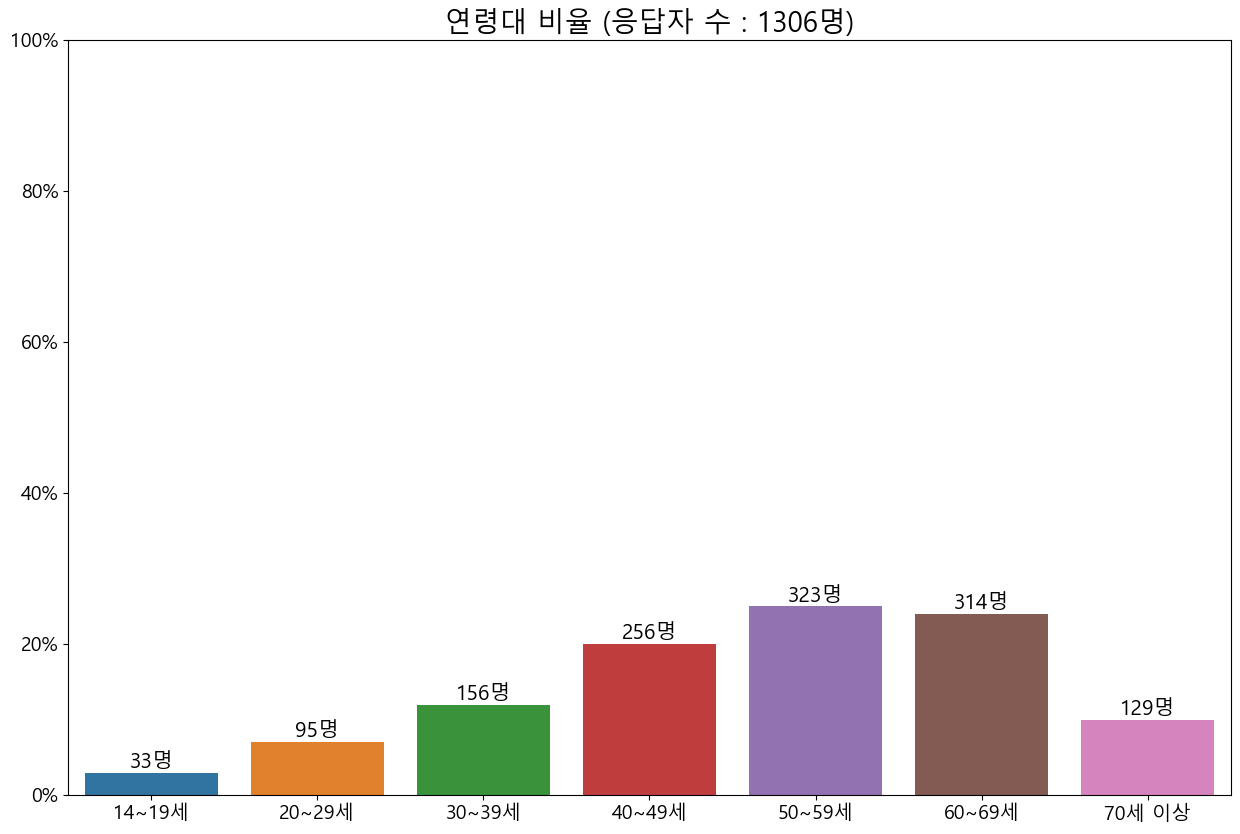

In [ ]:
fig = plt.figure(figsize = (15, 10), dpi = 100)
ax = fig.subplots()

sns.barplot(data = df_age, x = 'index', y = '비율')

_ = ax.set_title('연령대 비율 (응답자 수 : 1306명)', fontsize = 20) # 그래프 제목 설정

_ = plt.xlabel('') # x축 이름 제거
_ = plt.xticks(fontsize = 14) # x축 라벨 크기 조정

_ = plt.ylim(0, 1) # y축 범위 설정
_ = plt.yticks(fontsize = 14) # y축 라벨 크기 조정
_ = plt.ylabel('') # y축 이름 제거
_ = plt.yticks(fontsize = 14) # y축 라벨 크기 조정
_ = ax.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%']) # y축 라벨 퍼센트 변환

for i in range(len(df_age)):
    _ = ax.text(i, df_age['비율'].iloc[i], f"{df_age['30. 연령은?'].iloc[i]}명", ha = 'center', va = 'bottom', fontsize = 15)
    
fig.savefig('./result/Q_30.jpg')

### 직분

In [ ]:
data['31. 직분이나 섬기는 역할은?'].value_counts()

집사                   476
성도                   372
권사                   153
장로                    54
집사\n교구리더              45
권사\n교구리더              31
집사\n위원장               30
청년리더                  19
성도\n교사                18
집사\n교사                15
성도\n청년리더              13
교사                    12
권사\n위원장\n교구리더          9
집사\n위원장\n교구리더          7
장로\n위원장                7
집사\n교구리더\n교사           5
성도\n위원장                5
집사\n위원장\n교사            5
권사\n위원장                4
위원장                    4
성도\n위원장\n청년리더          3
교사\n청년리더               3
성도\n교사\n청년리더           2
권사\n교사                 2
교구리더                   2
집사\n기관장\n교구리더          2
장로\n교사                 2
집사\n권사\n기관장\n교구리더      1
성도\n집사                 1
권사\n위원장\n교구리더\n교사      1
권사\n기관장\n교구리더          1
장로\n위원장\n교사            1
장로\n기관장\n위원장           1
Name: 31. 직분이나 섬기는 역할은?, dtype: int64

In [ ]:
def duty_fun(x):
    if x[:2] == '성도' or x == '청년리더':
        if '집사' in x:
            return 2
        elif '권사' in x:
            return 3
        elif '장로' in x:
            return 4
        return 1
    elif '집사' in x:
        return 2
    elif '권사' in x:
        return 3
    elif '장로' in x:
        return 4
    else:
        return 0

In [ ]:
df['duty'] = data['31. 직분이나 섬기는 역할은?'].apply(duty_fun).values

In [ ]:
df_duty = data['31. 직분이나 섬기는 역할은?'].apply(duty_fun).value_counts().to_frame()
df_duty['비율'] = df_duty['31. 직분이나 섬기는 역할은?'].apply(lambda x: np.round(x / df_duty['31. 직분이나 섬기는 역할은?'].sum(), 2))
df_duty = df_duty.reset_index()
df_duty

index  31. 직분이나 섬기는 역할은?    비율
0      2                587  0.45
1      1                432  0.33
2      3                201  0.15
3      4                 65  0.05
4      0                 21  0.02

In [ ]:
df_duty = data['31. 직분이나 섬기는 역할은?'].apply(duty_fun).value_counts().to_frame()
df_duty['비율'] = df_duty['31. 직분이나 섬기는 역할은?'].apply(lambda x: np.round(x / df_duty['31. 직분이나 섬기는 역할은?'].sum(), 2))
df_duty = df_duty.reset_index()
df_duty.loc[df_duty['index'] == 1, 'index'] = '성도'
df_duty.loc[df_duty['index'] == 2, 'index'] = '집사'
df_duty.loc[df_duty['index'] == 3, 'index'] = '권사'
df_duty.loc[df_duty['index'] == 4, 'index'] = '장로'
df_duty.loc[df_duty['index'] == 0, 'index'] = '기타'
df_duty = df_duty.set_index(keys = 'index')
df_duty = df_duty.reindex(index = ['성도', '집사', '권사', '장로', '기타'])
df_duty = df_duty.reset_index()
df_duty

index  31. 직분이나 섬기는 역할은?    비율
0    성도                432  0.33
1    집사                587  0.45
2    권사                201  0.15
3    장로                 65  0.05
4    기타                 21  0.02

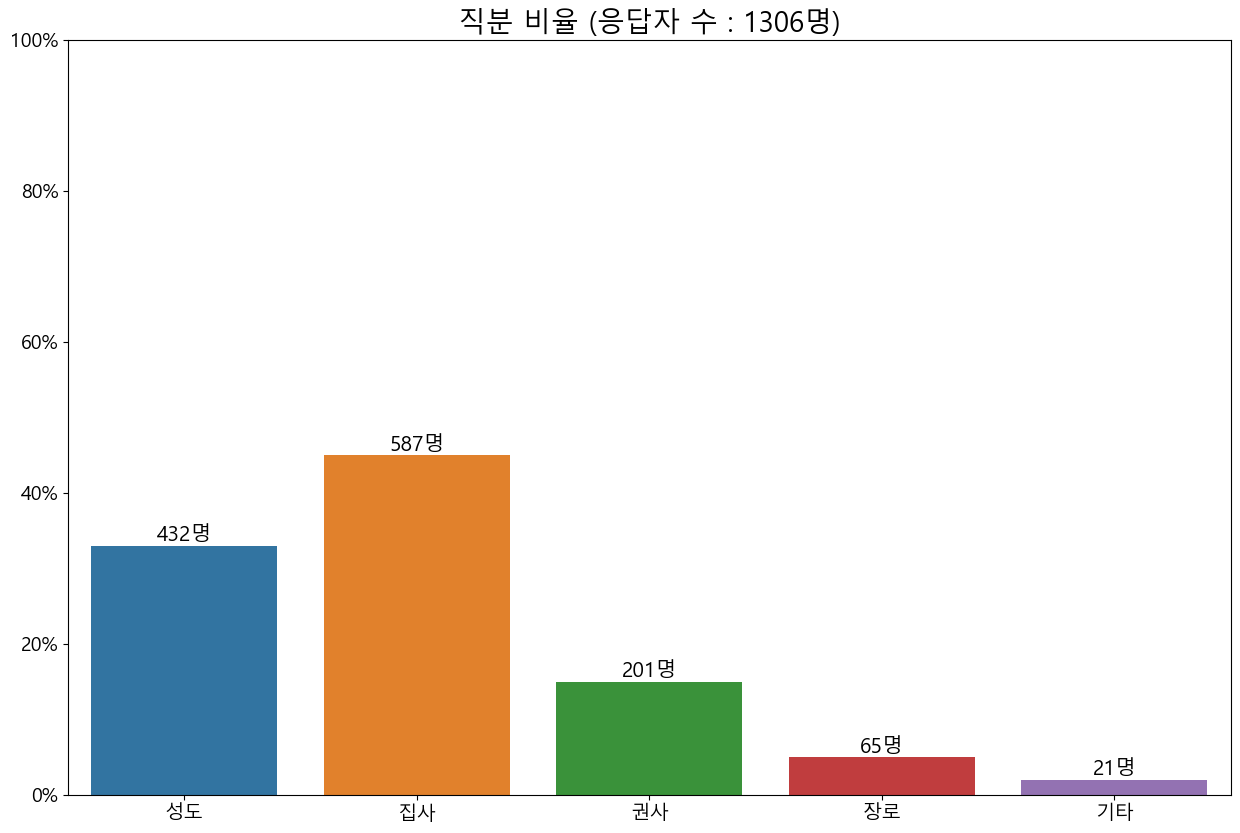

In [ ]:
fig = plt.figure(figsize = (15, 10), dpi = 100)
ax = fig.subplots()

sns.barplot(data = df_duty, x = 'index', y = '비율')

_ = ax.set_title('직분 비율 (응답자 수 : 1306명)', fontsize = 20) # 그래프 제목 설정

_ = plt.xlabel('') # x축 이름 제거
_ = plt.xticks(fontsize = 14) # x축 라벨 크기 조정

_ = plt.ylim(0, 1) # y축 범위 설정
_ = plt.yticks(fontsize = 14) # y축 라벨 크기 조정
_ = plt.ylabel('') # y축 이름 제거
_ = plt.yticks(fontsize = 14) # y축 라벨 크기 조정
_ = ax.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%']) # y축 라벨 퍼센트 변환

for i in range(len(df_duty)):
    _ = ax.text(i, df_duty['비율'].iloc[i], f"{df_duty['31. 직분이나 섬기는 역할은?'].iloc[i]}명", ha = 'center', va = 'bottom', fontsize = 15)
    
fig.savefig('./result/Q_31_직분.jpg')

### 섬기는 역할

In [ ]:
def role_fun(x):
    x_ = 0
    if '기관장' in x:
        x_ += 1
    if '위원장' in x:
        x_ += 1
    if '교구리더' in x:
        x_ += 1
    if '교사' in x:
        x_ += 1
    if '청년리더' in x:
        x_ += 1
    if x_ >= 2:
        x_ = 2
        
    return x_

In [ ]:
df['role'] = data['31. 직분이나 섬기는 역할은?'].apply(role_fun).values

In [ ]:
df_role = data['31. 직분이나 섬기는 역할은?'].apply(role_fun).value_counts().to_frame()
df_role['비율'] = df_role['31. 직분이나 섬기는 역할은?'].apply(lambda x: np.round(x / df_role['31. 직분이나 섬기는 역할은?'].sum(), 2))
df_role = df_role.reset_index()
df_role.loc[df_role['index'] == 0, 'index'] = '역할 없음'
df_role.loc[df_role['index'] == 1, 'index'] = '역할 1개'
df_role.loc[df_role['index'] == 2, 'index'] = '역할 2개 이상'
df_role = df_role.set_index(keys = 'index')
df_role = df_role.reindex(index = ['역할 없음', '역할 1개', '역할 2개 이상'])
df_role = df_role.reset_index()
df_role

index  31. 직분이나 섬기는 역할은?    비율
0     역할 없음               1056  0.81
1     역할 1개                209  0.16
2  역할 2개 이상                 41  0.03

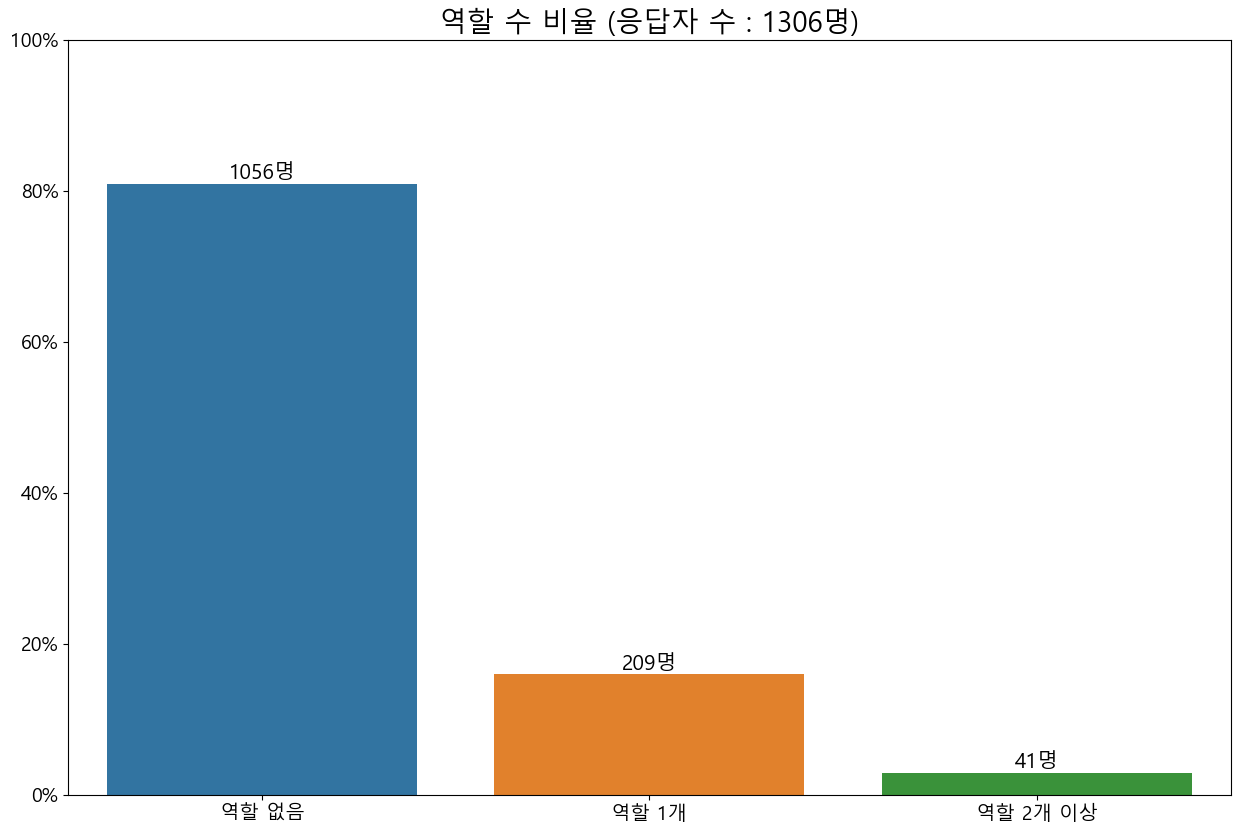

In [ ]:
fig = plt.figure(figsize = (15, 10), dpi = 100)
ax = fig.subplots()

sns.barplot(data = df_role, x = 'index', y = '비율')

_ = ax.set_title('역할 수 비율 (응답자 수 : 1306명)', fontsize = 20) # 그래프 제목 설정

_ = plt.xlabel('') # x축 이름 제거
_ = plt.xticks(fontsize = 14) # x축 라벨 크기 조정

_ = plt.ylim(0, 1) # y축 범위 설정
_ = plt.yticks(fontsize = 14) # y축 라벨 크기 조정
_ = plt.ylabel('') # y축 이름 제거
_ = plt.yticks(fontsize = 14) # y축 라벨 크기 조정
_ = ax.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%']) # y축 라벨 퍼센트 변환

for i in range(len(df_role)):
    _ = ax.text(i, df_role['비율'].iloc[i], f"{df_role['31. 직분이나 섬기는 역할은?'].iloc[i]}명", ha = 'center', va = 'bottom', fontsize = 15)
    
fig.savefig('./result/Q_31_역할.jpg')

### 출석연수

In [ ]:
data['32. 중앙교회에 출석연수는?'].value_counts()

20년 이상     260
11년~15년    239
6년~10년     196
16년~20년    182
21년 이상     150
3년~5년      126
무응답         65
2년 미만       63
미응답         16
기타           6
31년          1
오류           1
40년째         1
Name: 32. 중앙교회에 출석연수는?, dtype: int64

In [ ]:
def year_fun(x):
    x_ = 0
    if x == '2년 미만':
        x_ = 1
    if x == '3년~5년':
        x_ = 2
    if x == '6년~10년':
        x_ = 3
    if x == '11년~15년':
        x_ = 4
    if x == '16년~20년':
        x_ = 5
    if x == '20년 이상' or x == '21년 이상' or x == '31년' or x == '40년째':
        x_ = 6
    return x_

In [ ]:
df['year'] = data['32. 중앙교회에 출석연수는?'].apply(year_fun).values

In [ ]:
df_year = data['32. 중앙교회에 출석연수는?'].apply(year_fun).value_counts().to_frame()
df_year['비율'] = df_year['32. 중앙교회에 출석연수는?'].apply(lambda x: np.round(x / df_year['32. 중앙교회에 출석연수는?'].sum(), 2))
df_year = df_year.reset_index()
df_year.loc[df_year['index'] == 0, 'index'] = '무응답'
df_year.loc[df_year['index'] == 1, 'index'] = '2년 미만'
df_year.loc[df_year['index'] == 2, 'index'] = '3년~5년'
df_year.loc[df_year['index'] == 3, 'index'] = '6년~10년'
df_year.loc[df_year['index'] == 4, 'index'] = '11년~15년'
df_year.loc[df_year['index'] == 5, 'index'] = '16년~20년'
df_year.loc[df_year['index'] == 6, 'index'] = '20년 이상'
df_year = df_year.set_index(keys = 'index')
df_year = df_year.reindex(index = ['2년 미만', '3년~5년', '6년~10년', '11년~15년', '16년~20년', '20년 이상', '무응답'])
df_year = df_year.reset_index()
df_year

index  32. 중앙교회에 출석연수는?    비율
0    2년 미만                63  0.05
1    3년~5년               126  0.10
2   6년~10년               196  0.15
3  11년~15년               239  0.18
4  16년~20년               182  0.14
5   20년 이상               412  0.32
6      무응답                88  0.07

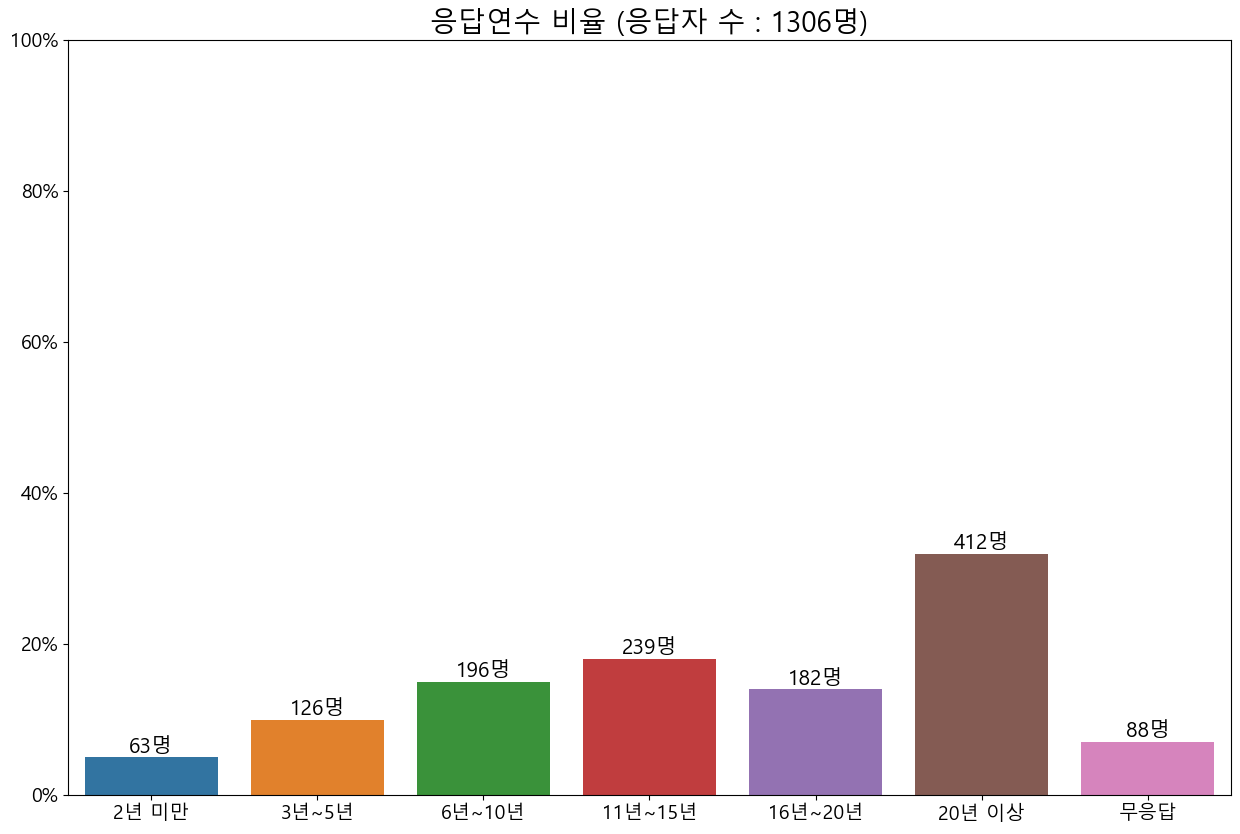

In [ ]:
fig = plt.figure(figsize = (15, 10), dpi = 100)
ax = fig.subplots()

sns.barplot(data = df_year, x = 'index', y = '비율')

_ = ax.set_title('응답연수 비율 (응답자 수 : 1306명)', fontsize = 20) # 그래프 제목 설정

_ = plt.xlabel('') # x축 이름 제거
_ = plt.xticks(fontsize = 14) # x축 라벨 크기 조정

_ = plt.ylim(0, 1) # y축 범위 설정
_ = plt.yticks(fontsize = 14) # y축 라벨 크기 조정
_ = plt.ylabel('') # y축 이름 제거
_ = plt.yticks(fontsize = 14) # y축 라벨 크기 조정
_ = ax.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%']) # y축 라벨 퍼센트 변환

for i in range(len(df_year)):
    _ = ax.text(i, df_year['비율'].iloc[i], f"{df_year['32. 중앙교회에 출석연수는?'].iloc[i]}명", ha = 'center', va = 'bottom', fontsize = 15)
    
fig.savefig('./result/Q_32.jpg')

### DataFrame

In [ ]:
df.head()

age  duty  role  year
Submission ID                             
5047870710712690000    5     2     0     5
5047873133415400000    4     2     2     4
5047874132222440000    6     4     1     6
5047874175219070000    5     2     0     4
5047874320732840000    7     1     0     4

In [ ]:
col_num = len(df.columns)

### Function

In [ ]:
def make_table(Q):
    table = globals()[f'table_Q{Q}']
    df_Q = globals()[f'df_Q{Q}']

    # 전체 응답
    table.loc['전체'] = df_Q.sum(axis = 0)[col_num:].values

    # 연령대 별 응답
    Q_10 = df_Q[df_Q['age'] == 1]
    Q_20 = df_Q[df_Q['age'] == 2]
    Q_30 = df_Q[df_Q['age'] == 3]
    Q_40 = df_Q[df_Q['age'] == 4]
    Q_50 = df_Q[df_Q['age'] == 5]
    Q_60 = df_Q[df_Q['age'] == 6]
    Q_70 = df_Q[df_Q['age'] == 7]

    table.loc['14~19세'] = Q_10.sum(axis = 0)[col_num:].values
    table.loc['20~29세'] = Q_20.sum(axis = 0)[col_num:].values
    table.loc['30~39세'] = Q_30.sum(axis = 0)[col_num:].values
    table.loc['40~49세'] = Q_40.sum(axis = 0)[col_num:].values
    table.loc['50~59세'] = Q_50.sum(axis = 0)[col_num:].values
    table.loc['60~69세'] = Q_60.sum(axis = 0)[col_num:].values
    table.loc['70세 이상'] = Q_70.sum(axis = 0)[col_num:].values

    # 직분 별 응답
    Q_saint = df_Q[df_Q['duty'] == 1]
    Q_deacon = df_Q[df_Q['duty'] == 2]
    Q_exhort = df_Q[df_Q['duty'] == 3]
    Q_elder = df_Q[df_Q['duty'] == 4]

    table.loc['성도'] = Q_saint.sum(axis = 0)[col_num:].values
    table.loc['집사'] = Q_deacon.sum(axis = 0)[col_num:].values
    table.loc['권사'] = Q_exhort.sum(axis = 0)[col_num:].values
    table.loc['장로'] = Q_elder.sum(axis = 0)[col_num:].values

    # 역할 수 별 응답
    Q_0 = df_Q[df_Q['role'] == 0]
    Q_1 = df_Q[df_Q['role'] == 1]
    Q_2 = df_Q[df_Q['role'] == 2]

    table.loc['역할 없음'] = Q_0.sum(axis = 0)[col_num:].values
    table.loc['역할 1개'] = Q_1.sum(axis = 0)[col_num:].values
    table.loc['역할 2개 이상'] = Q_2.sum(axis = 0)[col_num:].values

    # 출석연수 별 응답
    Q_year1 = df_Q[df_Q['year'] == 1]
    Q_year2 = df_Q[df_Q['year'] == 2]
    Q_year3 = df_Q[df_Q['year'] == 3]
    Q_year4 = df_Q[df_Q['year'] == 4]
    Q_year5 = df_Q[df_Q['year'] == 5]
    Q_year6 = df_Q[df_Q['year'] == 6]

    table.loc['2년 미만'] = Q_year1.sum(axis = 0)[col_num:].values
    table.loc['3년~5년'] = Q_year2.sum(axis = 0)[col_num:].values
    table.loc['6년~10년'] = Q_year3.sum(axis = 0)[col_num:].values
    table.loc['11년~15년'] = Q_year4.sum(axis = 0)[col_num:].values
    table.loc['16년~20년'] = Q_year5.sum(axis = 0)[col_num:].values
    table.loc['20년 이상'] = Q_year6.sum(axis = 0)[col_num:].values

    ## 비율 테이블
    q_table = table.copy()
    q_table.loc['전체'] = q_table.apply(lambda row: np.round(row.loc['전체'] / q_table.loc['전체'].sum() * 100, 2))
    q_table.loc['14~19세'] = q_table.apply(lambda row: np.round(row.loc['14~19세'] / q_table.loc['14~19세'].sum() * 100, 2))
    q_table.loc['20~29세'] = q_table.apply(lambda row: np.round(row.loc['20~29세'] / q_table.loc['20~29세'].sum() * 100, 2))
    q_table.loc['30~39세'] = q_table.apply(lambda row: np.round(row.loc['30~39세'] / q_table.loc['30~39세'].sum() * 100, 2))
    q_table.loc['40~49세'] = q_table.apply(lambda row: np.round(row.loc['40~49세'] / q_table.loc['40~49세'].sum() * 100, 2))
    q_table.loc['50~59세'] = q_table.apply(lambda row: np.round(row.loc['50~59세'] / q_table.loc['50~59세'].sum() * 100, 2))
    q_table.loc['60~69세'] = q_table.apply(lambda row: np.round(row.loc['60~69세'] / q_table.loc['60~69세'].sum() * 100, 2))
    q_table.loc['70세 이상'] = q_table.apply(lambda row: np.round(row.loc['70세 이상'] / q_table.loc['70세 이상'].sum() * 100, 2))
    q_table.loc['성도'] = q_table.apply(lambda row: np.round(row.loc['성도'] / q_table.loc['성도'].sum() * 100, 2))
    q_table.loc['집사'] = q_table.apply(lambda row: np.round(row.loc['집사'] / q_table.loc['집사'].sum() * 100, 2))
    q_table.loc['권사'] = q_table.apply(lambda row: np.round(row.loc['권사'] / q_table.loc['권사'].sum() * 100, 2))
    q_table.loc['장로'] = q_table.apply(lambda row: np.round(row.loc['장로'] / q_table.loc['장로'].sum() * 100, 2))
    q_table.loc['역할 없음'] = q_table.apply(lambda row: np.round(row.loc['역할 없음'] / q_table.loc['역할 없음'].sum() * 100, 2))
    q_table.loc['역할 1개'] = q_table.apply(lambda row: np.round(row.loc['역할 1개'] / q_table.loc['역할 1개'].sum() * 100, 2))
    q_table.loc['역할 2개 이상'] = q_table.apply(lambda row: np.round(row.loc['역할 2개 이상'] / q_table.loc['역할 2개 이상'].sum() * 100, 2))
    q_table.loc['2년 미만'] = q_table.apply(lambda row: np.round(row.loc['2년 미만'] / q_table.loc['2년 미만'].sum() * 100, 2))
    q_table.loc['3년~5년'] = q_table.apply(lambda row: np.round(row.loc['3년~5년'] / q_table.loc['3년~5년'].sum() * 100, 2))
    q_table.loc['6년~10년'] = q_table.apply(lambda row: np.round(row.loc['6년~10년'] / q_table.loc['6년~10년'].sum() * 100, 2))
    q_table.loc['11년~15년'] = q_table.apply(lambda row: np.round(row.loc['11년~15년'] / q_table.loc['11년~15년'].sum() * 100, 2))
    q_table.loc['16년~20년'] = q_table.apply(lambda row: np.round(row.loc['16년~20년'] / q_table.loc['16년~20년'].sum() * 100, 2))
    q_table.loc['20년 이상'] = q_table.apply(lambda row: np.round(row.loc['20년 이상'] / q_table.loc['20년 이상'].sum() * 100, 2))

    ## 최종 테이블
    f_table = q_table.copy()
    f_table.loc['전체'] = f_table.apply(lambda row: str(row.loc['전체']) + '%')
    f_table.loc['14~19세'] = f_table.apply(lambda row: str(row.loc['14~19세']) + '%')
    f_table.loc['20~29세'] = f_table.apply(lambda row: str(row.loc['20~29세']) + '%')
    f_table.loc['30~39세'] = f_table.apply(lambda row: str(row.loc['30~39세']) + '%')
    f_table.loc['40~49세'] = f_table.apply(lambda row: str(row.loc['40~49세']) + '%')
    f_table.loc['50~59세'] = f_table.apply(lambda row: str(row.loc['50~59세']) + '%')
    f_table.loc['60~69세'] = f_table.apply(lambda row: str(row.loc['60~69세']) + '%')
    f_table.loc['70세 이상'] = f_table.apply(lambda row: str(row.loc['70세 이상']) + '%')
    f_table.loc['성도'] = f_table.apply(lambda row: str(row.loc['성도']) + '%')
    f_table.loc['집사'] = f_table.apply(lambda row: str(row.loc['집사']) + '%')
    f_table.loc['권사'] = f_table.apply(lambda row: str(row.loc['권사']) + '%')
    f_table.loc['장로'] = f_table.apply(lambda row: str(row.loc['장로']) + '%')
    f_table.loc['역할 없음'] = f_table.apply(lambda row: str(row.loc['역할 없음']) + '%')
    f_table.loc['역할 1개'] = f_table.apply(lambda row: str(row.loc['역할 1개']) + '%')
    f_table.loc['역할 2개 이상'] = f_table.apply(lambda row: str(row.loc['역할 2개 이상']) + '%')
    f_table.loc['2년 미만'] = f_table.apply(lambda row: str(row.loc['2년 미만']) + '%')
    f_table.loc['3년~5년'] = f_table.apply(lambda row: str(row.loc['3년~5년']) + '%')
    f_table.loc['6년~10년'] = f_table.apply(lambda row: str(row.loc['6년~10년']) + '%')
    f_table.loc['11년~15년'] = f_table.apply(lambda row: str(row.loc['11년~15년']) + '%')
    f_table.loc['16년~20년'] = f_table.apply(lambda row: str(row.loc['16년~20년']) + '%')
    f_table.loc['20년 이상'] = f_table.apply(lambda row: str(row.loc['20년 이상']) + '%')

    # 응답 수
    f_table['응답 수'] = 0
    f_table['응답 수']['전체'] = table.sum(axis = 1)[0]
    f_table['응답 수']['14~19세'] = table.sum(axis = 1)[1]
    f_table['응답 수']['20~29세'] = table.sum(axis = 1)[2]
    f_table['응답 수']['30~39세'] = table.sum(axis = 1)[3]
    f_table['응답 수']['40~49세'] = table.sum(axis = 1)[4]
    f_table['응답 수']['50~59세'] = table.sum(axis = 1)[5]
    f_table['응답 수']['60~69세'] = table.sum(axis = 1)[6]
    f_table['응답 수']['70세 이상'] = table.sum(axis = 1)[7]
    f_table['응답 수']['성도'] = table.sum(axis = 1)[8]
    f_table['응답 수']['집사'] = table.sum(axis = 1)[9]
    f_table['응답 수']['권사'] = table.sum(axis = 1)[10]
    f_table['응답 수']['장로'] = table.sum(axis = 1)[11]
    f_table['응답 수']['역할 없음'] = table.sum(axis = 1)[12]
    f_table['응답 수']['역할 1개'] = table.sum(axis = 1)[13]
    f_table['응답 수']['역할 2개 이상'] = table.sum(axis = 1)[14]
    f_table['응답 수']['2년 미만'] = table.sum(axis = 1)[15]
    f_table['응답 수']['3년~5년'] = table.sum(axis = 1)[16]
    f_table['응답 수']['6년~10년'] = table.sum(axis = 1)[17]
    f_table['응답 수']['11년~15년'] = table.sum(axis = 1)[18]
    f_table['응답 수']['16년~20년'] = table.sum(axis = 1)[19]
    f_table['응답 수']['20년 이상'] = table.sum(axis = 1)[20]

    f_table = f_table[['응답 수'] + f_table.columns[:-1].to_list()]
    table_list.append(f_table)
    return table, q_table, f_table

1) 전체 응답

In [ ]:
def plot_1():
    fig = plt.figure(figsize = (15, 10), dpi = 100)
    ax = fig.subplots()
    table_total = q_table.iloc[0].to_frame().T

    for j in range(len(table_total.columns)):
        col_idx = list(table_total.T.sort_values(by = '전체', ascending = False).index.map(lambda x: int(re.findall('\d+', x)[0])))
        _ = ax.bar(j, table_total.T.sort_values(by = '전체', ascending = False).values[j], width = 1, color = color_list[col_idx[j] - 1])

    # title
    _ = ax.set_title(f'{title} {복수응답}\n전체 응답 비율 그래프', fontsize = 20)

    # x축
    _ = ax.set_xticks([gap]) # x축 라벨 범위 설정
    _ = ax.set_xticklabels(table_total.index, fontsize = 16) # x축 라벨 이름 설정

    # y축
    _ = plt.ylabel('') # y축 이름 제거
    _ = plt.ylim(0, 100) # y축 범위 설정
    _ = plt.yticks(fontsize = 14) # y축 라벨 크기 조정
    _ = ax.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%']) # y축 라벨 퍼센트 변환
    _ = ax.grid(axis = 'y') # y축 그리드 추가

    # legend
    legend = plt.legend(handles = ax_list, loc = 'best', fontsize = 12) # 범례 설정
    legend.set_title('문항', prop = {'size':15}) # 범례 제목 설정

    fig.savefig(f'./result/Q{Q}_1.jpg')

2) 연령대 별 응답

In [ ]:
def plot_2():
    fig = plt.figure(figsize = (15, 10), dpi = 100)
    ax = fig.subplots()
    table_age = q_table.iloc[1:8]

    for i in range(len(table_age.index)):
        for j in range(len(table_age.columns)):
            col_idx = list(table_age.iloc[i].sort_values(ascending = False).index.map(lambda x: int(re.findall('\d+', x)[0])))
            _ = ax.bar(j + i * 12, table_age.iloc[i].sort_values(ascending = False).values[j], width = 1, color = color_list[col_idx[j] - 1])
            
    # title
    _ = ax.set_title(f'{title} {복수응답}\n연령대 별 비율 그래프', fontsize = 20)

    # x축
    _ = plt.xlabel('연령대', fontsize = 20) # x축 이름 설정
    _ = ax.set_xticks(np.linspace(gap, gap+12*6, 7)) # x축 라벨 범위 설정
    _ = ax.set_xticklabels(table_age.index, fontsize = 16) # x축 라벨 이름 설정
    
    # y축
    _ = plt.ylabel('') # y축 이름 제거
    _ = plt.ylim(0, 100) # y축 범위 설정
    _ = plt.yticks(fontsize = 14) # y축 라벨 크기 조정
    _ = ax.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%']) # y축 라벨 퍼센트 변환
    _ = ax.grid(axis = 'y') # y축 그리드 추가

    # legend
    legend = plt.legend(handles = ax_list, loc = 'upper right', fontsize = 12) # 범례 설정
    legend.set_title('문항', prop = {'size':15}) # 범례 제목 설정

    fig.savefig(f'./result/Q{Q}_2.jpg')

3) 직분 별 응답

In [ ]:
def plot_3():
    fig = plt.figure(figsize = (15, 10), dpi = 100)
    ax = fig.subplots()
    table_duty = q_table.iloc[8:12]

    for i in range(len(table_duty.index)):
        for j in range(len(table_duty.columns)):
            col_idx = list(table_duty.iloc[i].sort_values(ascending = False).index.map(lambda x: int(re.findall('\d+', x)[0])))
            _ = ax.bar(j + i * 12, table_duty.iloc[i].sort_values(ascending = False).values[j], width = 1, color = color_list[col_idx[j] - 1])
            
    # title
    _ = ax.set_title(f'{title} {복수응답}\n직분 별 비율 그래프', fontsize = 20)

    # x축
    _ = plt.xlabel('직분', fontsize = 20) # x축 이름 설정
    _ = ax.set_xticks(np.linspace(gap, gap+12*3, 4)) # x축 라벨 범위 설정
    _ = ax.set_xticklabels(table_duty.index, fontsize = 16) # x축 라벨 이름 설정
    
    # y축
    _ = plt.ylabel('') # y축 이름 제거
    _ = plt.ylim(0, 100) # y축 범위 설정
    _ = plt.yticks(fontsize = 14) # y축 라벨 크기 조정
    _ = ax.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%']) # y축 라벨 퍼센트 변환
    _ = ax.grid(axis = 'y') # y축 그리드 추가

    # legend
    legend = plt.legend(handles = ax_list, loc = 'upper right', fontsize = 12) # 범례 설정
    legend.set_title('문항', prop = {'size':15}) # 범례 제목 설정

    fig.savefig(f'./result/Q{Q}_3.jpg')

4) 역할 수 별 응답

In [ ]:
def plot_4():
    fig = plt.figure(figsize = (15, 10), dpi = 100)
    ax = fig.subplots()
    table_role = q_table.iloc[12:15]

    for i in range(len(table_role.index)):
        for j in range(len(table_role.columns)):
            col_idx = list(table_role.iloc[i].sort_values(ascending = False).index.map(lambda x: int(re.findall('\d+', x)[0])))
            _ = ax.bar(j + i * 12, table_role.iloc[i].sort_values(ascending = False).values[j], width = 1, color = color_list[col_idx[j] - 1])
            
    # title
    _ = ax.set_title(f'{title} {복수응답}\n역할 수 별 비율 그래프', fontsize = 20)

    # x축
    _ = plt.xlabel('역할 수', fontsize = 20) # x축 이름 설정
    _ = ax.set_xticks(np.linspace(gap, gap+12*2, 3)) # x축 라벨 범위 설정
    _ = ax.set_xticklabels(table_role.index, fontsize = 16) # x축 라벨 이름 설정
    
    # y축
    _ = plt.ylabel('') # y축 이름 제거
    _ = plt.ylim(0, 100) # y축 범위 설정
    _ = plt.yticks(fontsize = 14) # y축 라벨 크기 조정
    _ = ax.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%']) # y축 라벨 퍼센트 변환
    _ = ax.grid(axis = 'y') # y축 그리드 추가

    # legend
    legend = plt.legend(handles = ax_list, loc = 'upper right', fontsize = 12) # 범례 설정
    legend.set_title('문항', prop = {'size':15}) # 범례 제목 설정

    fig.savefig(f'./result/Q{Q}_4.jpg')

5) 출석연수 별 응답

In [ ]:
def plot_5():
    fig = plt.figure(figsize = (15, 10), dpi = 100)
    ax = fig.subplots()
    table_year = q_table.iloc[15:]

    for i in range(len(table_year.index)):
        for j in range(len(table_year.columns)):
            col_idx = list(table_year.iloc[i].sort_values(ascending = False).index.map(lambda x: int(re.findall('\d+', x)[0])))
            _ = ax.bar(j + i * 12, table_year.iloc[i].sort_values(ascending = False).values[j], width = 1, color = color_list[col_idx[j] - 1])
            
    # title
    _ = ax.set_title(f'{title} {복수응답}\n출석연수 별 비율 그래프', fontsize = 20)

    # x축
    _ = plt.xlabel('출석연수', fontsize = 20) # x축 이름 설정
    _ = ax.set_xticks(np.linspace(gap, gap+12*5, 6)) # x축 라벨 범위 설정
    _ = ax.set_xticklabels(table_year.index, fontsize = 16) # x축 라벨 이름 설정
    
    # y축
    _ = plt.ylabel('') # y축 이름 제거
    _ = plt.ylim(0, 100) # y축 범위 설정
    _ = plt.yticks(fontsize = 14) # y축 라벨 크기 조정
    _ = ax.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%']) # y축 라벨 퍼센트 변환
    _ = ax.grid(axis = 'y') # y축 그리드 추가

    # legend
    legend = plt.legend(handles = ax_list, loc = 'upper right', fontsize = 12) # 범례 설정
    legend.set_title('문항', prop = {'size':15}) # 범례 제목 설정

    fig.savefig(f'./result/Q{Q}_5.jpg')

## Part 1

### Q1. 코로나로 인해 발생한 현실적인 어려움은? (2개까지 중복가능)

#### 데이터 셋 준비

In [ ]:
Q = 1
Q_list.append(Q)
복수응답 = "(복수응답)"

In [ ]:
table_Q1 = pd.DataFrame(index = ['전체',
                                 '14~19세', '20~29세', '30~39세', '40~49세', '50~59세', '60~69세', '70세 이상',
                                 '성도', '집사', '권사', '장로',
                                 '역할 없음', '역할 1개', '역할 2개 이상',
                                 '2년 미만', '3년~5년', '6년~10년', '11년~15년', '16년~20년', '20년 이상'],
                        columns = ['1. 육체적 건강 문제',
                                   '2. 정서적 문제',
                                   '3. 경제적 문제',
                                   '4. 자녀교육 문제',
                                   '5. 대인관계 문제',
                                   '6. 미래에 대한 불안감',
                                   '7. 코로나 감염에 대한 우려',
                                   '8. 문화 및 여가생활 제약',
                                   '9. 신앙생활의 제약',
                                   '10. 없음'])

In [ ]:
df_Q1 = df.copy()
df_Q1['Q1_1'] = 0
df_Q1['Q1_2'] = 0
df_Q1['Q1_3'] = 0
df_Q1['Q1_4'] = 0
df_Q1['Q1_5'] = 0
df_Q1['Q1_6'] = 0
df_Q1['Q1_7'] = 0
df_Q1['Q1_8'] = 0
df_Q1['Q1_9'] = 0
df_Q1['Q1_10'] = 0

In [ ]:
nan_index = []

for idx, Q1 in enumerate(data['1. 코로나로 인해 발생한 현실적인 어려움은?']):
    if type(Q1) == float:
        nan_index.append(idx)
    elif type(Q1) == str:
        if '육체적' in Q1:
            df_Q1['Q1_1'].iloc[idx] = 1
        if '정서적' in Q1:
            df_Q1['Q1_2'].iloc[idx] = 1
        if '경제적' in Q1:
            df_Q1['Q1_3'].iloc[idx] = 1
        if '자녀교육' in Q1:
            df_Q1['Q1_4'].iloc[idx] = 1
        if '대인관계' in Q1:
            df_Q1['Q1_5'].iloc[idx] = 1
        if '미래' in Q1:
            df_Q1['Q1_6'].iloc[idx] = 1
        if '코로나' in Q1:
            df_Q1['Q1_7'].iloc[idx] = 1
        if '문화' in Q1:
            df_Q1['Q1_8'].iloc[idx] = 1
        if '신앙' in Q1:
            df_Q1['Q1_9'].iloc[idx] = 1
        if '없음' == Q1:
            df_Q1['Q1_10'].iloc[idx] = 1
        if df_Q1.iloc[idx, col_num:].sum() == 0:
            nan_index.append(idx)
        
df_Q1.drop(df_Q1.index[nan_index], axis = 0, inplace = True)

#### 빈도수 & 비율 테이블

In [ ]:
table, q_table, f_table = make_table(Q)

#### 시각화

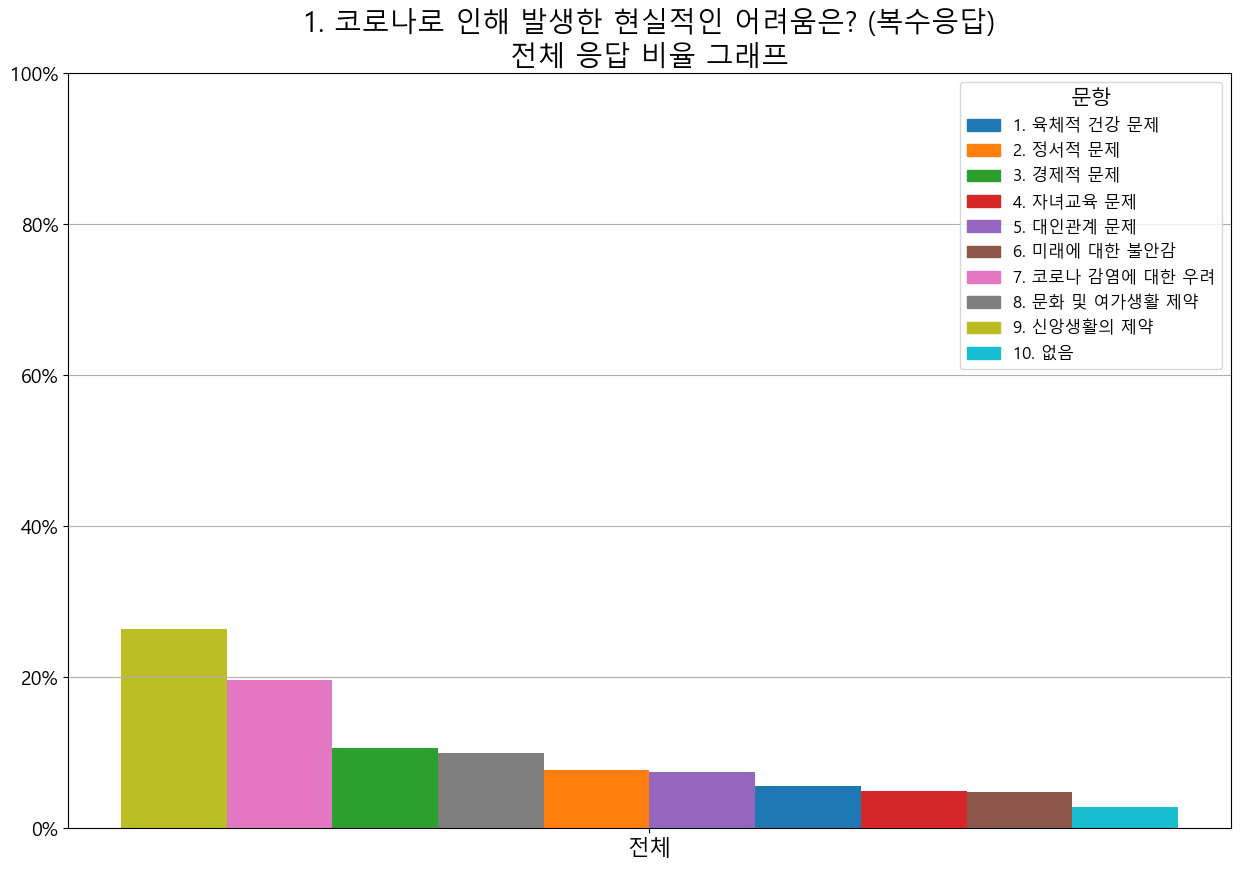

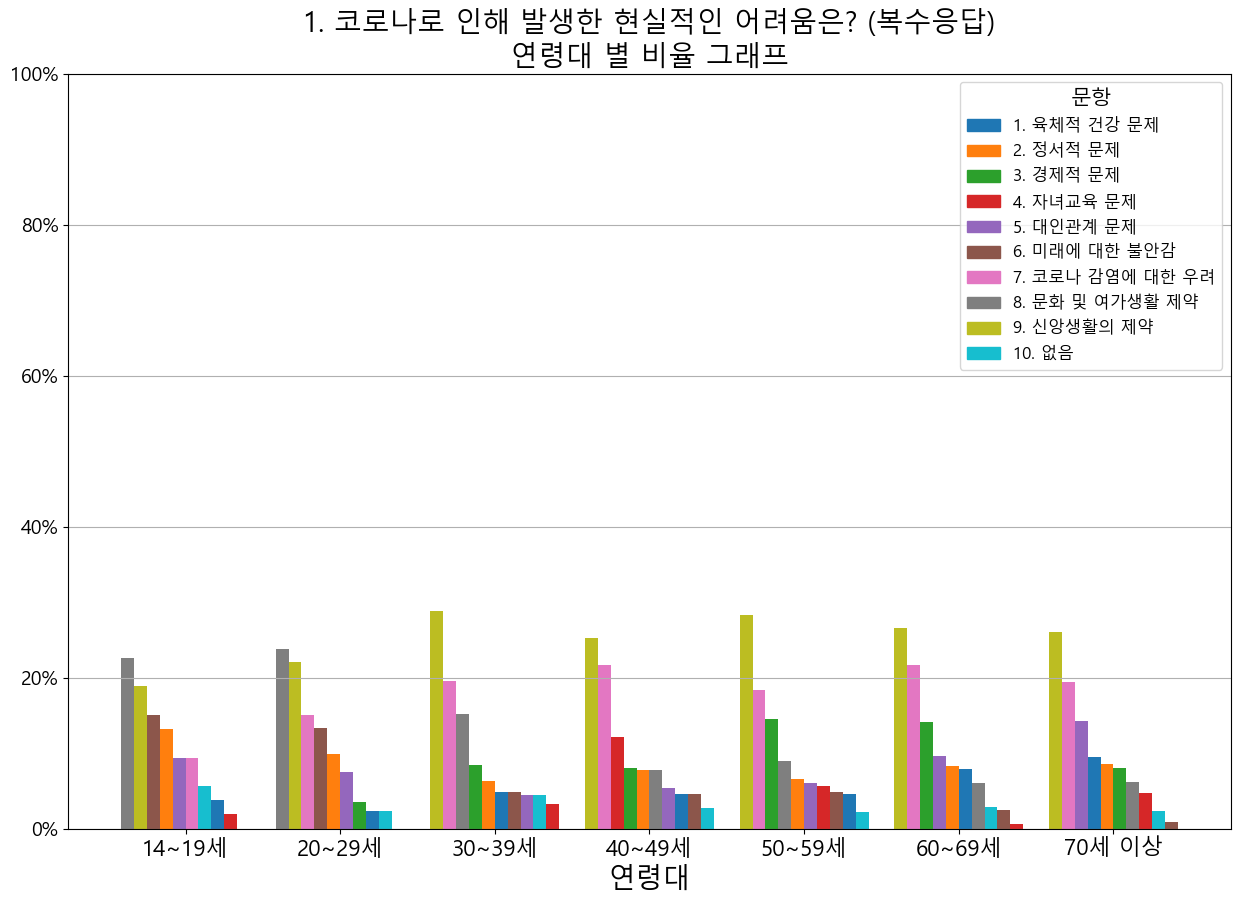

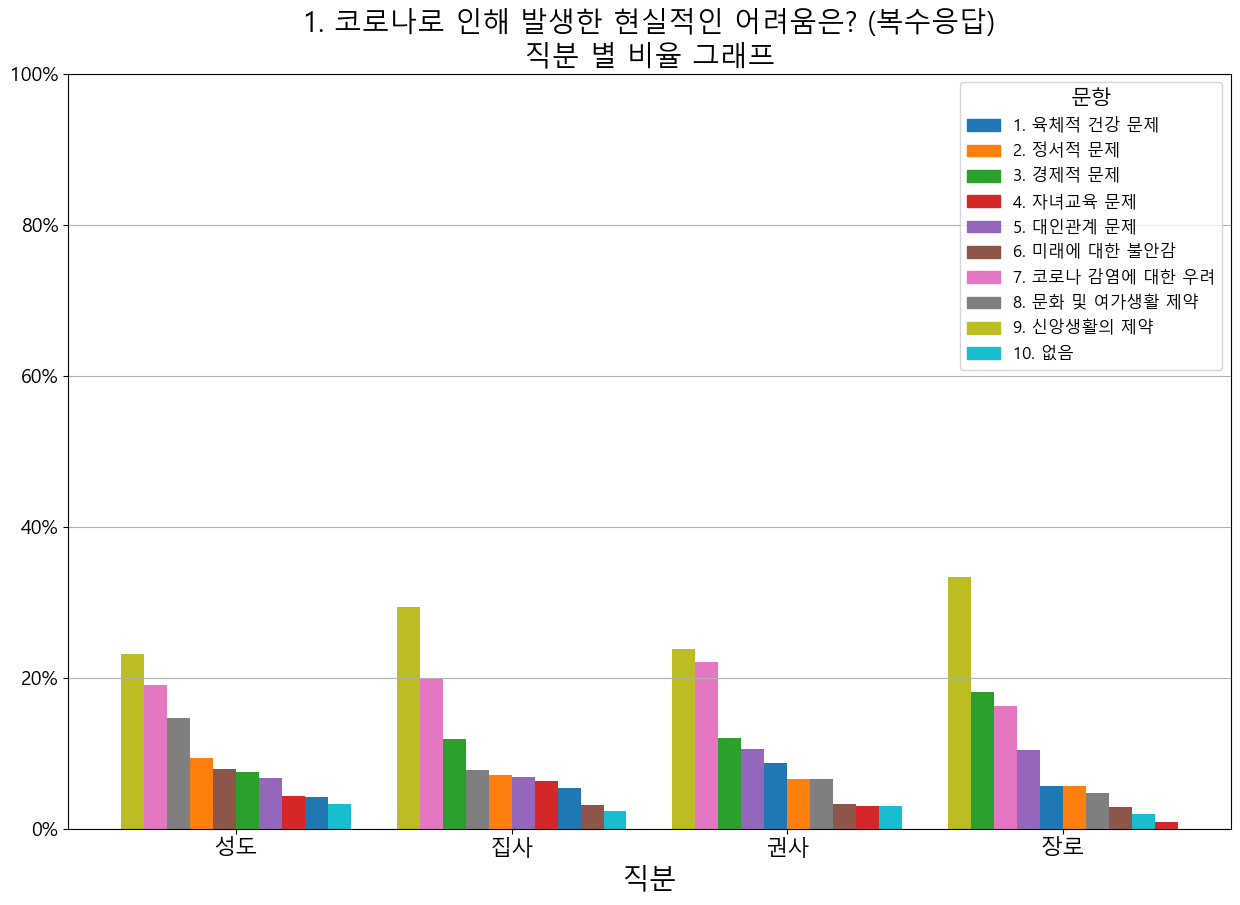

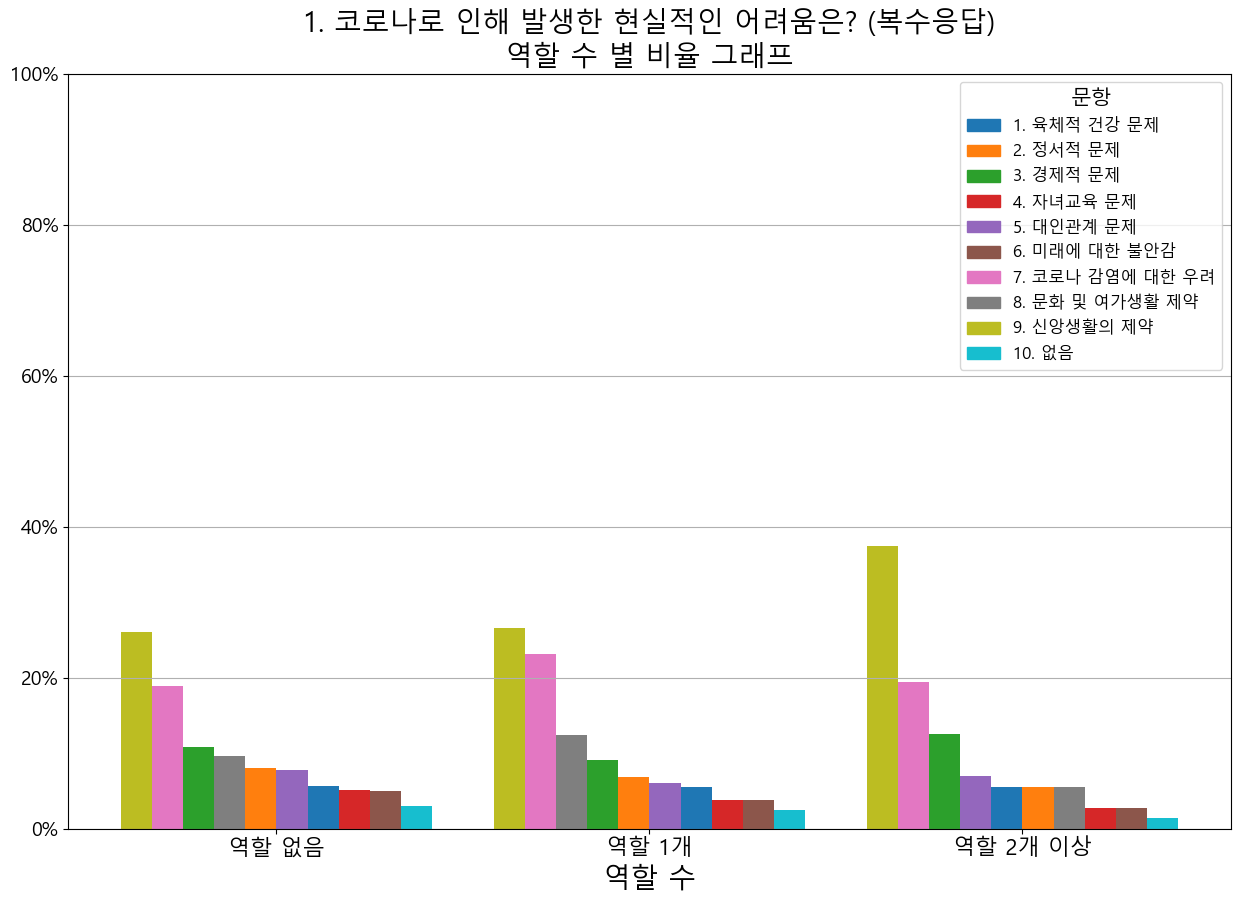

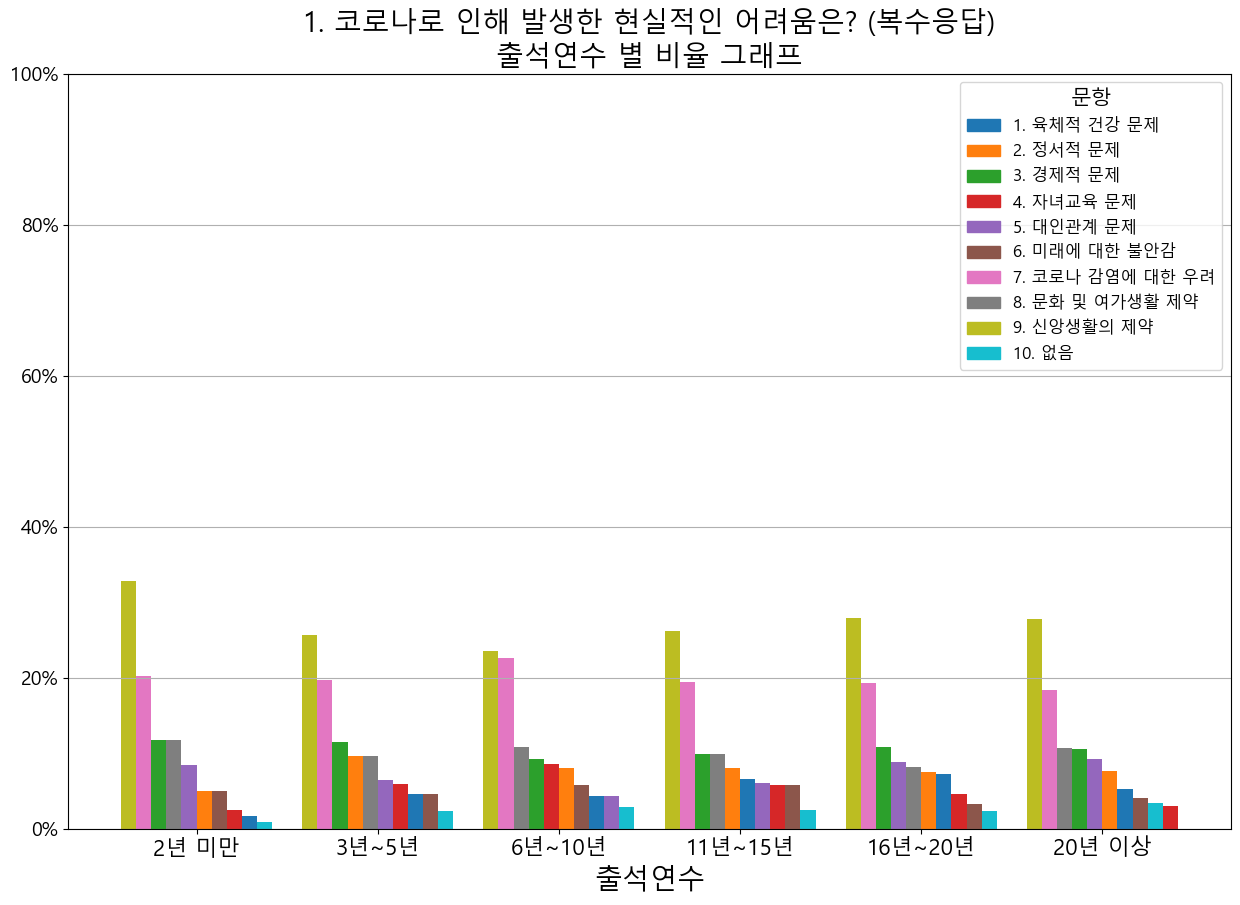

In [ ]:
all_color_list = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
color_list = all_color_list[:len(table.columns)]
gap = len(table.columns) / 2 - 0.5

# 그래프 제목 설정
for question in data.columns[:-1]:
    if Q == int(re.findall('\d+', question)[0]):
        title = question
    
# 범례(legend) 설정
ax_list = []
for idx in range(len(q_table.columns)):
    ax_list.append(mpatches.Patch(color = color_list[idx], label = f'{q_table.columns[idx]}'))
    
plot_1()
plot_2()
plot_3()
plot_4()
plot_5()

### Q2. 코로나로 인해 신앙생활에 어떤 변화가 찾아왔나요?

#### 데이터 셋 준비

In [ ]:
Q = 2
Q_list.append(Q)
복수응답 = ""

In [ ]:
table_Q2 = pd.DataFrame(index = ['전체',
                                 '14~19세', '20~29세', '30~39세', '40~49세', '50~59세', '60~69세', '70세 이상',
                                 '성도', '집사', '권사', '장로',
                                 '역할 없음', '역할 1개', '역할 2개 이상',
                                 '2년 미만', '3년~5년', '6년~10년', '11년~15년', '16년~20년', '20년 이상'],
                        columns = ['1. 변화는 있지만, 신앙에 큰 문제 없음',
                                   '2. 큰 변화 없음',
                                   '3. 어려움이 있었지만 해결, 지금은 적응',
                                   '4. 변화가 크고 적응이 어려움, 신앙생활에 어려움 느낌'])

In [ ]:
df_Q2 = df.copy()
df_Q2['Q2_1'] = 0
df_Q2['Q2_2'] = 0
df_Q2['Q2_3'] = 0
df_Q2['Q2_4'] = 0

In [ ]:
nan_index = []

for idx, Q2 in enumerate(data['2. 코로나로 인해 신앙생활에 어떤 변화가 찾아왔나요?']):
    if type(Q2) == float:
        nan_index.append(idx)
    elif type(Q2) == str:
        if '변화는 있지만' in Q2:
            df_Q2['Q2_1'].iloc[idx] = 1
        if '큰 변화 없다' in Q2:
            df_Q2['Q2_2'].iloc[idx] = 1
        if '어려움이 있었지만' in Q2:
            df_Q2['Q2_3'].iloc[idx] = 1
        if '변화가 크고' in Q2:
            df_Q2['Q2_4'].iloc[idx] = 1
        if df_Q2.iloc[idx, col_num:].sum() == 0:
            nan_index.append(idx)
        
df_Q2.drop(df_Q2.index[nan_index], axis = 0, inplace = True)

#### 빈도수 & 비율 테이블

In [ ]:
table, q_table, f_table = make_table(Q)

#### 시각화

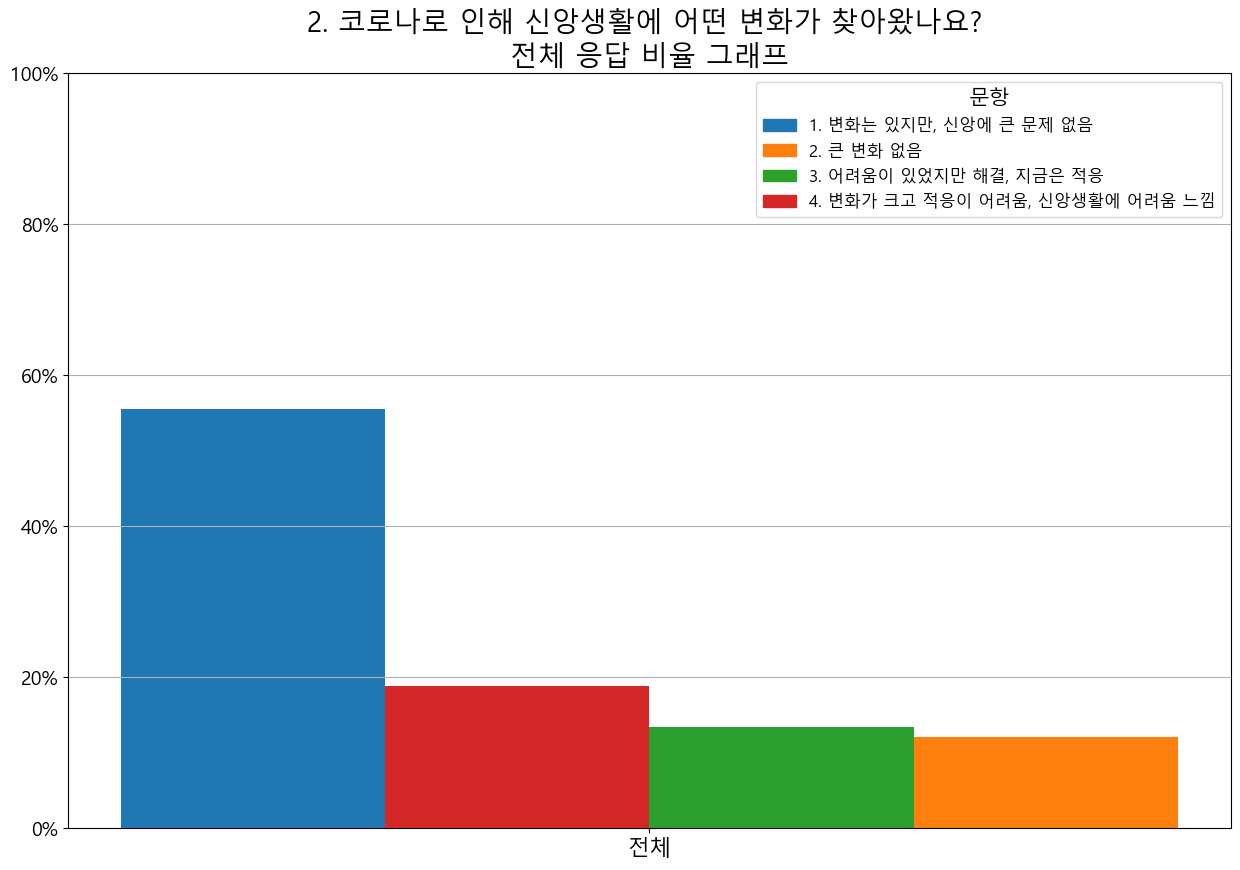

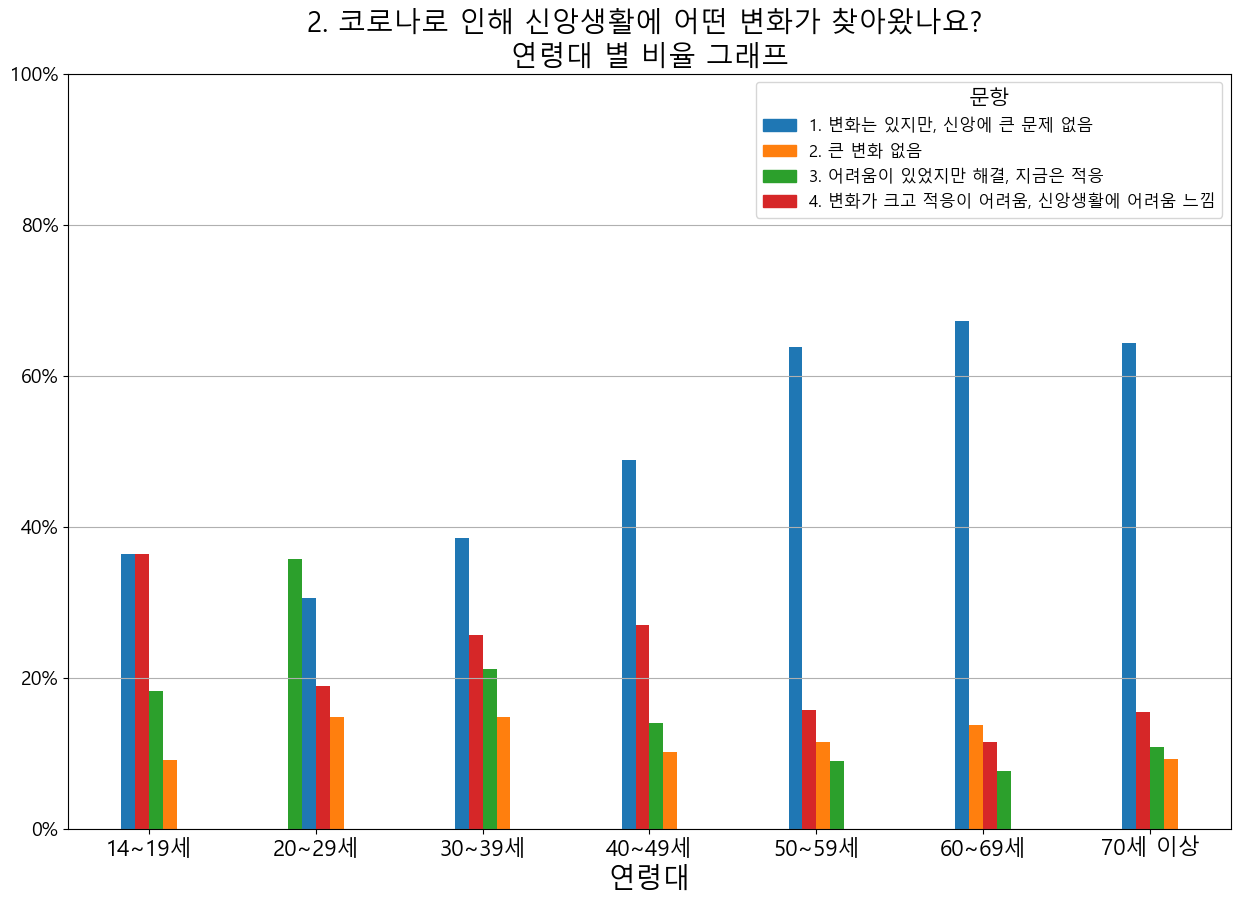

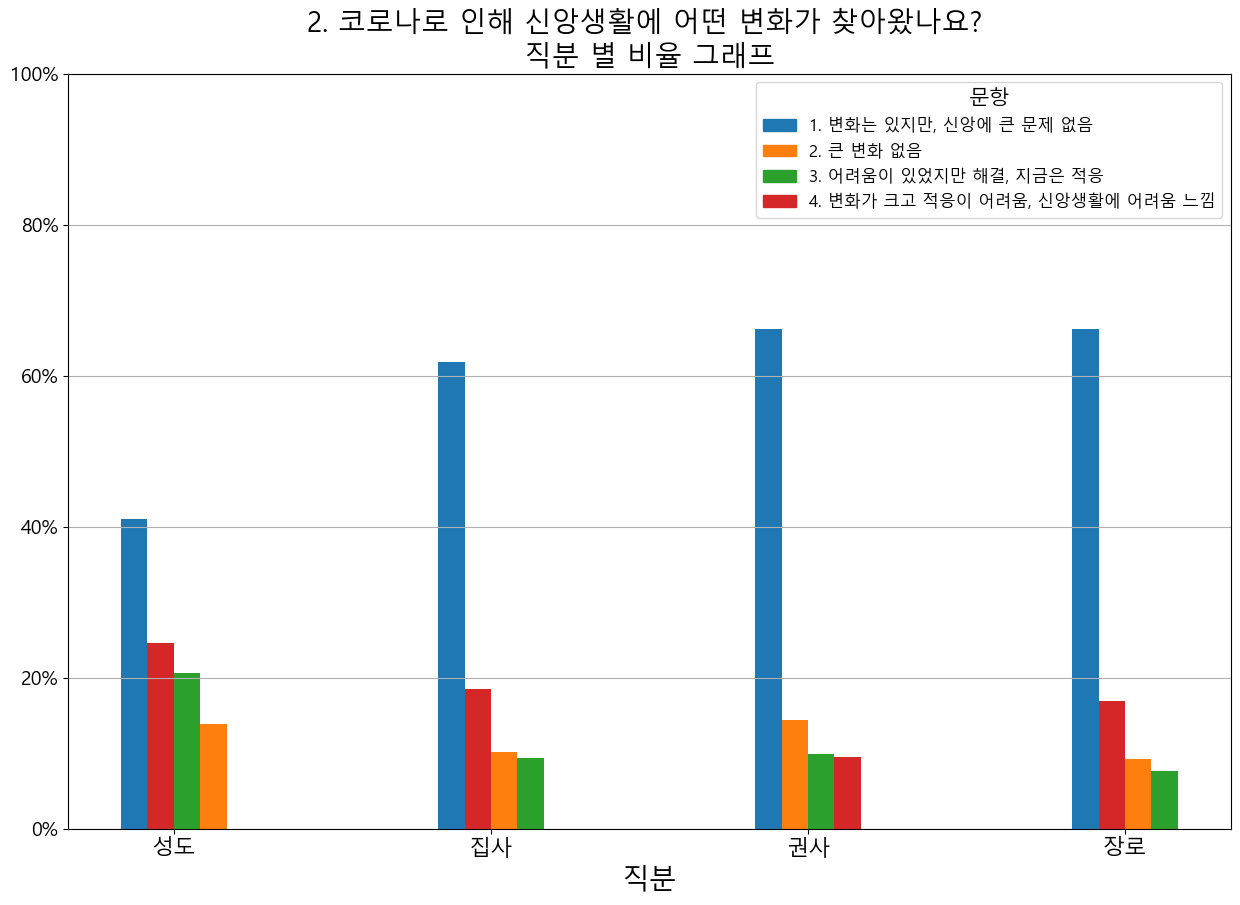

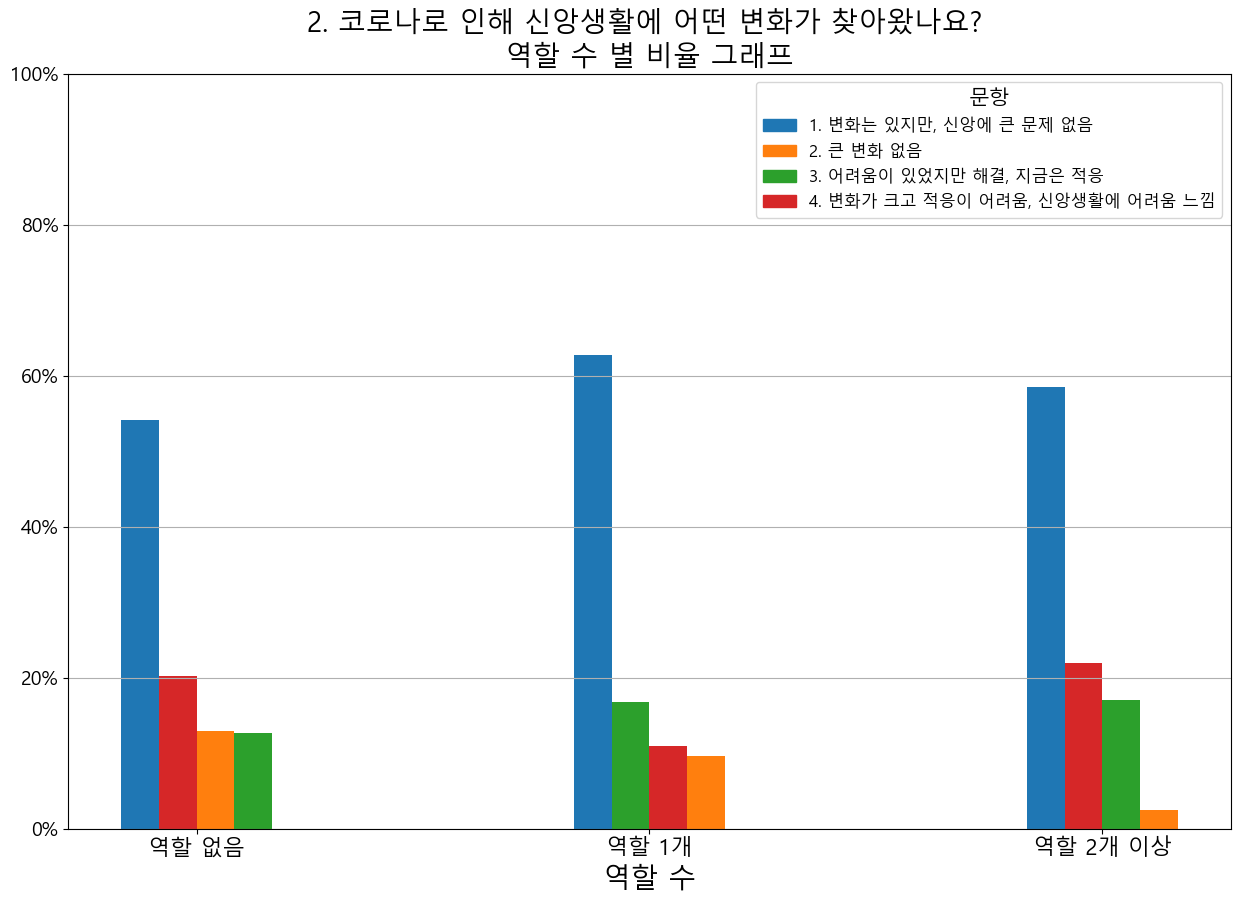

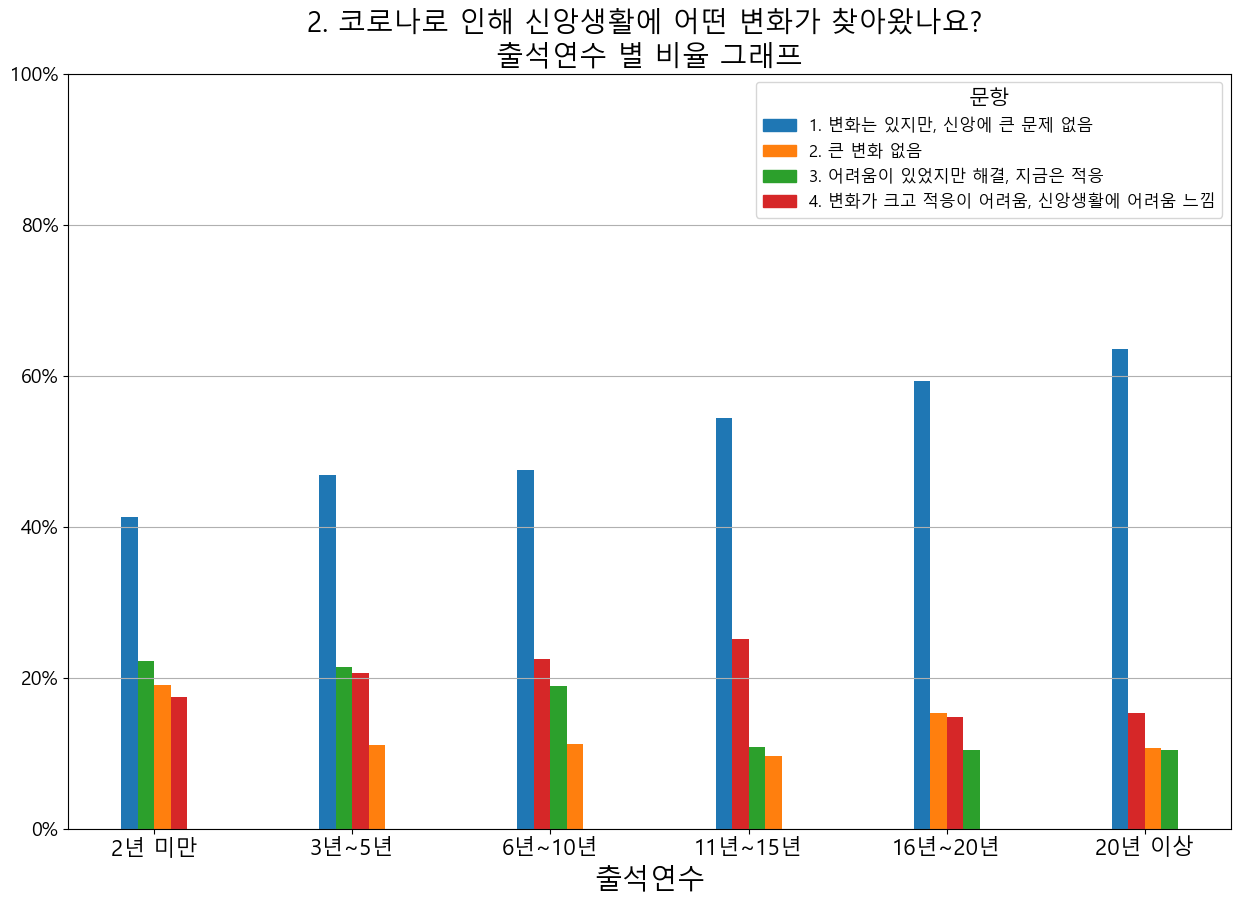

In [ ]:
all_color_list = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
color_list = all_color_list[:len(table.columns)]
gap = len(table.columns) / 2 - 0.5

# 그래프 제목 설정
for question in data.columns[:-1]:
    if Q == int(re.findall('\d+', question)[0]):
        title = question
    
# 범례(legend) 설정
ax_list = []
for idx in range(len(q_table.columns)):
    ax_list.append(mpatches.Patch(color = color_list[idx], label = f'{q_table.columns[idx]}'))
    
plot_1()
plot_2()
plot_3()
plot_4()
plot_5()

### Q3. 코로나 상황이 나의 신앙생활에 미치는 긍정적인 점은? (2개까지 중복가능)

#### 데이터 셋 준비

In [ ]:
Q = 3
Q_list.append(Q)
복수응답 = "(복수응답)"

In [ ]:
table_Q3 = pd.DataFrame(index = ['전체',
                                 '14~19세', '20~29세', '30~39세', '40~49세', '50~59세', '60~69세', '70세 이상',
                                 '성도', '집사', '권사', '장로',
                                 '역할 없음', '역할 1개', '역할 2개 이상',
                                 '2년 미만', '3년~5년', '6년~10년', '11년~15년', '16년~20년', '20년 이상'],
                        columns = ['1. 신앙과 교회공동체의 소중함을 더 깊이 알게 됨',
                                   '2. 현장예배에 대한 중요성을 체감',
                                   '3. 일상의 자리가 예배와 선교지임을 깨닫게 됨',
                                   '4. 개인 경건시간 증가(말씀, 기도 등)',
                                   '5. 교회사역을 통해 하나님께 더 가까이 나아가는 기회가 됨'])

In [ ]:
df_Q3 = df.copy()
df_Q3['Q3_1'] = 0
df_Q3['Q3_2'] = 0
df_Q3['Q3_3'] = 0
df_Q3['Q3_4'] = 0
df_Q3['Q3_5'] = 0

In [ ]:
nan_index = []

for idx, Q3 in enumerate(data['3. 코로나 상황이 나의 신앙생활에 미치는 긍정적인 점은?']):
    if type(Q3) == float:
        nan_index.append(idx)
    elif type(Q3) == str:
        if '신앙과 교회' in Q3:
            df_Q3['Q3_1'].iloc[idx] = 1
        if '현장예배' in Q3:
            df_Q3['Q3_2'].iloc[idx] = 1
        if '일상의 자리' in Q3:
            df_Q3['Q3_3'].iloc[idx] = 1
        if '경건시간' in Q3:
            df_Q3['Q3_4'].iloc[idx] = 1
        if '교회사역' in Q3:
            df_Q3['Q3_5'].iloc[idx] = 1
        if df_Q3.iloc[idx, col_num:].sum() == 0:
            nan_index.append(idx)
        
df_Q3.drop(df_Q3.index[nan_index], axis = 0, inplace = True)

#### 빈도수 & 비율 테이블

In [ ]:
table, q_table, f_table = make_table(Q)

#### 시각화

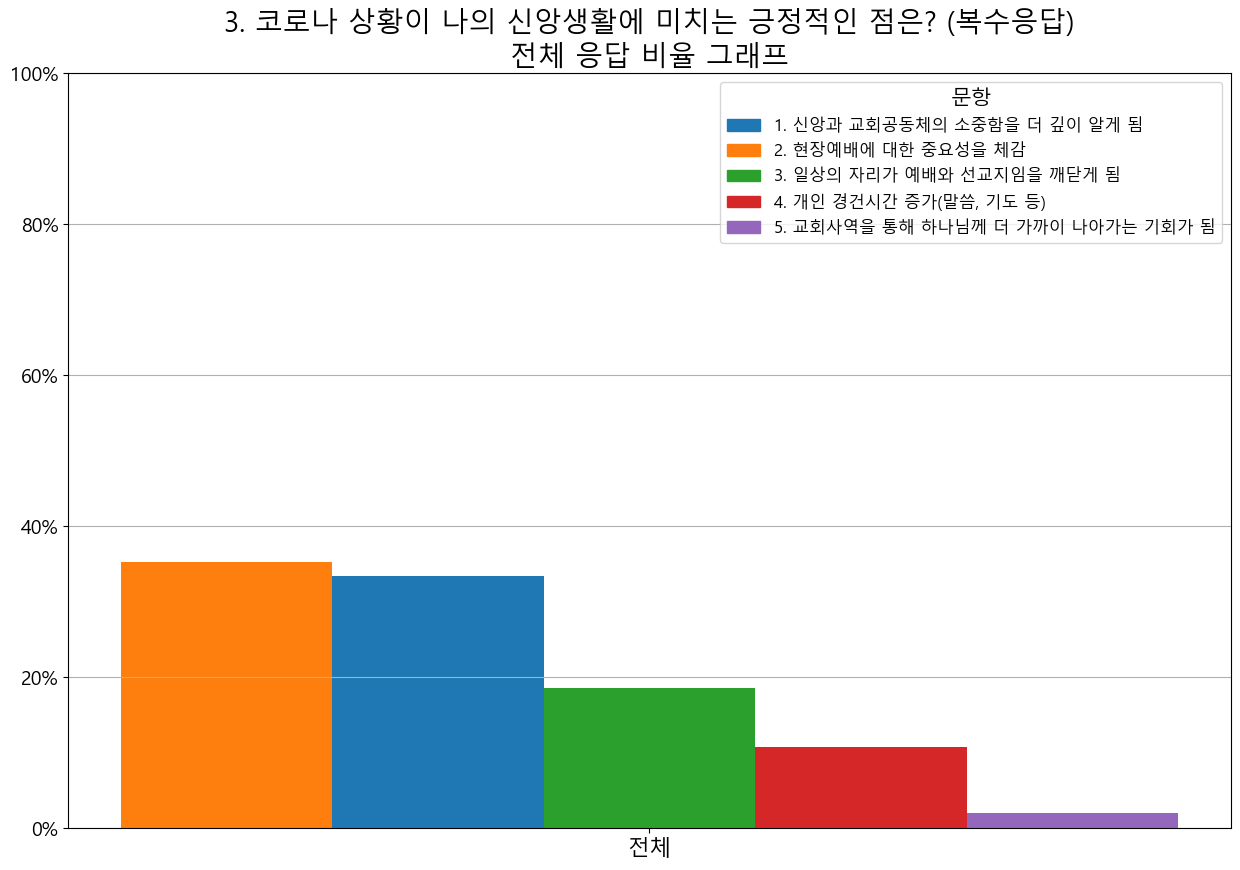

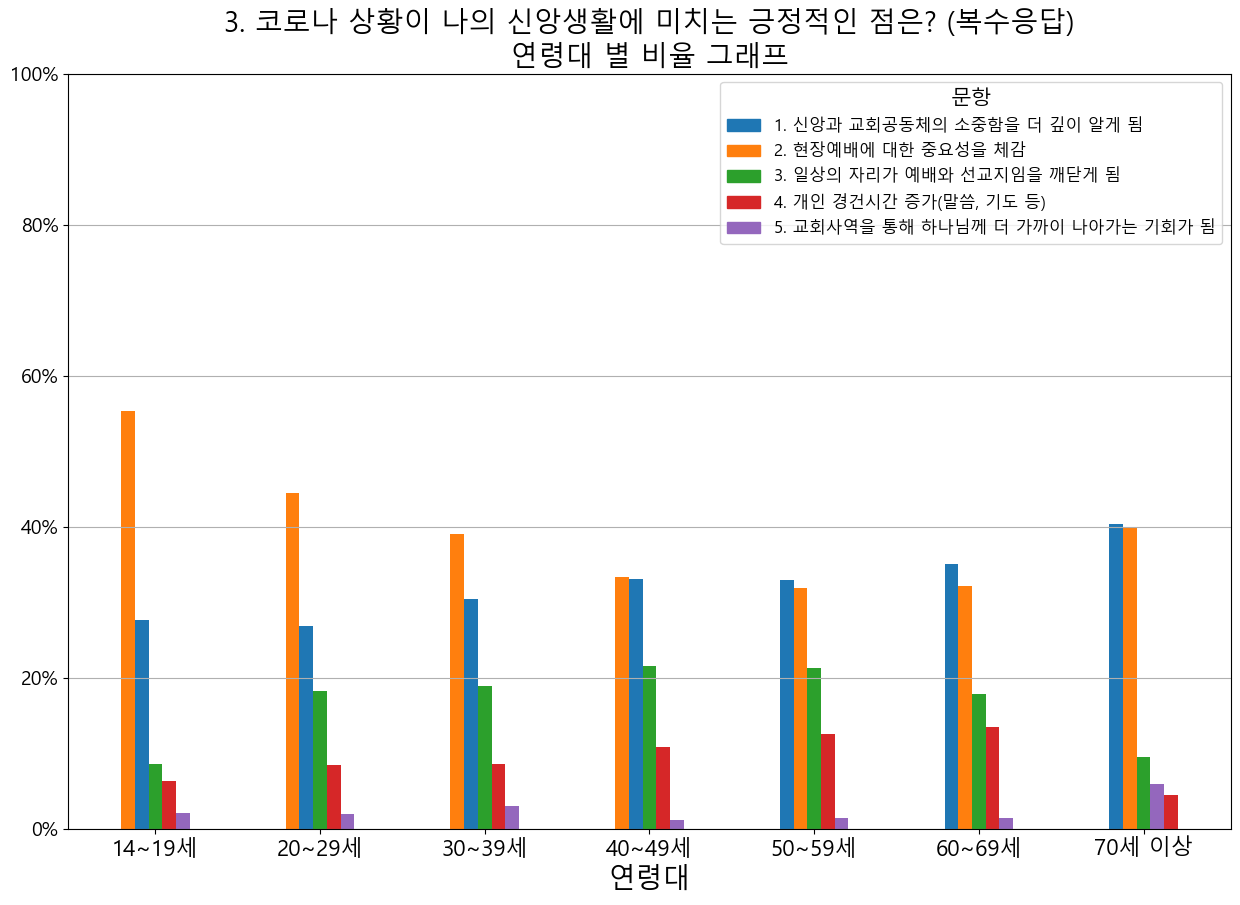

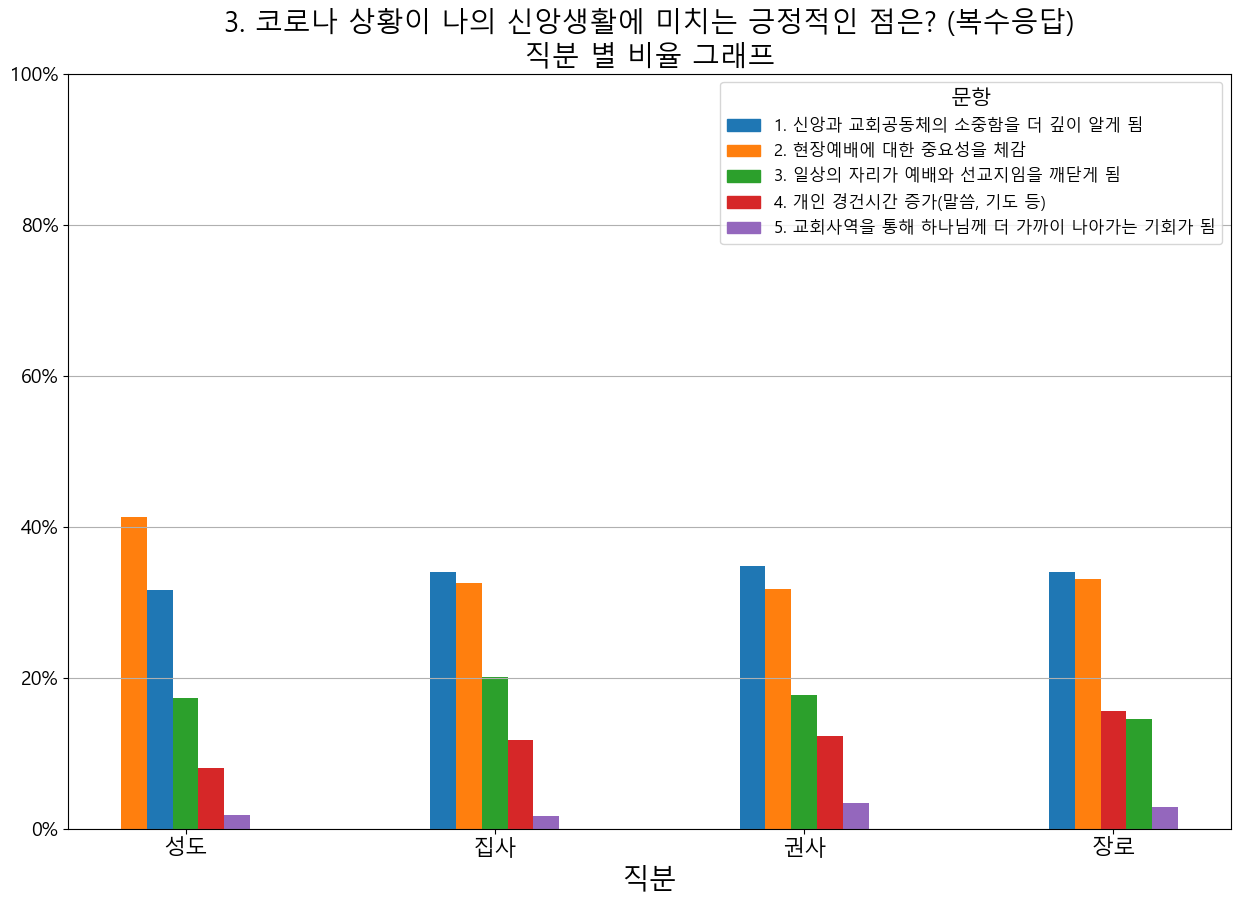

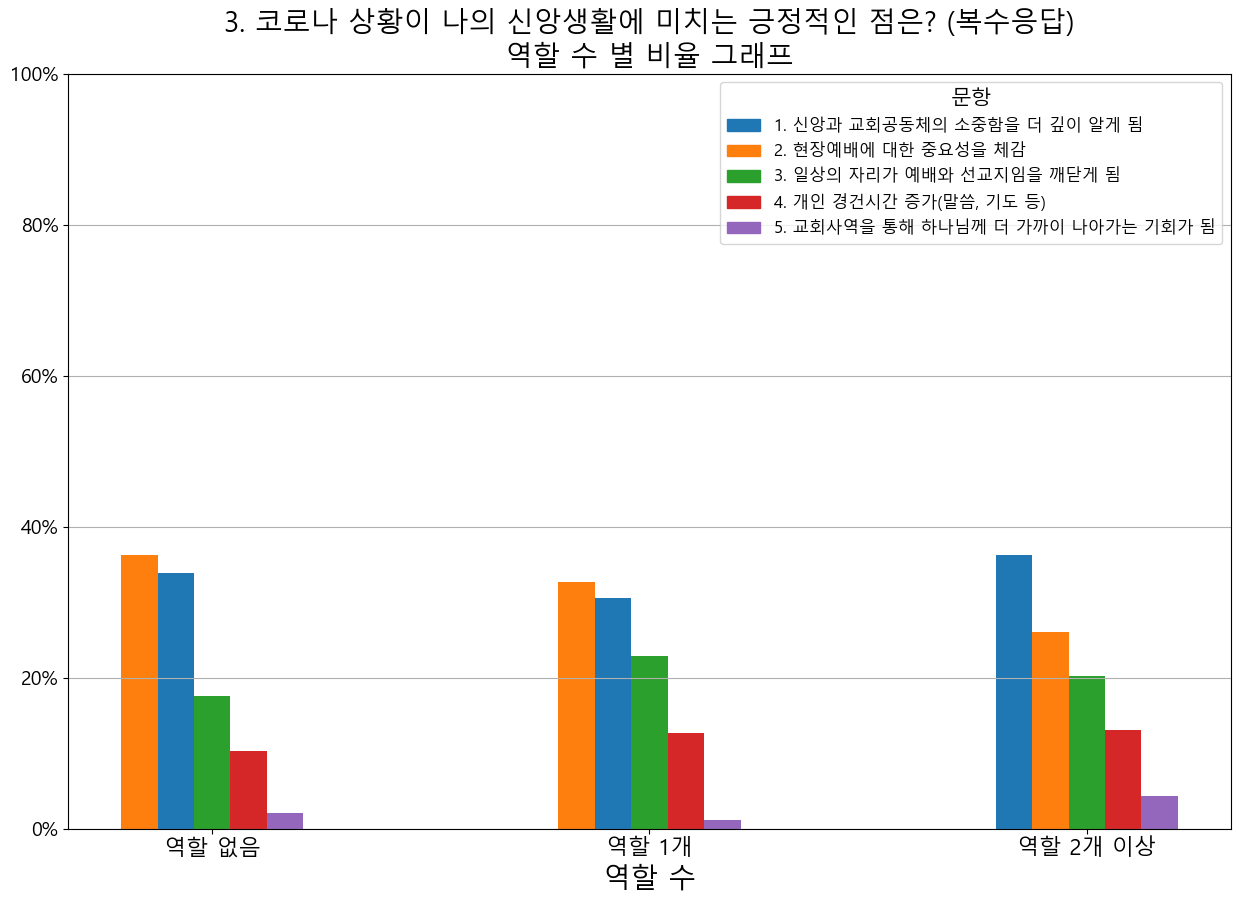

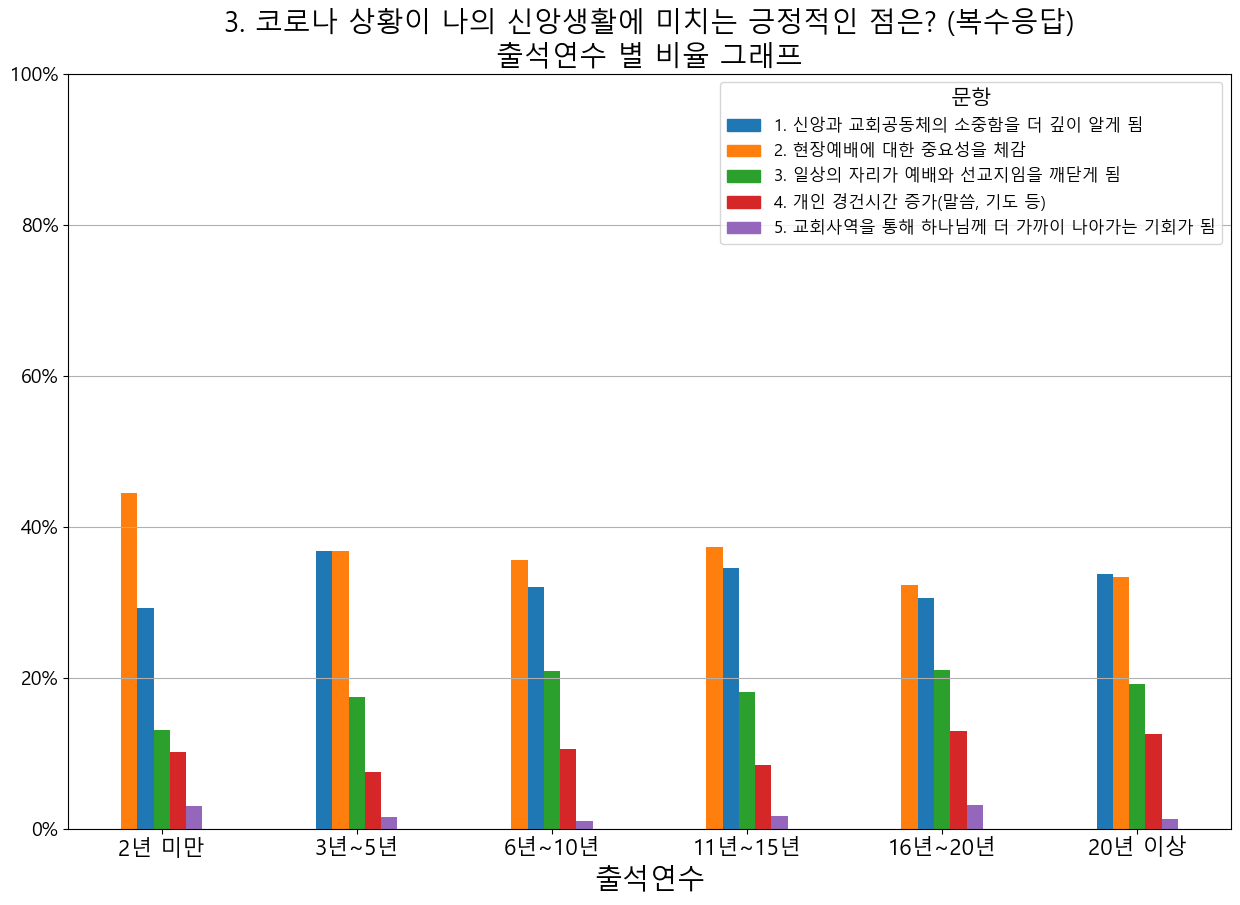

In [ ]:
all_color_list = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
color_list = all_color_list[:len(table.columns)]
gap = len(table.columns) / 2 - 0.5

# 그래프 제목 설정
for question in data.columns[:-1]:
    if Q == int(re.findall('\d+', question)[0]):
        title = question
    
# 범례(legend) 설정
ax_list = []
for idx in range(len(q_table.columns)):
    ax_list.append(mpatches.Patch(color = color_list[idx], label = f'{q_table.columns[idx]}'))
    
plot_1()
plot_2()
plot_3()
plot_4()
plot_5()

### Q4. 코로나 상황에서 발생하는 신앙생활의 어려운 점은? (2개까지 중복가능)

#### 데이터 셋 준비

In [ ]:
Q = 4
Q_list.append(Q)
복수응답 = "(복수응답)"

In [ ]:
table_Q4 = pd.DataFrame(index = ['전체',
                                 '14~19세', '20~29세', '30~39세', '40~49세', '50~59세', '60~69세', '70세 이상',
                                 '성도', '집사', '권사', '장로',
                                 '역할 없음', '역할 1개', '역할 2개 이상',
                                 '2년 미만', '3년~5년', '6년~10년', '11년~15년', '16년~20년', '20년 이상'],
                        columns = ['1. 성도 간 교제',
                                   '2. 예배에 집중',
                                   '3. 교회에 자주 못감',
                                   '4. 소속감 저하',
                                   '5. 개인경건생활 소홀(말씀, 기도, 드림)',
                                   '6. 신앙 열정 약화',
                                   '7. 자녀들의 신앙교육',
                                   '8. 교역자와 상담 및 소통'])

In [ ]:
df_Q4 = df.copy()
df_Q4['Q4_1'] = 0
df_Q4['Q4_2'] = 0
df_Q4['Q4_3'] = 0
df_Q4['Q4_4'] = 0
df_Q4['Q4_5'] = 0
df_Q4['Q4_6'] = 0
df_Q4['Q4_7'] = 0
df_Q4['Q4_8'] = 0

In [ ]:
nan_index = []

for idx, Q4 in enumerate(data['4. 코로나 상황에서 발생하는 신앙생활의 어려운 점은?']):
    if type(Q4) == float:
        nan_index.append(idx)
    elif type(Q4) == str:
        if '성도 간의 교제' in Q4:
            df_Q4['Q4_1'].iloc[idx] = 1
        if '예배에 집중' in Q4:
            df_Q4['Q4_2'].iloc[idx] = 1
        if '교회에 자주' in Q4:
            df_Q4['Q4_3'].iloc[idx] = 1
        if '소속감 저하' in Q4:
            df_Q4['Q4_4'].iloc[idx] = 1
        if '경건생활 소홀' in Q4:
            df_Q4['Q4_5'].iloc[idx] = 1
        if '신앙의 열정' in Q4:
            df_Q4['Q4_6'].iloc[idx] = 1
        if '자녀들의 신앙교육' in Q4:
            df_Q4['Q4_7'].iloc[idx] = 1
        if '교역자' in Q4:
            df_Q4['Q4_8'].iloc[idx] = 1
        if df_Q4.iloc[idx, col_num:].sum() == 0:
            nan_index.append(idx)
        
df_Q4.drop(df_Q4.index[nan_index], axis = 0, inplace = True)

#### 빈도수 & 비율 테이블

In [ ]:
table, q_table, f_table = make_table(Q)

#### 시각화

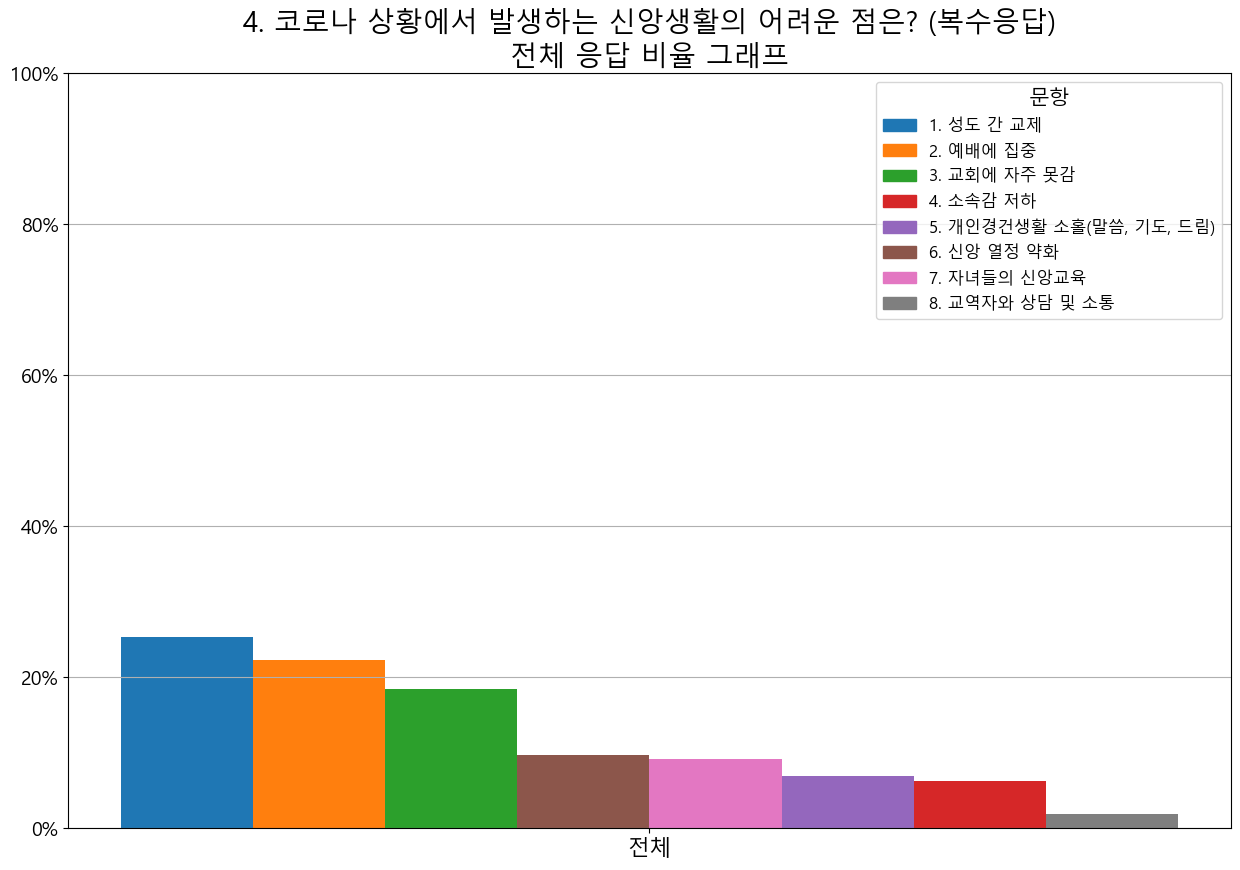

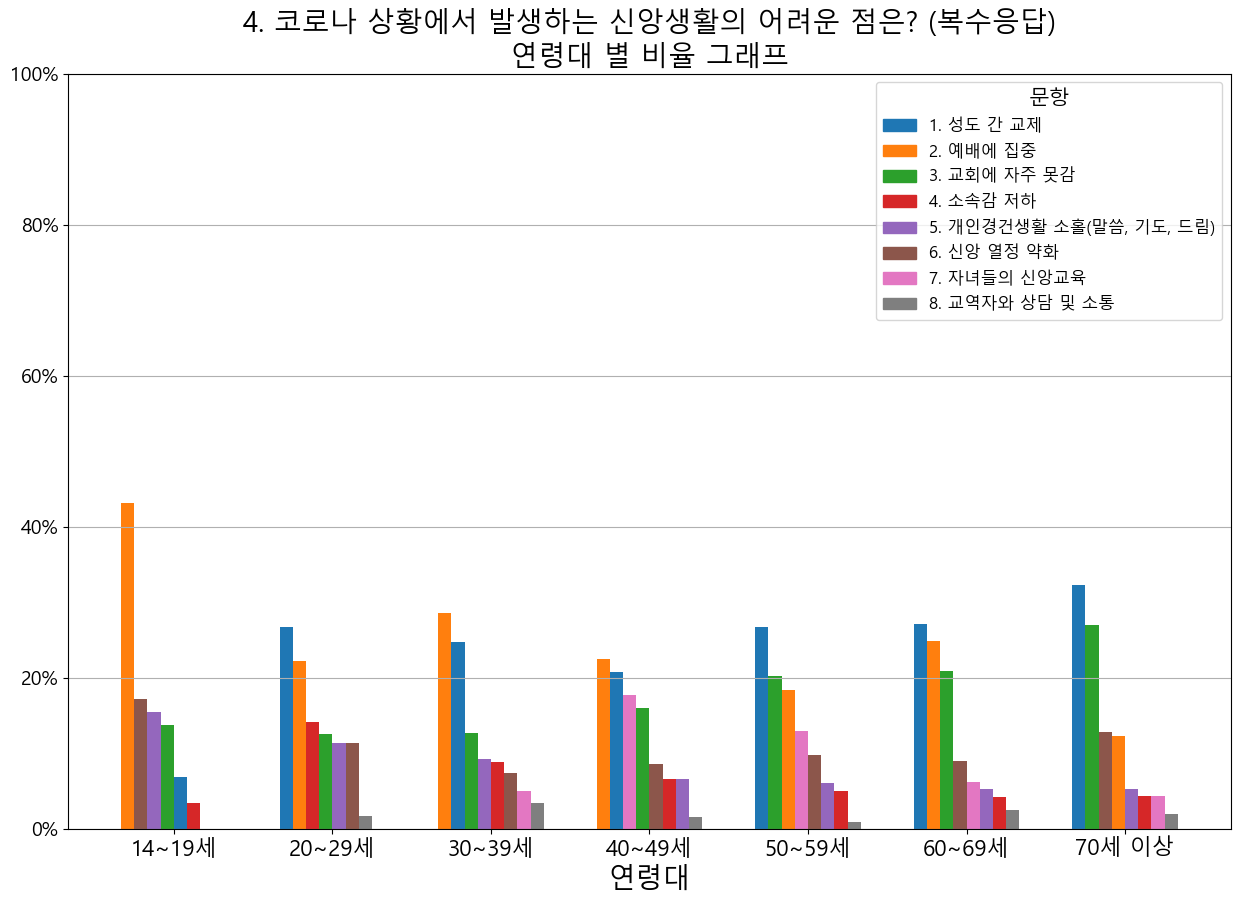

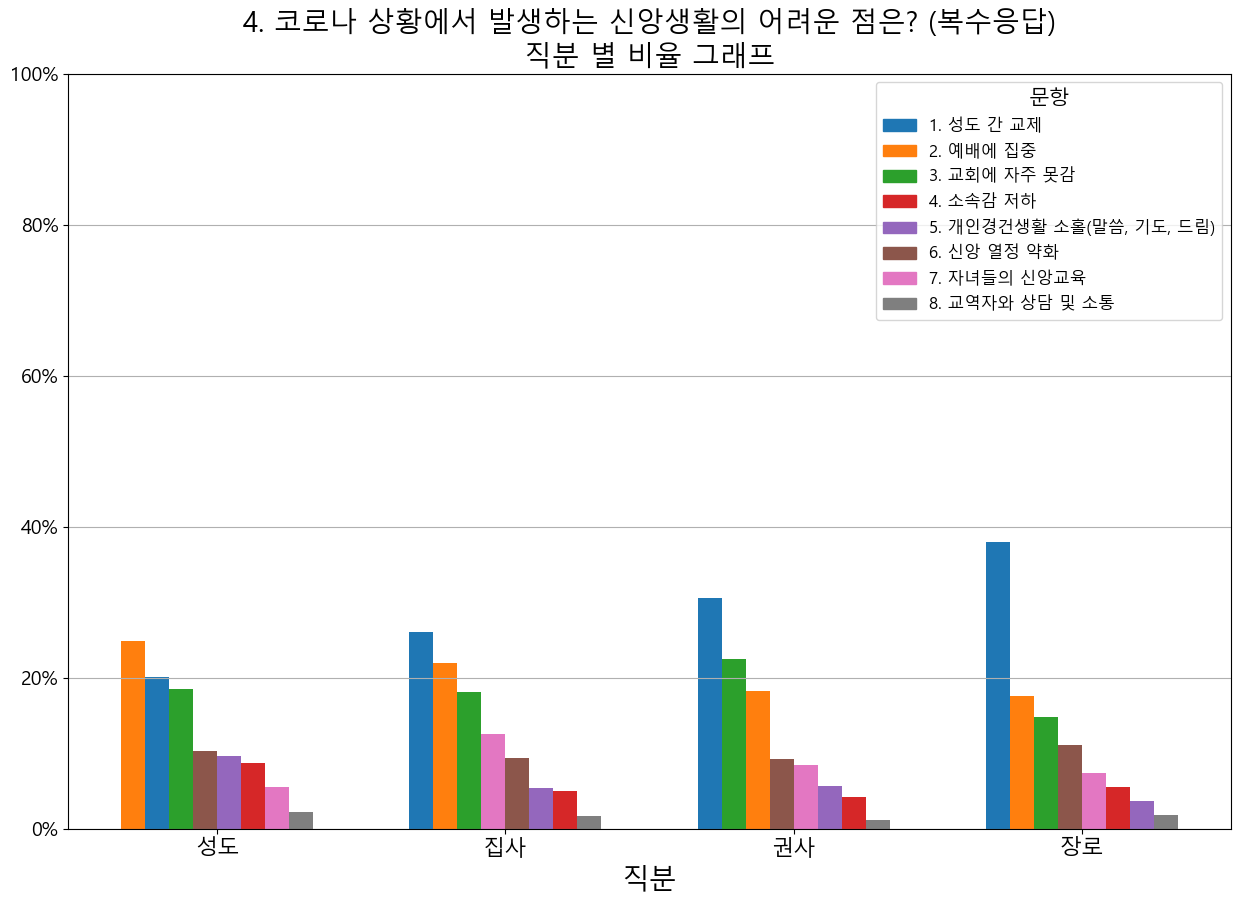

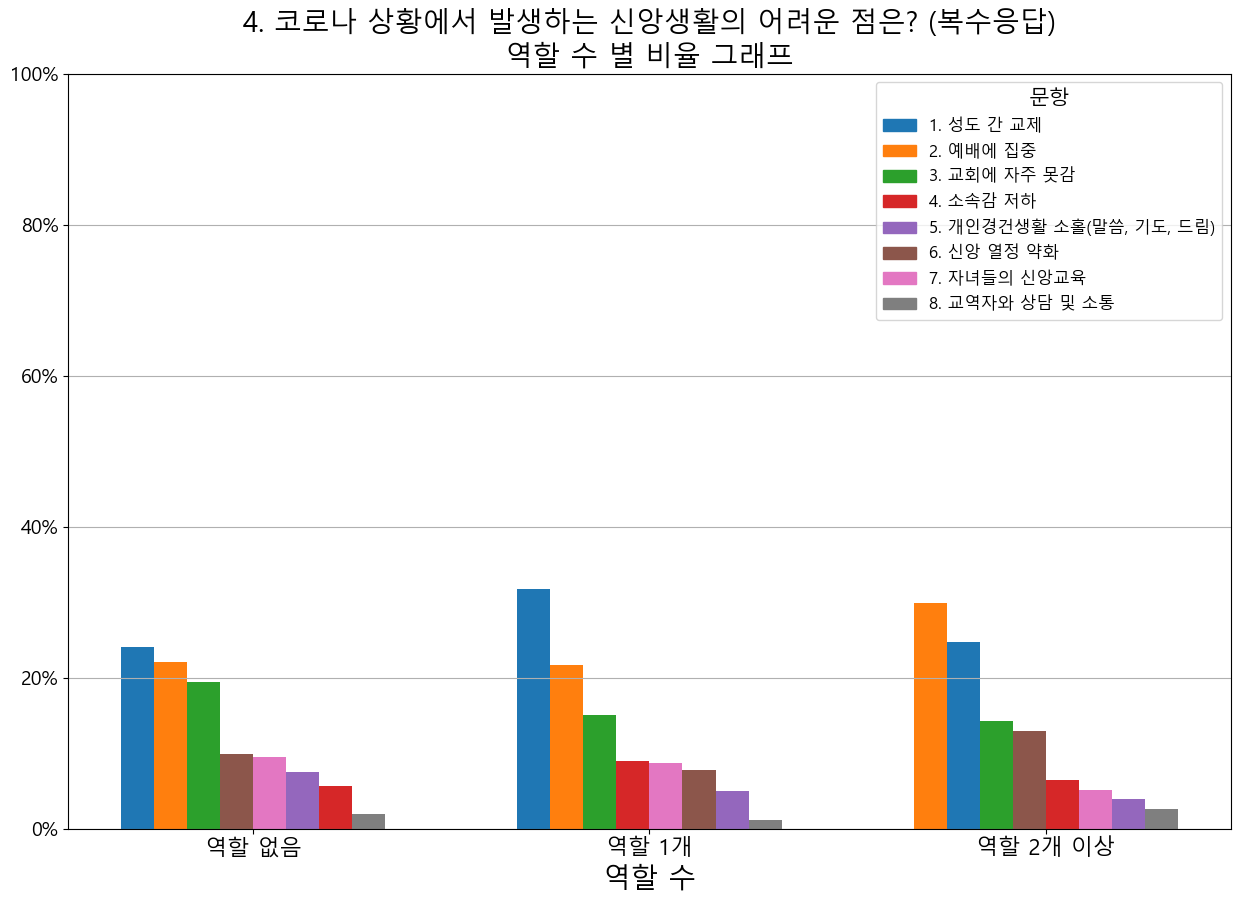

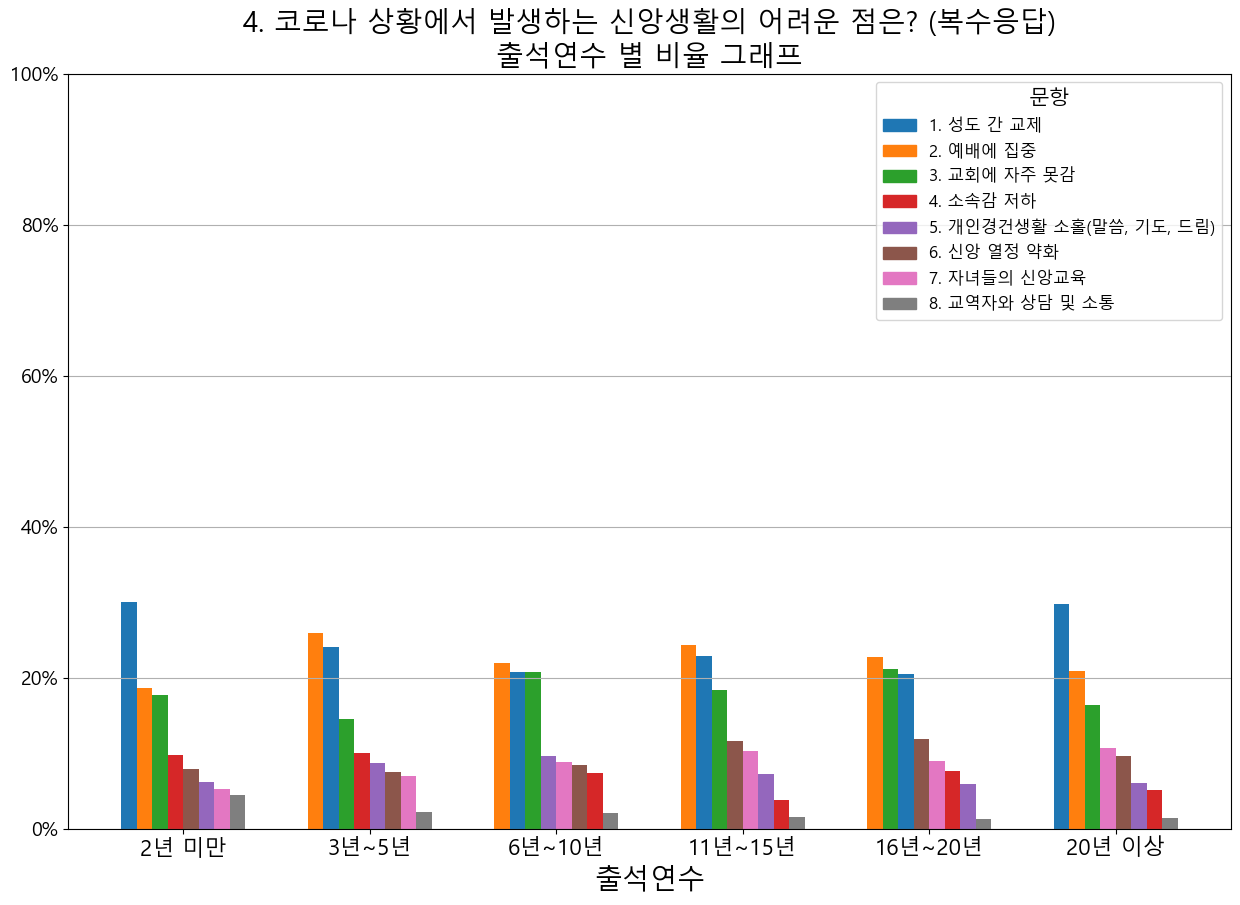

In [ ]:
all_color_list = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
color_list = all_color_list[:len(table.columns)]
gap = len(table.columns) / 2 - 0.5

# 그래프 제목 설정
for question in data.columns[:-1]:
    if Q == int(re.findall('\d+', question)[0]):
        title = question
    
# 범례(legend) 설정
ax_list = []
for idx in range(len(q_table.columns)):
    ax_list.append(mpatches.Patch(color = color_list[idx], label = f'{q_table.columns[idx]}'))
    
plot_1()
plot_2()
plot_3()
plot_4()
plot_5()

### Q5. 코로나 이전과 이후 경건생활에 사용하는 시간을 비교한다면?

#### 데이터 셋 준비

In [ ]:
Q = 5
Q_list.append(Q)
복수응답 = ""

In [ ]:
table_Q5 = pd.DataFrame(index = ['전체',
                                 '14~19세', '20~29세', '30~39세', '40~49세', '50~59세', '60~69세', '70세 이상',
                                 '성도', '집사', '권사', '장로',
                                 '역할 없음', '역할 1개', '역할 2개 이상',
                                 '2년 미만', '3년~5년', '6년~10년', '11년~15년', '16년~20년', '20년 이상'],
                        columns = ['1. 이전보다 늘었다',
                                   '2. 비슷하다',
                                   '3. 이전보다 줄었다',
                                   '4. 별도의 경건시간 없다',])

In [ ]:
df_Q5 = df.copy()
df_Q5['Q5_1'] = 0
df_Q5['Q5_2'] = 0
df_Q5['Q5_3'] = 0
df_Q5['Q5_4'] = 0

In [ ]:
nan_index = []

for idx, Q5 in enumerate(data['5. 코로나 이전과 이후 경건생활에 사용하는 시간을 비교한다면?']):
    if type(Q5) == float:
        nan_index.append(idx)
    elif type(Q5) == str:
        if '이전보다 늘었다' in Q5:
            df_Q5['Q5_1'].iloc[idx] = 1
        if '비슷하다' in Q5:
            df_Q5['Q5_2'].iloc[idx] = 1
        if '이전보다 줄었다' in Q5:
            df_Q5['Q5_3'].iloc[idx] = 1
        if '별도의 경건시간 없다' in Q5:
            df_Q5['Q5_4'].iloc[idx] = 1
        if df_Q5.iloc[idx, col_num:].sum() == 0:
            nan_index.append(idx)
        
df_Q5.drop(df_Q5.index[nan_index], axis = 0, inplace = True)

#### 빈도수 & 비율 테이블

In [ ]:
table, q_table, f_table = make_table(Q)

#### 시각화

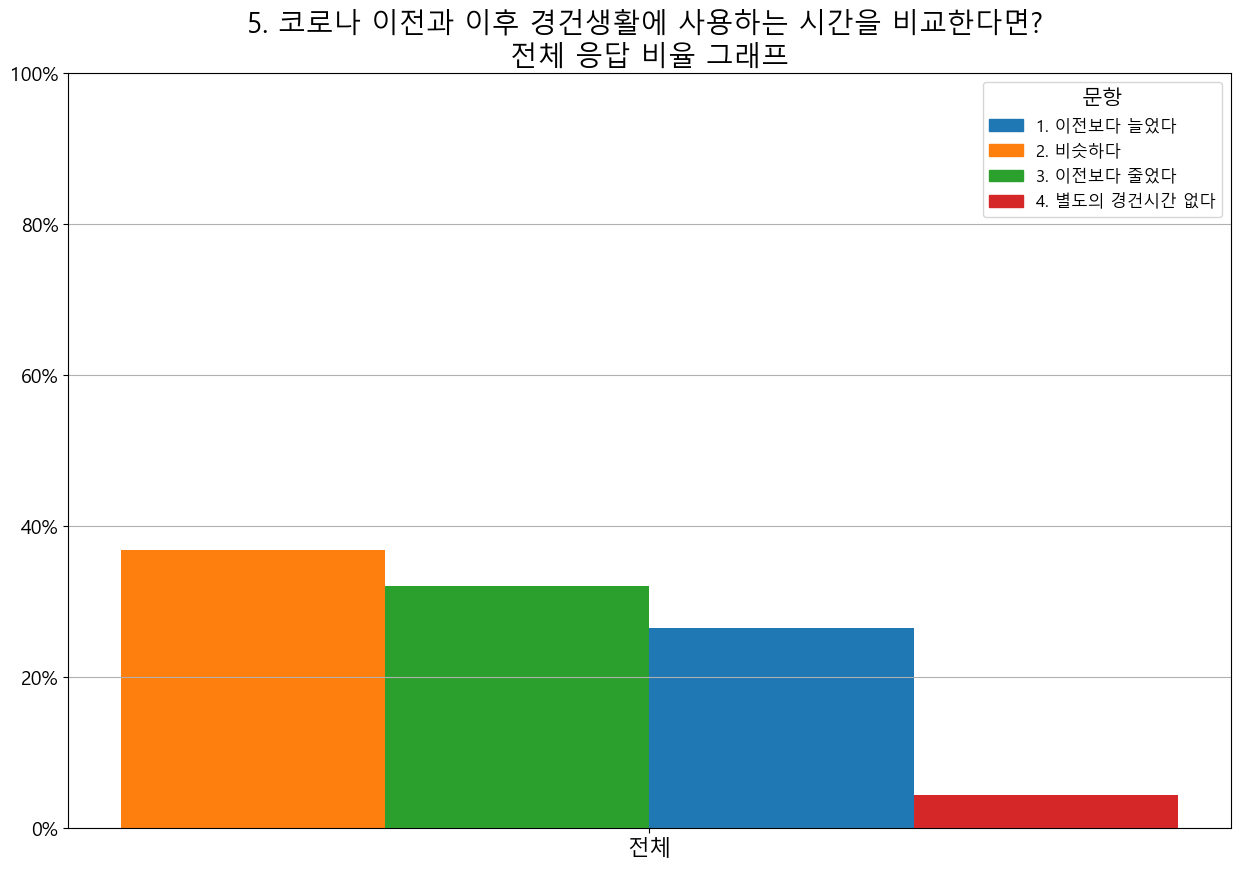

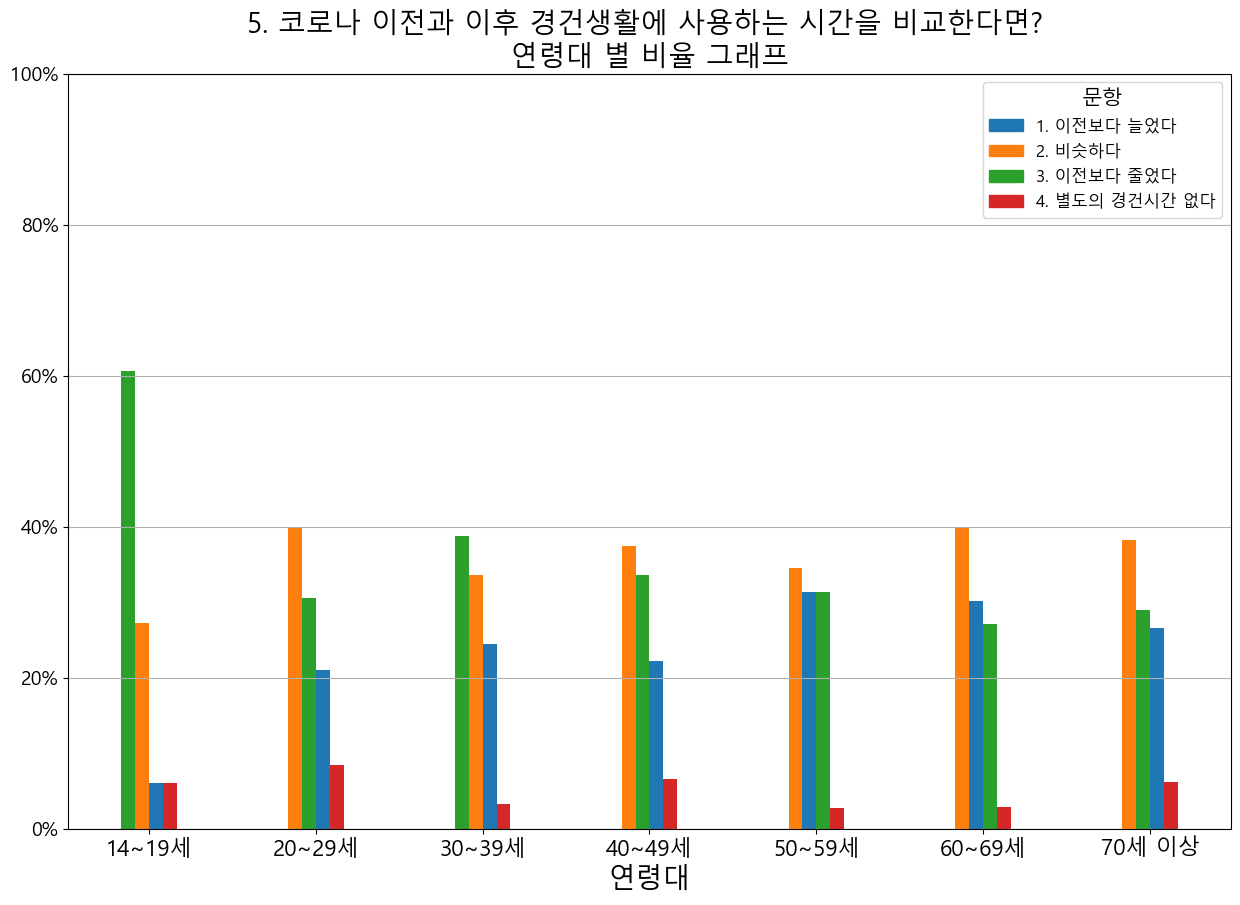

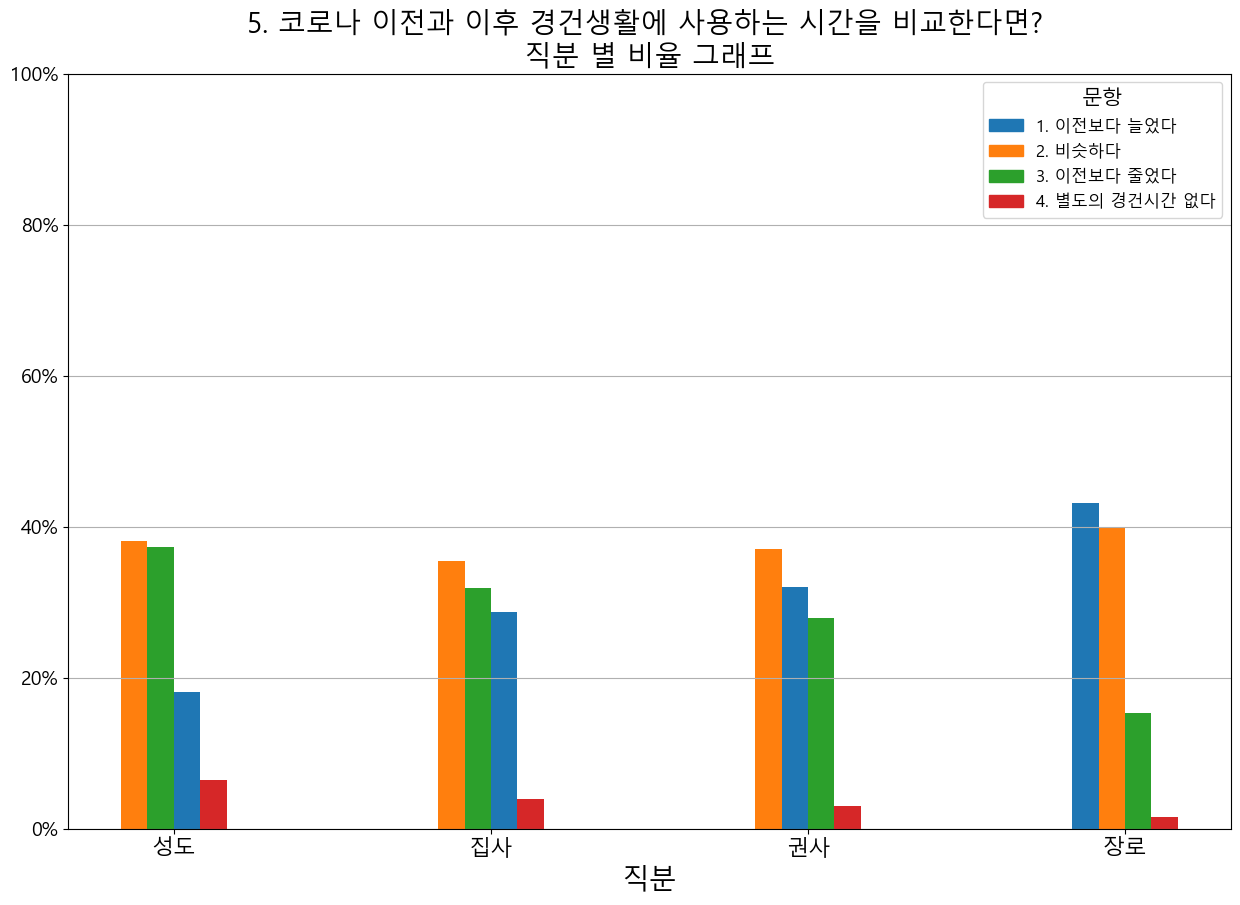

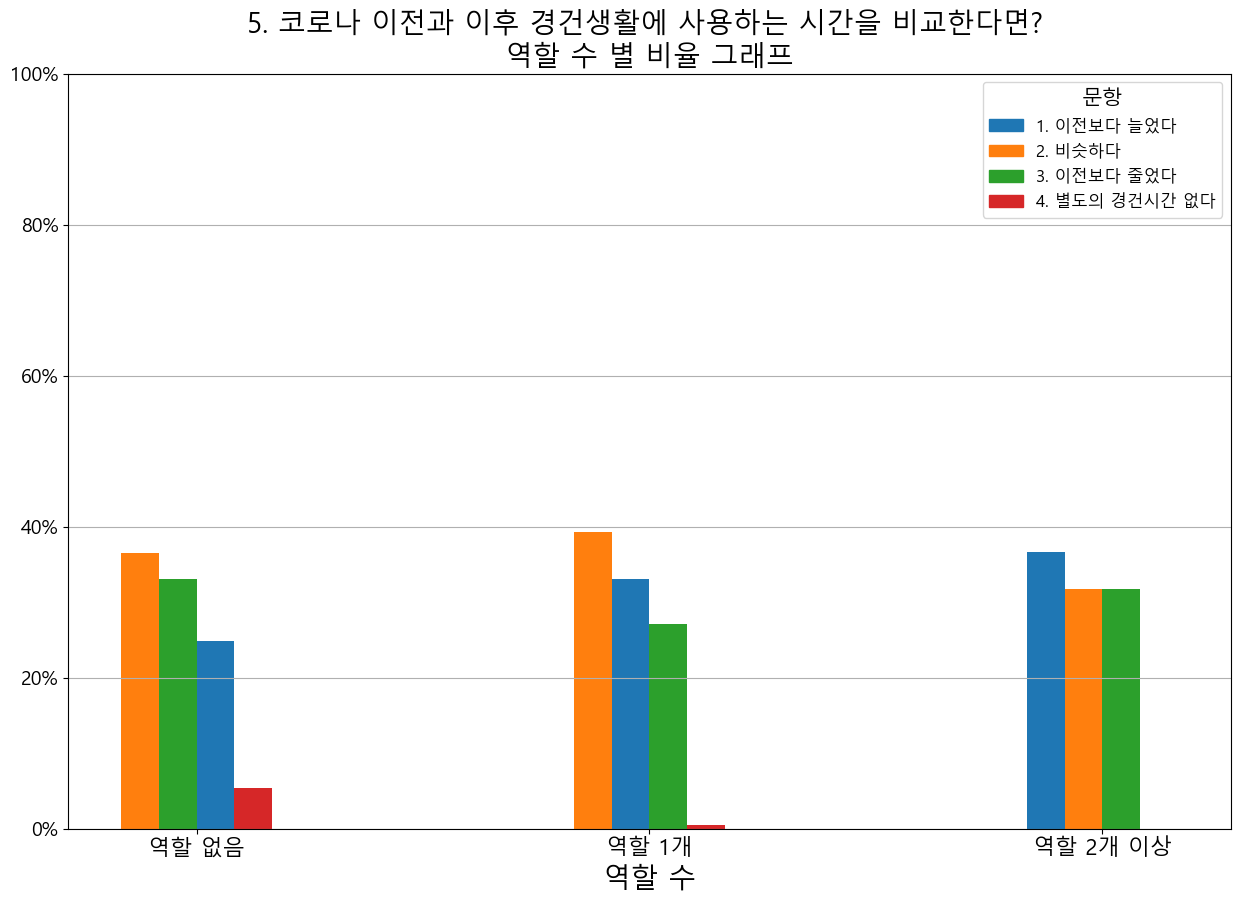

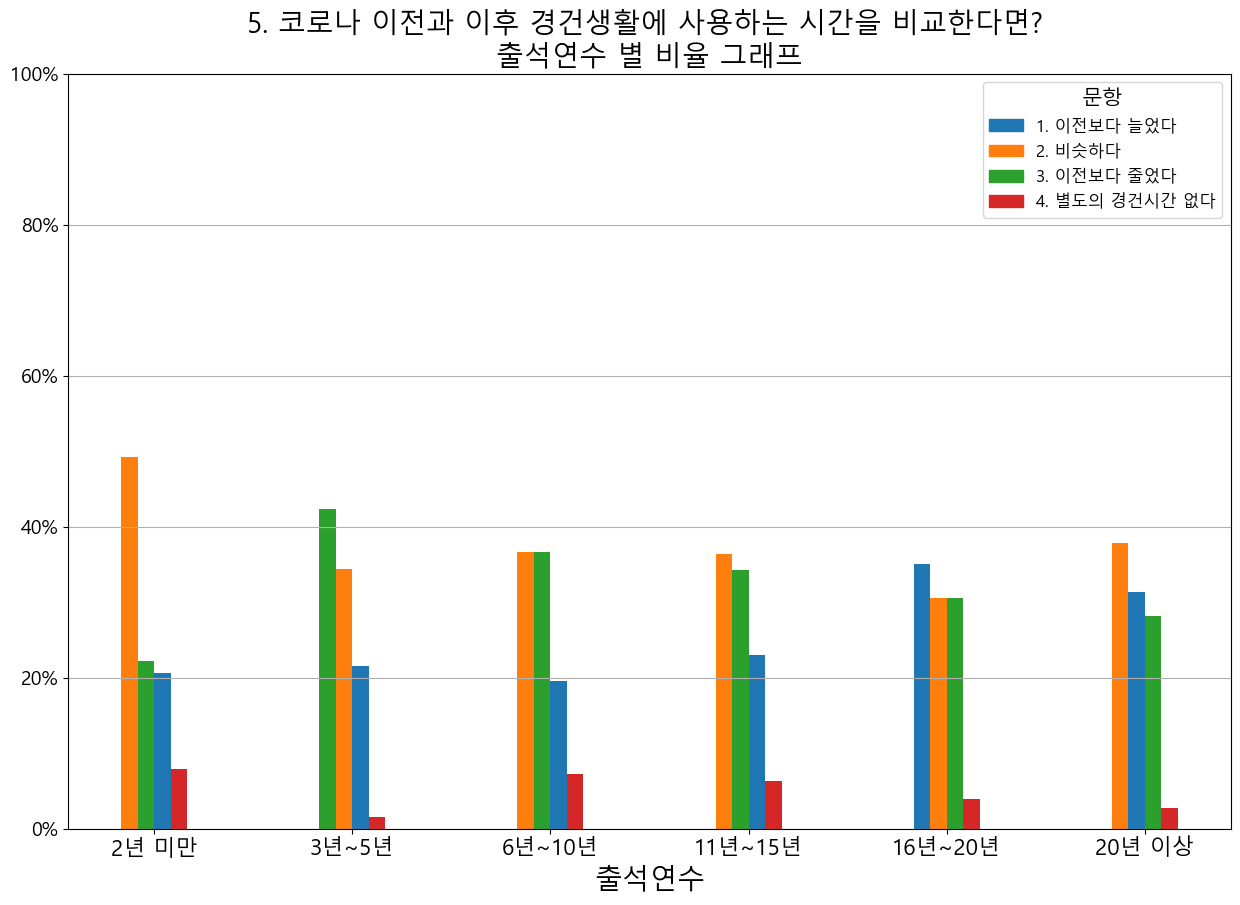

In [ ]:
all_color_list = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
color_list = all_color_list[:len(table.columns)]
gap = len(table.columns) / 2 - 0.5

# 그래프 제목 설정
for question in data.columns[:-1]:
    if Q == int(re.findall('\d+', question)[0]):
        title = question
    
# 범례(legend) 설정
ax_list = []
for idx in range(len(q_table.columns)):
    ax_list.append(mpatches.Patch(color = color_list[idx], label = f'{q_table.columns[idx]}'))
    
plot_1()
plot_2()
plot_3()
plot_4()
plot_5()

### Q6. 신앙유지를 위해서 가장 도움이 되는 것은? (3개까지 중복가능)

#### 데이터 셋 준비

In [ ]:
Q = 6
Q_list.append(Q)
복수응답 = "(복수응답)"

In [ ]:
table_Q6 = pd.DataFrame(index = ['전체',
                                 '14~19세', '20~29세', '30~39세', '40~49세', '50~59세', '60~69세', '70세 이상',
                                 '성도', '집사', '권사', '장로',
                                 '역할 없음', '역할 1개', '역할 2개 이상',
                                 '2년 미만', '3년~5년', '6년~10년', '11년~15년', '16년~20년', '20년 이상'],
                        columns = ['1. 예배',
                                   '2. 성경공부',
                                   '3. 성경읽기, 말씀묵상(QT)',
                                   '4. 기도',
                                   '5. 찬양',
                                   '6. 신앙서적',
                                   '7. 봉사 및 섬김',
                                   '8. 기독교 영상컨텐츠 시청',
                                   '9. 리더 및 목회자들의 관심과 기도',
                                   '10. 신앙 커뮤니티 활동'])

In [ ]:
df_Q6 = df.copy()
df_Q6['Q6_1'] = 0
df_Q6['Q6_2'] = 0
df_Q6['Q6_3'] = 0
df_Q6['Q6_4'] = 0
df_Q6['Q6_5'] = 0
df_Q6['Q6_6'] = 0
df_Q6['Q6_7'] = 0
df_Q6['Q6_8'] = 0
df_Q6['Q6_9'] = 0
df_Q6['Q6_10'] = 0

In [ ]:
nan_index = []

for idx, Q6 in enumerate(data['6. 신앙유지를 위해서 가장 도움이 되는 것은?']):
    if type(Q6) == float:
        nan_index.append(idx)
    elif type(Q6) == str:
        if '예배' in Q6:
            df_Q6['Q6_1'].iloc[idx] = 1
        if '성경공부' in Q6:
            df_Q6['Q6_2'].iloc[idx] = 1
        if '성경읽기, 말씀묵상' in Q6:
            df_Q6['Q6_3'].iloc[idx] = 1
        if '기도' in Q6:
            df_Q6['Q6_4'].iloc[idx] = 1
        if '찬양' in Q6:
            df_Q6['Q6_5'].iloc[idx] = 1
        if '신앙서적' in Q6:
            df_Q6['Q6_6'].iloc[idx] = 1
        if '봉사 및 섬김' in Q6:
            df_Q6['Q6_7'].iloc[idx] = 1
        if '영상컨텐츠' in Q6:
            df_Q6['Q6_8'].iloc[idx] = 1
        if '목회자' in Q6:
            df_Q6['Q6_9'].iloc[idx] = 1
        if '신앙 커뮤니티' in Q6:
            df_Q6['Q6_10'].iloc[idx] = 1
        if df_Q6.iloc[idx, col_num:].sum() == 0:
            nan_index.append(idx)
        
df_Q6.drop(df_Q6.index[nan_index], axis = 0, inplace = True)

#### 빈도수 & 비율 테이블

In [ ]:
table, q_table, f_table = make_table(Q)

#### 시각화

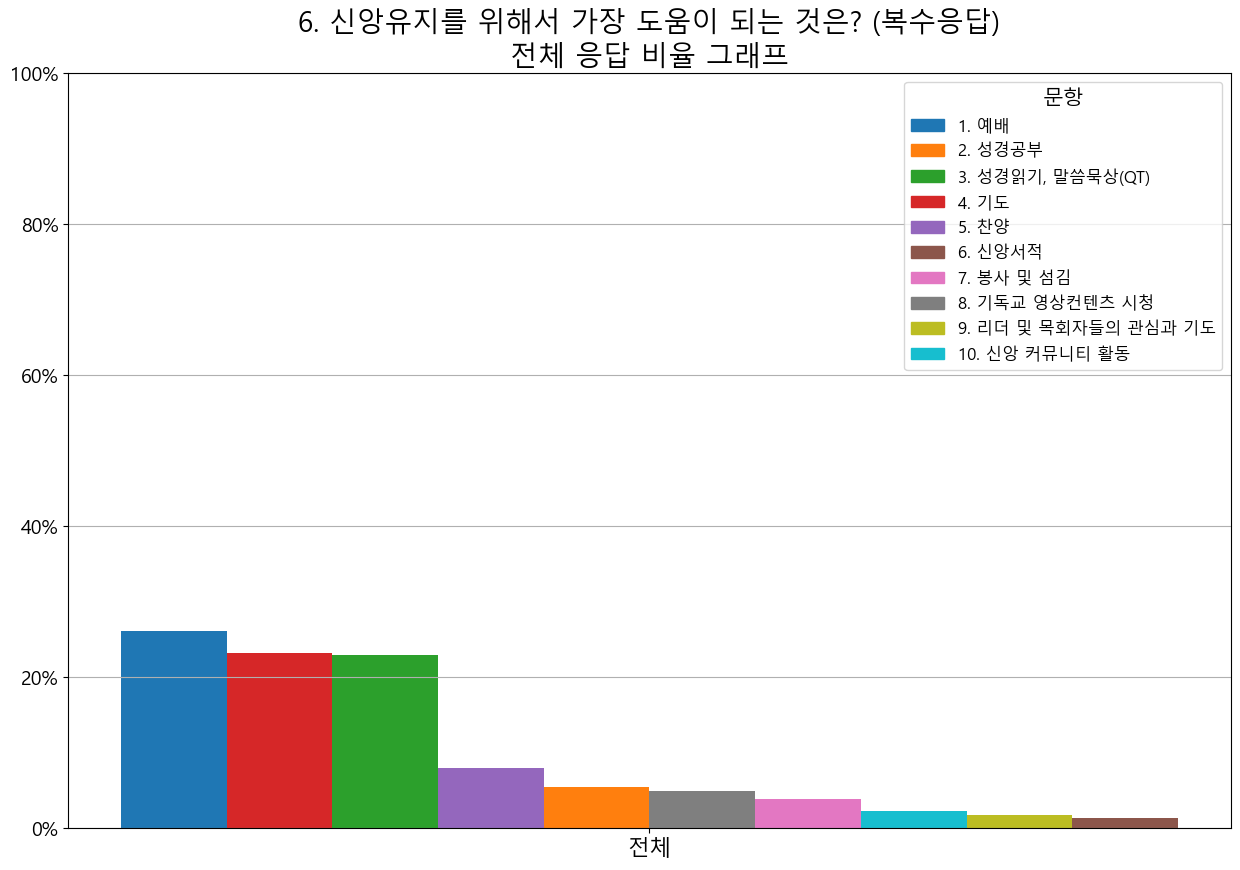

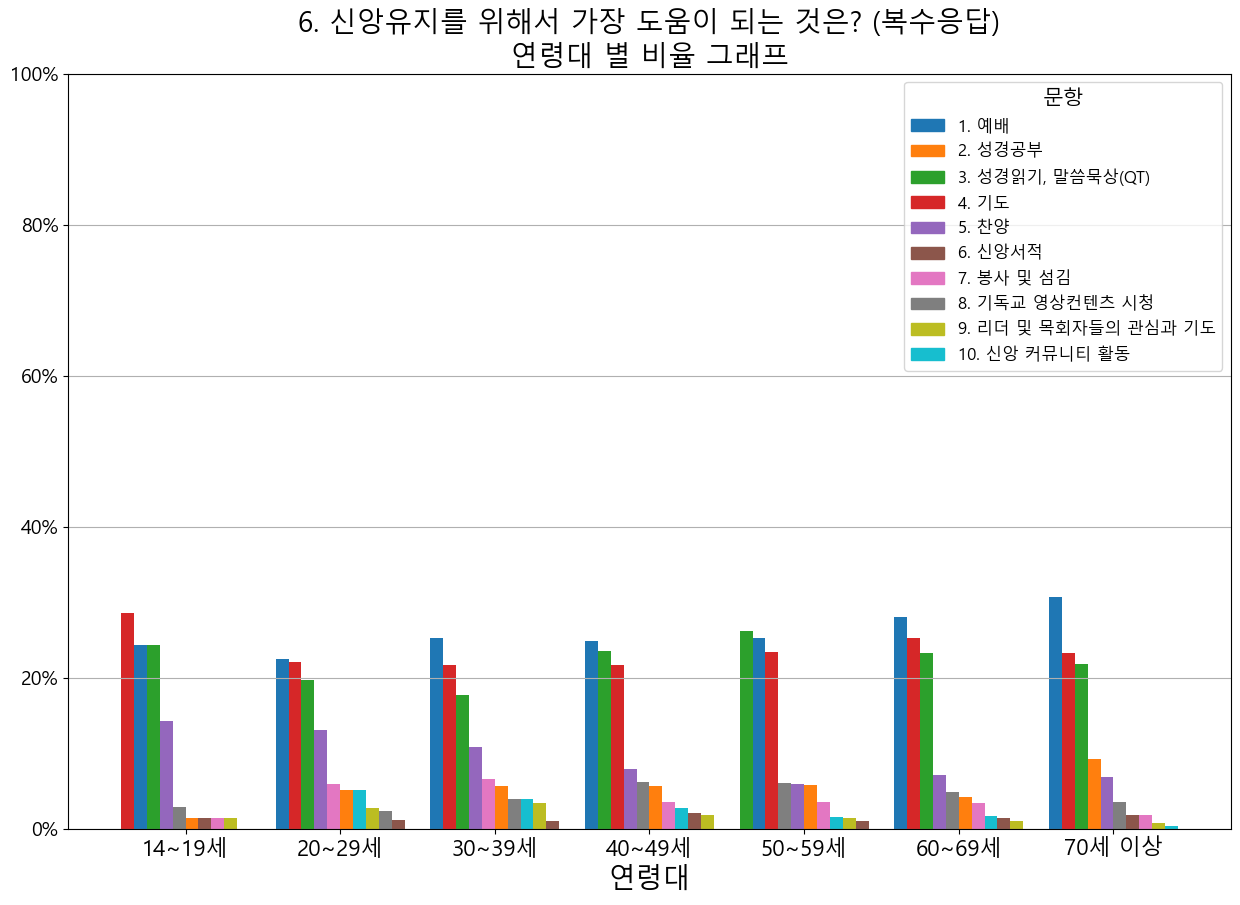

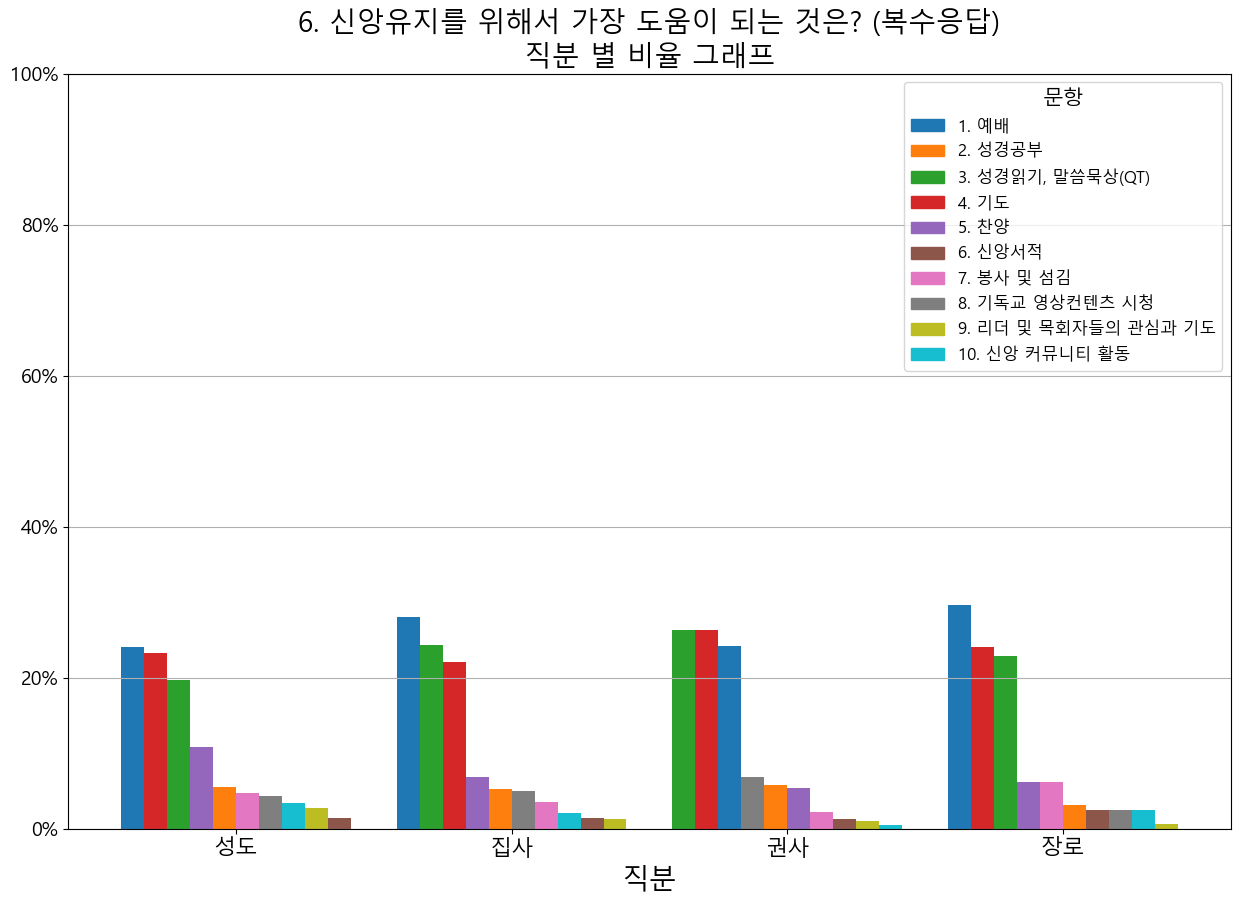

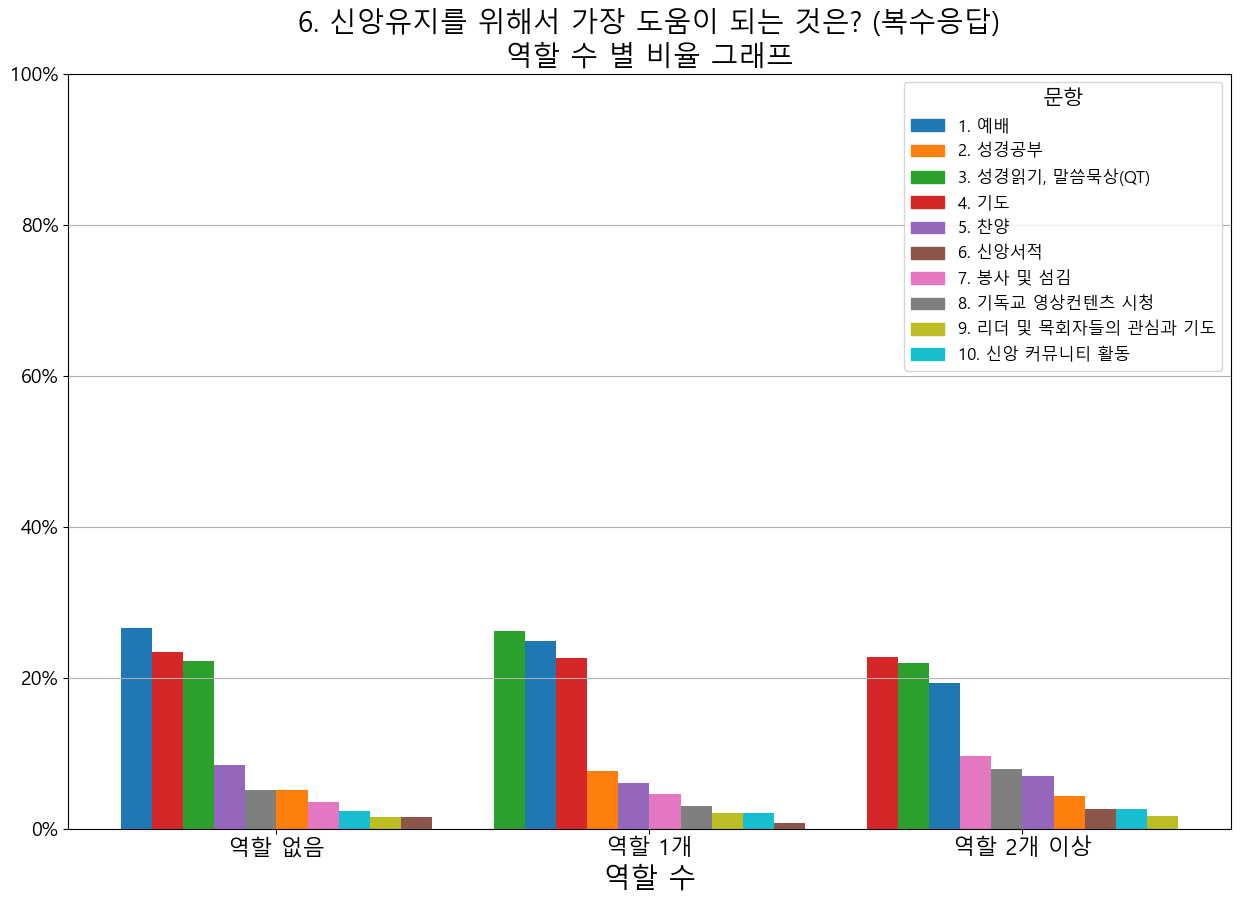

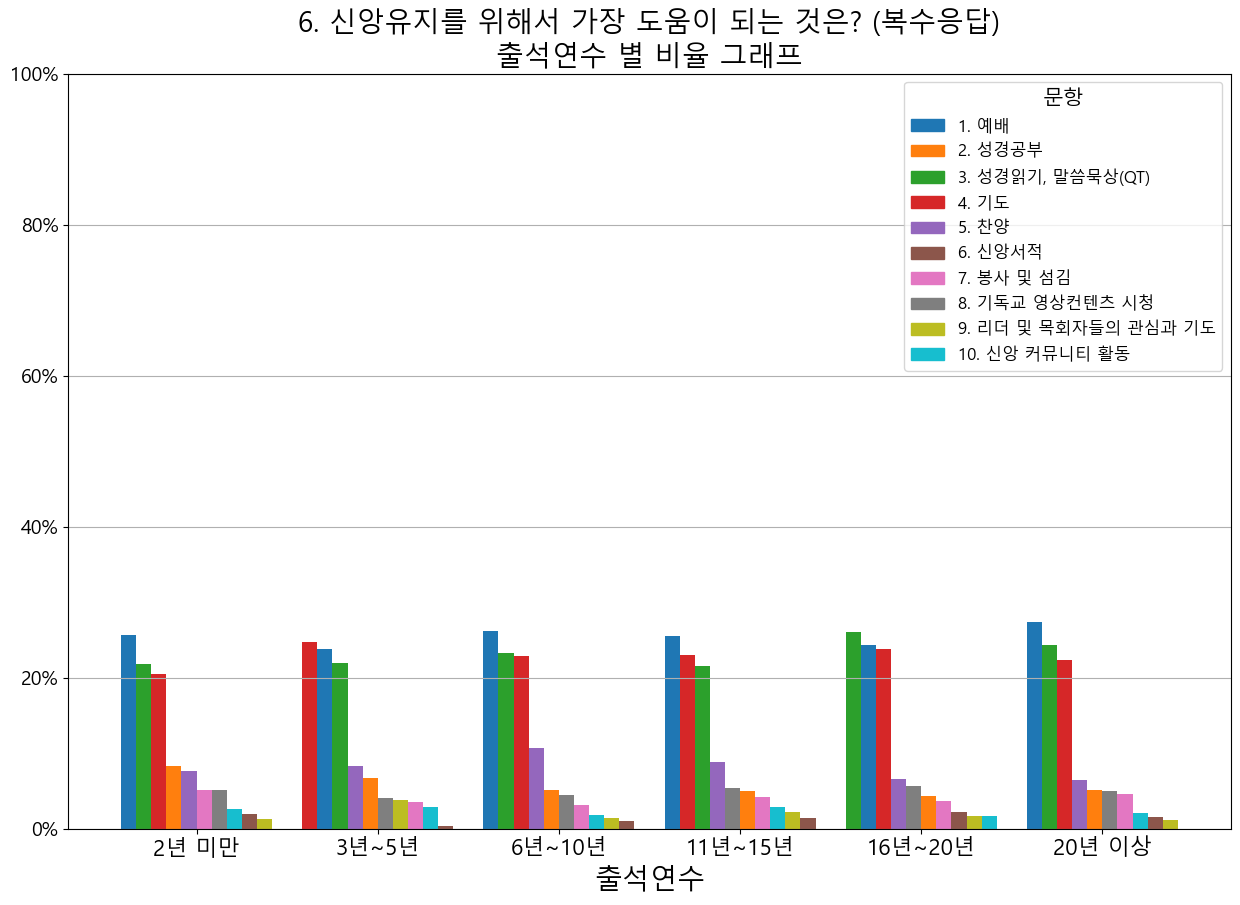

In [ ]:
all_color_list = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
color_list = all_color_list[:len(table.columns)]
gap = len(table.columns) / 2 - 0.5

# 그래프 제목 설정
for question in data.columns[:-1]:
    if Q == int(re.findall('\d+', question)[0]):
        title = question
    
# 범례(legend) 설정
ax_list = []
for idx in range(len(q_table.columns)):
    ax_list.append(mpatches.Patch(color = color_list[idx], label = f'{q_table.columns[idx]}'))
    
plot_1()
plot_2()
plot_3()
plot_4()
plot_5()

### Q7. 신앙성장을 위해 가장 관심 있는 온라인 컨텐츠 주제는?

#### 데이터 셋 준비

In [ ]:
Q = 7
Q_list.append(Q)
복수응답 = ""

In [ ]:
table_Q7 = pd.DataFrame(index = ['전체',
                                 '14~19세', '20~29세', '30~39세', '40~49세', '50~59세', '60~69세', '70세 이상',
                                 '성도', '집사', '권사', '장로',
                                 '역할 없음', '역할 1개', '역할 2개 이상',
                                 '2년 미만', '3년~5년', '6년~10년', '11년~15년', '16년~20년', '20년 이상'],
                        columns = ['1. 찬양',
                                   '2. 설교',
                                   '3. 신앙지식 및 교양',
                                   '4. 성경강의',
                                   '5. 신앙생활 Q&A',
                                   '6. 간증'])

In [ ]:
df_Q7 = df.copy()
df_Q7['Q7_1'] = 0
df_Q7['Q7_2'] = 0
df_Q7['Q7_3'] = 0
df_Q7['Q7_4'] = 0
df_Q7['Q7_5'] = 0
df_Q7['Q7_6'] = 0

In [ ]:
nan_index = []

for idx, Q7 in enumerate(data['7. 신앙성장을 위해 가장 관심있는 온라인 컨텐츠 주제는?']):
    if type(Q7) == float:
        nan_index.append(idx)
    elif type(Q7) == str:
        if '찬양' in Q7:
            df_Q7['Q7_1'].iloc[idx] = 1
        if '설교' in Q7:
            df_Q7['Q7_2'].iloc[idx] = 1
        if '신앙지식 및 교양' in Q7:
            df_Q7['Q7_3'].iloc[idx] = 1
        if '성경강의' in Q7:
            df_Q7['Q7_4'].iloc[idx] = 1
        if '신앙생활 Q&A' in Q7:
            df_Q7['Q7_5'].iloc[idx] = 1
        if '간증' in Q7:
            df_Q7['Q7_6'].iloc[idx] = 1
        if df_Q7.iloc[idx, col_num:].sum() == 0:
            nan_index.append(idx)
        
df_Q7.drop(df_Q7.index[nan_index], axis = 0, inplace = True)

#### 빈도수 & 비율 테이블

In [ ]:
table, q_table, f_table = make_table(Q)

#### 시각화

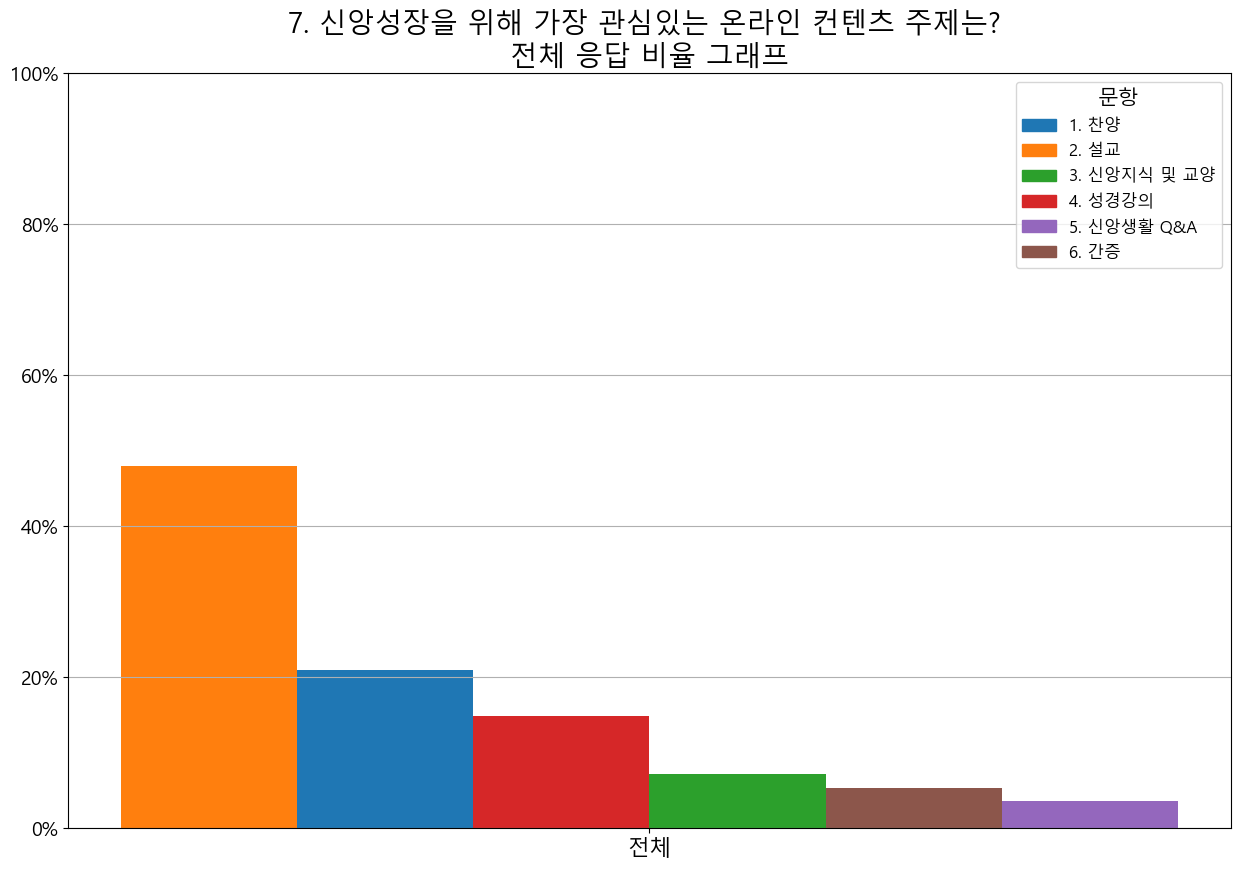

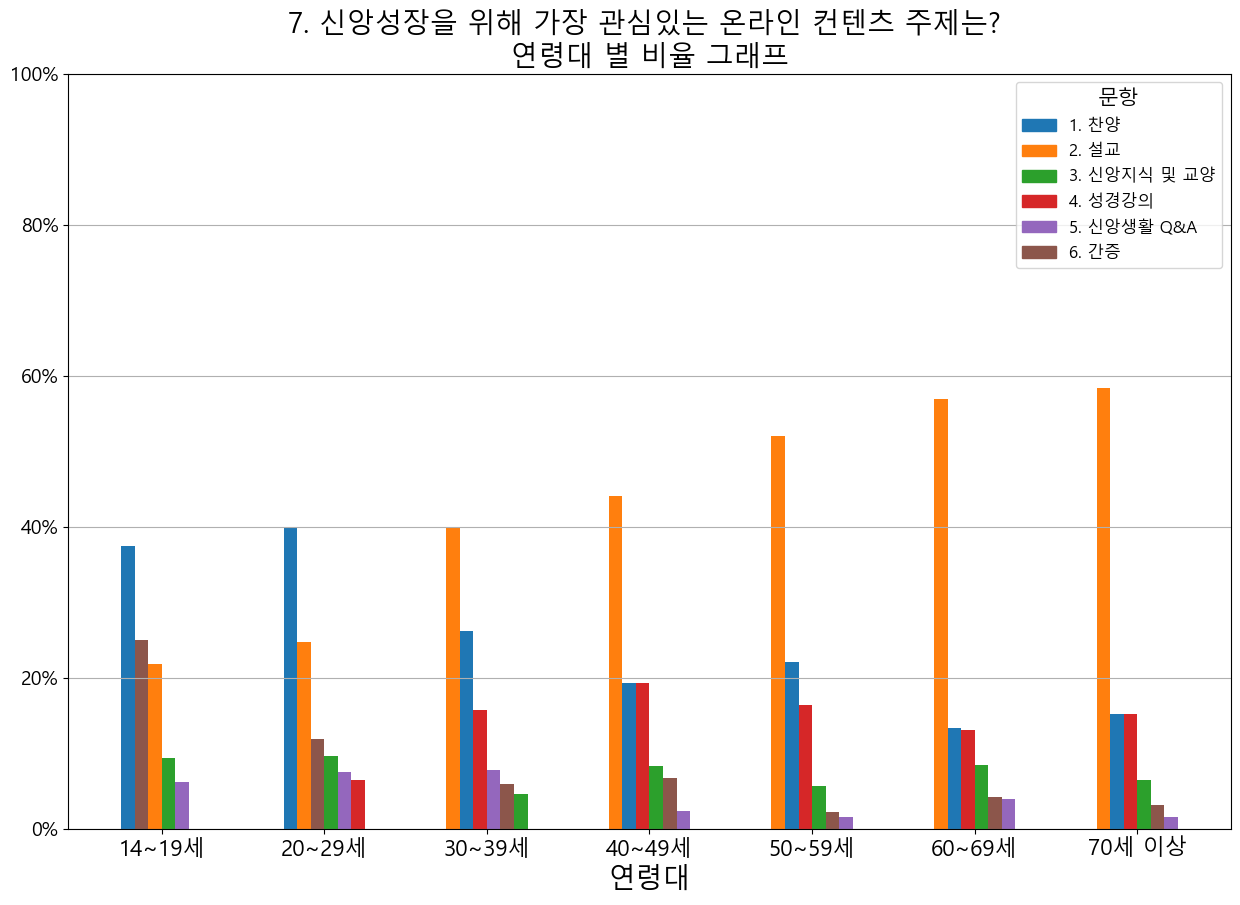

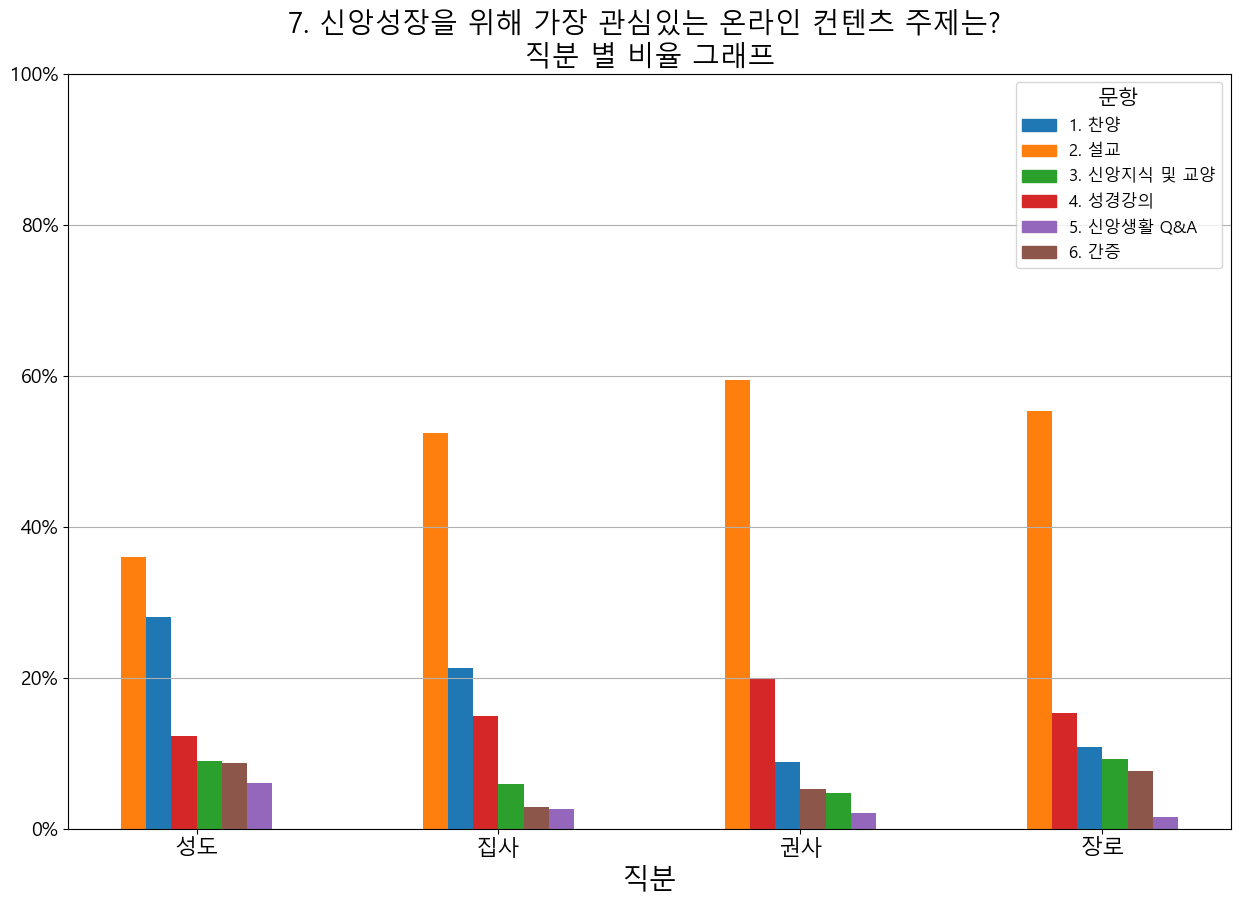

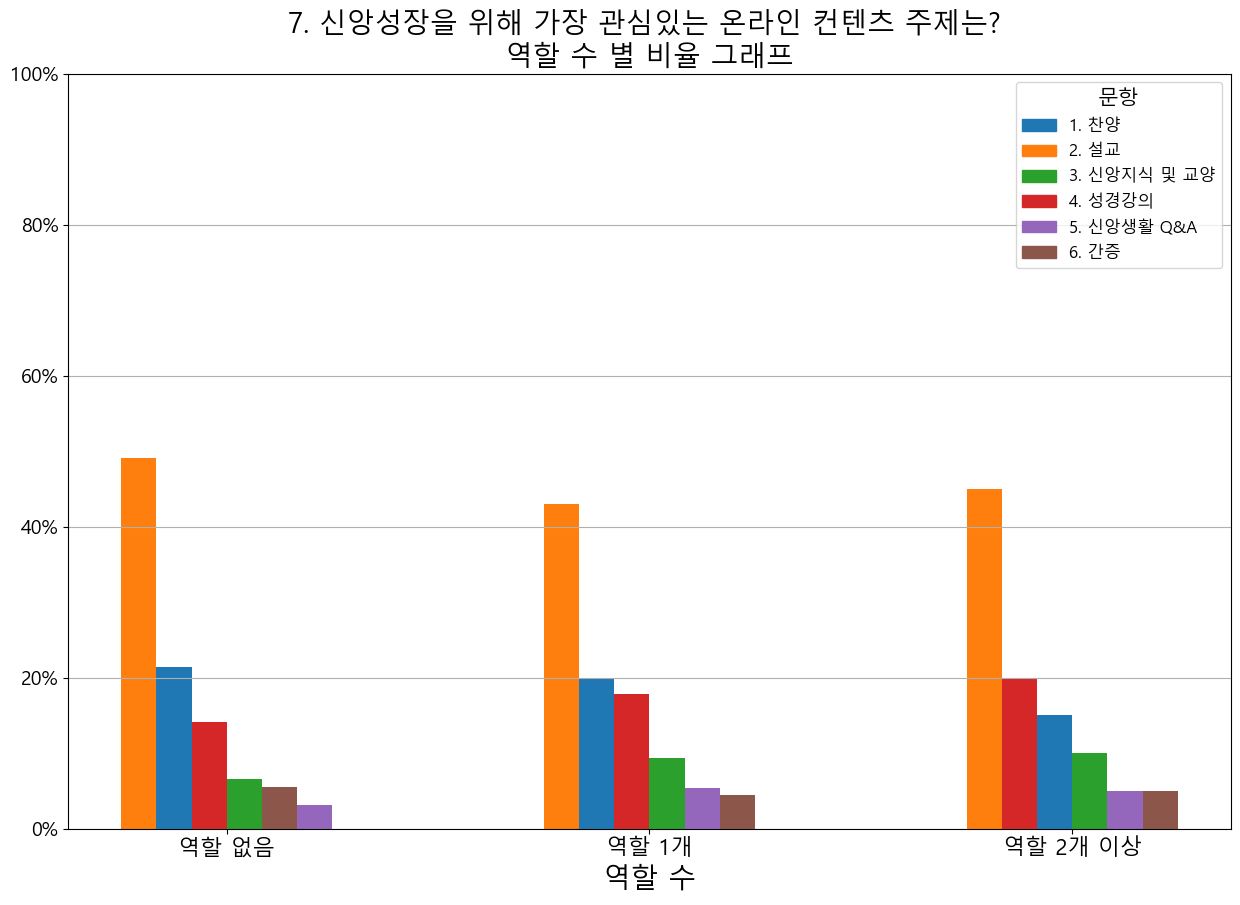

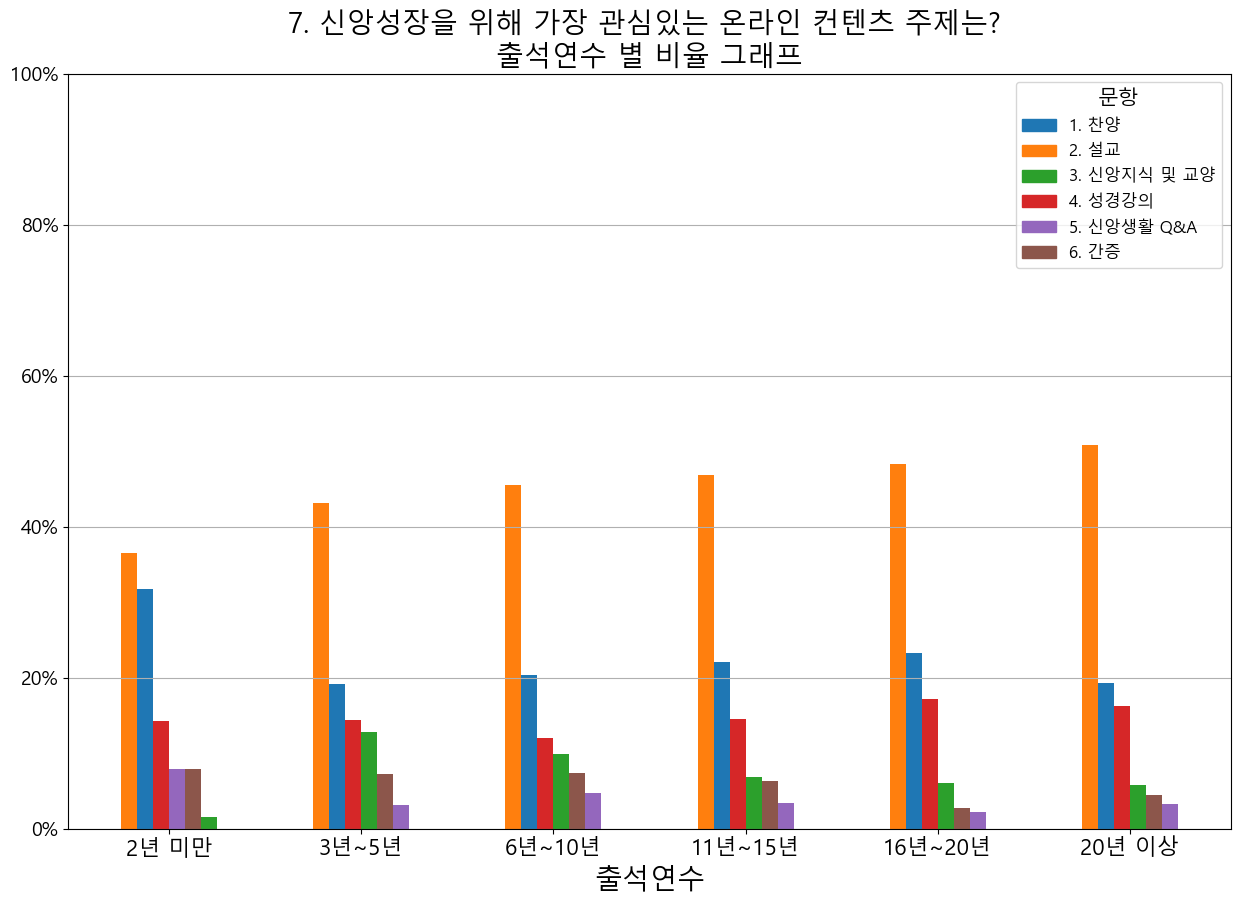

In [ ]:
all_color_list = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
color_list = all_color_list[:len(table.columns)]
gap = len(table.columns) / 2 - 0.5

# 그래프 제목 설정
for question in data.columns[:-1]:
    if Q == int(re.findall('\d+', question)[0]):
        title = question
    
# 범례(legend) 설정
ax_list = []
for idx in range(len(q_table.columns)):
    ax_list.append(mpatches.Patch(color = color_list[idx], label = f'{q_table.columns[idx]}'))
    
plot_1()
plot_2()
plot_3()
plot_4()
plot_5()

## Part 2

### Q8. 주일에 참여하는 예배는? (2개까지 중복가능)

#### 데이터 셋 준비

In [ ]:
Q = 8
Q_list.append(Q)
복수응답 = "(복수응답)"

In [ ]:
table_Q8 = pd.DataFrame(index = ['전체',
                                 '14~19세', '20~29세', '30~39세', '40~49세', '50~59세', '60~69세', '70세 이상',
                                 '성도', '집사', '권사', '장로',
                                 '역할 없음', '역할 1개', '역할 2개 이상',
                                 '2년 미만', '3년~5년', '6년~10년', '11년~15년', '16년~20년', '20년 이상'],
                        columns = ['1. 주일 1부',
                                   '2. 주일 2부',
                                   '3. 주일 3부',
                                   '4. 주일 4부',
                                   '5. 주일 5부',
                                   '6. 미참여'])

In [ ]:
df_Q8 = df.copy()
df_Q8['Q8_1'] = 0
df_Q8['Q8_2'] = 0
df_Q8['Q8_3'] = 0
df_Q8['Q8_4'] = 0
df_Q8['Q8_5'] = 0
df_Q8['Q8_6'] = 0

In [ ]:
nan_index = []

for idx, Q8 in enumerate(data['8. 주일에 참여하는 예배는?']):
    if type(Q8) == float:
        nan_index.append(idx)
    elif type(Q8) == str:
        if '1부' in Q8:
            df_Q8['Q8_1'].iloc[idx] = 1
        if '2부' in Q8:
            df_Q8['Q8_2'].iloc[idx] = 1
        if '3부' in Q8:
            df_Q8['Q8_3'].iloc[idx] = 1
        if '4부' in Q8:
            df_Q8['Q8_4'].iloc[idx] = 1
        if '5부' in Q8:
            df_Q8['Q8_5'].iloc[idx] = 1
        if '미참여' == Q8:
            df_Q8['Q8_6'].iloc[idx] = 1
        if df_Q8.iloc[idx, col_num:].sum() == 0:
            nan_index.append(idx)
        
df_Q8.drop(df_Q8.index[nan_index], axis = 0, inplace = True)

#### 빈도수 & 비율 테이블

In [ ]:
table, q_table, f_table = make_table(Q)

#### 시각화

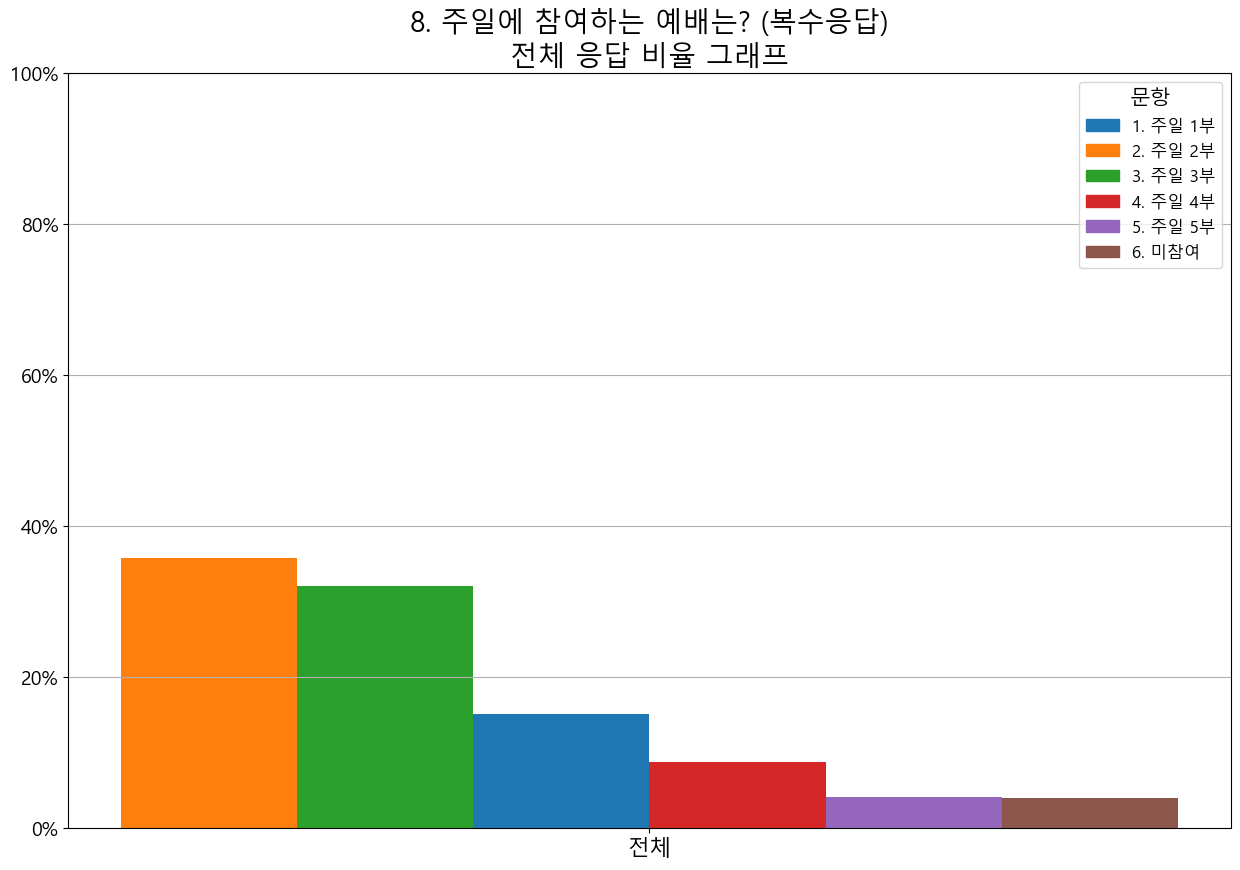

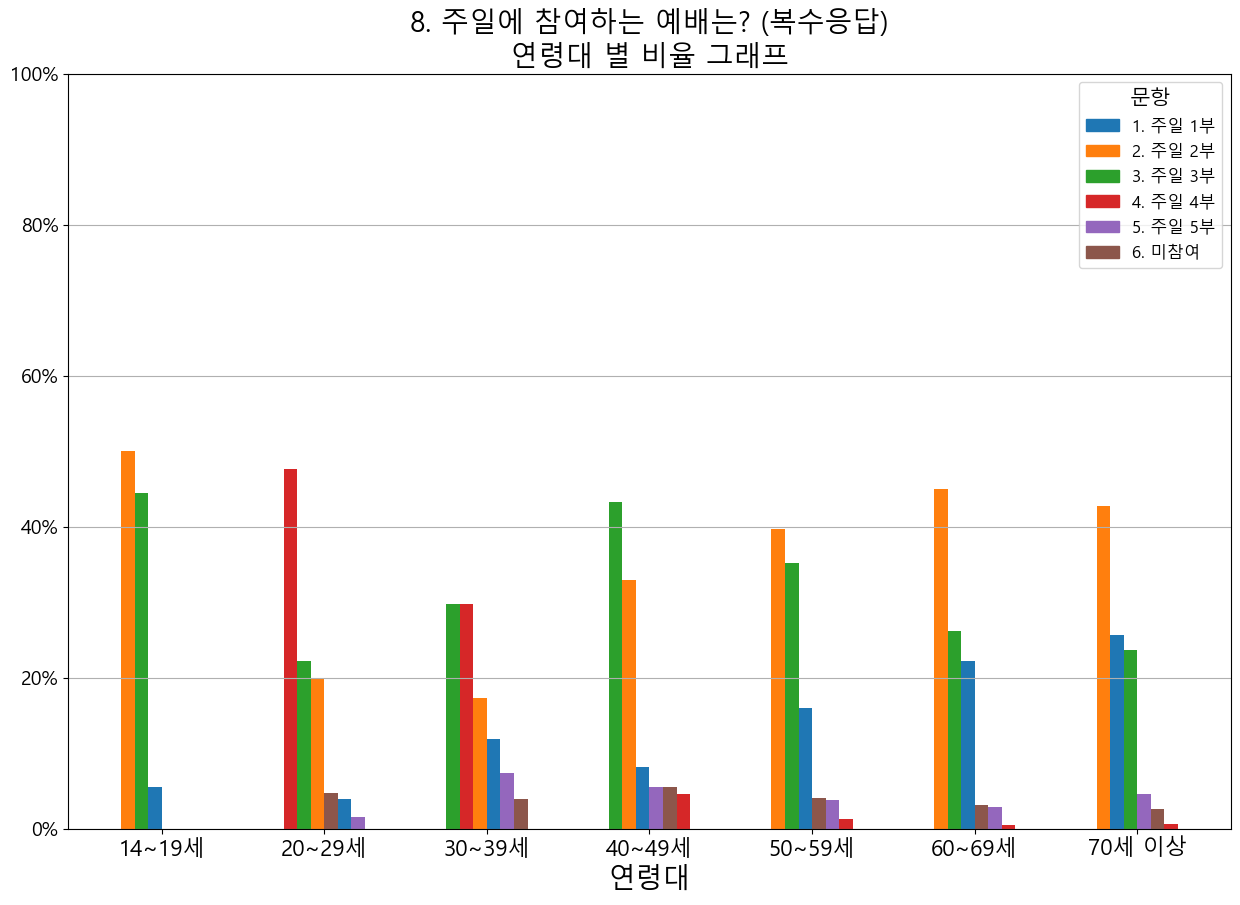

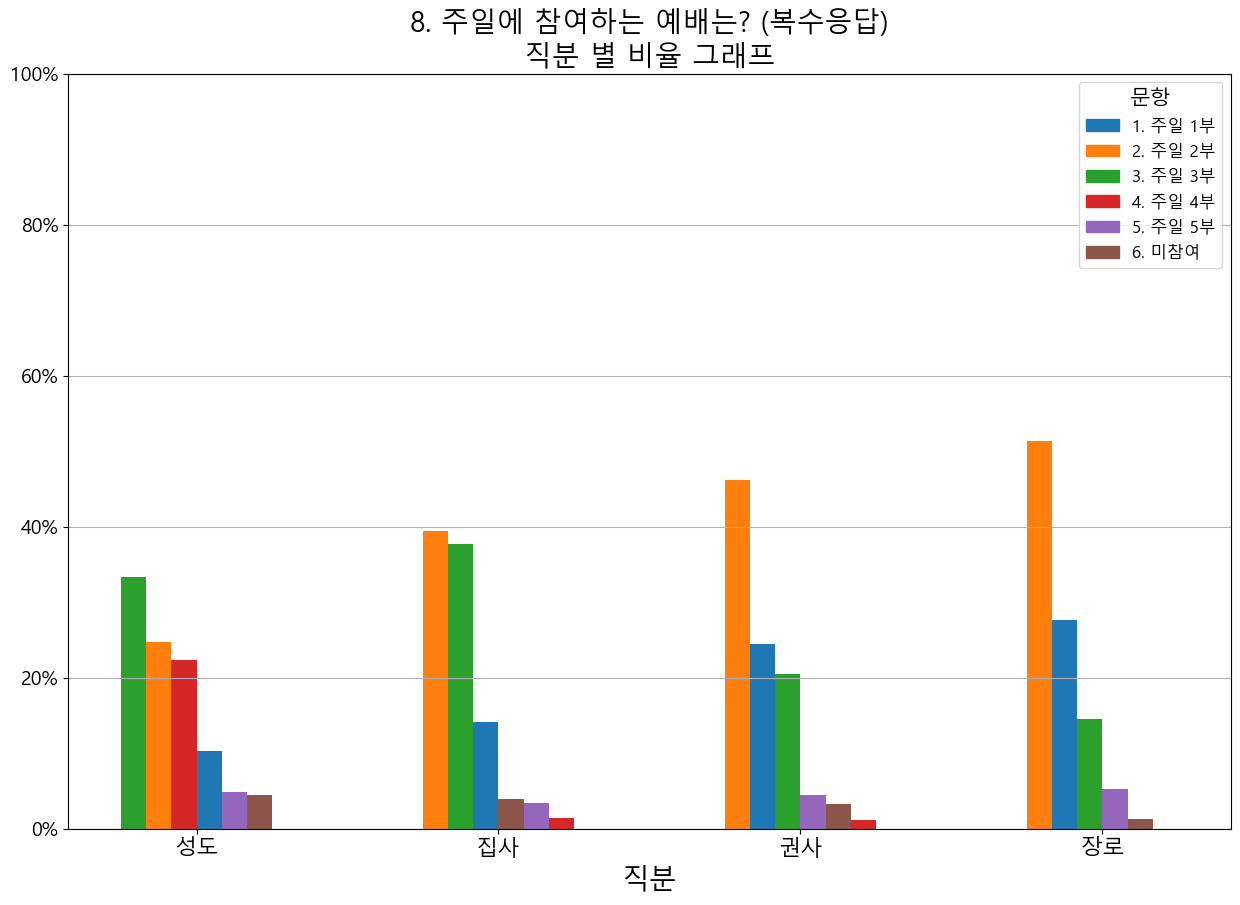

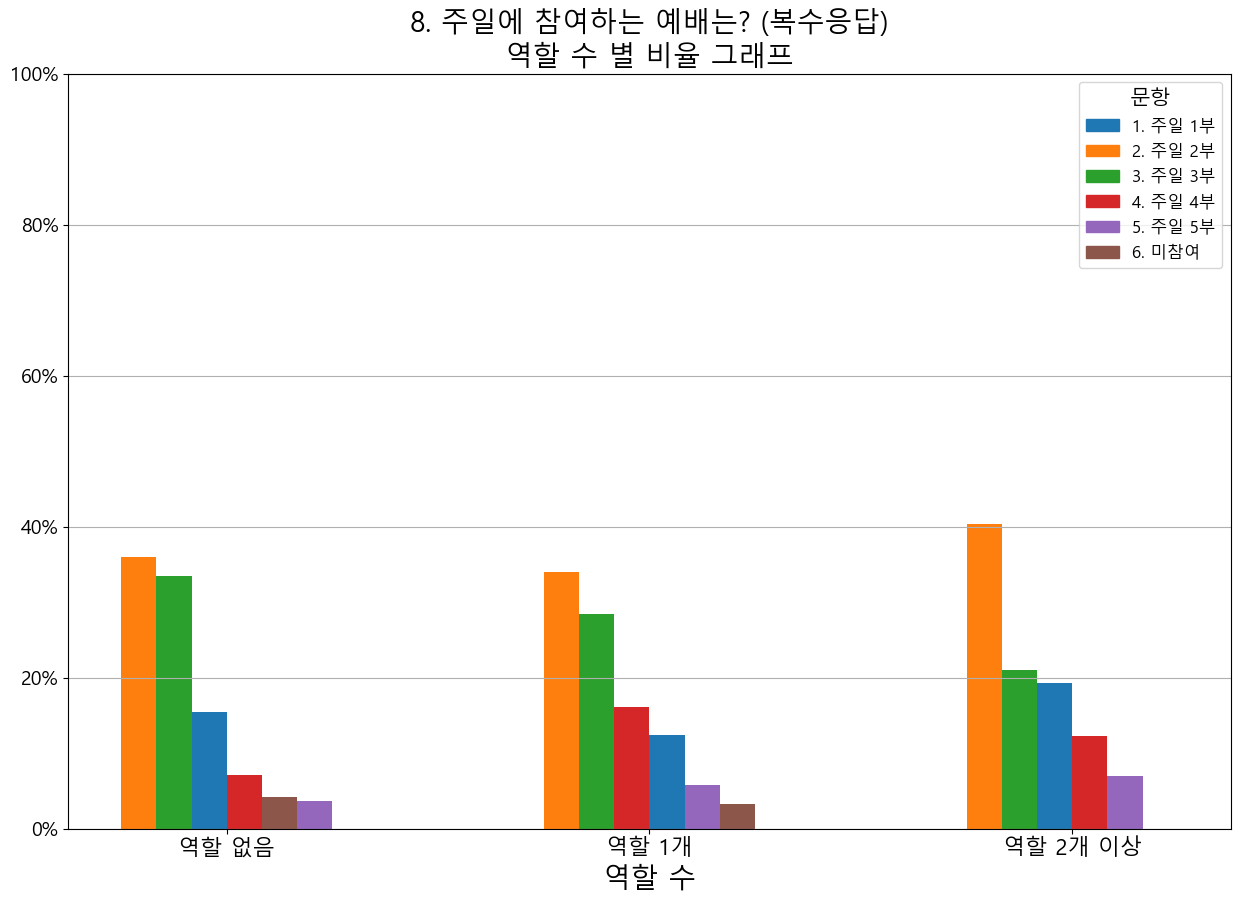

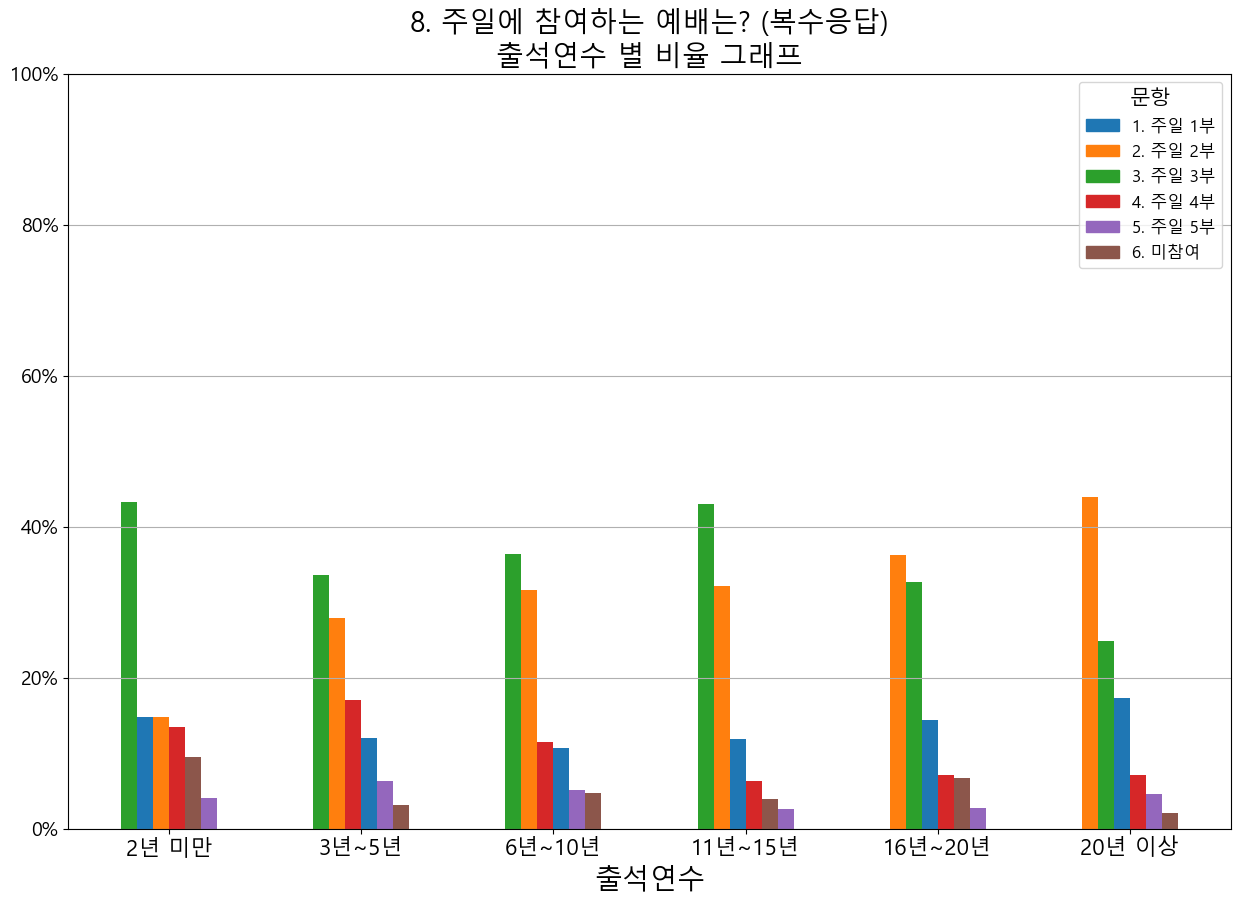

In [ ]:
all_color_list = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
color_list = all_color_list[:len(table.columns)]
gap = len(table.columns) / 2 - 0.5

# 그래프 제목 설정
for question in data.columns[:-1]:
    if Q == int(re.findall('\d+', question)[0]):
        title = question
    
# 범례(legend) 설정
ax_list = []
for idx in range(len(q_table.columns)):
    ax_list.append(mpatches.Patch(color = color_list[idx], label = f'{q_table.columns[idx]}'))
    
plot_1()
plot_2()
plot_3()
plot_4()
plot_5()

### Q9. 주일예배는 한 달에 얼마나 참여하나요?

#### 데이터 셋 준비

In [ ]:
Q = 9
Q_list.append(Q)
복수응답 = ""

In [ ]:
table_Q9 = pd.DataFrame(index = ['전체',
                                 '14~19세', '20~29세', '30~39세', '40~49세', '50~59세', '60~69세', '70세 이상',
                                 '성도', '집사', '권사', '장로',
                                 '역할 없음', '역할 1개', '역할 2개 이상',
                                 '2년 미만', '3년~5년', '6년~10년', '11년~15년', '16년~20년', '20년 이상'],
                        columns = ['1. 매주',
                                   '2. 월 1회',
                                   '3. 월 2회',
                                   '4. 월 3회 이상',
                                   '5. 미참여'])

In [ ]:
df_Q9 = df.copy()
df_Q9['Q9_1'] = 0
df_Q9['Q9_2'] = 0
df_Q9['Q9_3'] = 0
df_Q9['Q9_4'] = 0
df_Q9['Q9_5'] = 0

In [ ]:
nan_index = []

for idx, Q9 in enumerate(data['9. 주일예배는 한 달에 얼마나 참여하나요?']):
    if type(Q9) == float:
        nan_index.append(idx)
    elif type(Q9) == str:
        if '매주' in Q9:
            df_Q9['Q9_1'].iloc[idx] = 1
        if '월 1회' in Q9:
            df_Q9['Q9_2'].iloc[idx] = 1
        if '월 2회' in Q9:
            df_Q9['Q9_3'].iloc[idx] = 1
        if '월 3회' in Q9:
            df_Q9['Q9_4'].iloc[idx] = 1
        if '미참여' in Q9:
            df_Q9['Q9_5'].iloc[idx] = 1
        if df_Q9.iloc[idx, col_num:].sum() == 0:
            nan_index.append(idx)
        
df_Q9.drop(df_Q9.index[nan_index], axis = 0, inplace = True)

#### 빈도수 & 비율 테이블

In [ ]:
table, q_table, f_table = make_table(Q)

#### 시각화

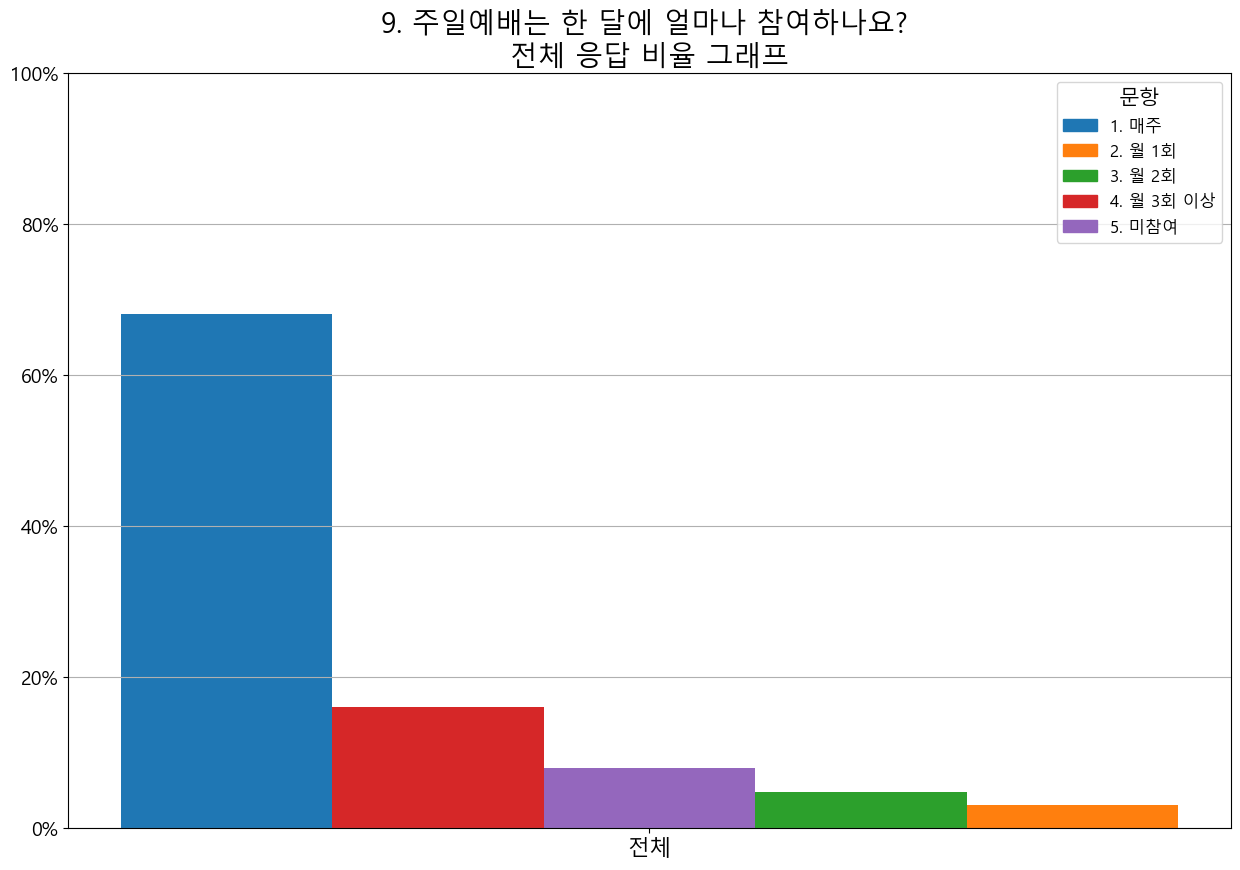

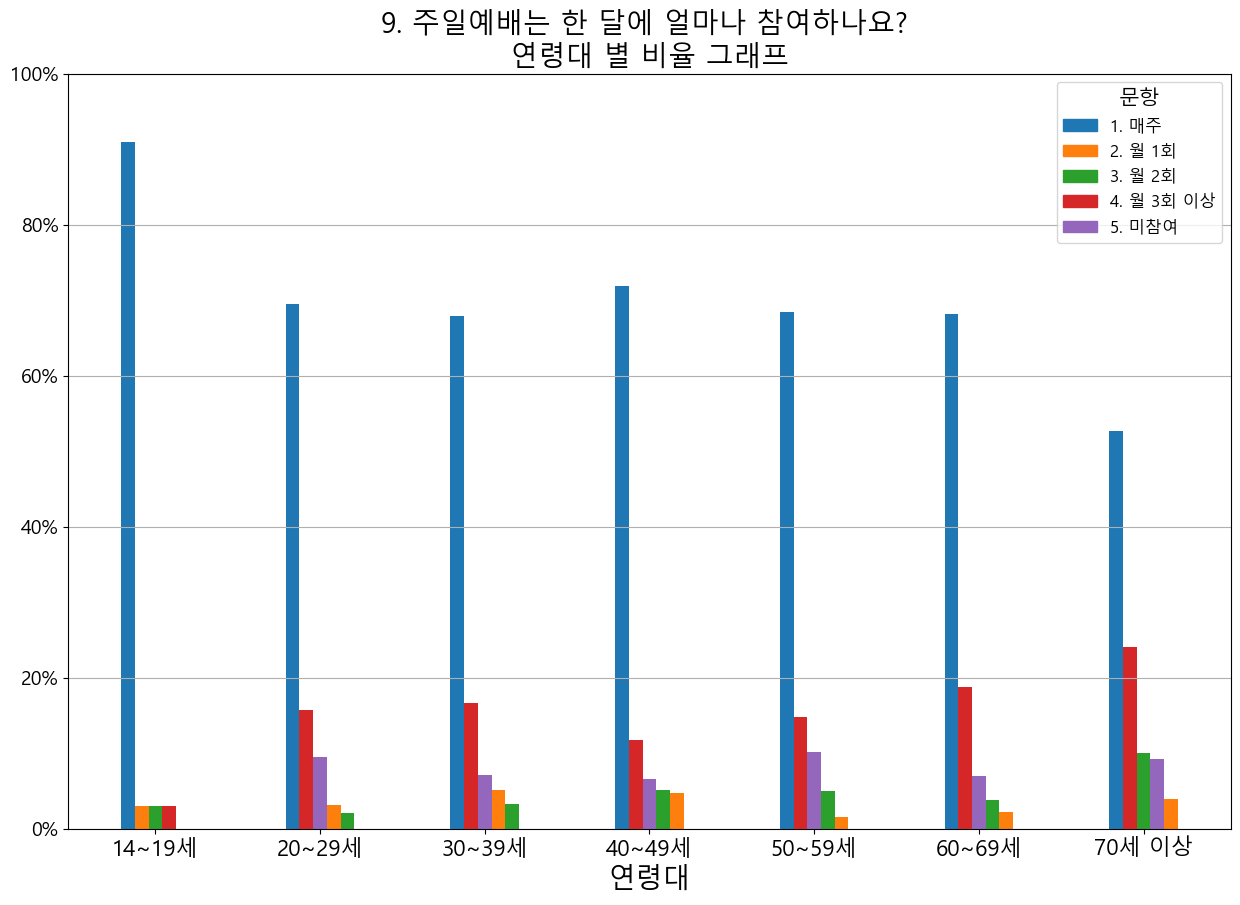

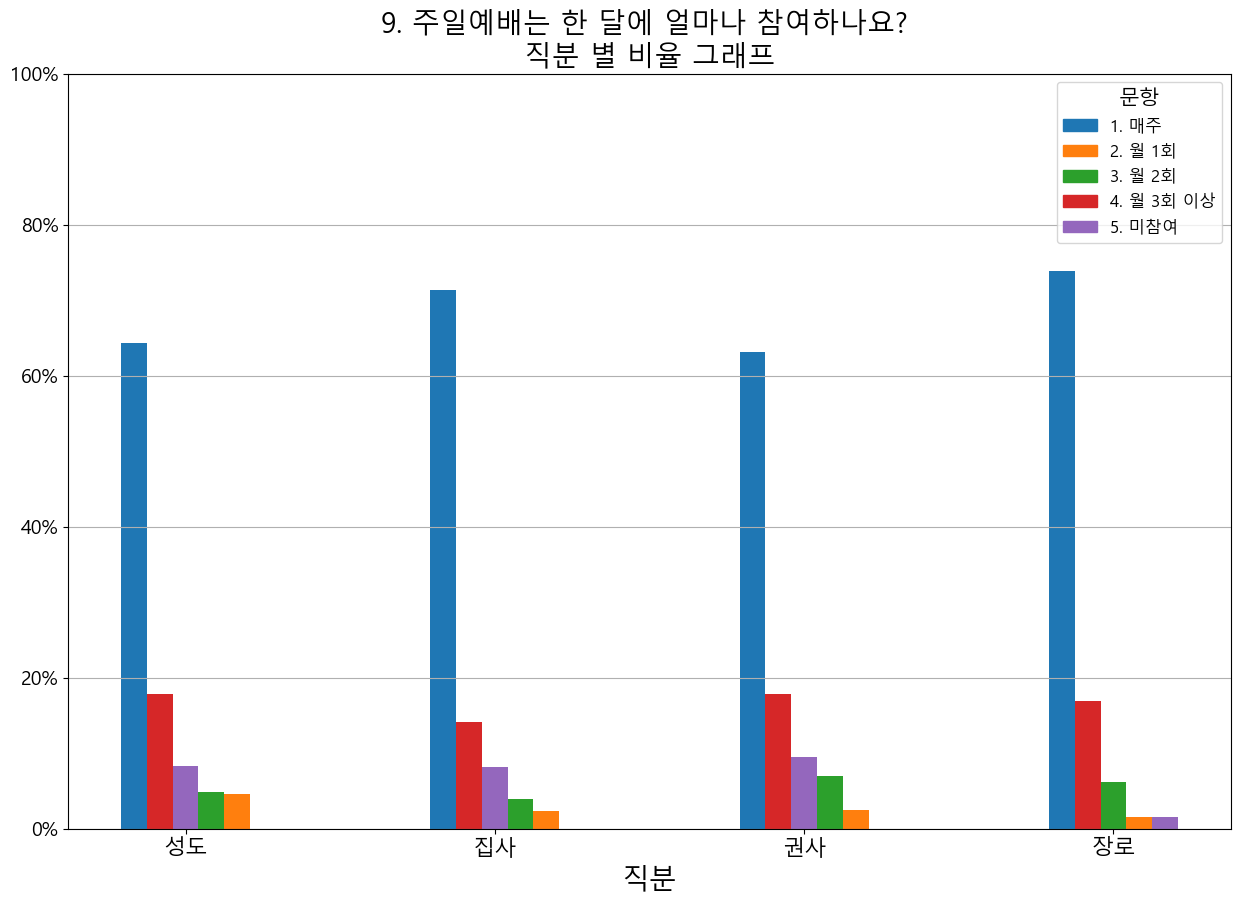

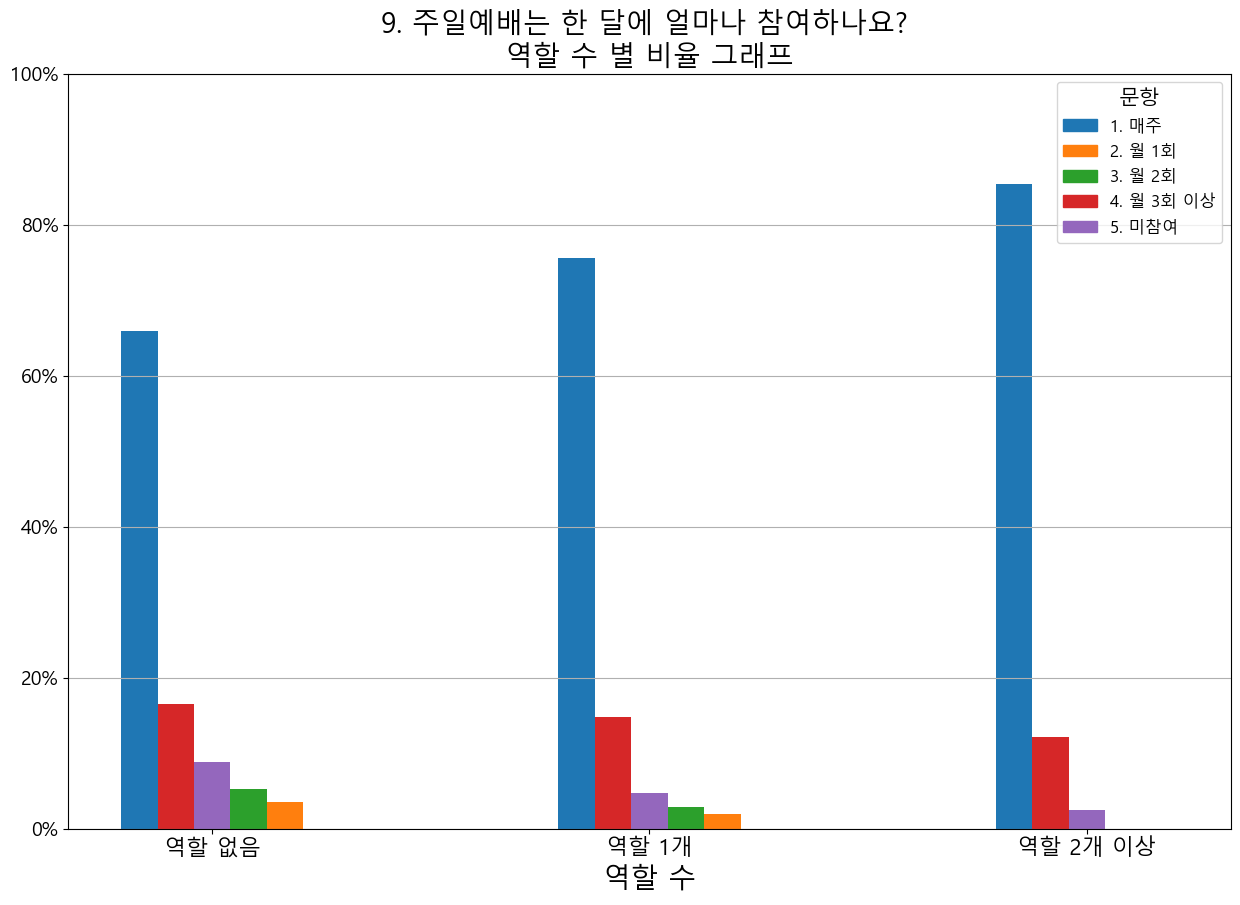

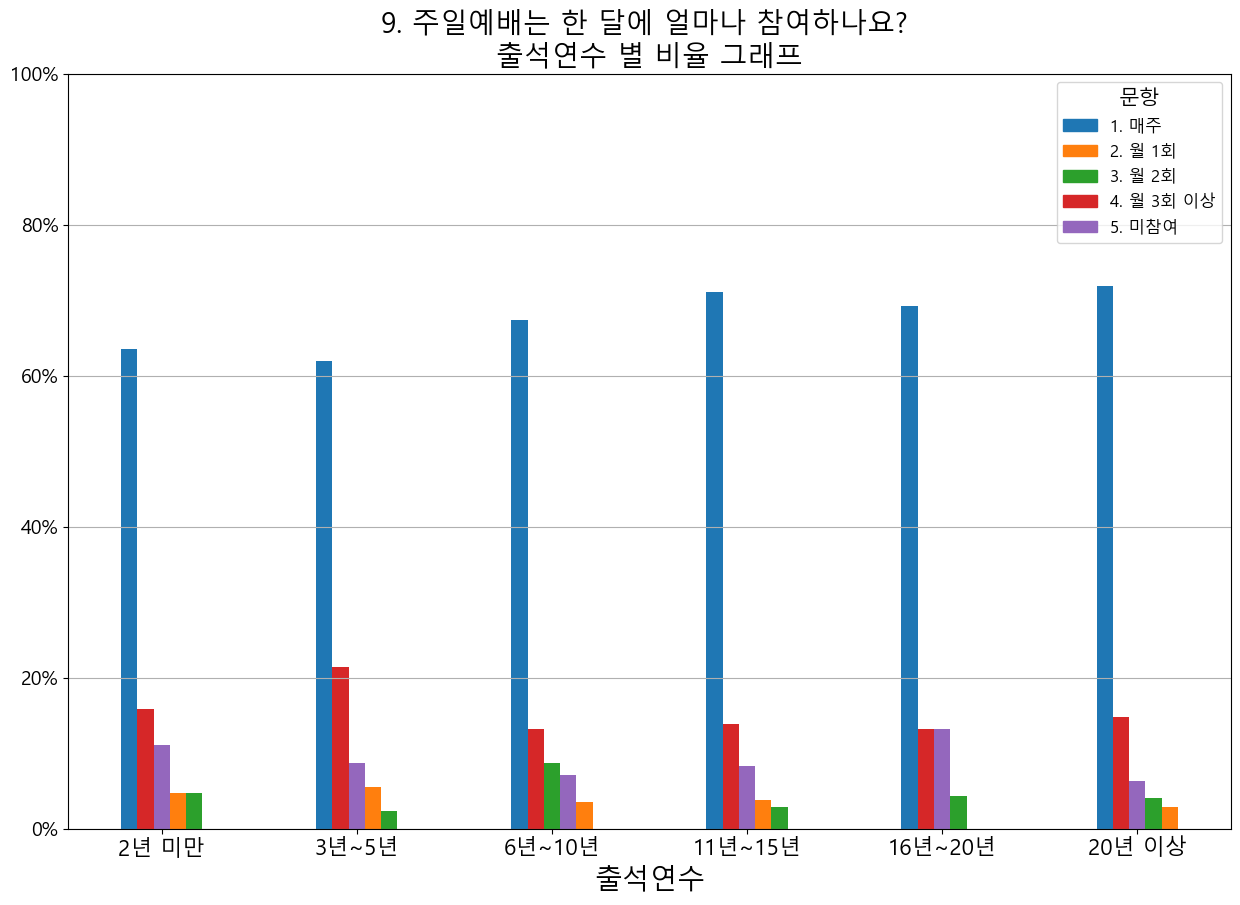

In [ ]:
all_color_list = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
color_list = all_color_list[:len(table.columns)]
gap = len(table.columns) / 2 - 0.5

# 그래프 제목 설정
for question in data.columns[:-1]:
    if Q == int(re.findall('\d+', question)[0]):
        title = question
    
# 범례(legend) 설정
ax_list = []
for idx in range(len(q_table.columns)):
    ax_list.append(mpatches.Patch(color = color_list[idx], label = f'{q_table.columns[idx]}'))
    
plot_1()
plot_2()
plot_3()
plot_4()
plot_5()

### Q10. 주중에 참여하는 예배는? (모두 체크)

#### 데이터 셋 준비

In [ ]:
Q = 10
Q_list.append(Q)
복수응답 = "(복수응답)"

In [ ]:
table_Q10 = pd.DataFrame(index = ['전체',
                                 '14~19세', '20~29세', '30~39세', '40~49세', '50~59세', '60~69세', '70세 이상',
                                 '성도', '집사', '권사', '장로',
                                 '역할 없음', '역할 1개', '역할 2개 이상',
                                 '2년 미만', '3년~5년', '6년~10년', '11년~15년', '16년~20년', '20년 이상'],
                        columns = ['1. 새벽기도회',
                                   '2. 수요오전예배',
                                   '3. 수요저녁예배',
                                   '4. 금요성령집회',
                                   '5. 미참여'])

In [ ]:
df_Q10 = df.copy()
df_Q10['Q10_1'] = 0
df_Q10['Q10_2'] = 0
df_Q10['Q10_3'] = 0
df_Q10['Q10_4'] = 0
df_Q10['Q10_5'] = 0

In [ ]:
nan_index = []

for idx, Q10 in enumerate(data['10. 주중에 참여하는 예배는?']):
    if type(Q10) == float:
        nan_index.append(idx)
    elif type(Q10) == str:
        if '새벽기도회' in Q10:
            df_Q10['Q10_1'].iloc[idx] = 1
        if '수요오전예배' in Q10:
            df_Q10['Q10_2'].iloc[idx] = 1
        if '수요저녁예배' in Q10:
            df_Q10['Q10_3'].iloc[idx] = 1
        if '금요성령집회' in Q10:
            df_Q10['Q10_4'].iloc[idx] = 1
        if '미참여' == Q10:
            df_Q10['Q10_5'].iloc[idx] = 1
        if df_Q10.iloc[idx, col_num:].sum() == 0:
            nan_index.append(idx)
        
df_Q10.drop(df_Q10.index[nan_index], axis = 0, inplace = True)

#### 빈도수 & 비율 테이블

In [ ]:
table, q_table, f_table = make_table(Q)

#### 시각화

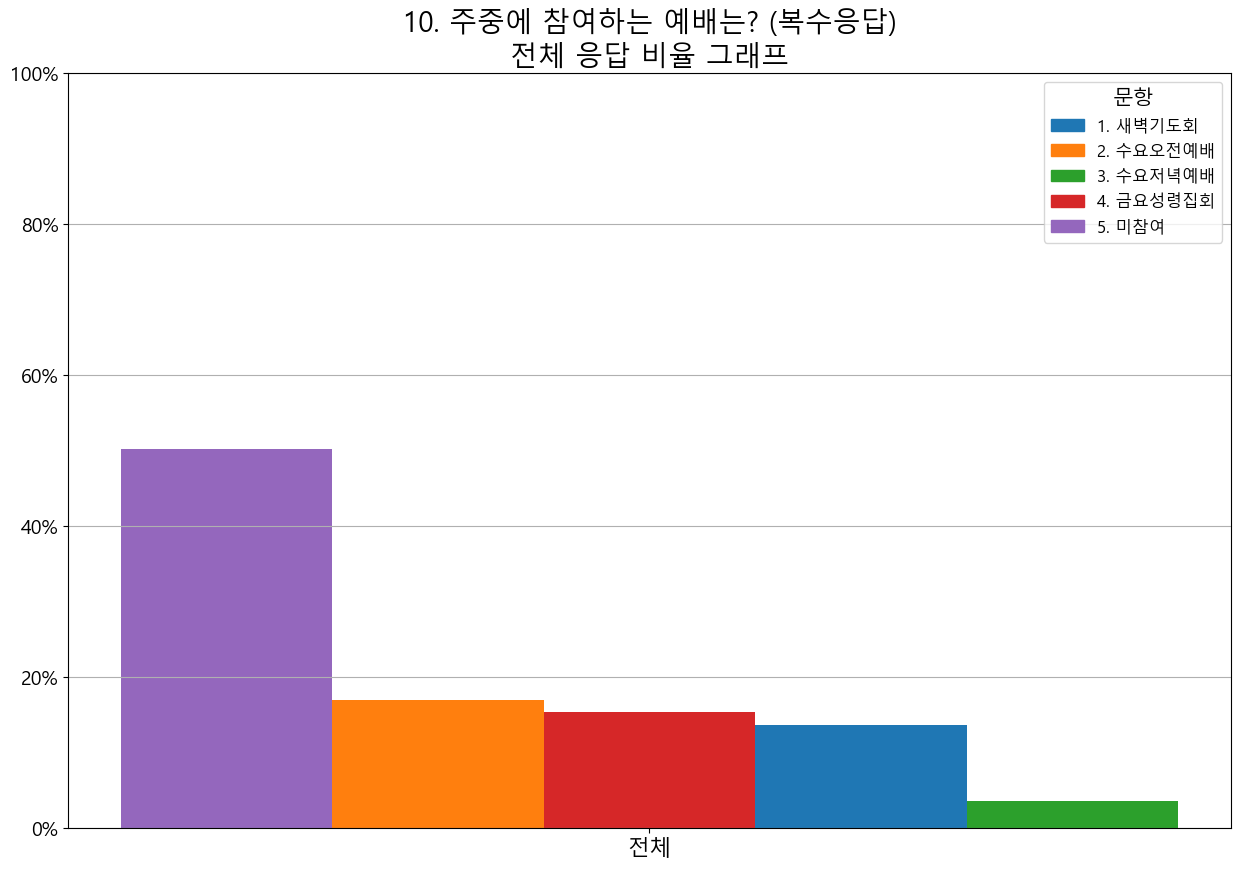

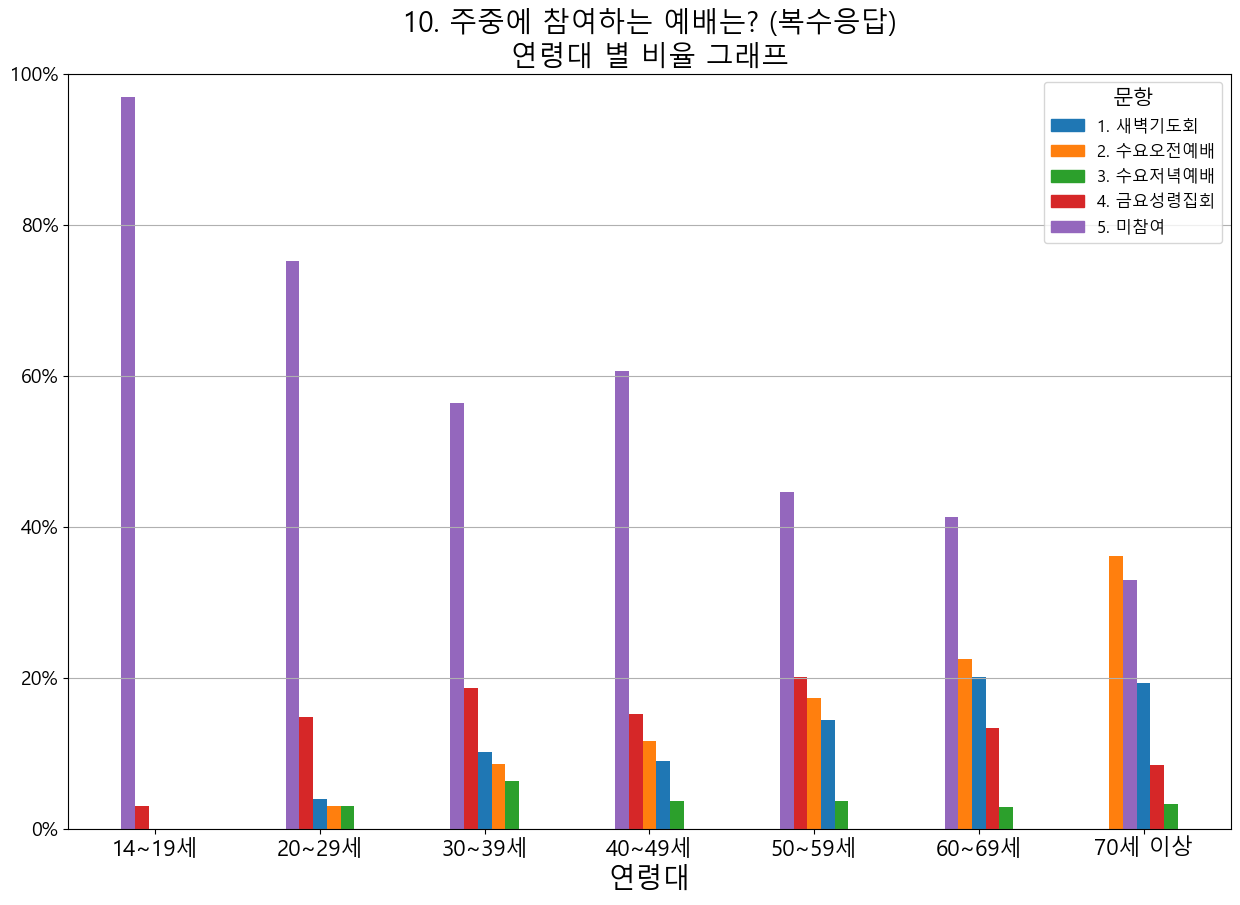

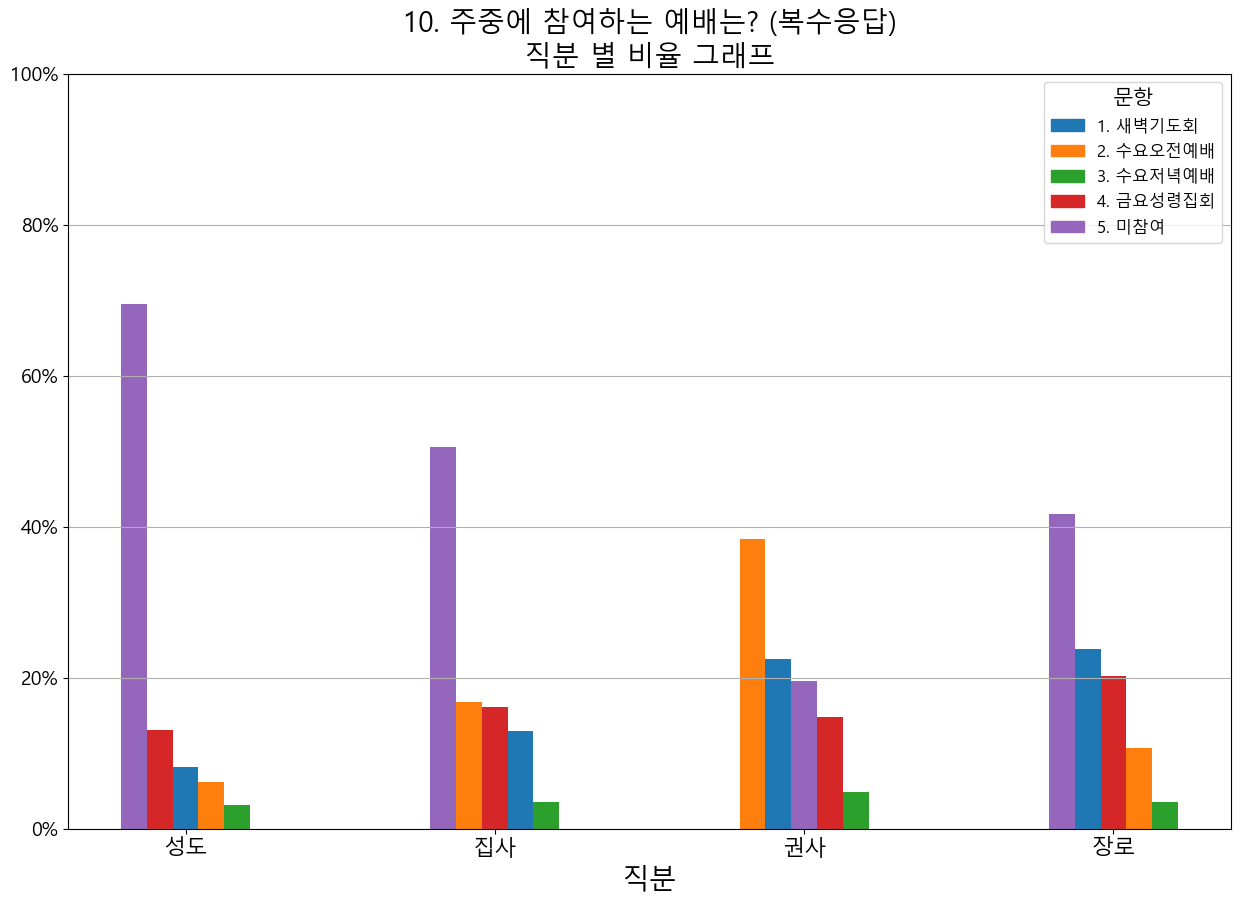

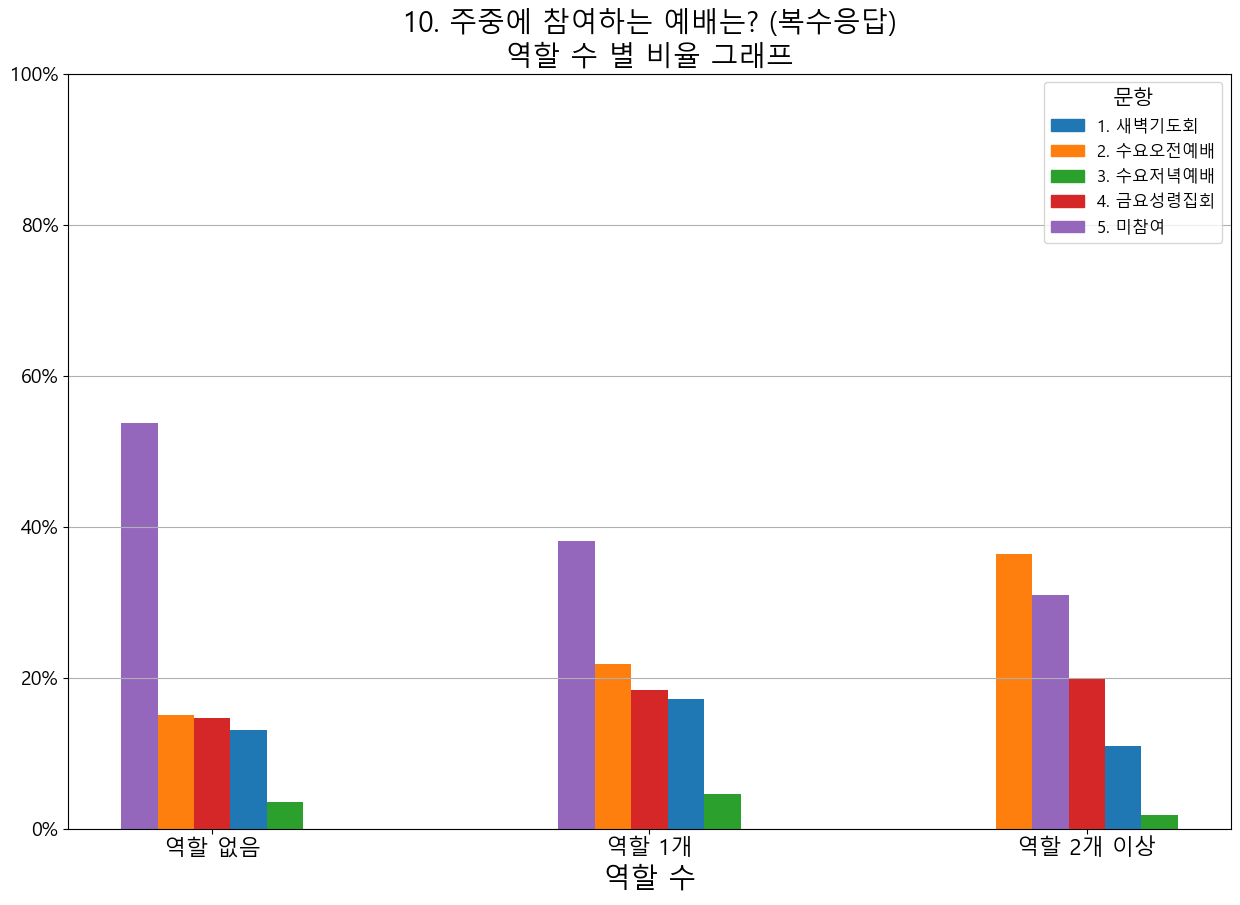

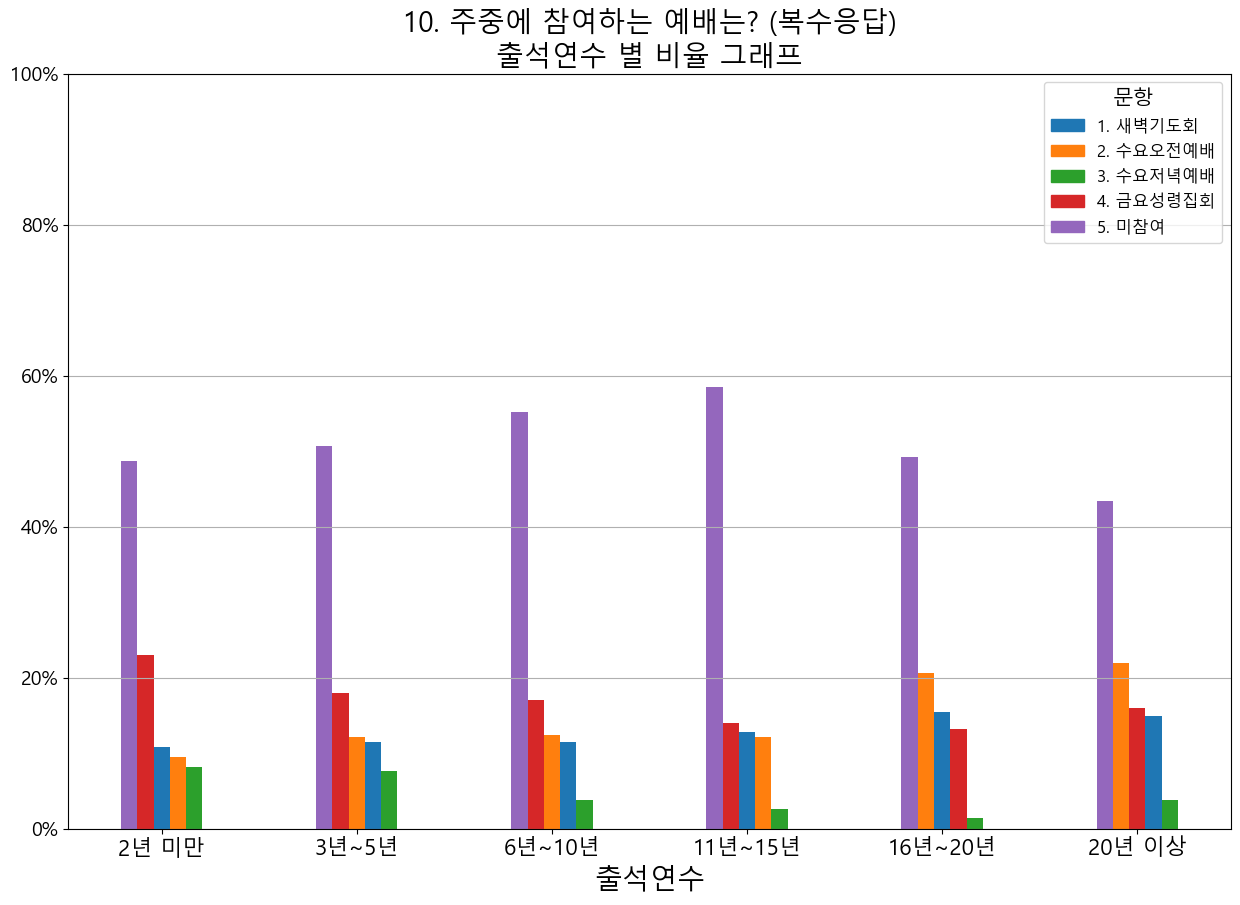

In [ ]:
all_color_list = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
color_list = all_color_list[:len(table.columns)]
gap = len(table.columns) / 2 - 0.5

# 그래프 제목 설정
for question in data.columns[:-1]:
    if Q == int(re.findall('\d+', question)[0]):
        title = question
    
# 범례(legend) 설정
ax_list = []
for idx in range(len(q_table.columns)):
    ax_list.append(mpatches.Patch(color = color_list[idx], label = f'{q_table.columns[idx]}'))
    
plot_1()
plot_2()
plot_3()
plot_4()
plot_5()

### Q11. 주중예배는 일주일에 얼마나 참여하나요?

#### 데이터 셋 준비

In [ ]:
Q = 11
Q_list.append(Q)
복수응답 = ""

In [ ]:
table_Q11 = pd.DataFrame(index = ['전체',
                                 '14~19세', '20~29세', '30~39세', '40~49세', '50~59세', '60~69세', '70세 이상',
                                 '성도', '집사', '권사', '장로',
                                 '역할 없음', '역할 1개', '역할 2개 이상',
                                 '2년 미만', '3년~5년', '6년~10년', '11년~15년', '16년~20년', '20년 이상'],
                        columns = ['1. 주 1회',
                                   '2. 주 2회',
                                   '3. 주 3회 이상',
                                   '4. 미참여'])

In [ ]:
df_Q11 = df.copy()
df_Q11['Q11_1'] = 0
df_Q11['Q11_2'] = 0
df_Q11['Q11_3'] = 0
df_Q11['Q11_4'] = 0

In [ ]:
nan_index = []

for idx, Q11 in enumerate(data['11. 주중예배는 일주일에 얼마나 참여하나요?']):
    if type(Q11) == float:
        nan_index.append(idx)
    elif type(Q11) == str:
        if '주 1회' in Q11:
            df_Q11['Q11_1'].iloc[idx] = 1
        if '주 2회' in Q11:
            df_Q11['Q11_2'].iloc[idx] = 1
        if '주 3회' in Q11:
            df_Q11['Q11_3'].iloc[idx] = 1
        if '미참여' in Q11:
            df_Q11['Q11_4'].iloc[idx] = 1
        if df_Q11.iloc[idx, col_num:].sum() == 0:
            nan_index.append(idx)
        
df_Q11.drop(df_Q11.index[nan_index], axis = 0, inplace = True)

#### 빈도수 & 비율 테이블

In [ ]:
table, q_table, f_table = make_table(Q)

#### 시각화

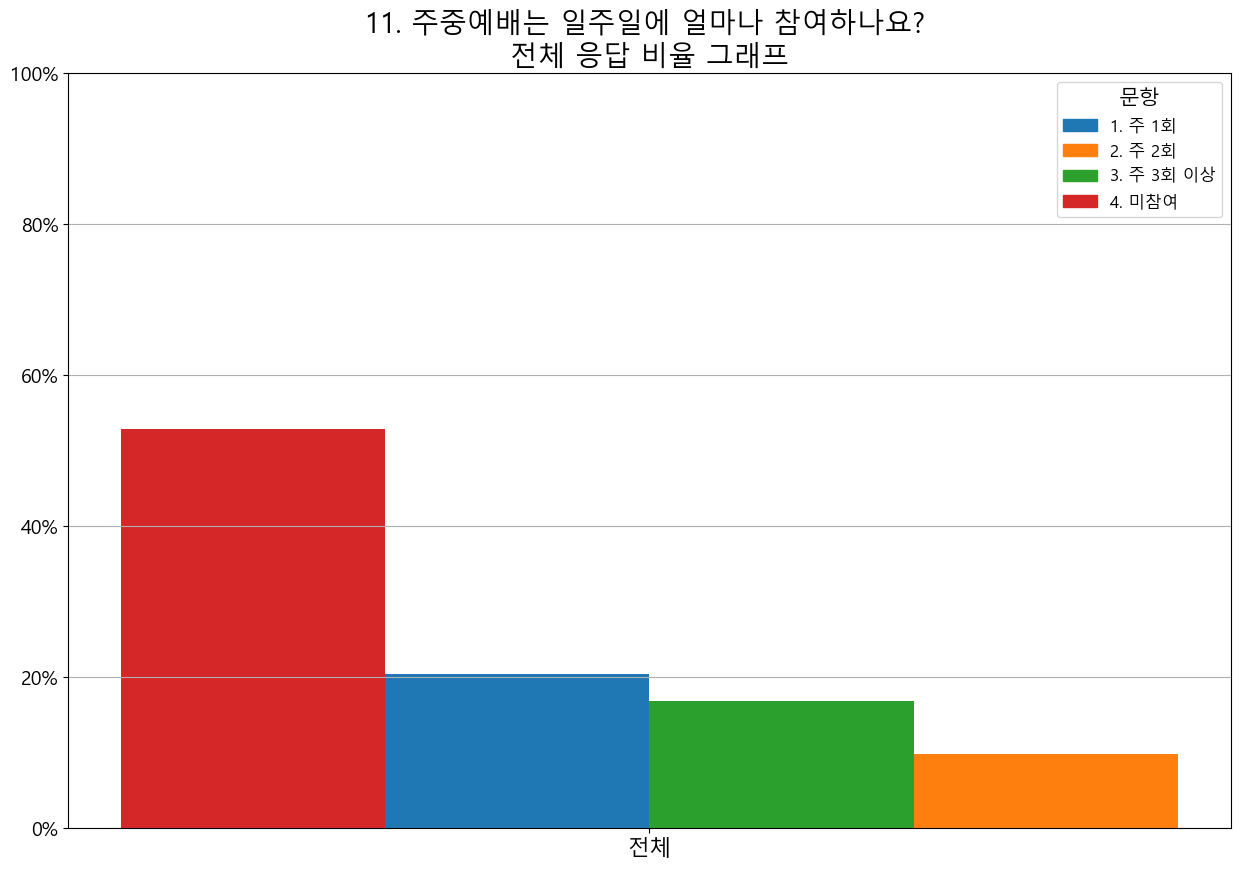

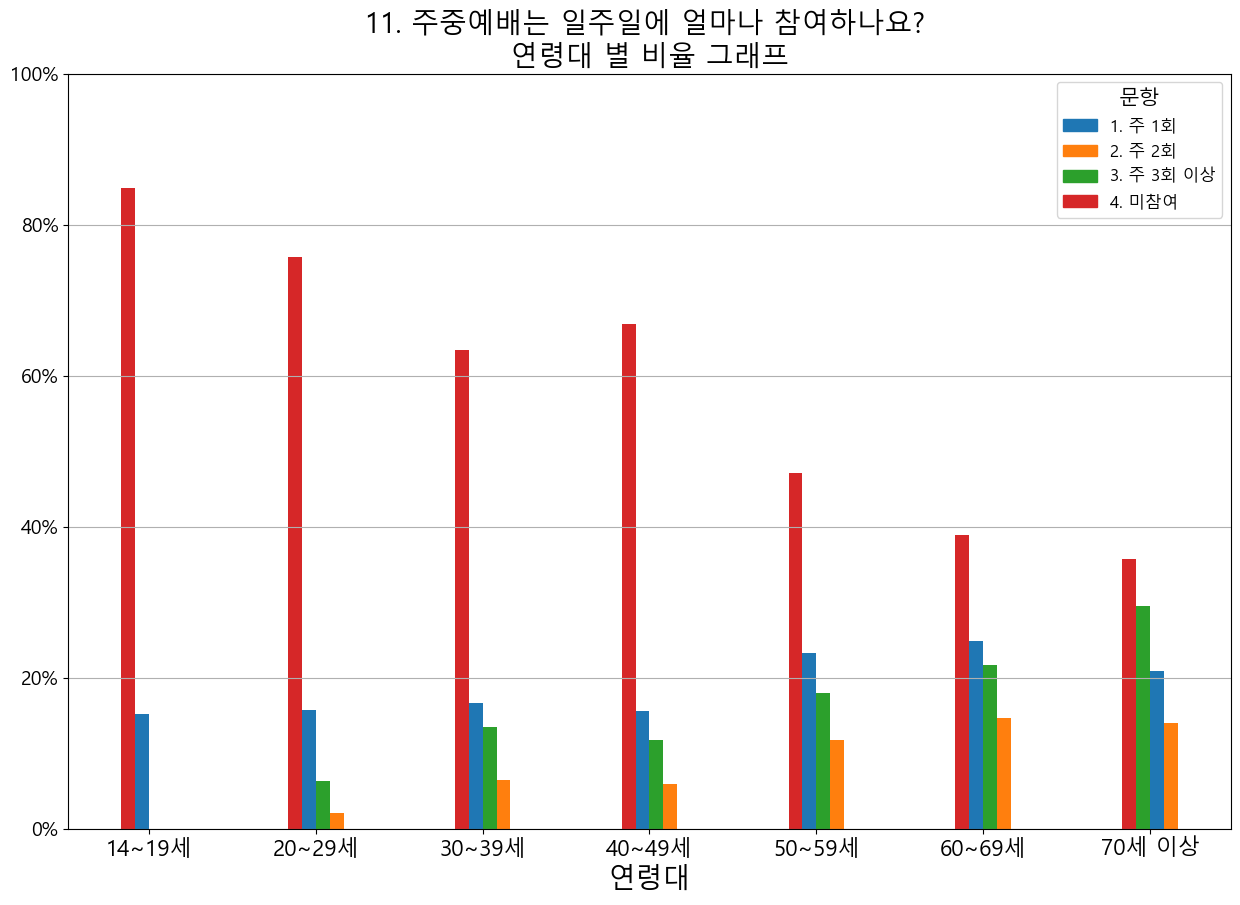

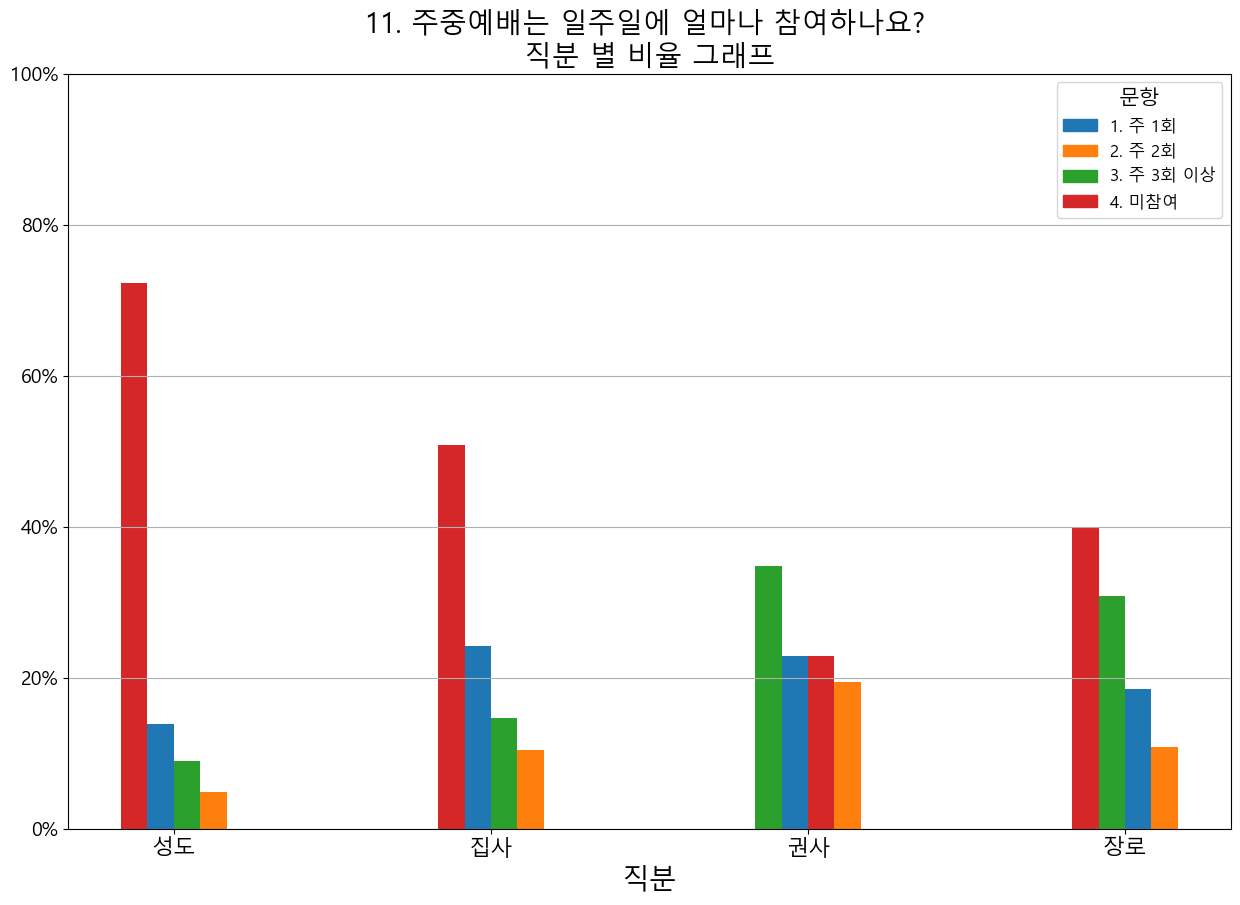

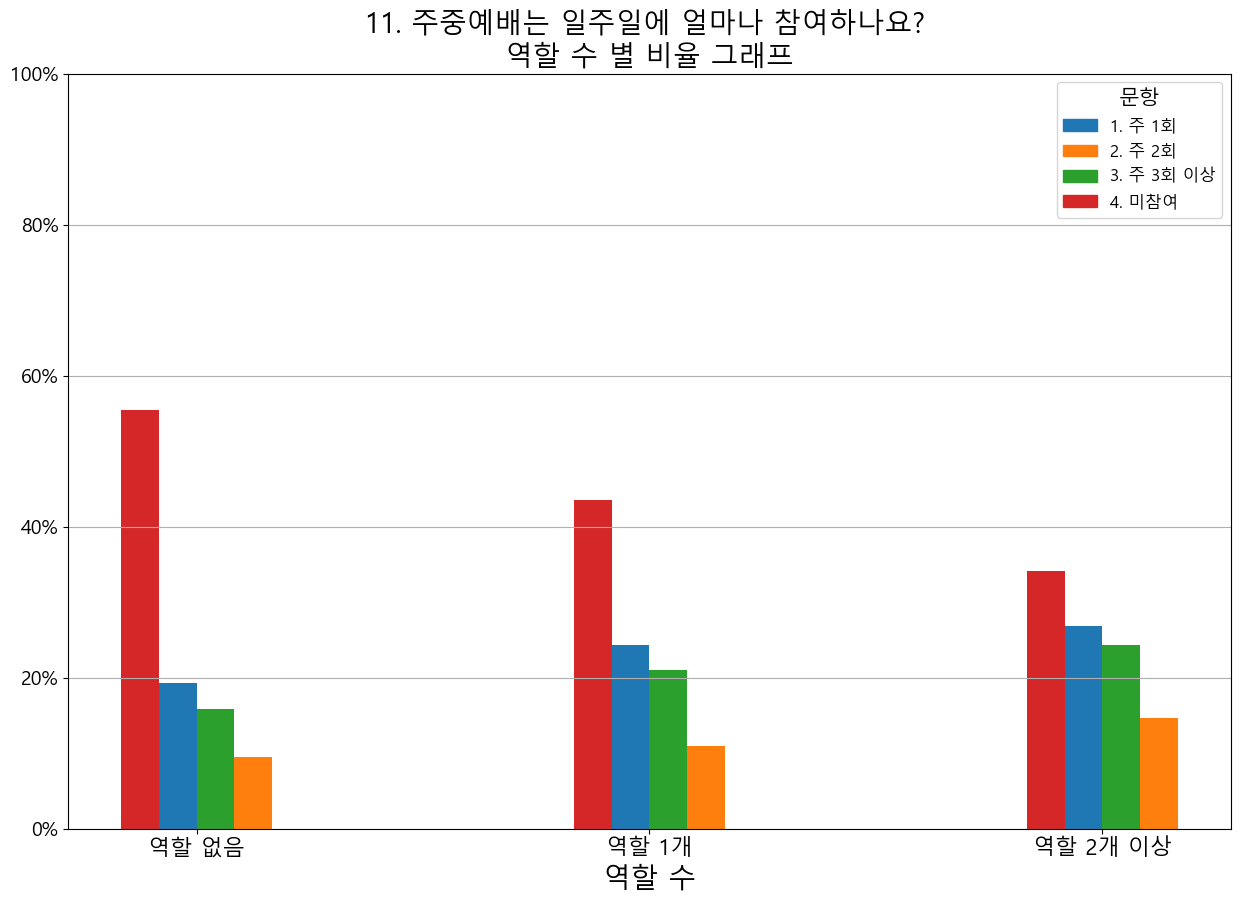

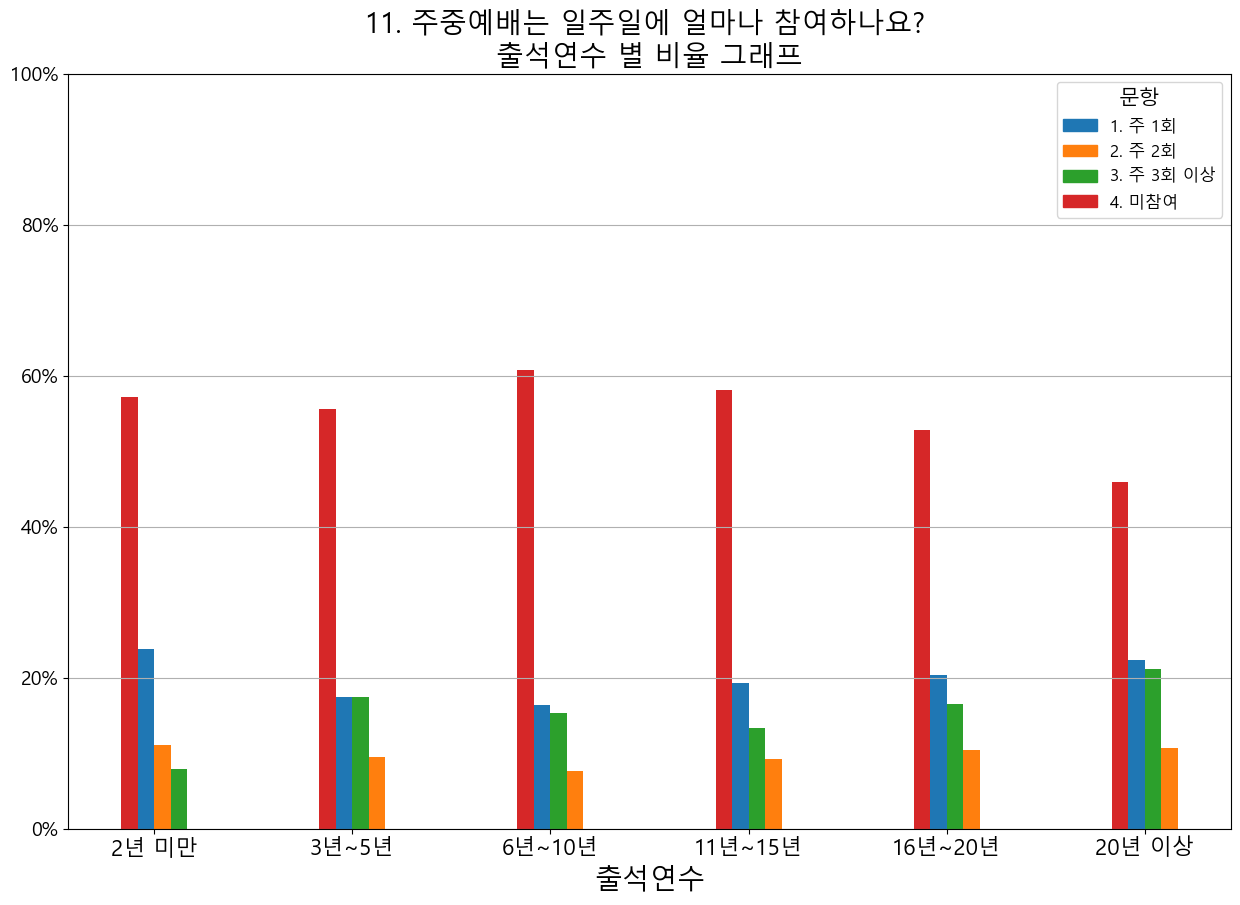

In [ ]:
all_color_list = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
color_list = all_color_list[:len(table.columns)]
gap = len(table.columns) / 2 - 0.5

# 그래프 제목 설정
for question in data.columns[:-1]:
    if Q == int(re.findall('\d+', question)[0]):
        title = question
    
# 범례(legend) 설정
ax_list = []
for idx in range(len(q_table.columns)):
    ax_list.append(mpatches.Patch(color = color_list[idx], label = f'{q_table.columns[idx]}'))
    
plot_1()
plot_2()
plot_3()
plot_4()
plot_5()

### Q12. 예배는 어떻게 참여하나요?

#### 데이터 셋 준비

In [ ]:
Q = 12
Q_list.append(Q)
복수응답 = ""

In [ ]:
table_Q12 = pd.DataFrame(index = ['전체',
                                 '14~19세', '20~29세', '30~39세', '40~49세', '50~59세', '60~69세', '70세 이상',
                                 '성도', '집사', '권사', '장로',
                                 '역할 없음', '역할 1개', '역할 2개 이상',
                                 '2년 미만', '3년~5년', '6년~10년', '11년~15년', '16년~20년', '20년 이상'],
                        columns = ['1. 현장예배',
                                   '2. 온라인 실시간 예배',
                                   '3. 녹화영상예배',
                                   '4. 현장과 온라인예배 병행',
                                   '5. 기독교 방송',
                                   '6. 가정예배',
                                   '7. 타교회 예배',
                                   '8. 미참여'])

In [ ]:
df_Q12 = df.copy()
df_Q12['Q12_1'] = 0
df_Q12['Q12_2'] = 0
df_Q12['Q12_3'] = 0
df_Q12['Q12_4'] = 0
df_Q12['Q12_5'] = 0
df_Q12['Q12_6'] = 0
df_Q12['Q12_7'] = 0
df_Q12['Q12_8'] = 0

In [ ]:
nan_index = []

for idx, Q12 in enumerate(data['12. 예배는 어떻게 참여하나요?']):
    if type(Q12) == float:
        nan_index.append(idx)
    elif type(Q12) == str:
        if '현장예배' in Q12:
            df_Q12['Q12_1'].iloc[idx] = 1
        if '실시간' in Q12:
            df_Q12['Q12_2'].iloc[idx] = 1
        if '녹화영상' in Q12:
            df_Q12['Q12_3'].iloc[idx] = 1
        if '현장과 온라인예배' in Q12:
            df_Q12['Q12_4'].iloc[idx] = 1
        if '기독교 방송' in Q12:
            df_Q12['Q12_5'].iloc[idx] = 1
        if '가정예배' in Q12:
            df_Q12['Q12_6'].iloc[idx] = 1
        if '타교회 예배' in Q12:
            df_Q12['Q12_7'].iloc[idx] = 1
        if '미참여' in Q12:
            df_Q12['Q12_8'].iloc[idx] = 1
        if df_Q12.iloc[idx, col_num:].sum() == 0:
            nan_index.append(idx)
        
df_Q12.drop(df_Q12.index[nan_index], axis = 0, inplace = True)

#### 빈도수 & 비율 테이블

In [ ]:
table, q_table, f_table = make_table(Q)

#### 시각화

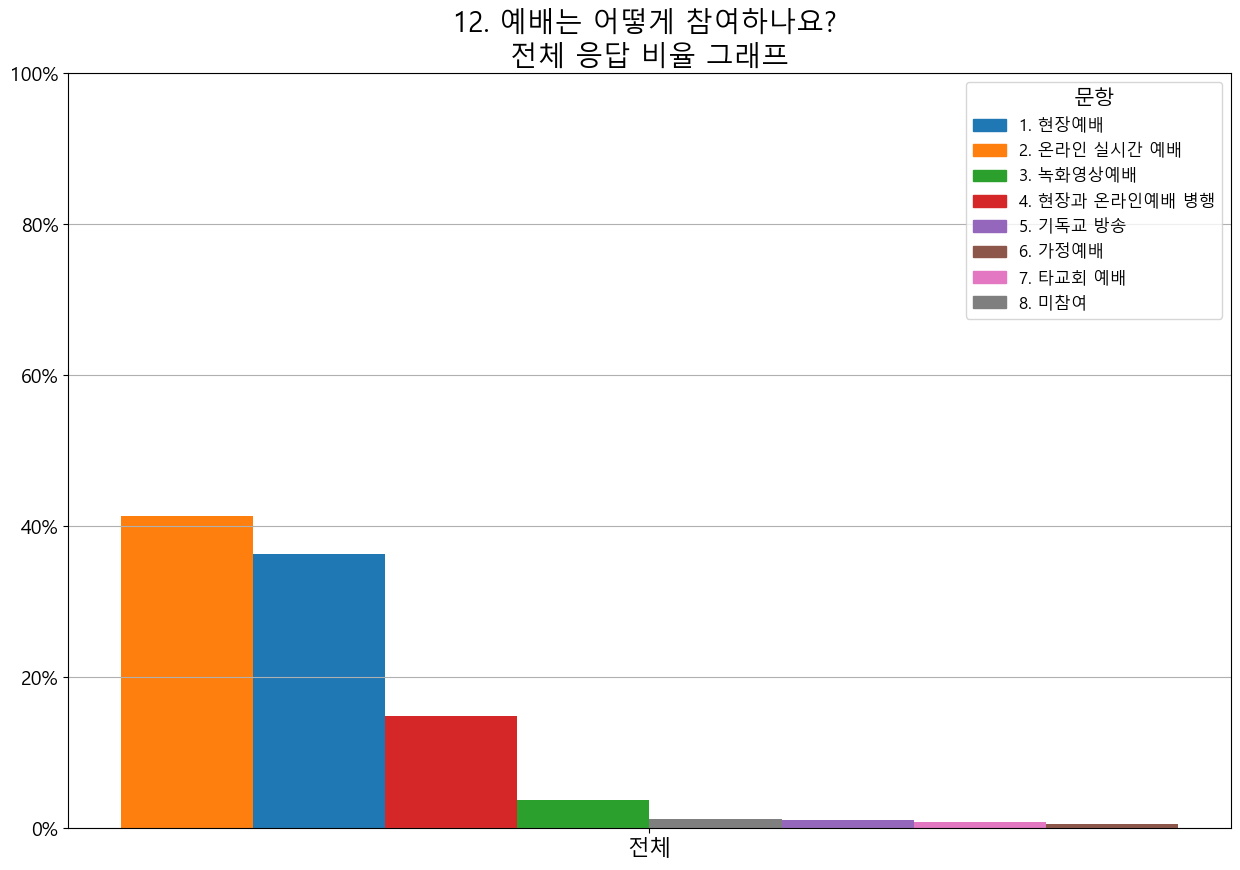

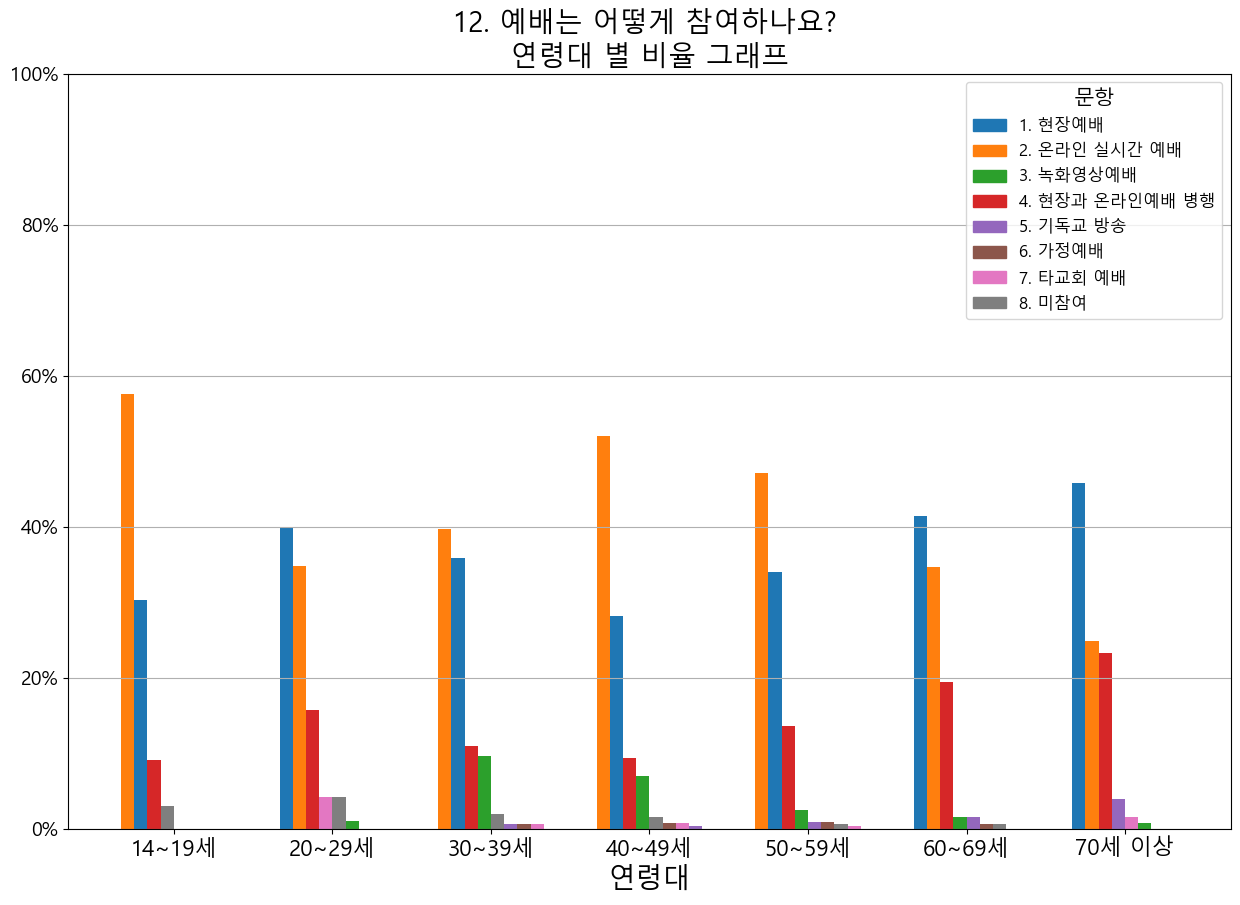

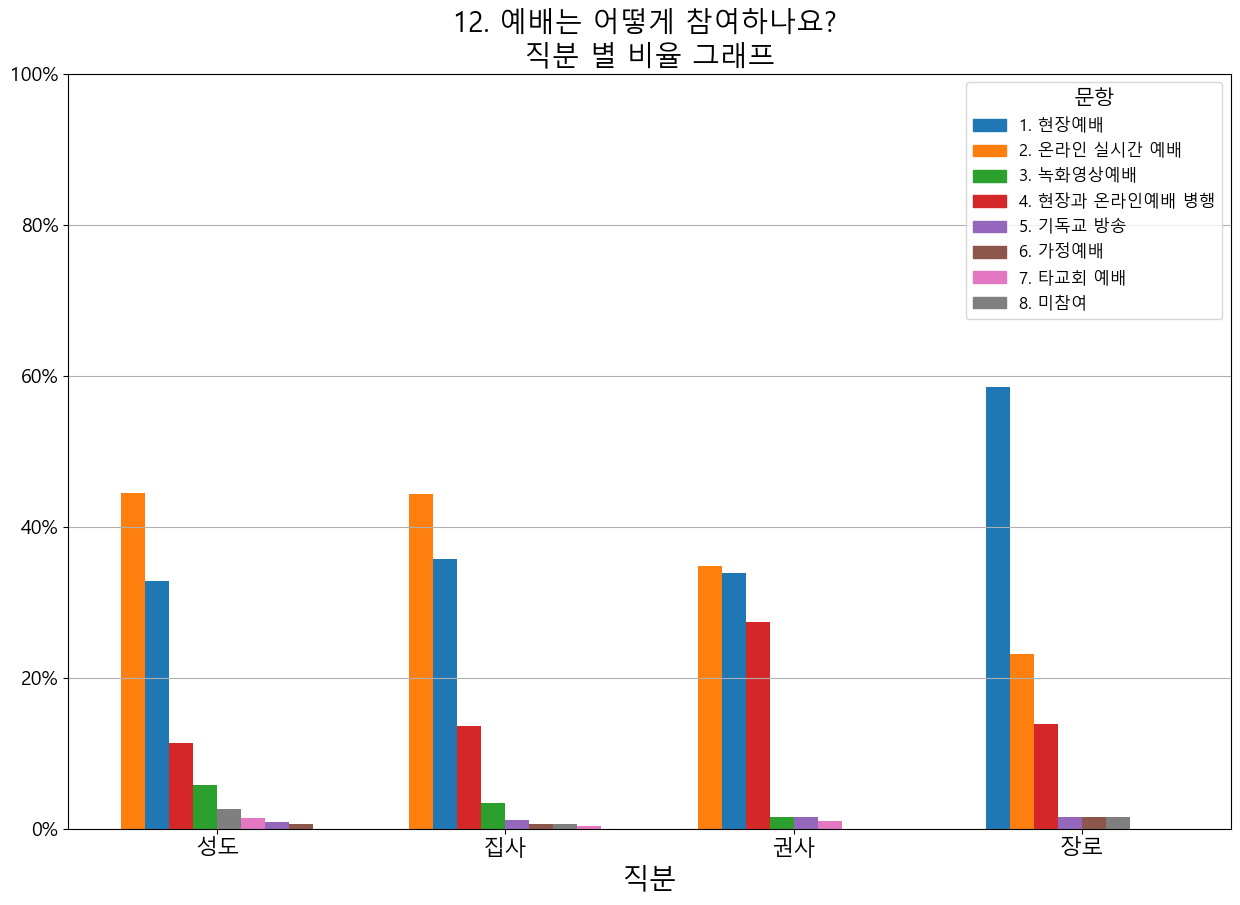

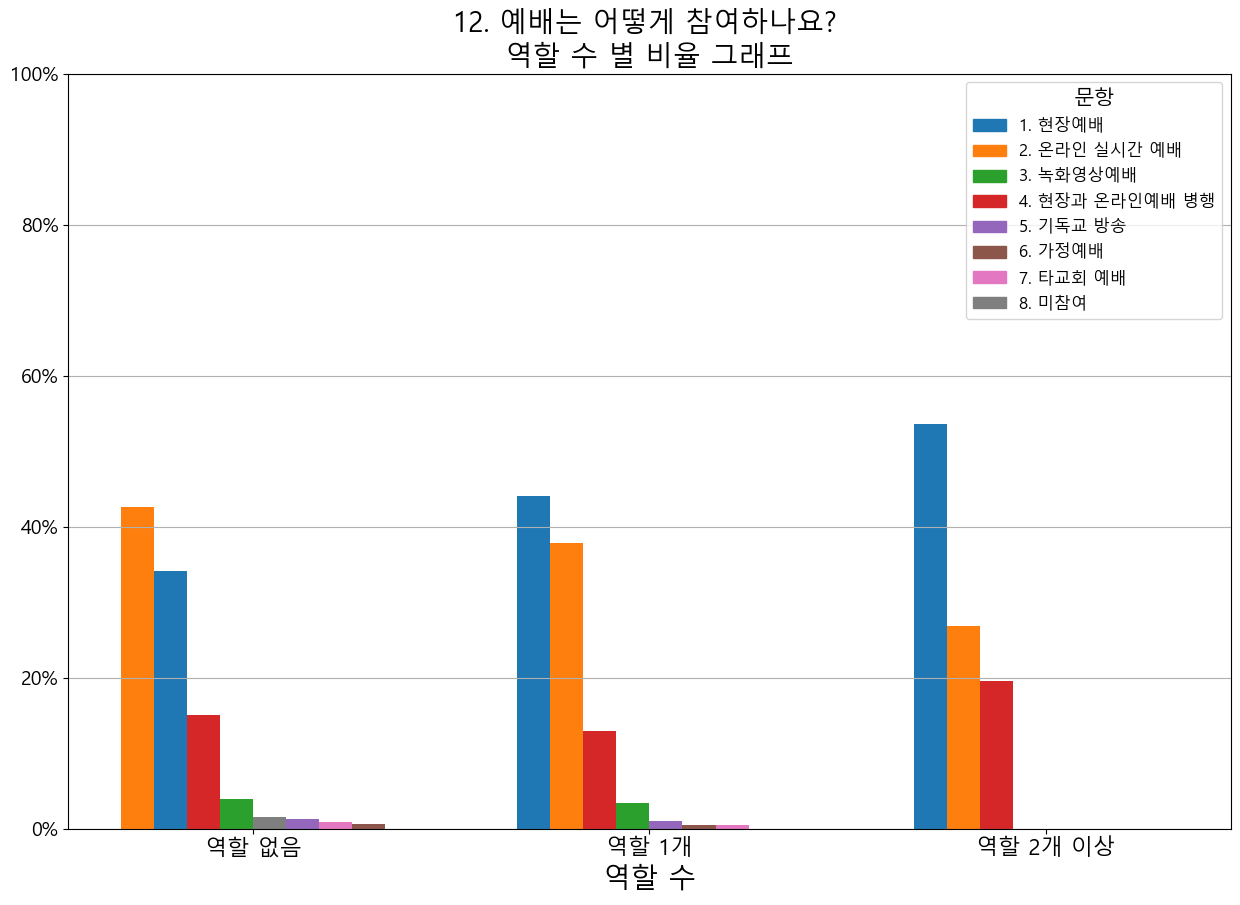

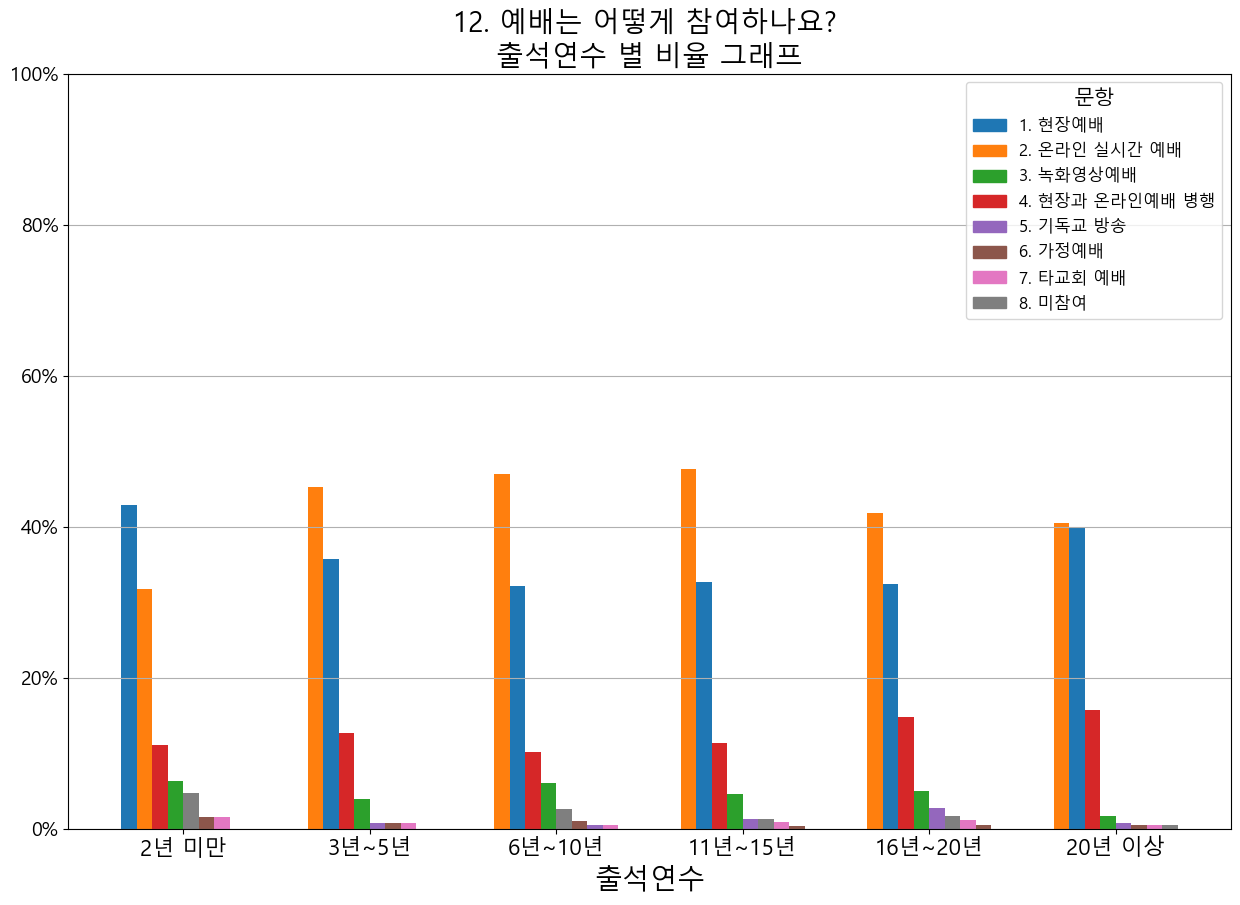

In [ ]:
all_color_list = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
color_list = all_color_list[:len(table.columns)]
gap = len(table.columns) / 2 - 0.5

# 그래프 제목 설정
for question in data.columns[:-1]:
    if Q == int(re.findall('\d+', question)[0]):
        title = question
    
# 범례(legend) 설정
ax_list = []
for idx in range(len(q_table.columns)):
    ax_list.append(mpatches.Patch(color = color_list[idx], label = f'{q_table.columns[idx]}'))
    
plot_1()
plot_2()
plot_3()
plot_4()
plot_5()

### Q13. 현장예배 보다 온라인 예배를 참여하는 가장 큰 이유는?

#### 데이터 셋 준비

In [ ]:
Q = 13
Q_list.append(Q)
복수응답 = ""

In [ ]:
table_Q13 = pd.DataFrame(index = ['전체',
                                 '14~19세', '20~29세', '30~39세', '40~49세', '50~59세', '60~69세', '70세 이상',
                                 '성도', '집사', '권사', '장로',
                                 '역할 없음', '역할 1개', '역할 2개 이상',
                                 '2년 미만', '3년~5년', '6년~10년', '11년~15년', '16년~20년', '20년 이상'],
                        columns = ['1. 코로나 감염에 대한 우려',
                                   '2. 직장 등 삶의 환경에 따른 제약',
                                   '3. 가족들의 염려',
                                   '4. 온라인 예배가 편리',
                                   '5. 현장예배로 참여하고 있음'])

In [ ]:
df_Q13 = df.copy()
df_Q13['Q13_1'] = 0
df_Q13['Q13_2'] = 0
df_Q13['Q13_3'] = 0
df_Q13['Q13_4'] = 0
df_Q13['Q13_5'] = 0

In [ ]:
nan_index = []

for idx, Q13 in enumerate(data['13. 현장예배 보다 온라인 예배에 참여하는 가장 큰 이유는?']):
    if type(Q13) == float:
        nan_index.append(idx)
    elif type(Q13) == str:
        if '코로나 감염에 대한 우려' in Q13:
            df_Q13['Q13_1'].iloc[idx] = 1
        if '환경에 따른 제약' in Q13:
            df_Q13['Q13_2'].iloc[idx] = 1
        if '가족들의 염려' in Q13:
            df_Q13['Q13_3'].iloc[idx] = 1
        if '온라인 예배가 편리' in Q13:
            df_Q13['Q13_4'].iloc[idx] = 1
        if '현장예배로 참여' in Q13:
            df_Q13['Q13_5'].iloc[idx] = 1
        if df_Q13.iloc[idx, col_num:].sum() == 0:
            nan_index.append(idx)
        
df_Q13.drop(df_Q13.index[nan_index], axis = 0, inplace = True)

#### 빈도수 & 비율 테이블

In [ ]:
table, q_table, f_table = make_table(Q)

#### 시각화

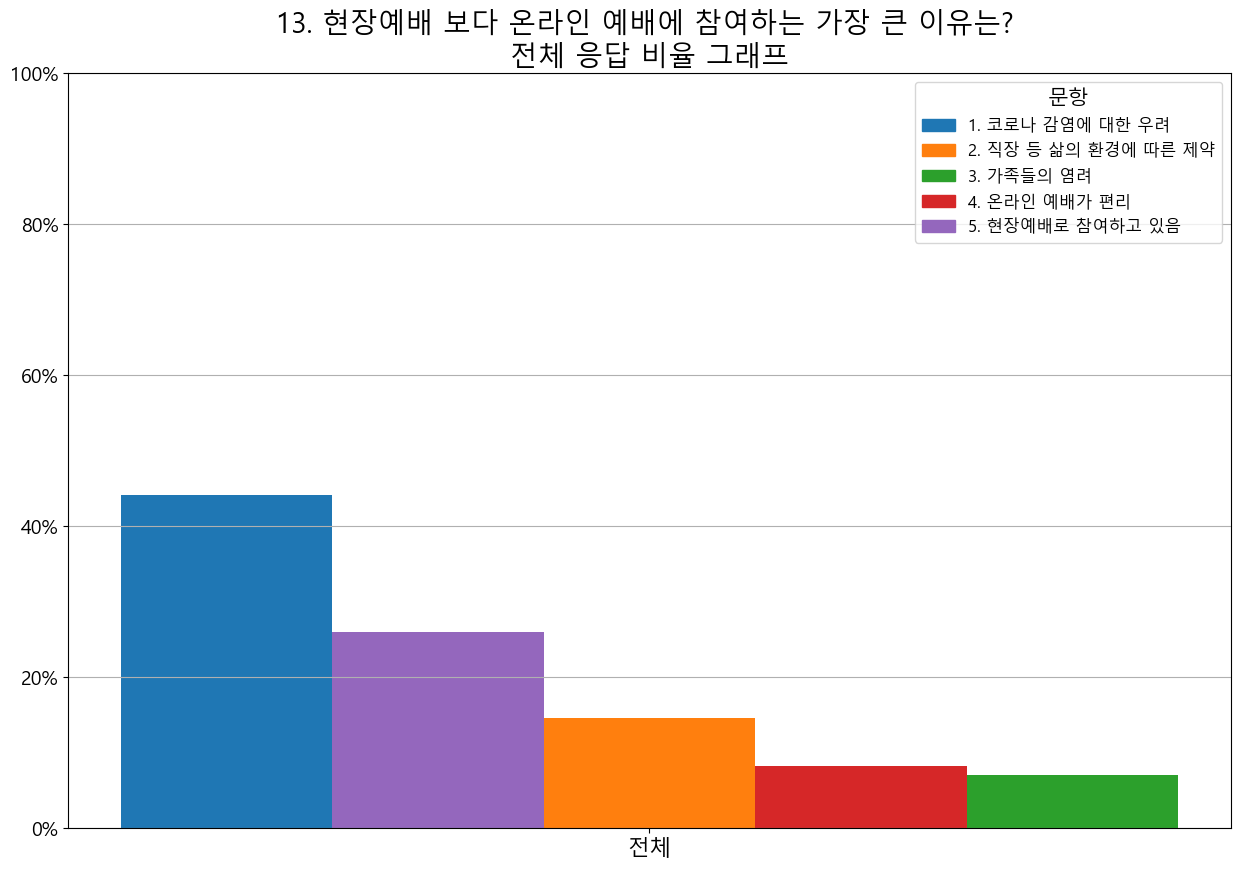

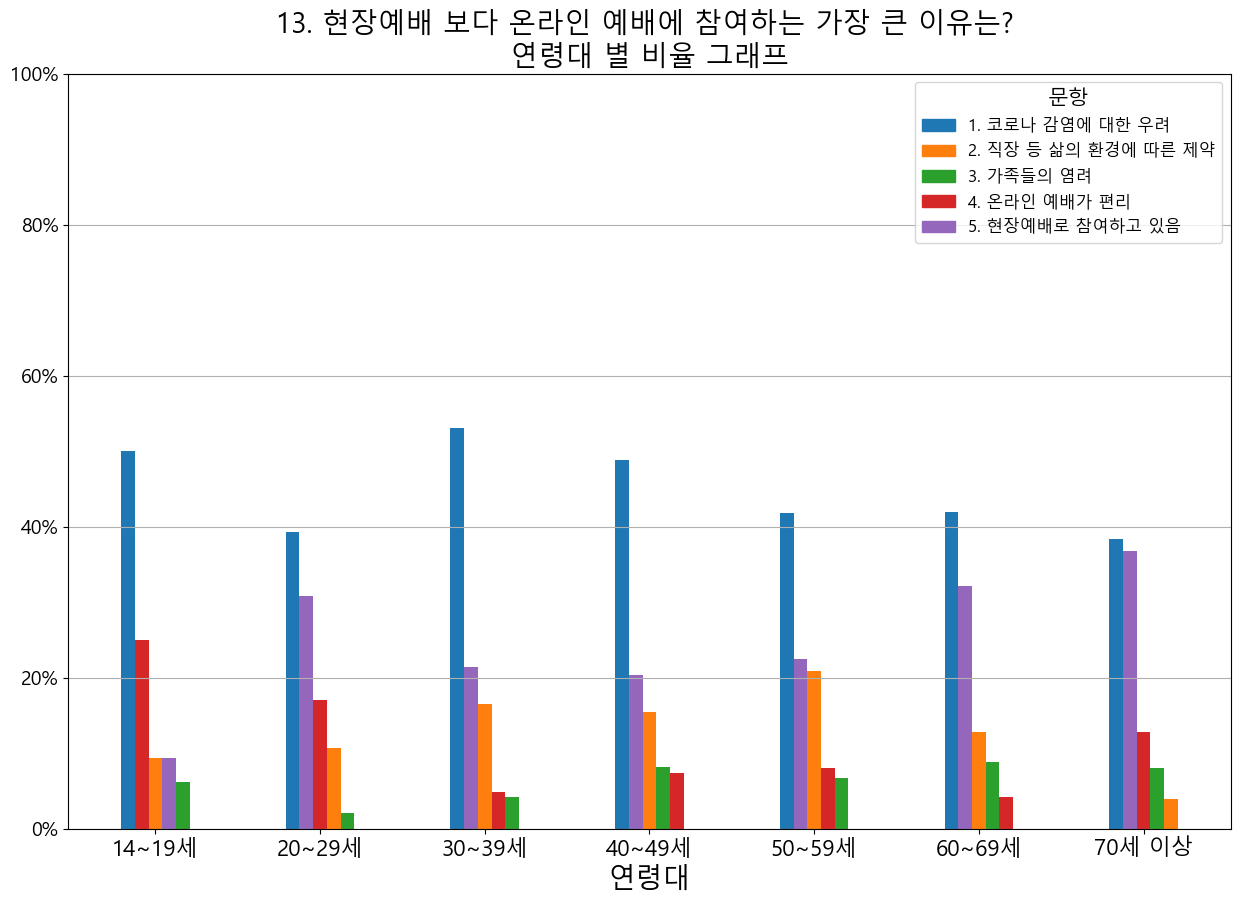

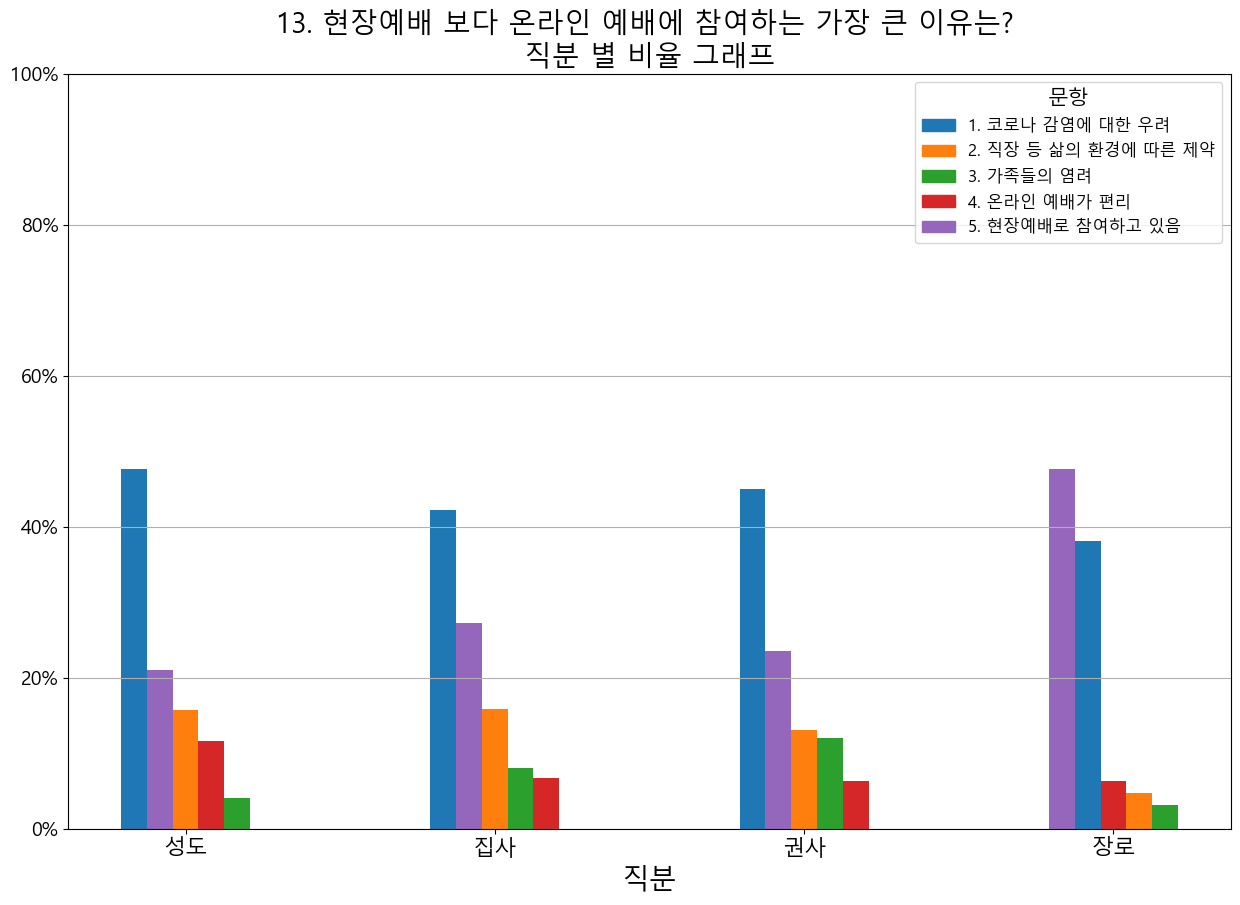

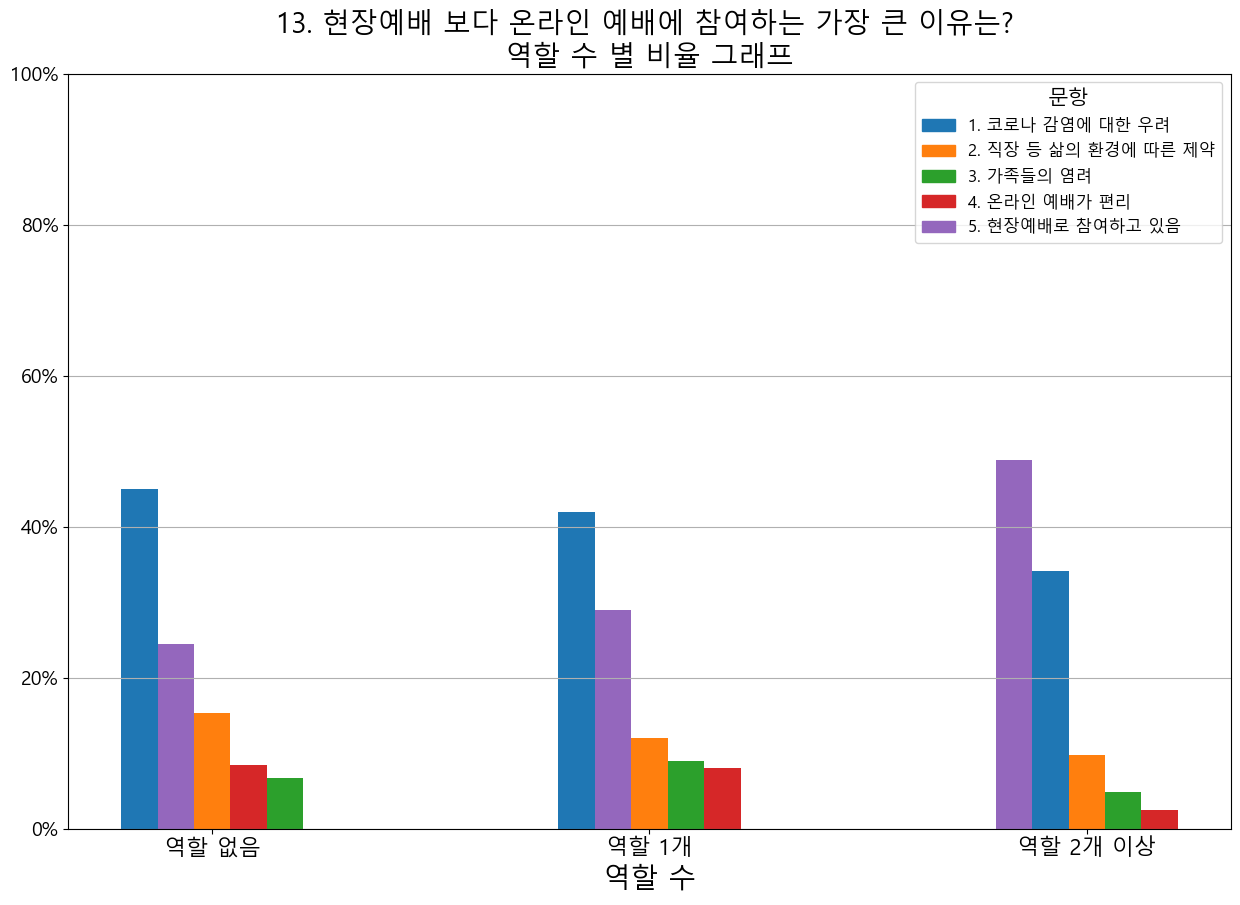

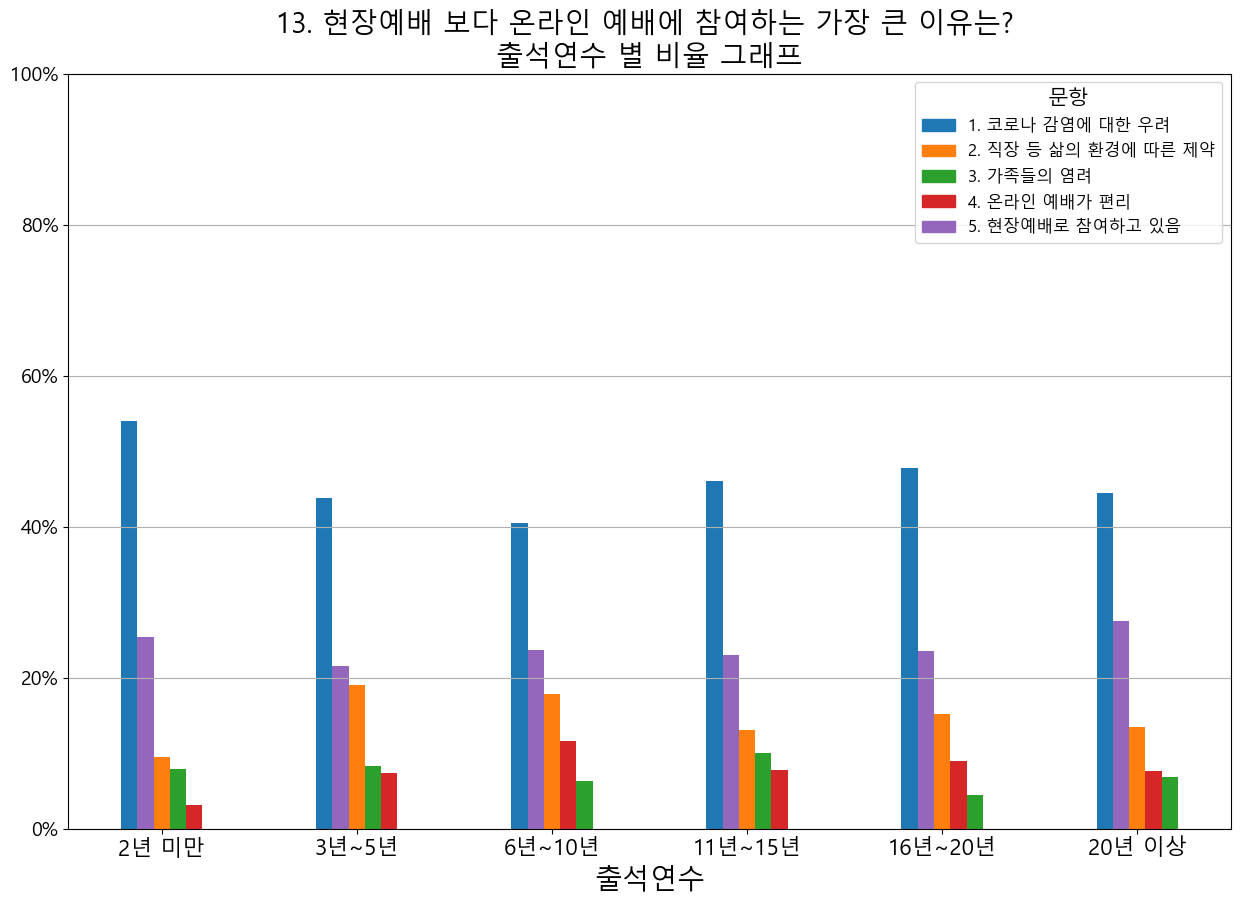

In [ ]:
all_color_list = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
color_list = all_color_list[:len(table.columns)]
gap = len(table.columns) / 2 - 0.5

# 그래프 제목 설정
for question in data.columns[:-1]:
    if Q == int(re.findall('\d+', question)[0]):
        title = question
    
# 범례(legend) 설정
ax_list = []
for idx in range(len(q_table.columns)):
    ax_list.append(mpatches.Patch(color = color_list[idx], label = f'{q_table.columns[idx]}'))
    
plot_1()
plot_2()
plot_3()
plot_4()
plot_5()

### Q14. 온라인 예배에 참여하며 겪는 가장 큰 어려운 점은?

#### 데이터 셋 준비

In [ ]:
Q = 14
Q_list.append(Q)
복수응답 = ""

In [ ]:
table_Q14 = pd.DataFrame(index = ['전체',
                                 '14~19세', '20~29세', '30~39세', '40~49세', '50~59세', '60~69세', '70세 이상',
                                 '성도', '집사', '권사', '장로',
                                 '역할 없음', '역할 1개', '역할 2개 이상',
                                 '2년 미만', '3년~5년', '6년~10년', '11년~15년', '16년~20년', '20년 이상'],
                        columns = ['1. 현장감 부족',
                                   '2. 집중력과 긴장감이 떨어짐',
                                   '3. 예배 중간에 다른 일을 하게 됨',
                                   '4. 신앙생활이 나태해지고, 신앙 소비주의에 빠지기 쉬움',
                                   '5. 소리내어 찬양이나 기도하기 부담스러움',
                                   '6. 기술적인 진입장벽 있음',
                                   '7. 없음'])

In [ ]:
df_Q14 = df.copy()
df_Q14['Q14_1'] = 0
df_Q14['Q14_2'] = 0
df_Q14['Q14_3'] = 0
df_Q14['Q14_4'] = 0
df_Q14['Q14_5'] = 0
df_Q14['Q14_6'] = 0
df_Q14['Q14_7'] = 0

In [ ]:
nan_index = []

for idx, Q14 in enumerate(data['14. 온라인 예배에 참여하며 겪는 가장 큰 어려운 점은?']):
    if type(Q14) == float:
        nan_index.append(idx)
    elif type(Q14) == str:
        if '현장감이 부족' in Q14:
            df_Q14['Q14_1'].iloc[idx] = 1
        if '집중력과 긴장감' in Q14:
            df_Q14['Q14_2'].iloc[idx] = 1
        if '예배 중간에 다른 일' in Q14:
            df_Q14['Q14_3'].iloc[idx] = 1
        if '신앙생활이 나태' in Q14:
            df_Q14['Q14_4'].iloc[idx] = 1
        if '소리내어 찬양' in Q14:
            df_Q14['Q14_5'].iloc[idx] = 1
        if '기술적인 진입장벽' in Q14:
            df_Q14['Q14_6'].iloc[idx] = 1
        if '없음' in Q14:
            df_Q14['Q14_7'].iloc[idx] = 1
        if df_Q14.iloc[idx, col_num:].sum() == 0:
            nan_index.append(idx)
        
df_Q14.drop(df_Q14.index[nan_index], axis = 0, inplace = True)

#### 빈도수 & 비율 테이블

In [ ]:
table, q_table, f_table = make_table(Q)

#### 시각화

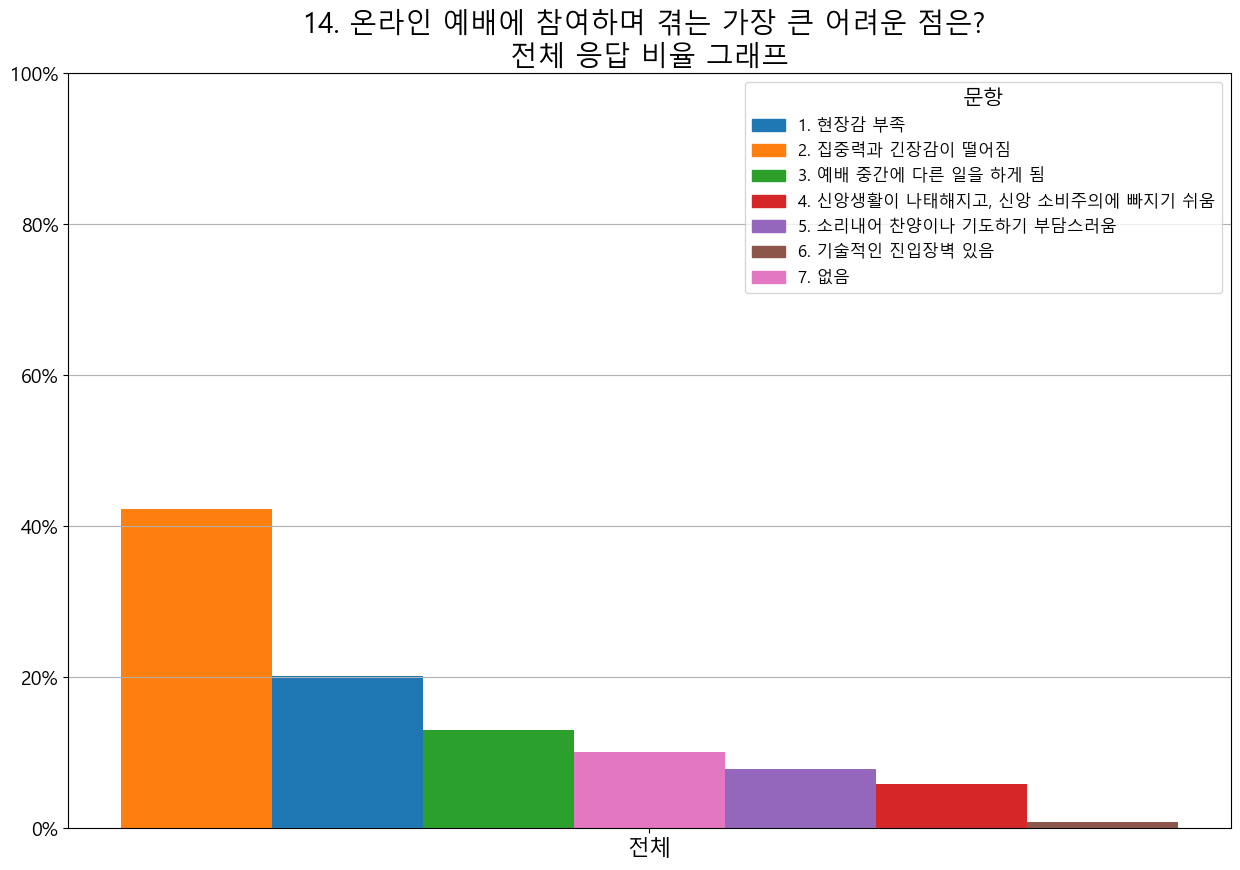

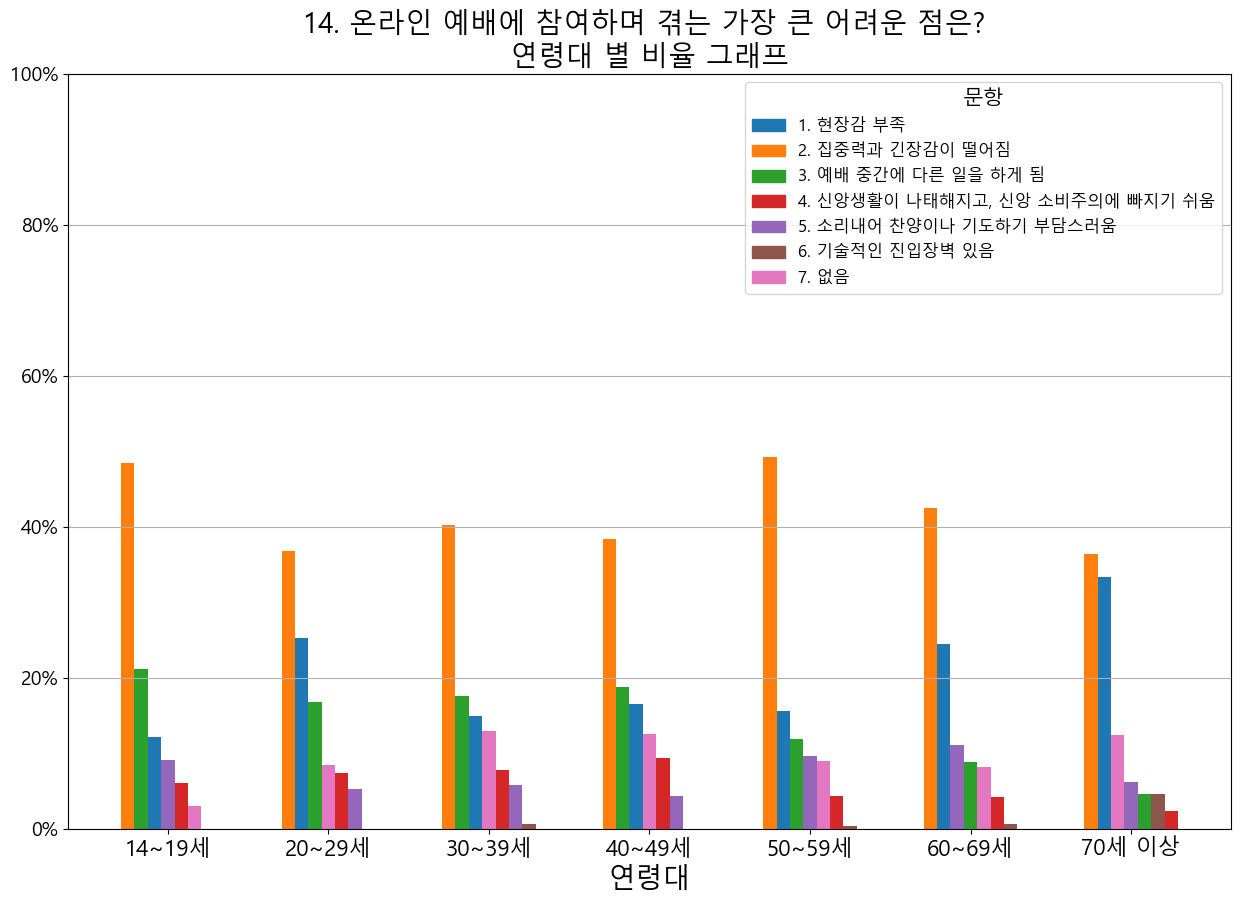

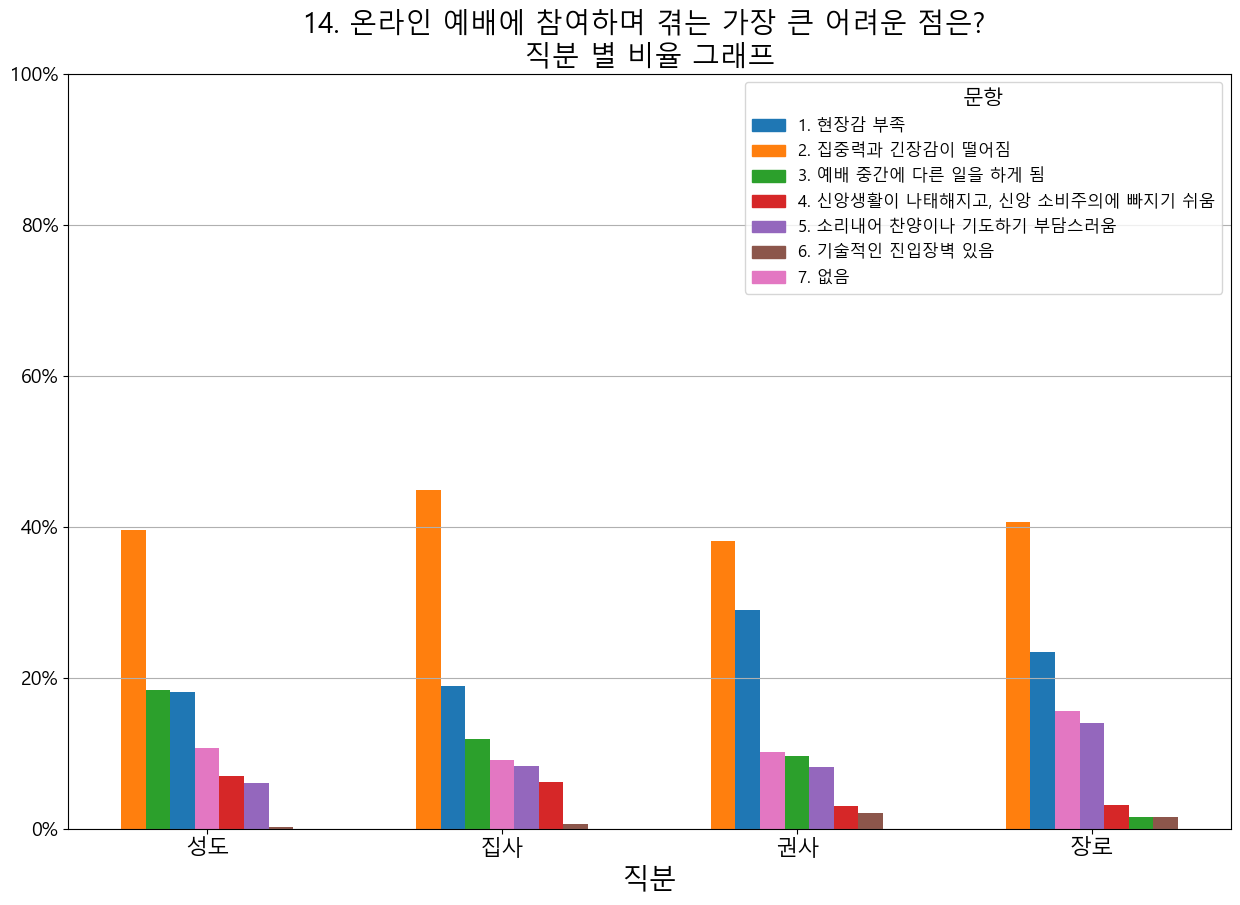

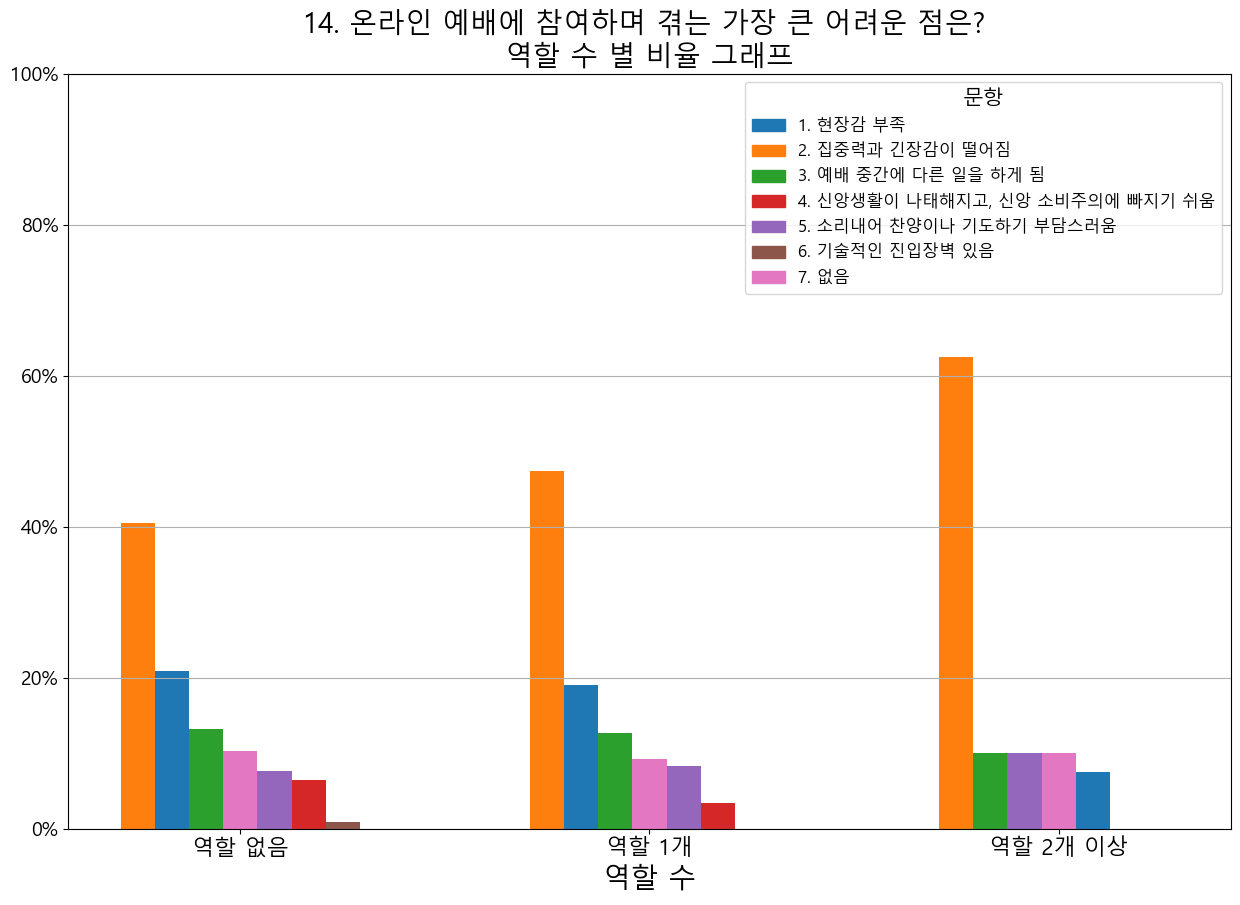

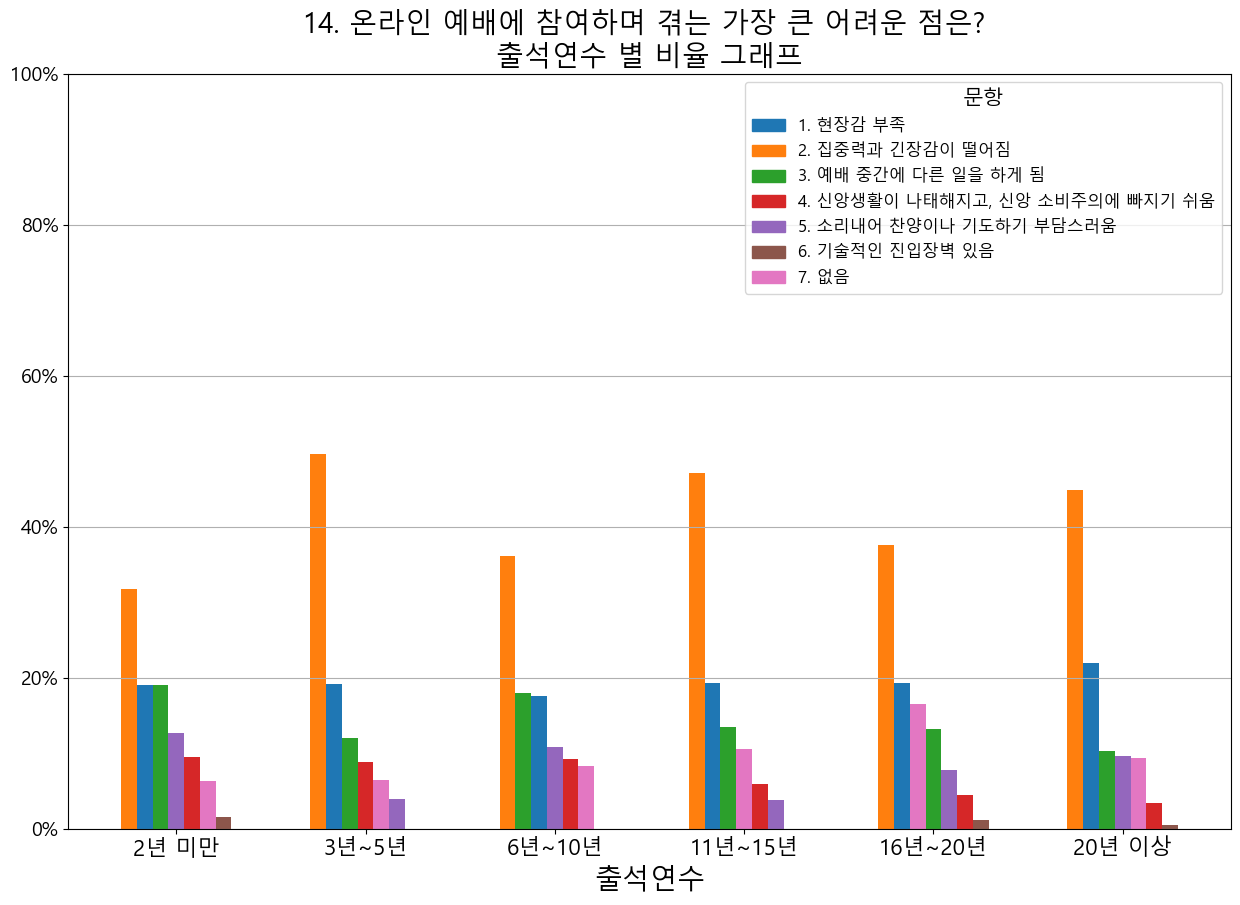

In [ ]:
all_color_list = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
color_list = all_color_list[:len(table.columns)]
gap = len(table.columns) / 2 - 0.5

# 그래프 제목 설정
for question in data.columns[:-1]:
    if Q == int(re.findall('\d+', question)[0]):
        title = question
    
# 범례(legend) 설정
ax_list = []
for idx in range(len(q_table.columns)):
    ax_list.append(mpatches.Patch(color = color_list[idx], label = f'{q_table.columns[idx]}'))
    
plot_1()
plot_2()
plot_3()
plot_4()
plot_5()

### Q15. 온라인 예배 시작하는 시간을 잘 지키고 계시나요?

#### 데이터 셋 준비

In [ ]:
Q = 15
Q_list.append(Q)
복수응답 = ""

In [ ]:
table_Q15 = pd.DataFrame(index = ['전체',
                                 '14~19세', '20~29세', '30~39세', '40~49세', '50~59세', '60~69세', '70세 이상',
                                 '성도', '집사', '권사', '장로',
                                 '역할 없음', '역할 1개', '역할 2개 이상',
                                 '2년 미만', '3년~5년', '6년~10년', '11년~15년', '16년~20년', '20년 이상'],
                        columns = ['1. 미리 준비하거나 정시참여',
                                   '2. 예배 시작 후, 뒤늦게 참여'])

In [ ]:
df_Q15 = df.copy()
df_Q15['Q15_1'] = 0
df_Q15['Q15_2'] = 0

In [ ]:
nan_index = []

for idx, Q15 in enumerate(data['15. 온라인 예배 시작하는 시간을 잘 지키고 계시나요?']):
    if type(Q15) == float:
        nan_index.append(idx)
    elif type(Q15) == str:
        if '미리 준비' in Q15:
            df_Q15['Q15_1'].iloc[idx] = 1
        if '예배 시작' in Q15:
            df_Q15['Q15_2'].iloc[idx] = 1
        if df_Q15.iloc[idx, col_num:].sum() == 0:
            nan_index.append(idx)
        
df_Q15.drop(df_Q15.index[nan_index], axis = 0, inplace = True)

#### 빈도수 & 비율 테이블

In [ ]:
table, q_table, f_table = make_table(Q)

#### 시각화

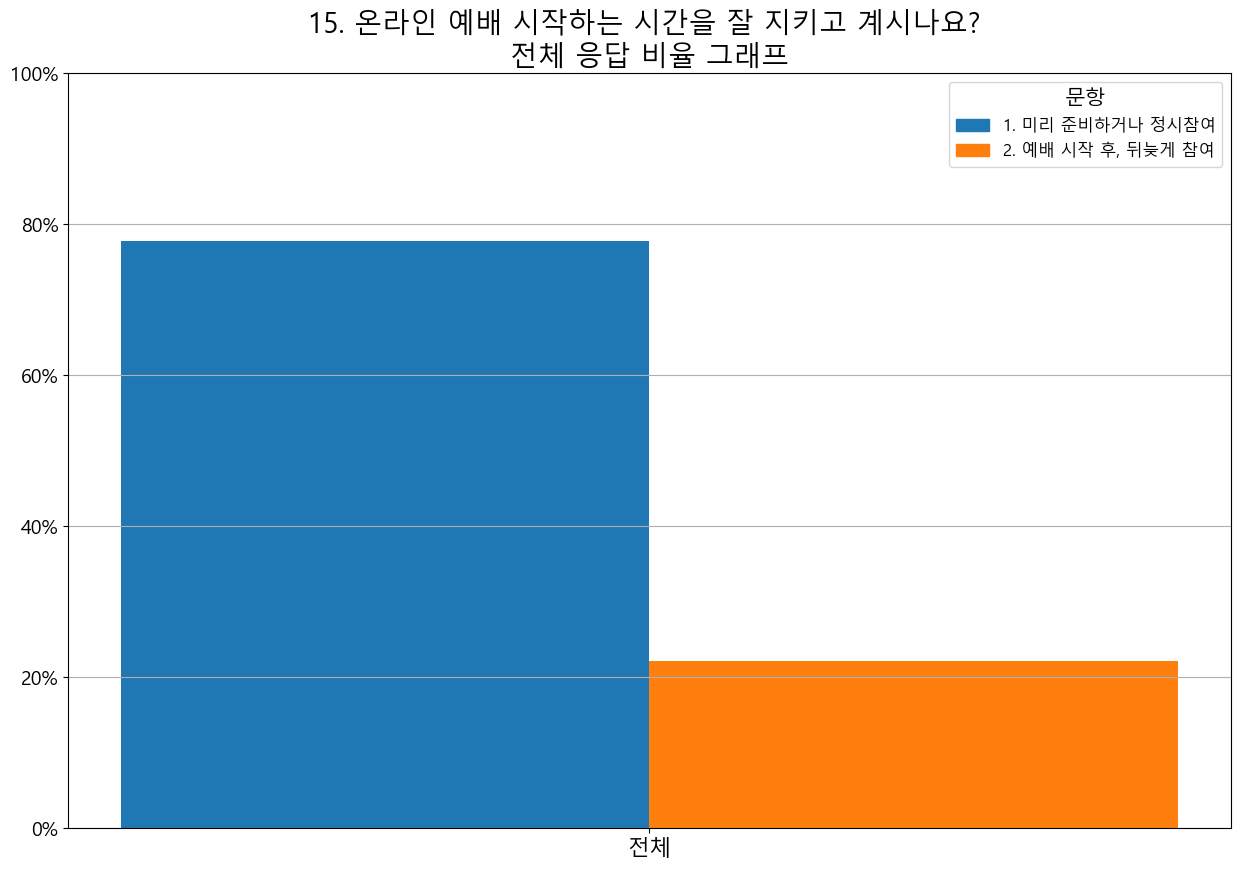

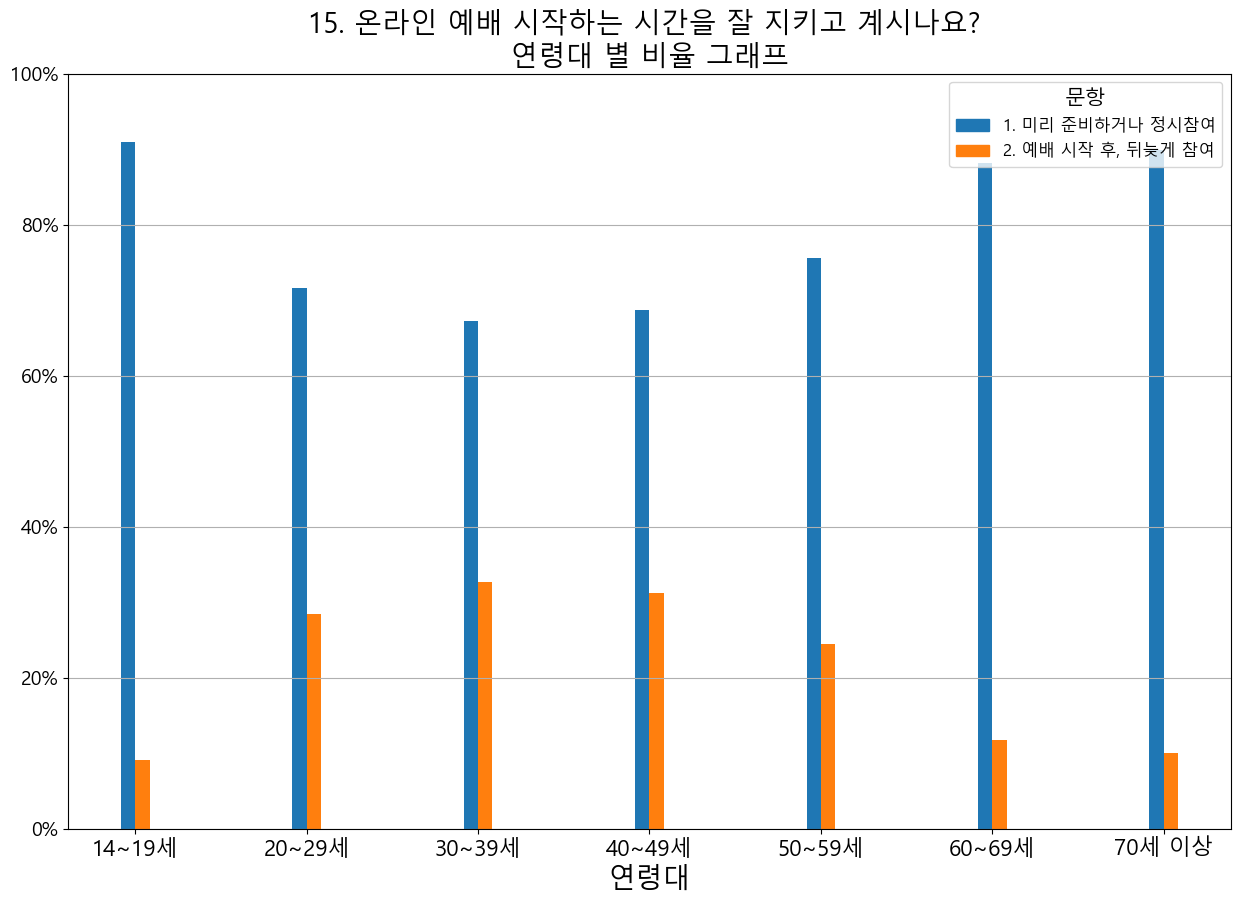

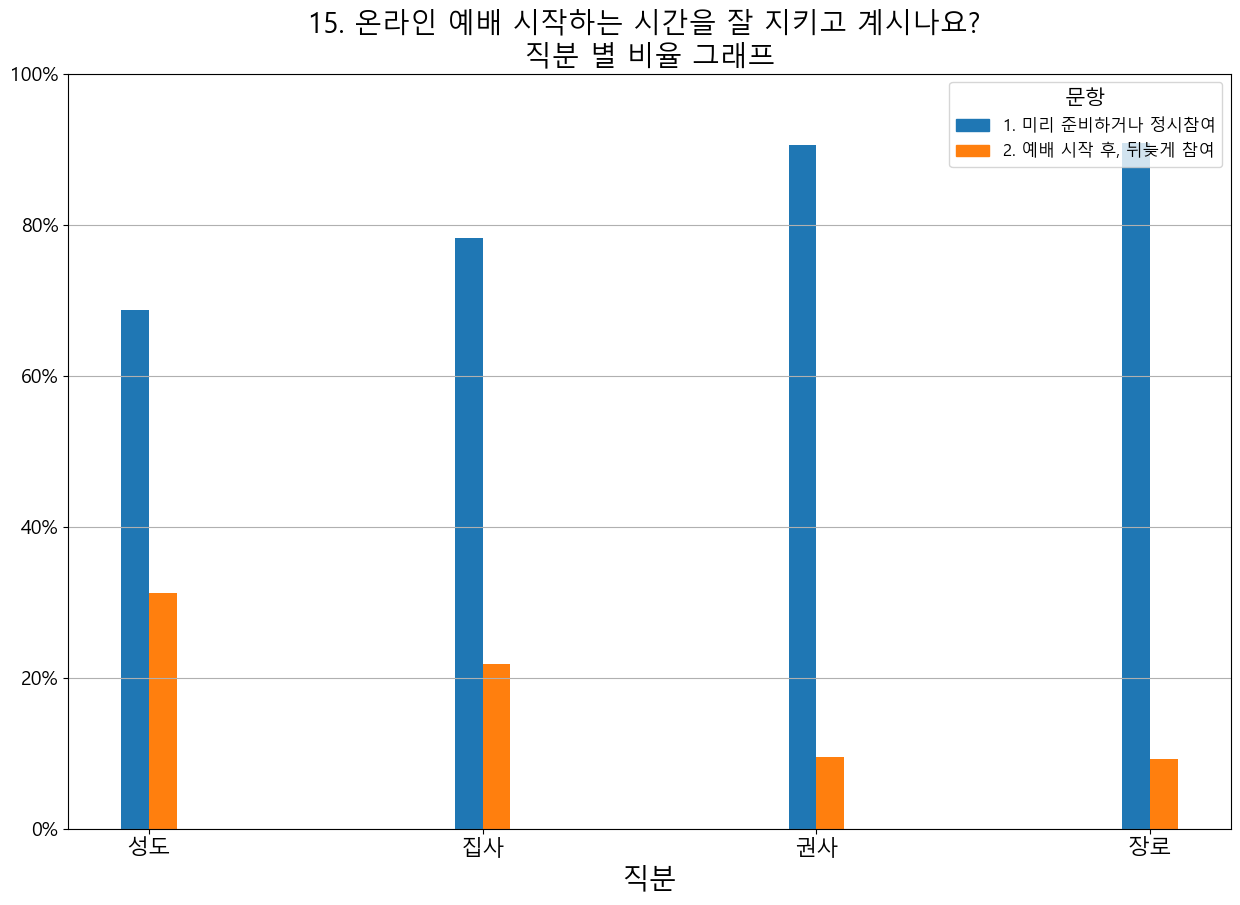

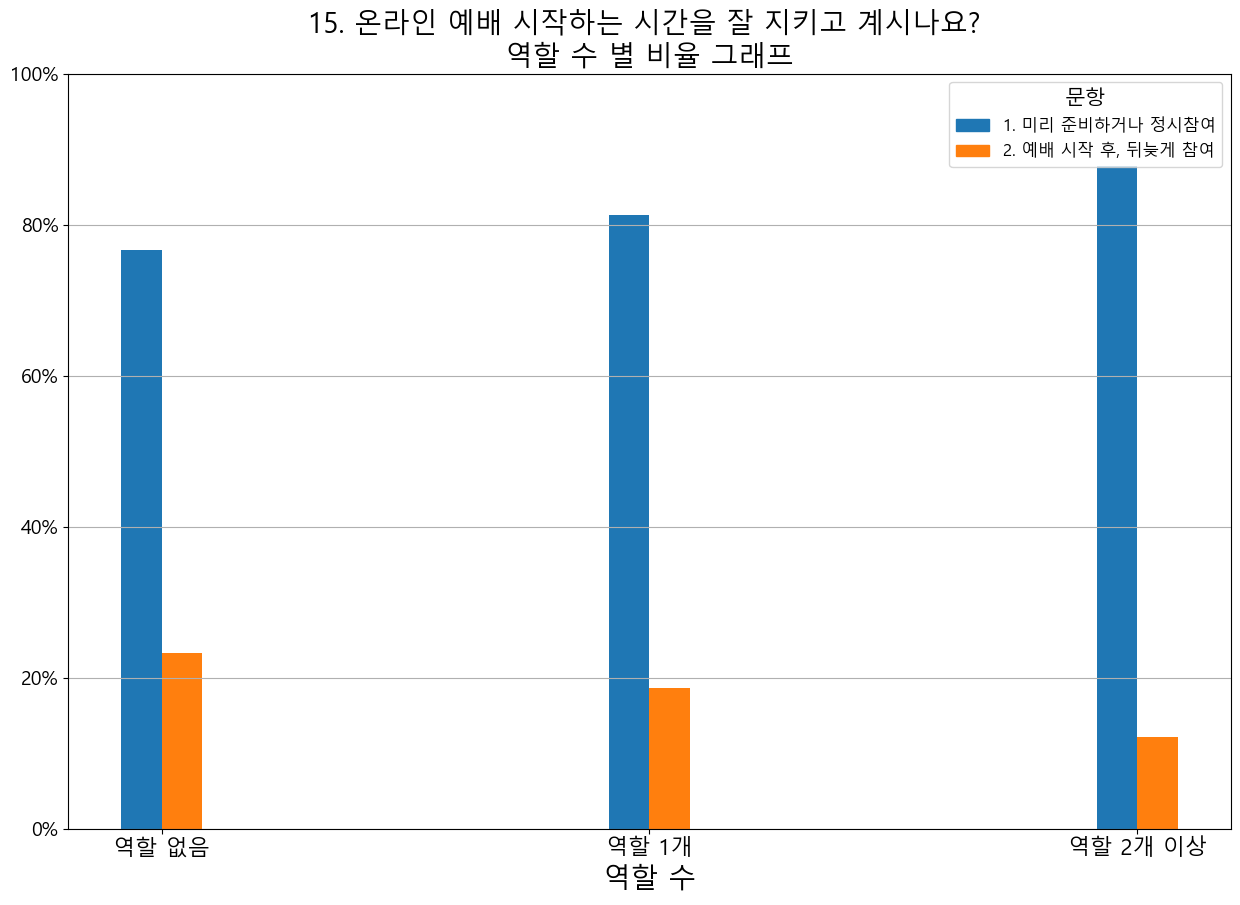

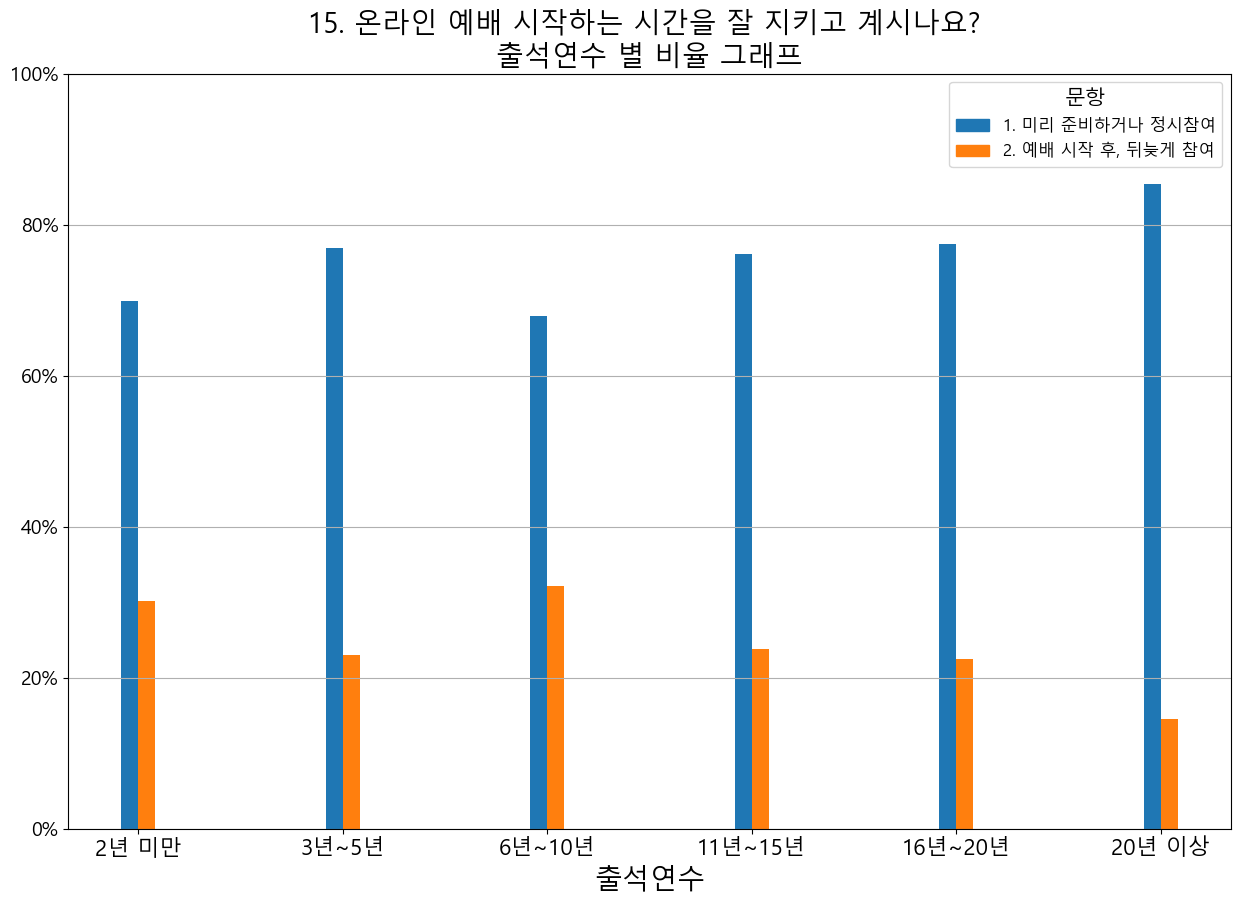

In [ ]:
all_color_list = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
color_list = all_color_list[:len(table.columns)]
gap = len(table.columns) / 2 - 0.5

# 그래프 제목 설정
for question in data.columns[:-1]:
    if Q == int(re.findall('\d+', question)[0]):
        title = question
    
# 범례(legend) 설정
ax_list = []
for idx in range(len(q_table.columns)):
    ax_list.append(mpatches.Patch(color = color_list[idx], label = f'{q_table.columns[idx]}'))
    
plot_1()
plot_2()
plot_3()
plot_4()
plot_5()

### Q16. 온라인 예배순서를 전체적으로 잘 참여하나요?

#### 데이터 셋 준비

In [ ]:
Q = 16
Q_list.append(Q)
복수응답 = ""

In [ ]:
table_Q16 = pd.DataFrame(index = ['전체',
                                 '14~19세', '20~29세', '30~39세', '40~49세', '50~59세', '60~69세', '70세 이상',
                                 '성도', '집사', '권사', '장로',
                                 '역할 없음', '역할 1개', '역할 2개 이상',
                                 '2년 미만', '3년~5년', '6년~10년', '11년~15년', '16년~20년', '20년 이상'],
                        columns = ['1. 처음부터 끝까지 참여',
                                   '2. 설교, 기도 등 일부만 참여'])

In [ ]:
df_Q16 = df.copy()
df_Q16['Q16_1'] = 0
df_Q16['Q16_2'] = 0

In [ ]:
nan_index = []

for idx, Q16 in enumerate(data['16. 온라인 예배순서 전체적으로 잘 참여하나요?']):
    if type(Q16) == float:
        nan_index.append(idx)
    elif type(Q16) == str:
        if '처음부터' in Q16:
            df_Q16['Q16_1'].iloc[idx] = 1
        if '일부만 참여' in Q16:
            df_Q16['Q16_2'].iloc[idx] = 1
        if df_Q16.iloc[idx, col_num:].sum() == 0:
            nan_index.append(idx)
        
df_Q16.drop(df_Q16.index[nan_index], axis = 0, inplace = True)

#### 빈도수 & 비율 테이블

In [ ]:
table, q_table, f_table = make_table(Q)

#### 시각화

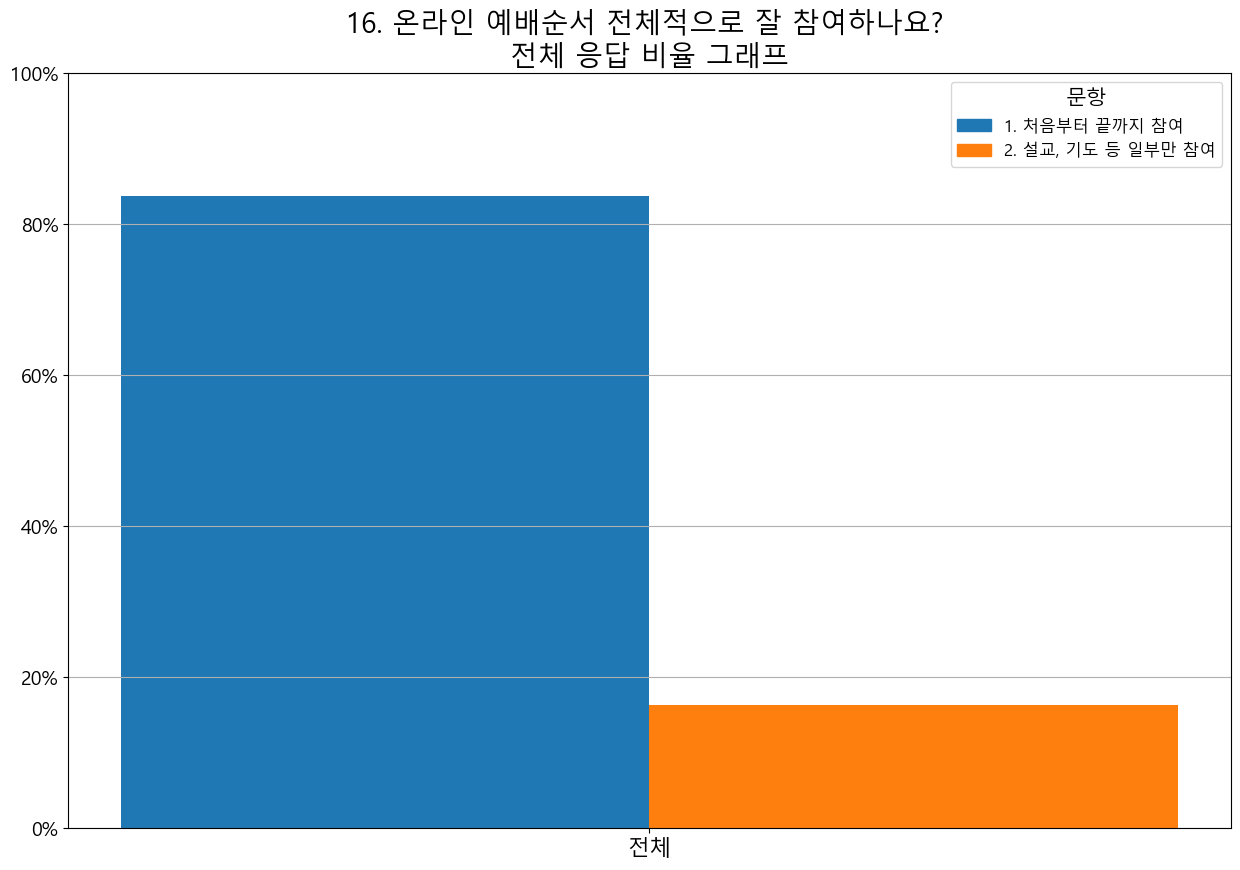

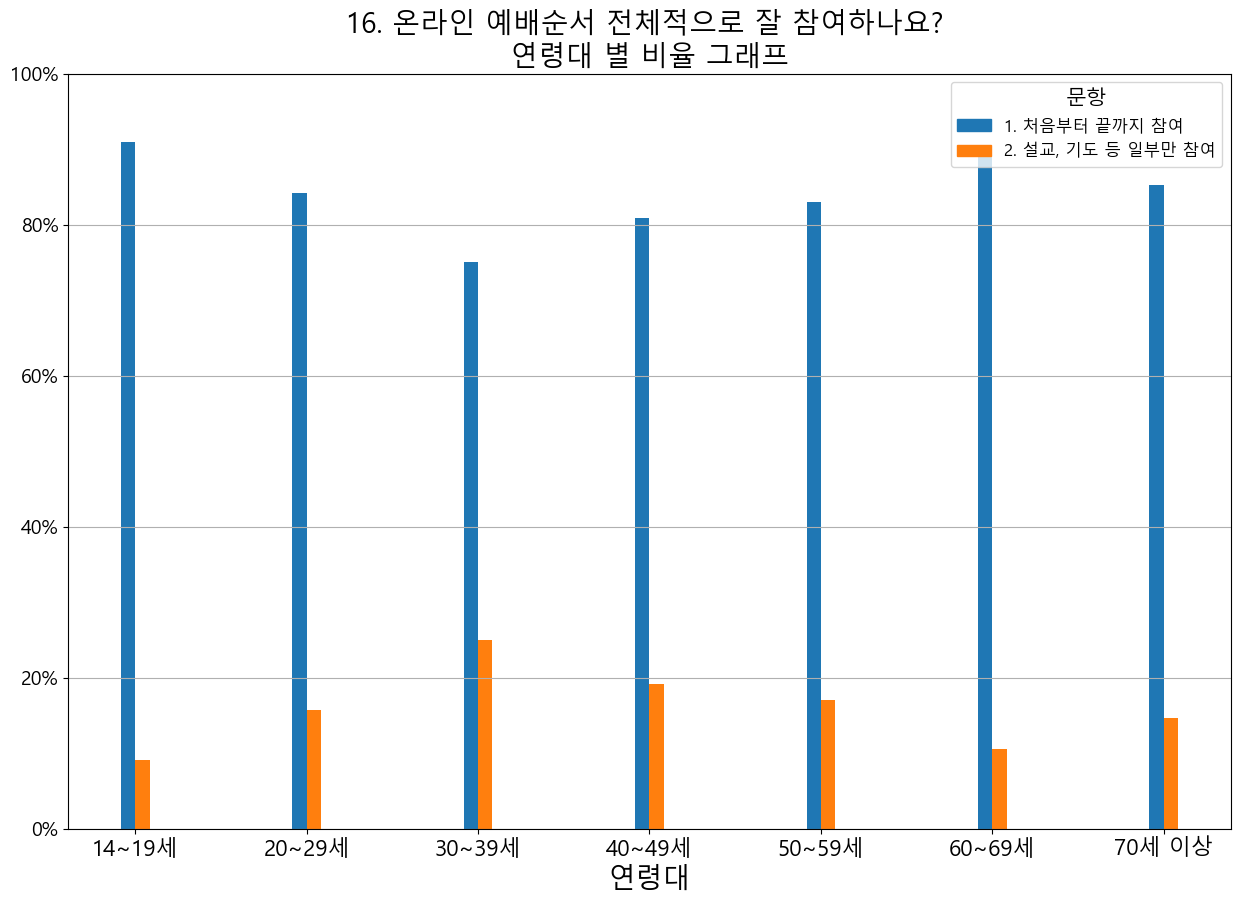

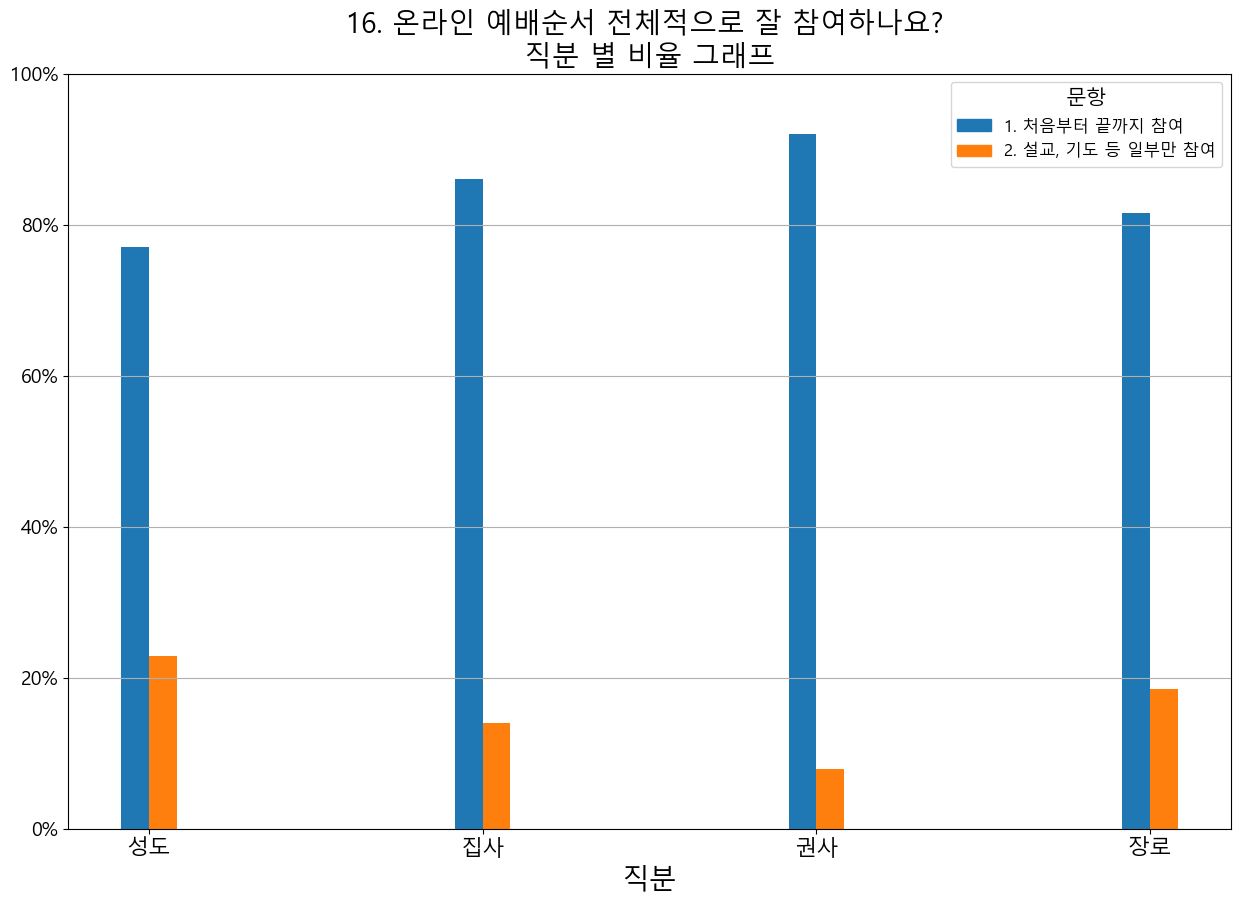

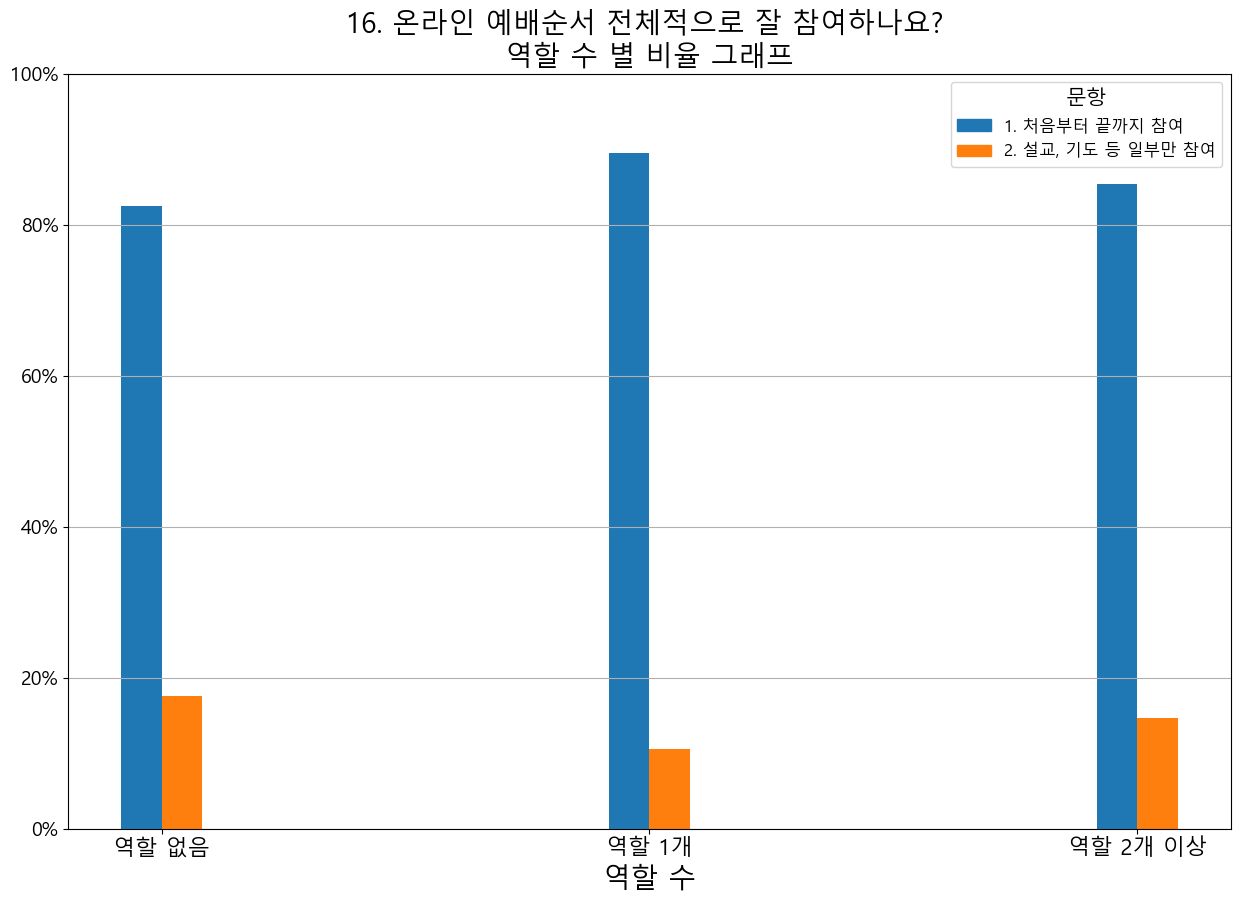

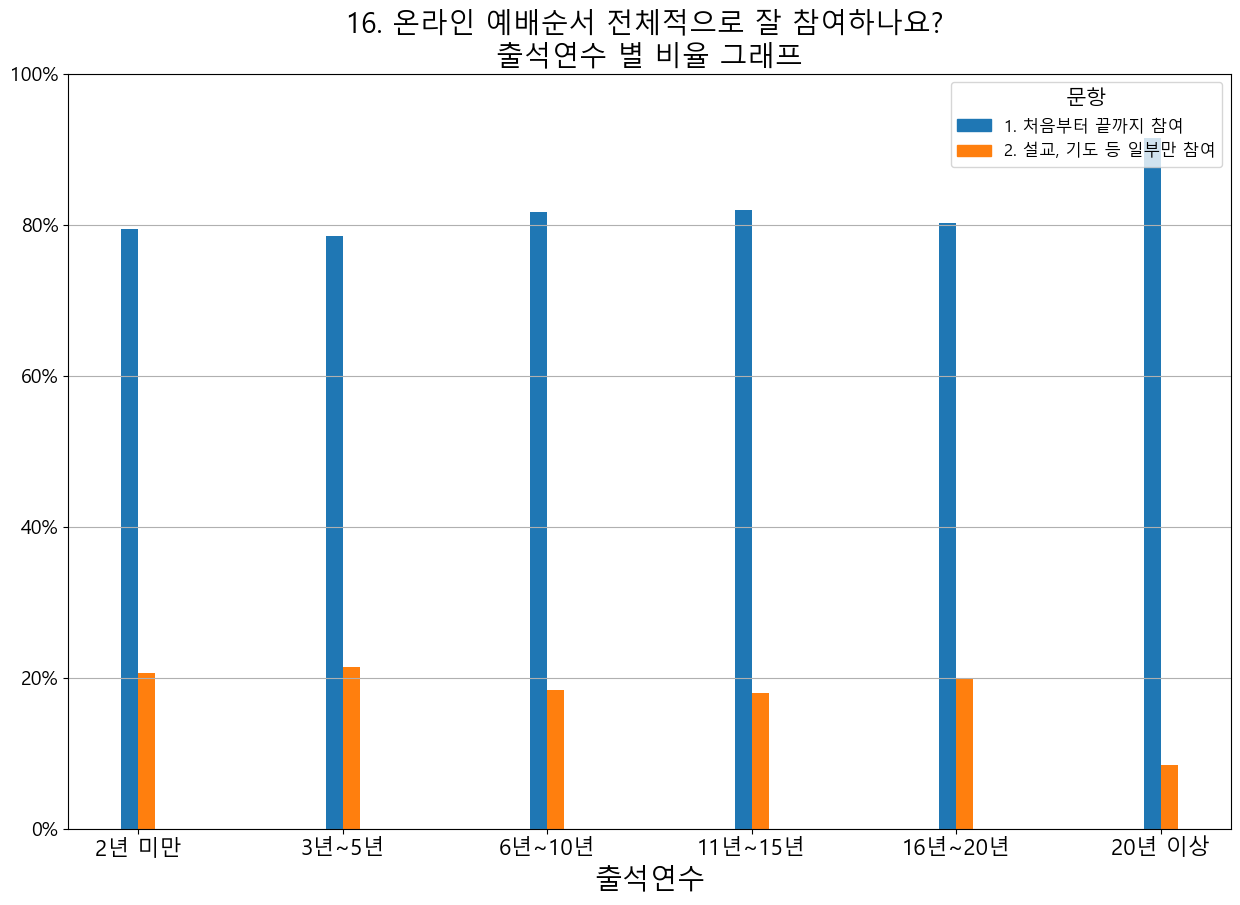

In [ ]:
all_color_list = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
color_list = all_color_list[:len(table.columns)]
gap = len(table.columns) / 2 - 0.5

# 그래프 제목 설정
for question in data.columns[:-1]:
    if Q == int(re.findall('\d+', question)[0]):
        title = question
    
# 범례(legend) 설정
ax_list = []
for idx in range(len(q_table.columns)):
    ax_list.append(mpatches.Patch(color = color_list[idx], label = f'{q_table.columns[idx]}'))
    
plot_1()
plot_2()
plot_3()
plot_4()
plot_5()

### Q17. 온라인 예배에 적극적으로 반응하며 참여하나요?

#### 데이터 셋 준비

In [ ]:
Q = 17
Q_list.append(Q)
복수응답 = ""

In [ ]:
table_Q17 = pd.DataFrame(index = ['전체',
                                 '14~19세', '20~29세', '30~39세', '40~49세', '50~59세', '60~69세', '70세 이상',
                                 '성도', '집사', '권사', '장로',
                                 '역할 없음', '역할 1개', '역할 2개 이상',
                                 '2년 미만', '3년~5년', '6년~10년', '11년~15년', '16년~20년', '20년 이상'],
                        columns = ['1. 직접 찬양과 기도하며 참여',
                                   '2. 눈으로 시청만 하며 참여'])

In [ ]:
df_Q17 = df.copy()
df_Q17['Q17_1'] = 0
df_Q17['Q17_2'] = 0

In [ ]:
nan_index = []

for idx, Q17 in enumerate(data['17. 온라인 예배 적극적으로 반응하며 참여하나요?']):
    if type(Q17) == float:
        nan_index.append(idx)
    elif type(Q17) == str:
        if '직접 찬양' in Q17:
            df_Q17['Q17_1'].iloc[idx] = 1
        if '시청' in Q17:
            df_Q17['Q17_2'].iloc[idx] = 1
        if df_Q17.iloc[idx, col_num:].sum() == 0:
            nan_index.append(idx)
        
df_Q17.drop(df_Q17.index[nan_index], axis = 0, inplace = True)

#### 빈도수 & 비율 테이블

In [ ]:
table, q_table, f_table = make_table(Q)

#### 시각화

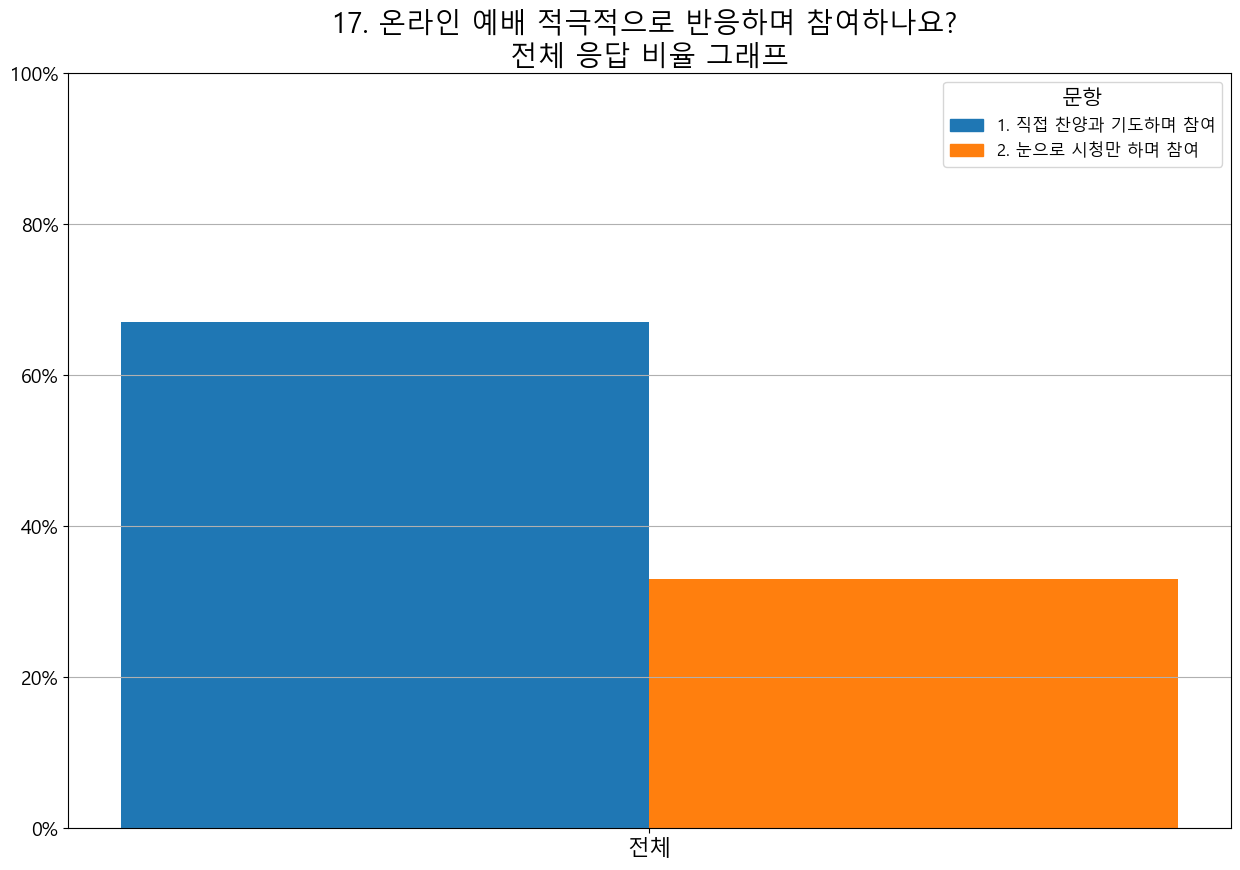

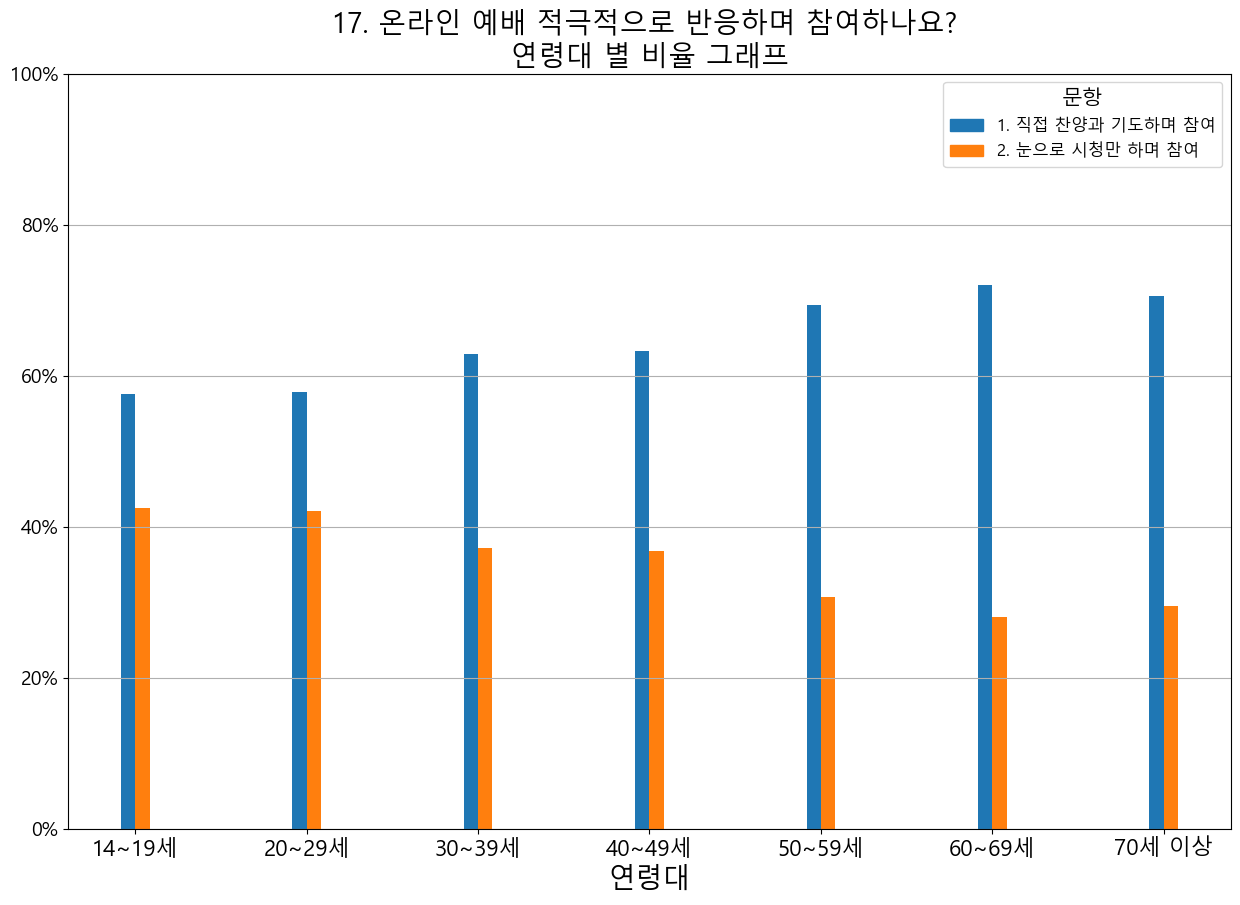

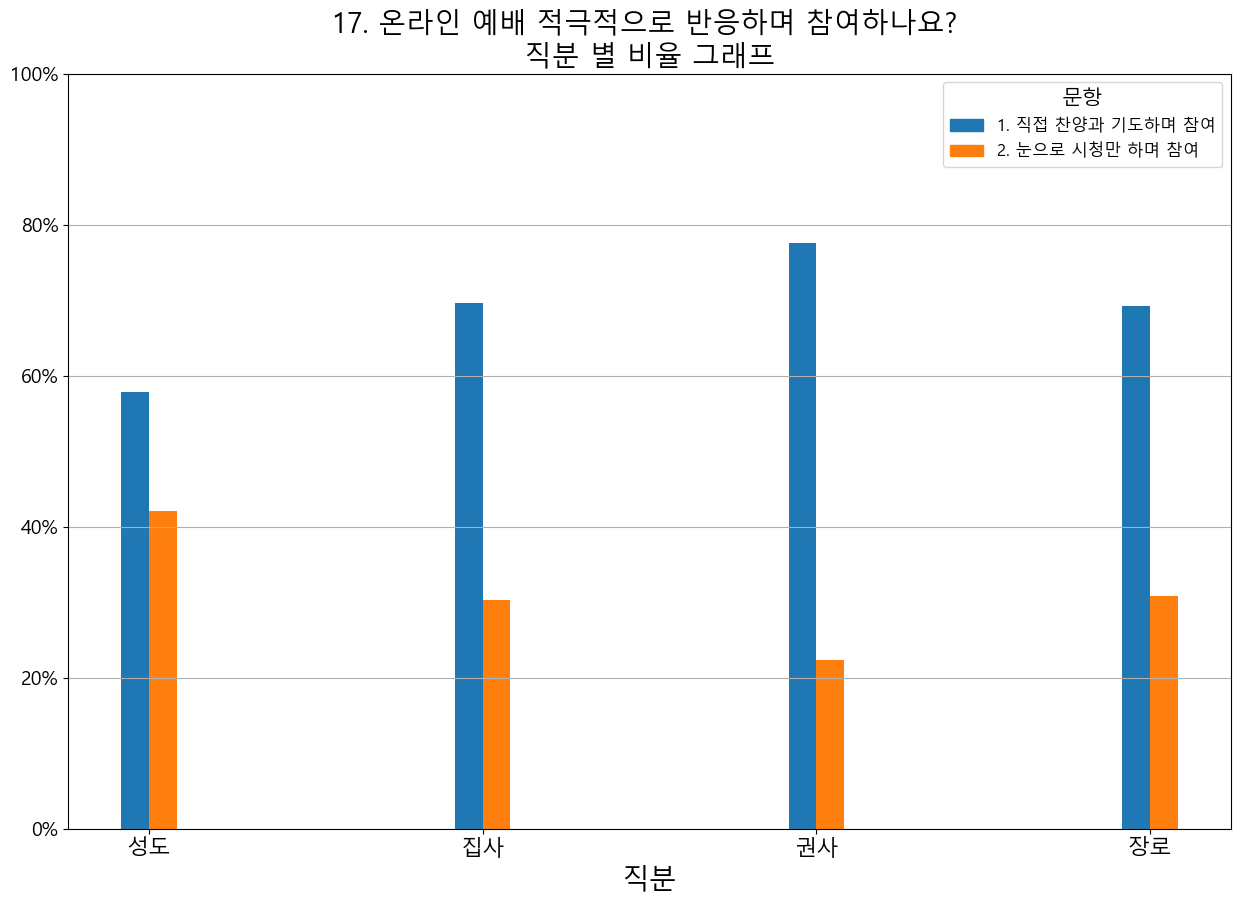

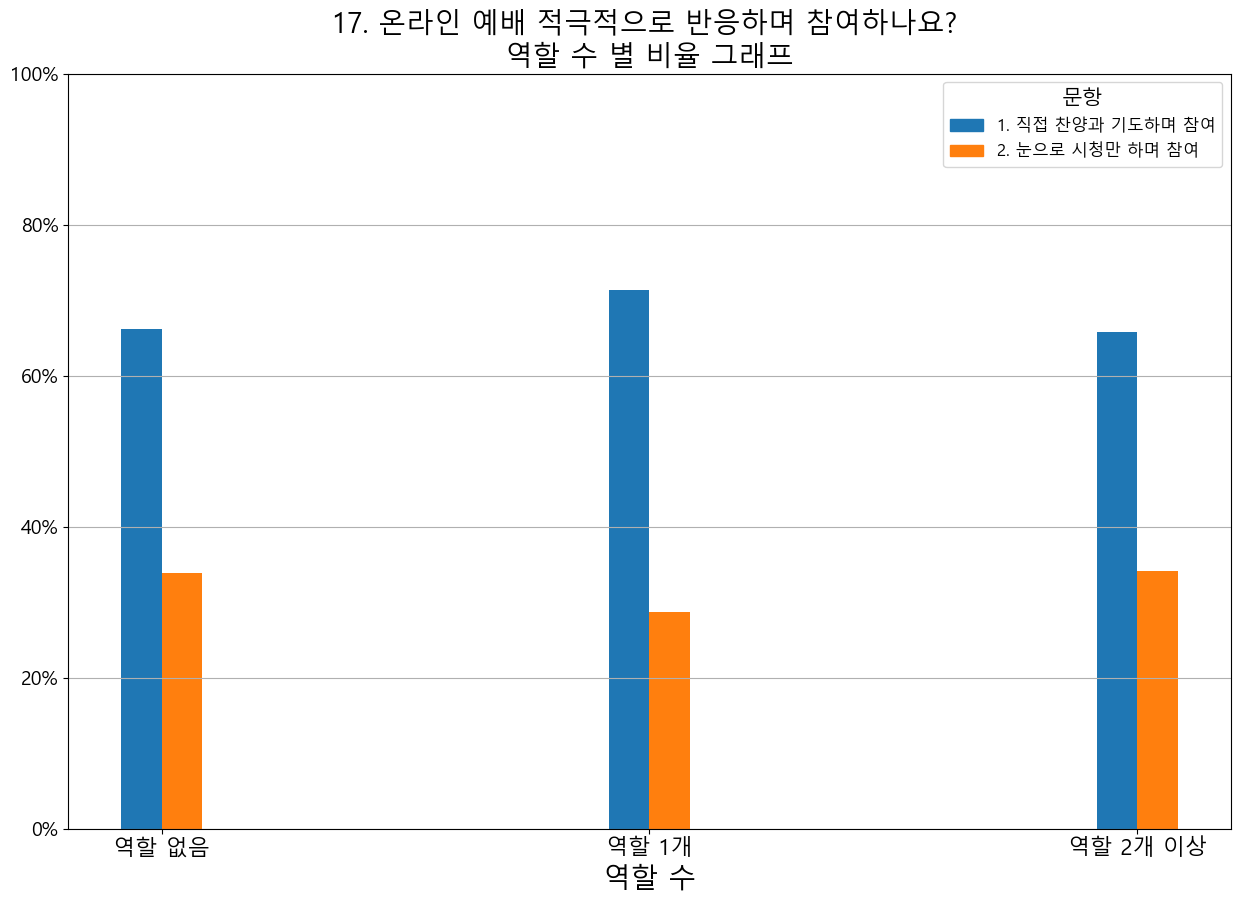

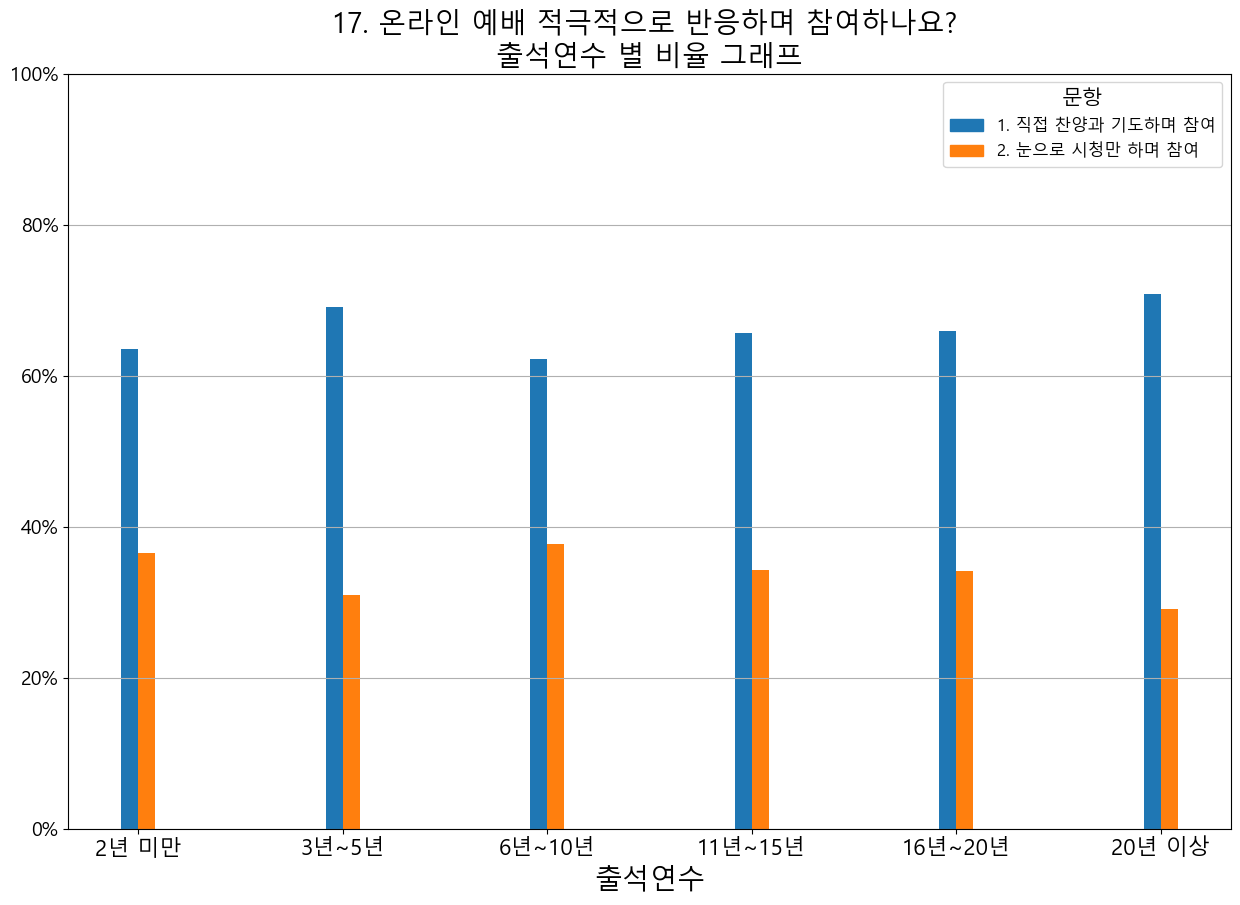

In [ ]:
all_color_list = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
color_list = all_color_list[:len(table.columns)]
gap = len(table.columns) / 2 - 0.5

# 그래프 제목 설정
for question in data.columns[:-1]:
    if Q == int(re.findall('\d+', question)[0]):
        title = question
    
# 범례(legend) 설정
ax_list = []
for idx in range(len(q_table.columns)):
    ax_list.append(mpatches.Patch(color = color_list[idx], label = f'{q_table.columns[idx]}'))
    
plot_1()
plot_2()
plot_3()
plot_4()
plot_5()

### Q18. 온라인 예배에 잘 집중하며 참여하나요?

#### 데이터 셋 준비

In [ ]:
Q = 18
Q_list.append(Q)
복수응답 = ""

In [ ]:
table_Q18 = pd.DataFrame(index = ['전체',
                                 '14~19세', '20~29세', '30~39세', '40~49세', '50~59세', '60~69세', '70세 이상',
                                 '성도', '집사', '권사', '장로',
                                 '역할 없음', '역할 1개', '역할 2개 이상',
                                 '2년 미만', '3년~5년', '6년~10년', '11년~15년', '16년~20년', '20년 이상'],
                        columns = ['1. 예배에 잘 집중',
                                   '2. 다른 일 하며 참여'])

In [ ]:
df_Q18 = df.copy()
df_Q18['Q18_1'] = 0
df_Q18['Q18_2'] = 0

In [ ]:
nan_index = []

for idx, Q18 in enumerate(data['18. 온라인 예배 잘 집중하며 참여하나요?']):
    if type(Q18) == float:
        nan_index.append(idx)
    elif type(Q18) == str:
        if '집중' in Q18:
            df_Q18['Q18_1'].iloc[idx] = 1
        if '다른 일' in Q18:
            df_Q18['Q18_2'].iloc[idx] = 1
        if df_Q18.iloc[idx, col_num:].sum() == 0:
            nan_index.append(idx)
        
df_Q18.drop(df_Q18.index[nan_index], axis = 0, inplace = True)

#### 빈도수 & 비율 테이블

In [ ]:
table, q_table, f_table = make_table(Q)

#### 시각화

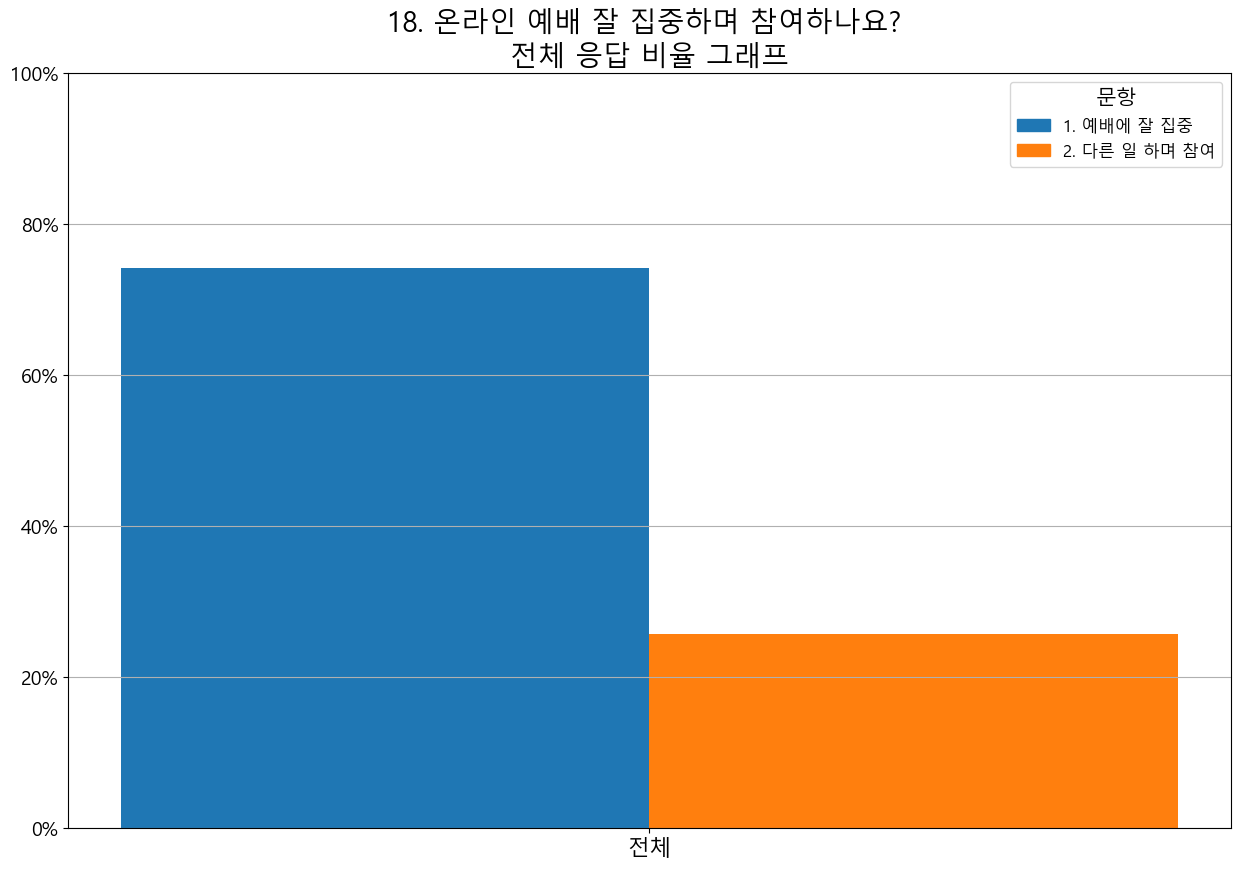

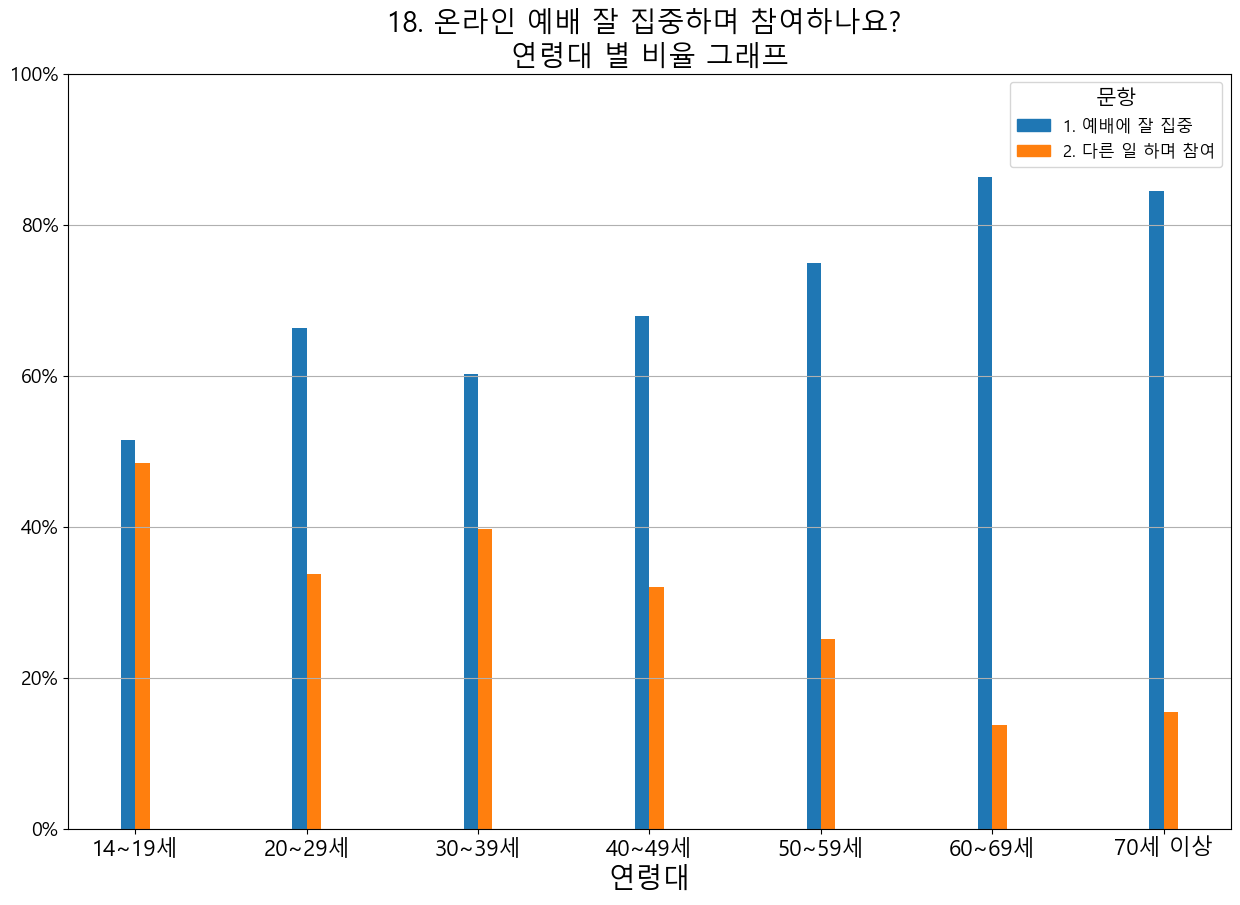

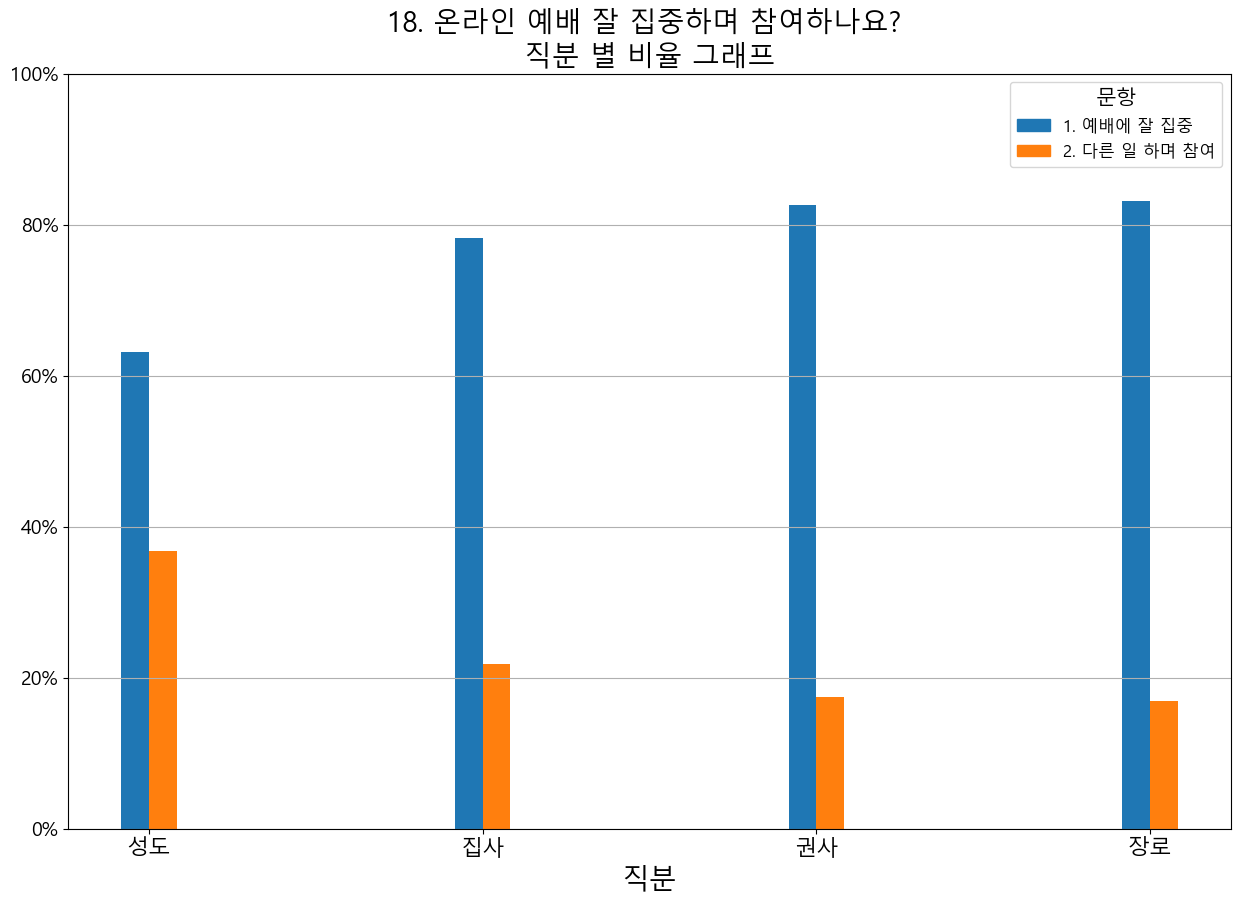

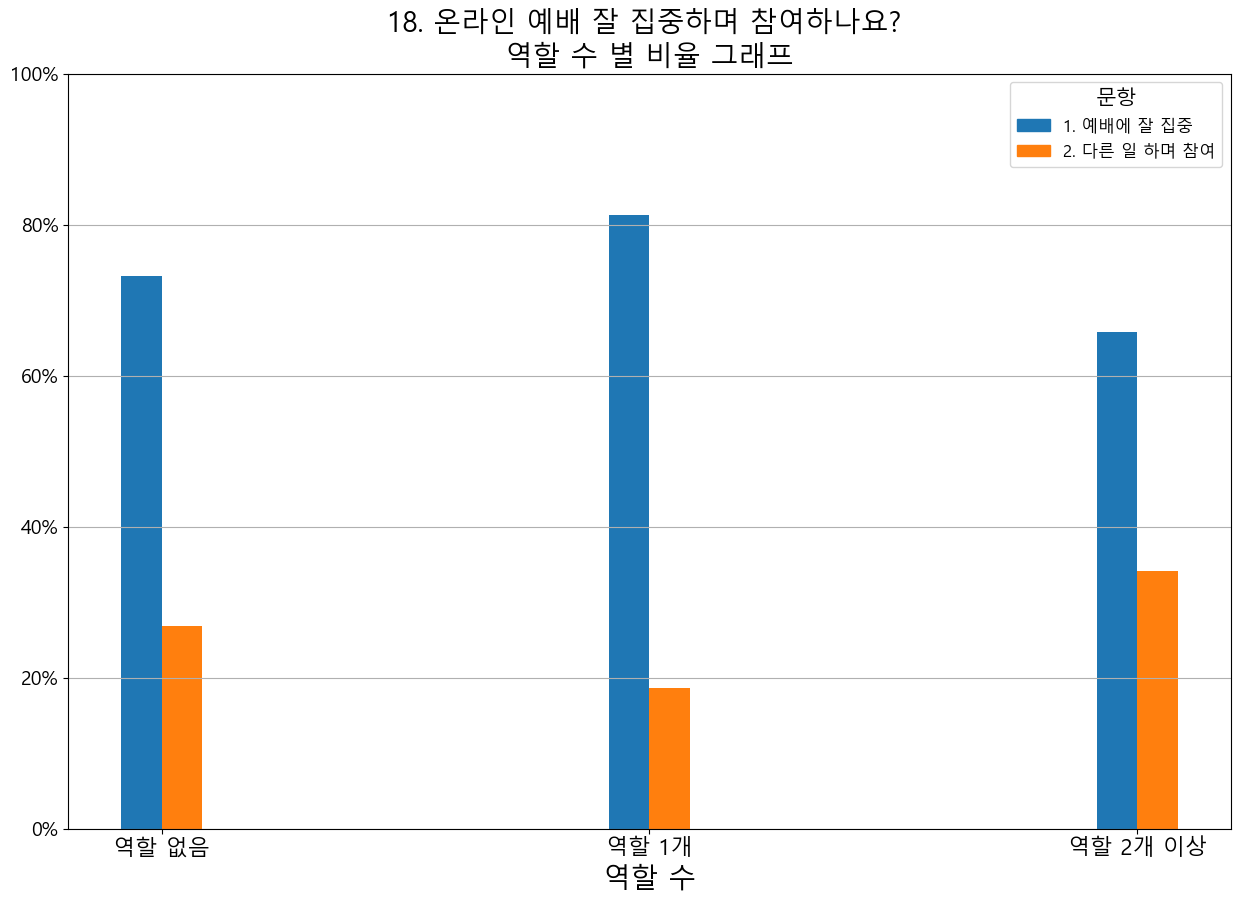

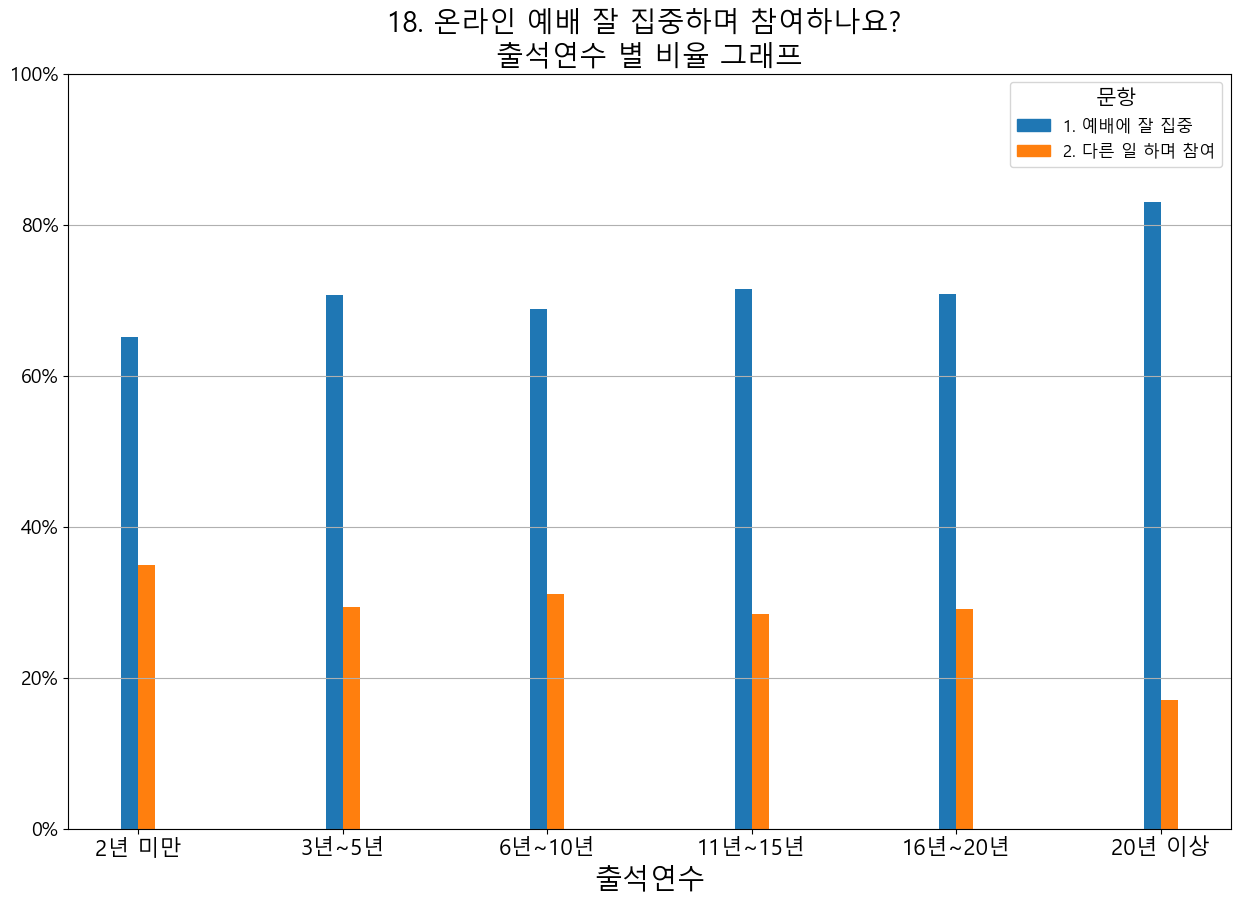

In [ ]:
all_color_list = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
color_list = all_color_list[:len(table.columns)]
gap = len(table.columns) / 2 - 0.5

# 그래프 제목 설정
for question in data.columns[:-1]:
    if Q == int(re.findall('\d+', question)[0]):
        title = question
    
# 범례(legend) 설정
ax_list = []
for idx in range(len(q_table.columns)):
    ax_list.append(mpatches.Patch(color = color_list[idx], label = f'{q_table.columns[idx]}'))
    
plot_1()
plot_2()
plot_3()
plot_4()
plot_5()

### Q19. 코로나 이전과 이후 나의 예배생활을 비교한다면?

#### 데이터 셋 준비

In [ ]:
Q = 19
Q_list.append(Q)
복수응답 = ""

In [ ]:
table_Q19 = pd.DataFrame(index = ['전체',
                                 '14~19세', '20~29세', '30~39세', '40~49세', '50~59세', '60~69세', '70세 이상',
                                 '성도', '집사', '권사', '장로',
                                 '역할 없음', '역할 1개', '역할 2개 이상',
                                 '2년 미만', '3년~5년', '6년~10년', '11년~15년', '16년~20년', '20년 이상'],
                        columns = ['1. 이전보다 성장',
                                   '2. 비슷',
                                   '3. 이전보다 소홀'])

In [ ]:
df_Q19 = df.copy()
df_Q19['Q19_1'] = 0
df_Q19['Q19_2'] = 0
df_Q19['Q19_3'] = 0

In [ ]:
nan_index = []

for idx, Q19 in enumerate(data['19. 코로나 이전과 이후 나의 예배생활을 비교한다면?']):
    if type(Q19) == float:
        nan_index.append(idx)
    elif type(Q19) == str:
        if '이전보다 성장' in Q19:
            df_Q19['Q19_1'].iloc[idx] = 1
        if '비슷' in Q19:
            df_Q19['Q19_2'].iloc[idx] = 1
        if '이전보다 소홀' in Q19:
            df_Q19['Q19_3'].iloc[idx] = 1
        if df_Q19.iloc[idx, col_num:].sum() == 0:
            nan_index.append(idx)
        
df_Q19.drop(df_Q19.index[nan_index], axis = 0, inplace = True)

#### 빈도수 & 비율 테이블

In [ ]:
table, q_table, f_table = make_table(Q)

#### 시각화

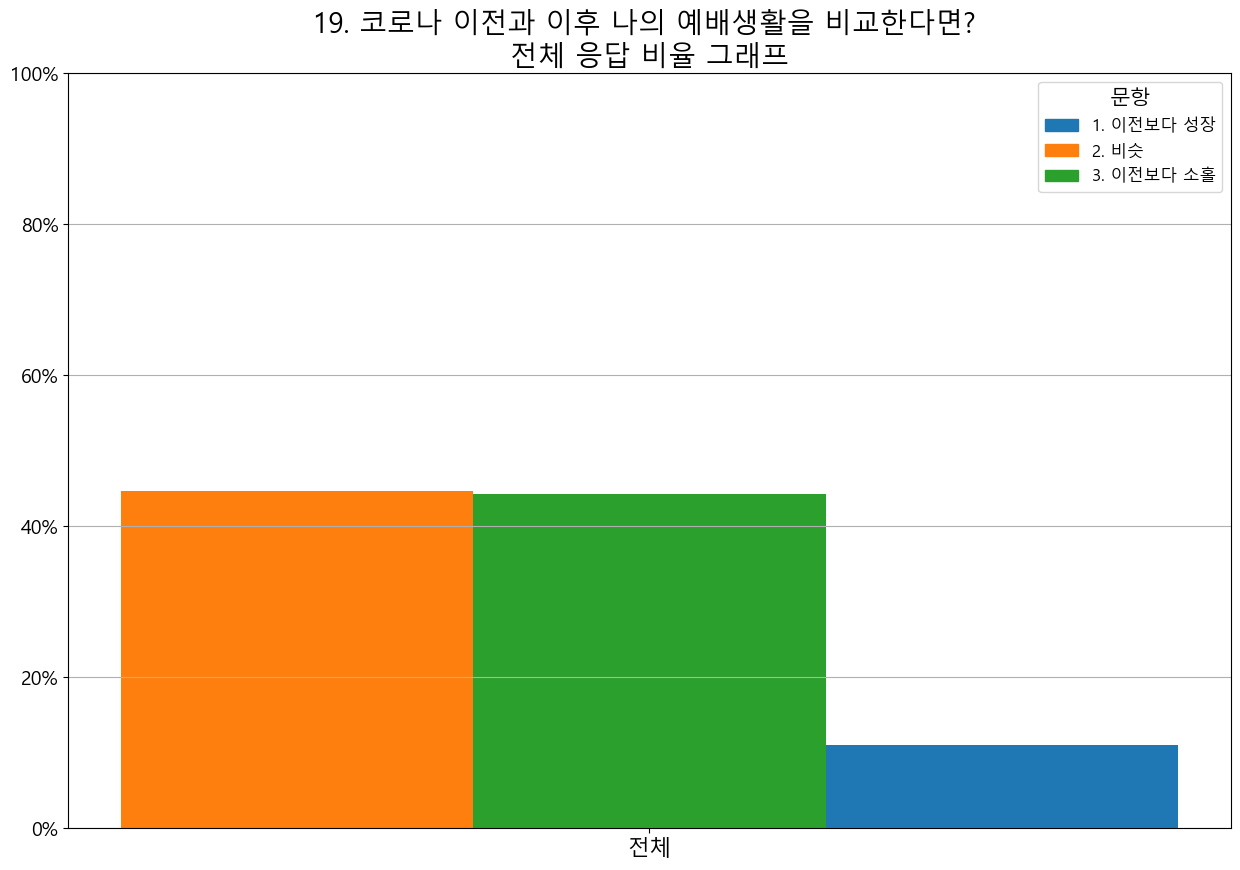

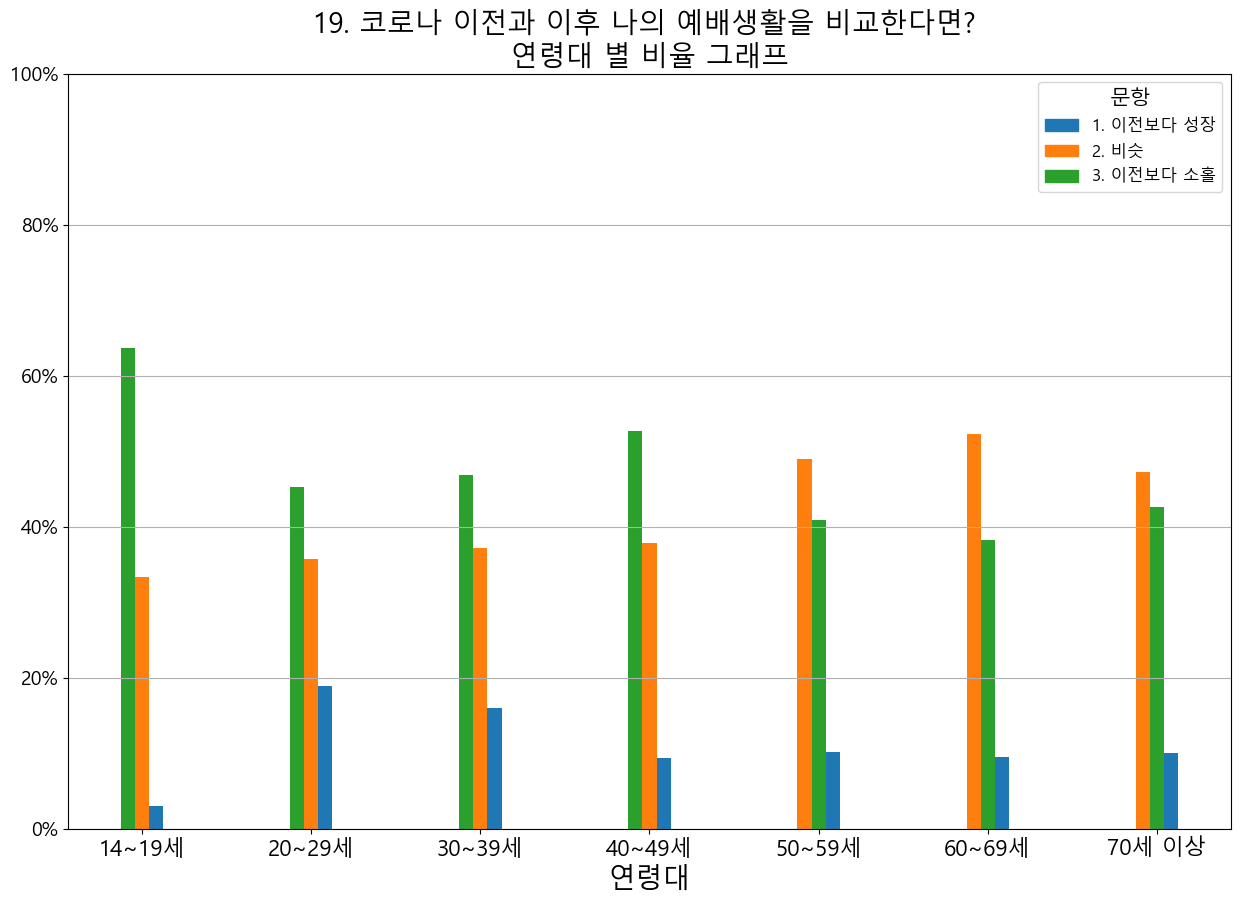

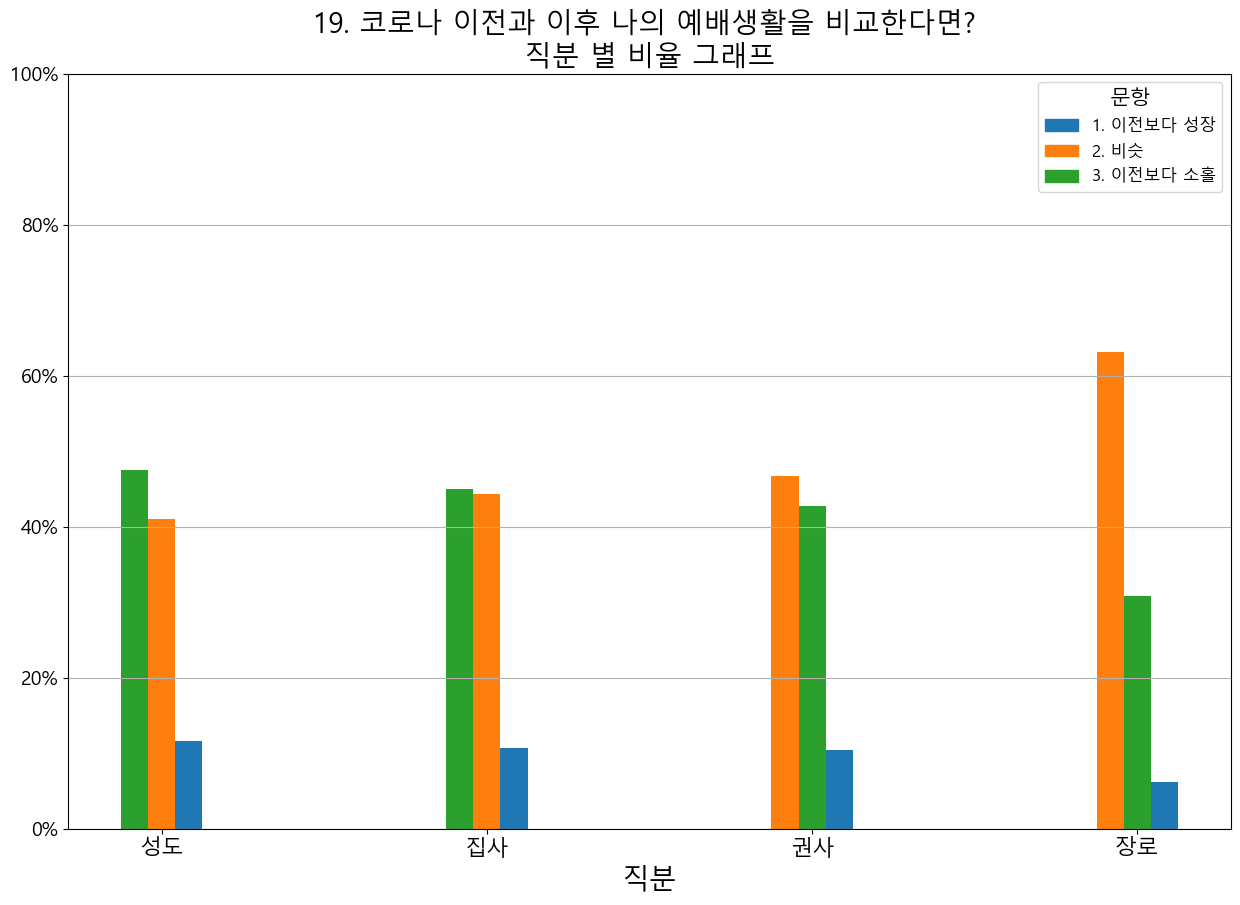

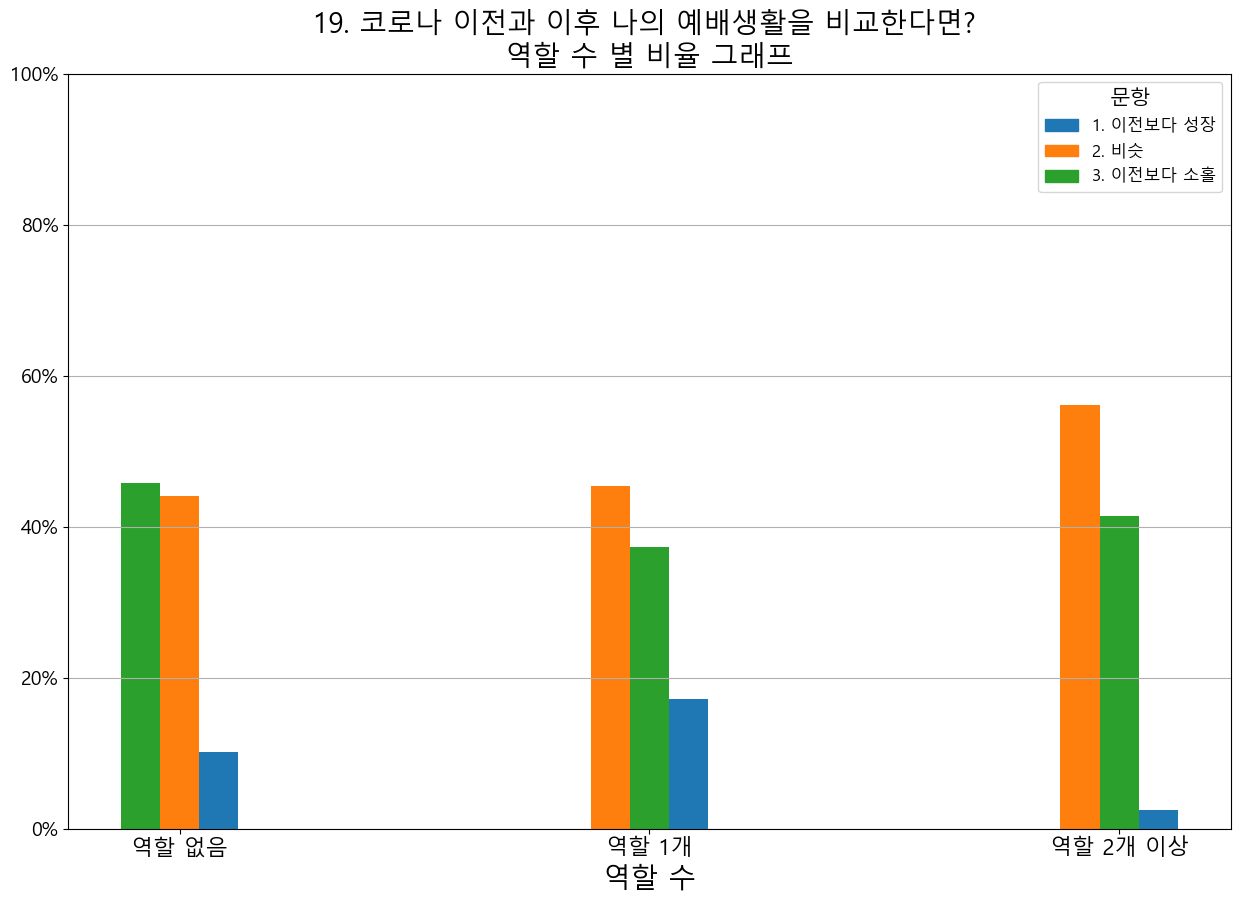

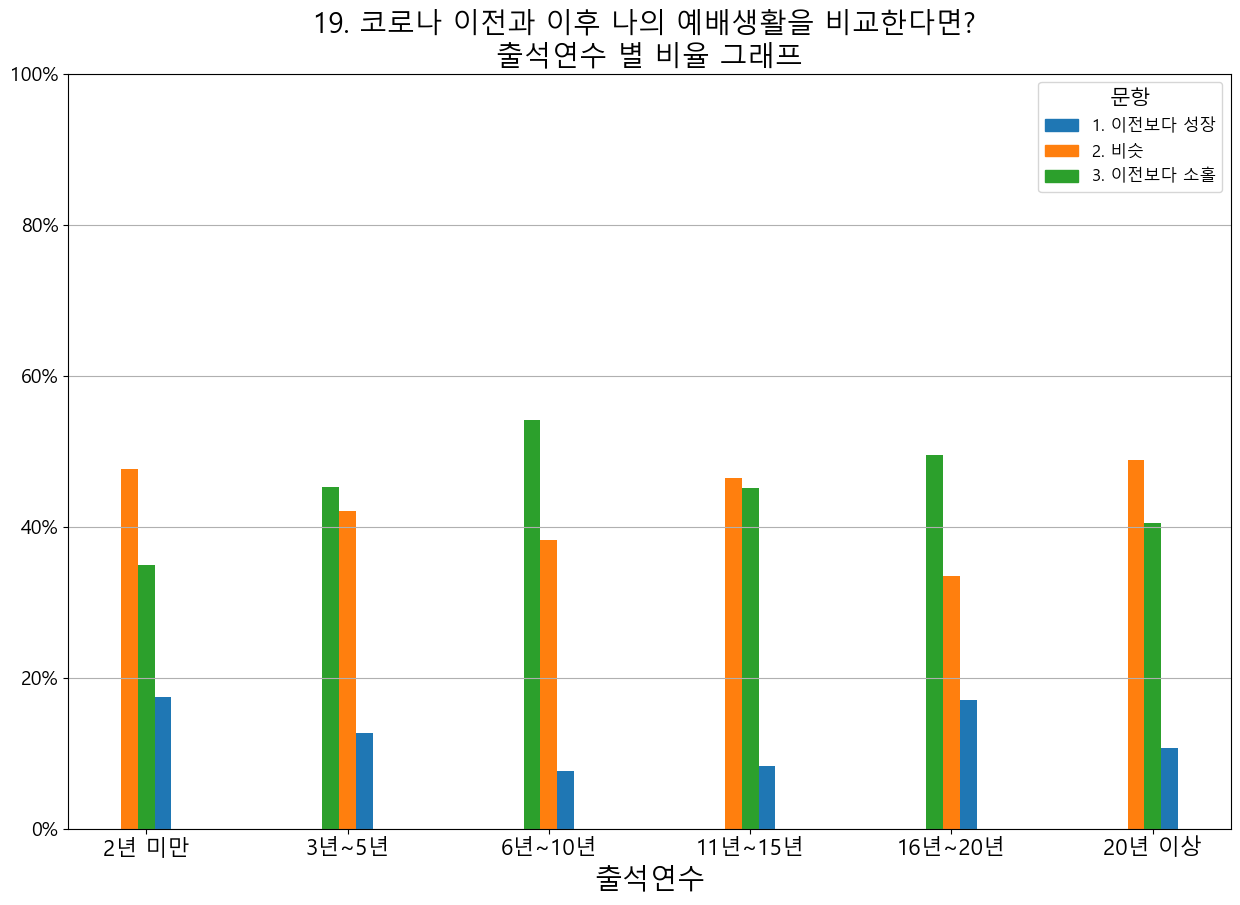

In [ ]:
all_color_list = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
color_list = all_color_list[:len(table.columns)]
gap = len(table.columns) / 2 - 0.5

# 그래프 제목 설정
for question in data.columns[:-1]:
    if Q == int(re.findall('\d+', question)[0]):
        title = question
    
# 범례(legend) 설정
ax_list = []
for idx in range(len(q_table.columns)):
    ax_list.append(mpatches.Patch(color = color_list[idx], label = f'{q_table.columns[idx]}'))
    
plot_1()
plot_2()
plot_3()
plot_4()
plot_5()

### Q20.우리교회 예배 만족도는?

#### 데이터 셋 준비

In [ ]:
Q = 20
Q_list.append(Q)
복수응답 = ""

In [ ]:
table_Q20 = pd.DataFrame(index = ['전체',
                                 '14~19세', '20~29세', '30~39세', '40~49세', '50~59세', '60~69세', '70세 이상',
                                 '성도', '집사', '권사', '장로',
                                 '역할 없음', '역할 1개', '역할 2개 이상',
                                 '2년 미만', '3년~5년', '6년~10년', '11년~15년', '16년~20년', '20년 이상'],
                        columns = ['교회 예배 만족도 평균'])

In [ ]:
df_Q20 = df.copy()
df_Q20['level'] = data['20. 우리교회 예배 만족도는?'].values

#### 빈도수 테이블

In [ ]:
table = globals()[f'table_Q{Q}']
df_Q = globals()[f'df_Q{Q}']

In [ ]:
# 전체 응답
table.loc['전체'] = np.round(df_Q.mean(axis = 0)[col_num:].values, 2)

# 연령대 별 응답
table.loc['14~19세'] = np.round(df_Q.groupby(by = 'age')['level'].mean().values[0], 2)
table.loc['20~29세'] = np.round(df_Q.groupby(by = 'age')['level'].mean().values[1], 2)
table.loc['30~39세'] = np.round(df_Q.groupby(by = 'age')['level'].mean().values[2], 2)
table.loc['40~49세'] = np.round(df_Q.groupby(by = 'age')['level'].mean().values[3], 2)
table.loc['50~59세'] = np.round(df_Q.groupby(by = 'age')['level'].mean().values[4], 2)
table.loc['60~69세'] = np.round(df_Q.groupby(by = 'age')['level'].mean().values[5], 2)
table.loc['70세 이상'] = np.round(df_Q.groupby(by = 'age')['level'].mean().values[6], 2)

# 직분 별 응답
table.loc['성도'] = np.round(df_Q.groupby(by = 'duty')['level'].mean().values[0], 2)
table.loc['집사'] = np.round(df_Q.groupby(by = 'duty')['level'].mean().values[1], 2)
table.loc['권사'] = np.round(df_Q.groupby(by = 'duty')['level'].mean().values[2], 2)
table.loc['장로'] = np.round(df_Q.groupby(by = 'duty')['level'].mean().values[3], 2)

# 역할 수 별 응답
table.loc['역할 없음'] = np.round(df_Q.groupby(by = 'role')['level'].mean().values[0], 2)
table.loc['역할 1개'] = np.round(df_Q.groupby(by = 'role')['level'].mean().values[1], 2)
table.loc['역할 2개 이상'] = np.round(df_Q.groupby(by = 'role')['level'].mean().values[2], 2)

# 출석연수 별 응답
table.loc['2년 미만'] = np.round(df_Q.groupby(by = 'year')['level'].mean().values[0], 2)
table.loc['3년~5년'] = np.round(df_Q.groupby(by = 'year')['level'].mean().values[1], 2)
table.loc['6년~10년'] = np.round(df_Q.groupby(by = 'year')['level'].mean().values[2], 2)
table.loc['11년~15년'] = np.round(df_Q.groupby(by = 'year')['level'].mean().values[3], 2)
table.loc['16년~20년'] = np.round(df_Q.groupby(by = 'year')['level'].mean().values[4], 2)
table.loc['20년 이상'] = np.round(df_Q.groupby(by = 'year')['level'].mean().values[5], 2)

table['응답자수'] = 0

table['응답자수']['전체'] = len(df_Q)
table['응답자수']['14~19세'] = df_Q.groupby(by = 'age')['age'].count().values[0]
table['응답자수']['20~29세'] = df_Q.groupby(by = 'age')['age'].count().values[1]
table['응답자수']['30~39세'] = df_Q.groupby(by = 'age')['age'].count().values[2]
table['응답자수']['40~49세'] = df_Q.groupby(by = 'age')['age'].count().values[3]
table['응답자수']['50~59세'] = df_Q.groupby(by = 'age')['age'].count().values[4]
table['응답자수']['60~69세'] = df_Q.groupby(by = 'age')['age'].count().values[5]
table['응답자수']['70세 이상'] = df_Q.groupby(by = 'age')['age'].count().values[6]
table['응답자수']['성도'] = df_Q.groupby(by = 'duty')['duty'].count().values[0]
table['응답자수']['집사'] = df_Q.groupby(by = 'duty')['duty'].count().values[1]
table['응답자수']['권사'] = df_Q.groupby(by = 'duty')['duty'].count().values[2]
table['응답자수']['장로'] = df_Q.groupby(by = 'duty')['duty'].count().values[3]
table['응답자수']['역할 없음'] = df_Q.groupby(by = 'role')['role'].count().values[0]
table['응답자수']['역할 1개'] = df_Q.groupby(by = 'role')['role'].count().values[1]
table['응답자수']['역할 2개 이상'] = df_Q.groupby(by = 'role')['role'].count().values[2]
table['응답자수']['2년 미만'] = df_Q.groupby(by = 'year')['year'].count().values[0]
table['응답자수']['3년~5년'] = df_Q.groupby(by = 'year')['year'].count().values[1]
table['응답자수']['6년~10년'] = df_Q.groupby(by = 'year')['year'].count().values[2]
table['응답자수']['11년~15년'] = df_Q.groupby(by = 'year')['year'].count().values[3]
table['응답자수']['16년~20년'] = df_Q.groupby(by = 'year')['year'].count().values[4]
table['응답자수']['20년 이상'] = df_Q.groupby(by = 'year')['year'].count().values[5]

table = table[['응답자수'] + table.columns[:-1].to_list()]
table

table_list.append(table)

#### 시각화

1) 전체 응답

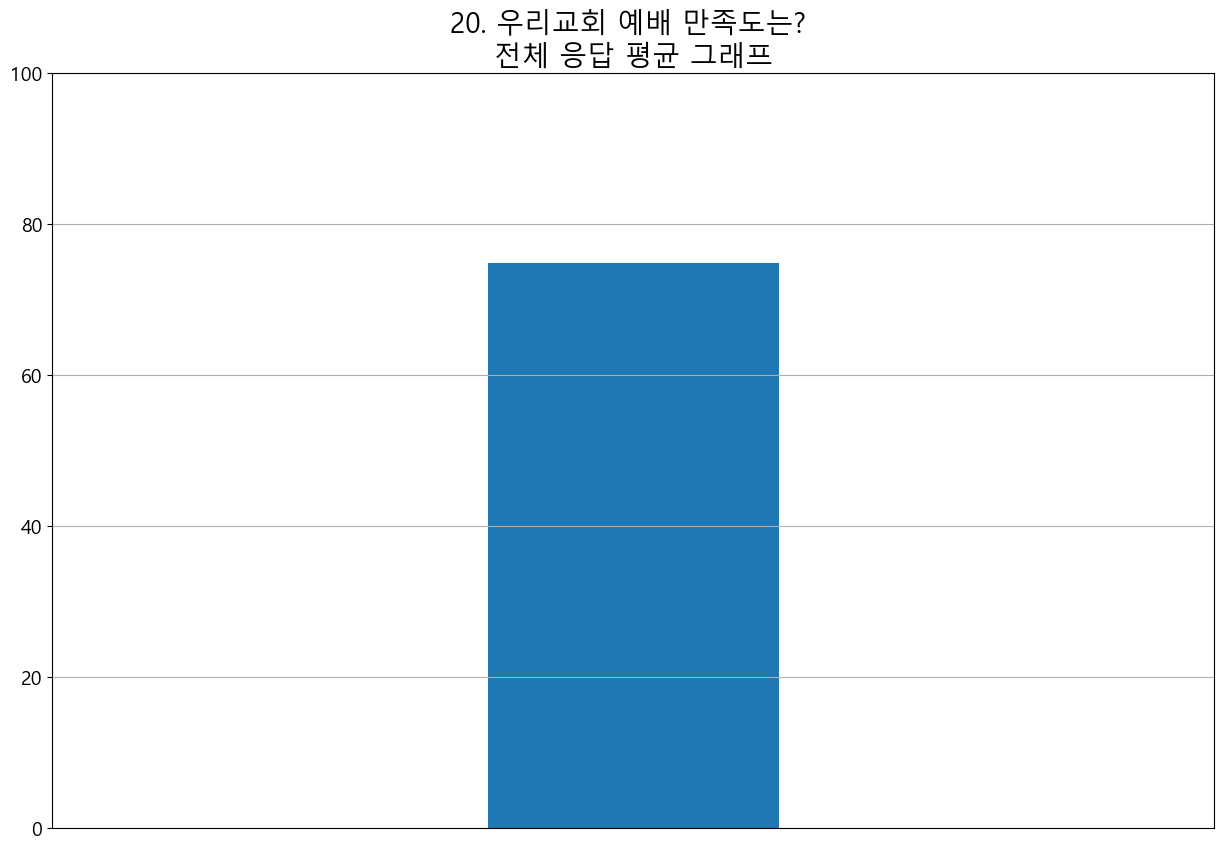

In [ ]:
fig = plt.figure(figsize = (15, 10), dpi = 100)
ax = fig.subplots()
table_total = table.iloc[0]

ax.bar(0, table_total[1], width = 1)

_ = plt.ylabel('') # y축 이름 제거
_ = plt.ylim(0, 100) # y축 범위 설정
_ = plt.yticks(fontsize = 14) # y축 라벨 크기 조정
_ = ax.set_yticklabels(['0', '20', '40', '60', '80', '100']) # y축 라벨 퍼센트 변환
_ = ax.grid(axis = 'y') # y축 그리드 추가

_ = plt.xlim(-2, 2) # x축 범위 설정
_ = ax.set_xticks([]) # x축 라벨 범위 설정
_ = ax.set_title(f'{data.columns[Q-1]} {복수응답}\n전체 응답 평균 그래프', fontsize = 20) # 그래프 제목 설정

fig.savefig(f'./result/Q{Q}_1.jpg')

2) 연령대 별 응답

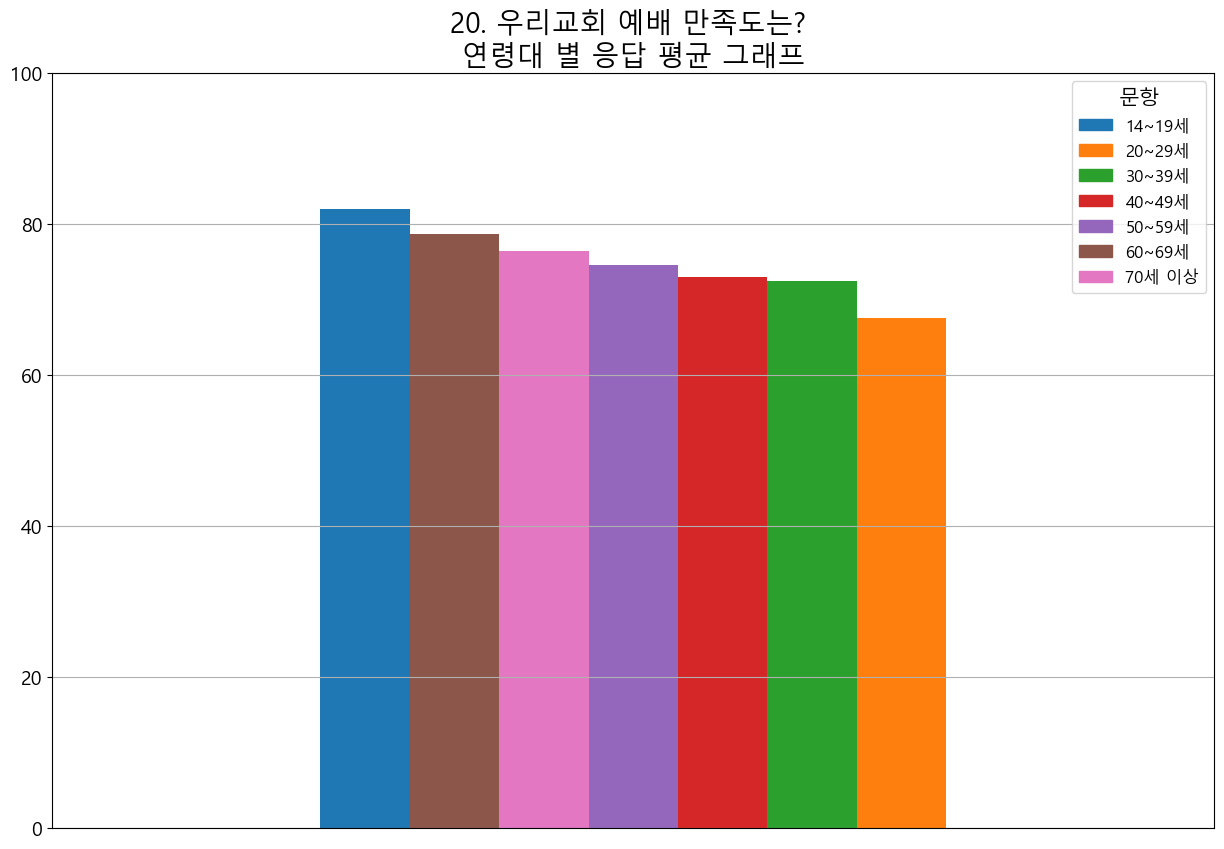

In [ ]:
fig = plt.figure(figsize = (15, 10), dpi = 100)
ax = fig.subplots()

table_age = table.iloc[1:8]
table_age['idx'] = np.arange(len(table_age))
all_color_list = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
color_list = all_color_list[:len(table_age.index)]
gap = len(table_age.index) / 2 - 0.5

# 범례 설정
ax_list = []
for idx in range(len(table_age.index)):
    ax_list.append(mpatches.Patch(color = color_list[idx], label = f'{table_age.index[idx]}'))

for idx, i in enumerate(table_age.sort_values(by = '교회 예배 만족도 평균', ascending = False)['idx'].values):
    _ = ax.bar(idx, table_age['교회 예배 만족도 평균'].iloc[i], width = 1, color = color_list[i])

_ = plt.ylabel('') # y축 이름 제거
_ = plt.ylim(0, 100) # y축 범위 설정
_ = plt.yticks(fontsize = 14) # y축 라벨 크기 조정
_ = ax.set_yticklabels(['0', '20', '40', '60', '80', '100']) # y축 라벨 퍼센트 변환
_ = ax.grid(axis = 'y') # y축 그리드 추가

_ = plt.xlim(-3.5, 9.5) # x축 범위 설정
_ = ax.set_xticks([]) # x축 라벨 범위 설정
_ = ax.set_title(f'{data.columns[Q-1]} {복수응답}\n연령대 별 응답 평균 그래프', fontsize = 20) # 그래프 제목 설정

legend = plt.legend(handles = ax_list, loc = 'upper right', fontsize = 12) # 범례 설정
legend.set_title('문항', prop = {'size':15}) # 범례 제목 설정

fig.savefig(f'./result/Q{Q}_2.jpg')

3) 직분 별 응답

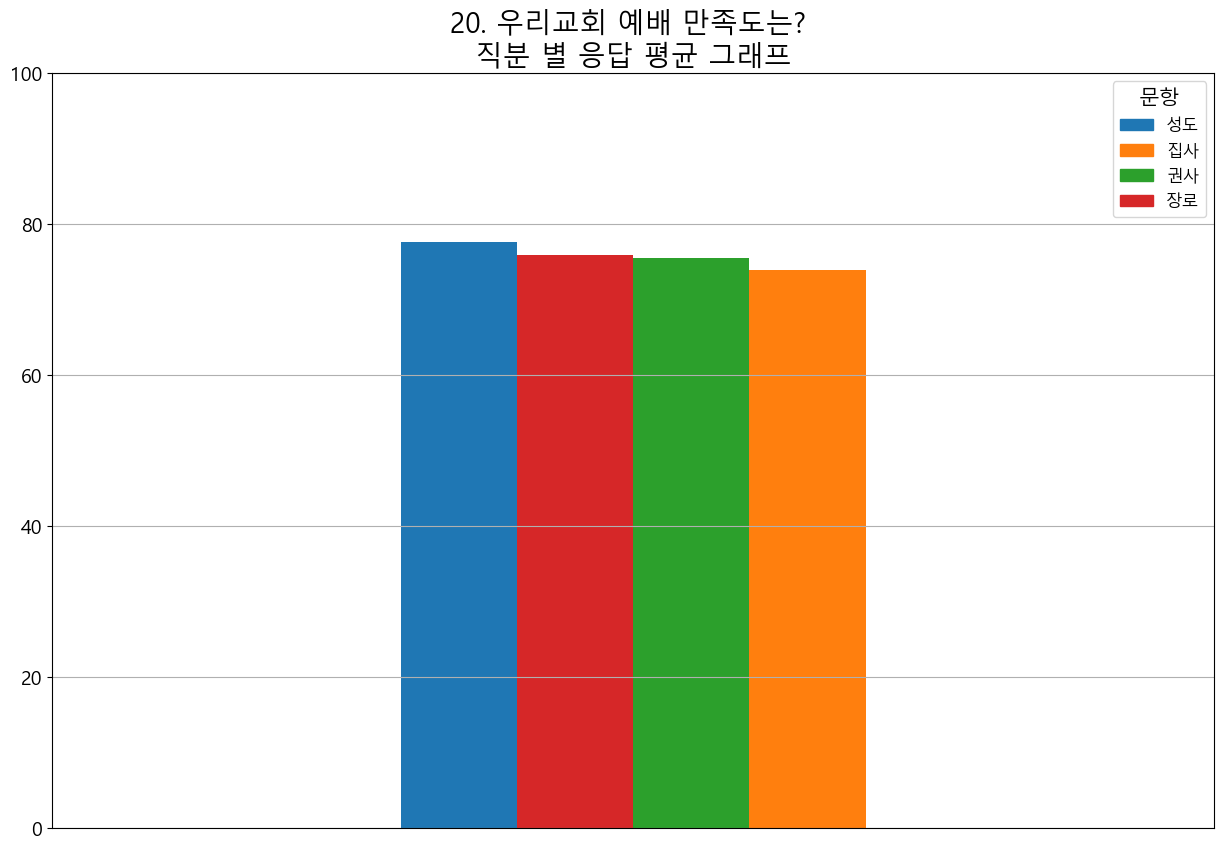

In [ ]:
fig = plt.figure(figsize = (15, 10), dpi = 100)
ax = fig.subplots()

table_duty = table.iloc[8:12]
table_duty['idx'] = np.arange(len(table_duty))
all_color_list = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
color_list = all_color_list[:len(table_duty.index)]
gap = len(table_duty.index) / 2 - 0.5

# 범례 설정
ax_list = []
for idx in range(len(table_duty.index)):
    ax_list.append(mpatches.Patch(color = color_list[idx], label = f'{table_duty.index[idx]}'))

for idx, i in enumerate(table_duty.sort_values(by = '교회 예배 만족도 평균', ascending = False)['idx'].values):
    _ = ax.bar(idx, table_duty['교회 예배 만족도 평균'].iloc[i], width = 1, color = color_list[i])

_ = plt.ylabel('') # y축 이름 제거
_ = plt.ylim(0, 100) # y축 범위 설정
_ = plt.yticks(fontsize = 14) # y축 라벨 크기 조정
_ = ax.set_yticklabels(['0', '20', '40', '60', '80', '100']) # y축 라벨 퍼센트 변환
_ = ax.grid(axis = 'y') # y축 그리드 추가

_ = plt.xlim(-3.5, 6.5) # x축 범위 설정
_ = ax.set_xticks([]) # x축 라벨 범위 설정
_ = ax.set_title(f'{data.columns[Q-1]} {복수응답}\n직분 별 응답 평균 그래프', fontsize = 20) # 그래프 제목 설정

legend = plt.legend(handles = ax_list, loc = 'upper right', fontsize = 12) # 범례 설정
legend.set_title('문항', prop = {'size':15}) # 범례 제목 설정

fig.savefig(f'./result/Q{Q}_3.jpg')

4) 역할 수 별 응답

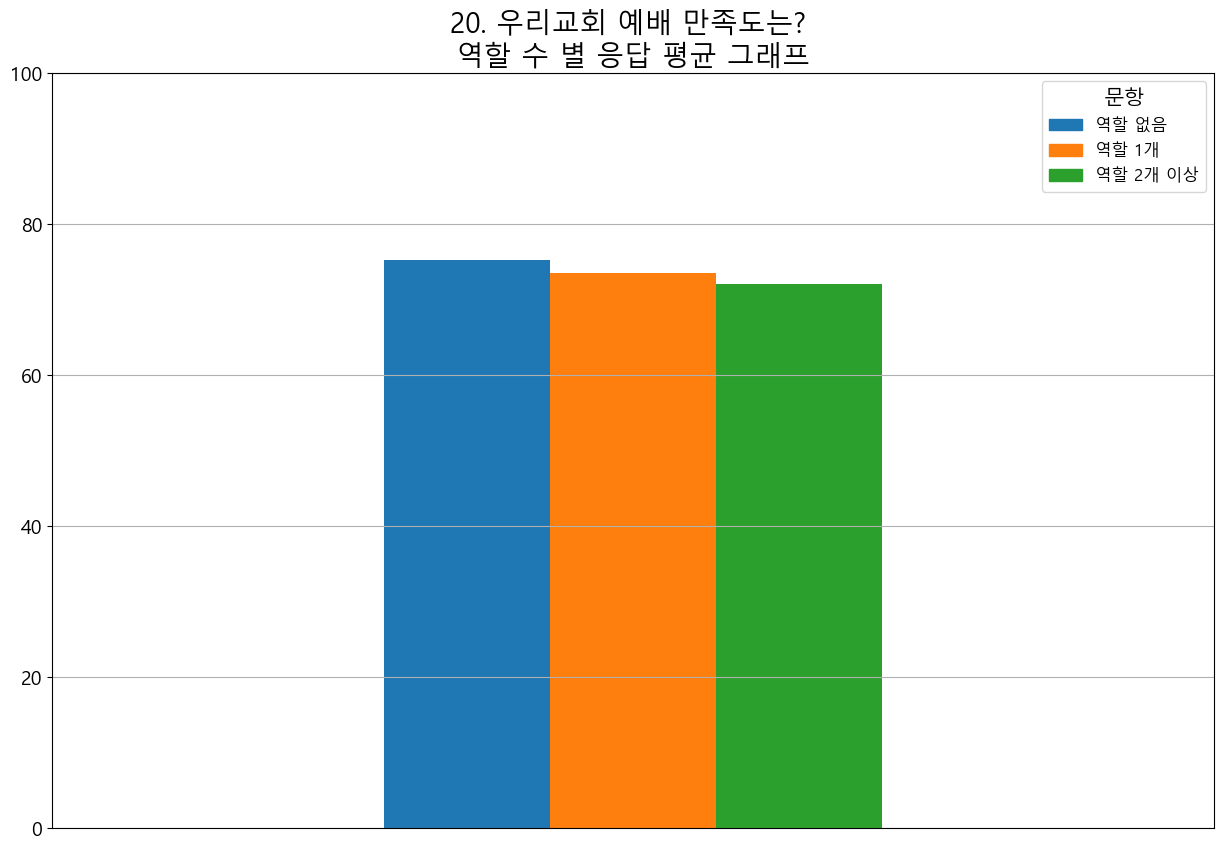

In [ ]:
fig = plt.figure(figsize = (15, 10), dpi = 100)
ax = fig.subplots()

table_role = table.iloc[12:15]
table_role['idx'] = np.arange(len(table_role))
all_color_list = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
color_list = all_color_list[:len(table_role.index)]
gap = len(table_role.index) / 2 - 0.5

# 범례 설정
ax_list = []
for idx in range(len(table_role.index)):
    ax_list.append(mpatches.Patch(color = color_list[idx], label = f'{table_role.index[idx]}'))

for idx, i in enumerate(table_role.sort_values(by = '교회 예배 만족도 평균', ascending = False)['idx'].values):
    _ = ax.bar(idx, table_role['교회 예배 만족도 평균'].iloc[i], width = 1, color = color_list[i])

_ = plt.ylabel('') # y축 이름 제거
_ = plt.ylim(0, 100) # y축 범위 설정
_ = plt.yticks(fontsize = 14) # y축 라벨 크기 조정
_ = ax.set_yticklabels(['0', '20', '40', '60', '80', '100']) # y축 라벨 퍼센트 변환
_ = ax.grid(axis = 'y') # y축 그리드 추가

_ = plt.xlim(-2.5, 4.5) # x축 범위 설정
_ = ax.set_xticks([]) # x축 라벨 범위 설정
_ = ax.set_title(f'{data.columns[Q-1]} {복수응답}\n역할 수 별 응답 평균 그래프', fontsize = 20) # 그래프 제목 설정

legend = plt.legend(handles = ax_list, loc = 'upper right', fontsize = 12) # 범례 설정
legend.set_title('문항', prop = {'size':15}) # 범례 제목 설정

fig.savefig(f'./result/Q{Q}_4.jpg')

5) 출석연수 별 응답

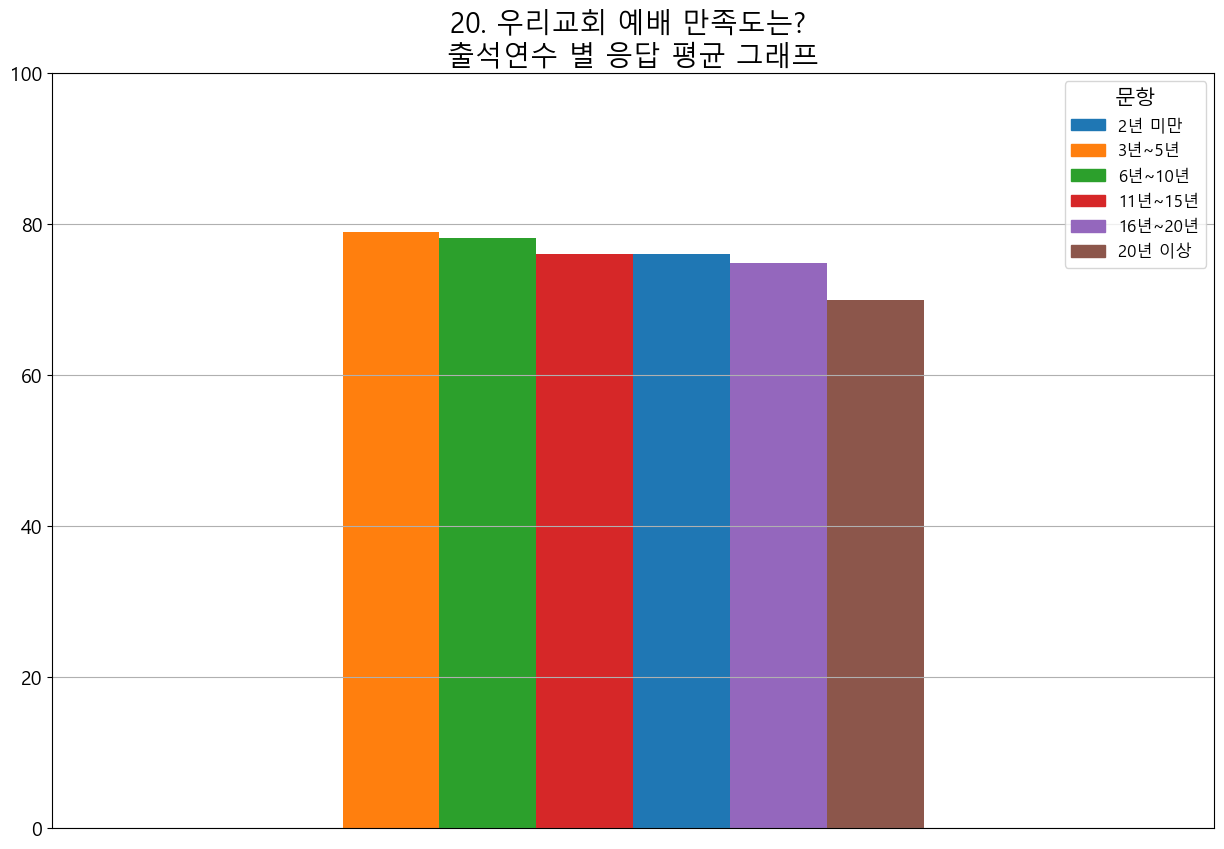

In [ ]:
fig = plt.figure(figsize = (15, 10), dpi = 100)
ax = fig.subplots()

table_year = table.iloc[15:]
table_year['idx'] = np.arange(len(table_year))
all_color_list = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
color_list = all_color_list[:len(table_year.index)]
gap = len(table_year.index) / 2 - 0.5

# 범례 설정
ax_list = []
for idx in range(len(table_year.index)):
    ax_list.append(mpatches.Patch(color = color_list[idx], label = f'{table_year.index[idx]}'))

for idx, i in enumerate(table_year.sort_values(by = '교회 예배 만족도 평균', ascending = False)['idx'].values):
    _ = ax.bar(idx, table_year['교회 예배 만족도 평균'].iloc[i], width = 1, color = color_list[i])

_ = plt.ylabel('') # y축 이름 제거
_ = plt.ylim(0, 100) # y축 범위 설정
_ = plt.yticks(fontsize = 14) # y축 라벨 크기 조정
_ = ax.set_yticklabels(['0', '20', '40', '60', '80', '100']) # y축 라벨 퍼센트 변환
_ = ax.grid(axis = 'y') # y축 그리드 추가

_ = plt.xlim(-3.5, 8.5) # x축 범위 설정
_ = ax.set_xticks([]) # x축 라벨 범위 설정
_ = ax.set_title(f'{data.columns[Q-1]} {복수응답}\n출석연수 별 응답 평균 그래프', fontsize = 20) # 그래프 제목 설정

legend = plt.legend(handles = ax_list, loc = 'upper right', fontsize = 12) # 범례 설정
legend.set_title('문항', prop = {'size':15}) # 범례 제목 설정

fig.savefig(f'./result/Q{Q}_5.jpg')

### Q21. 예배의 가장 중요한 부분은?

#### 데이터 셋 준비

In [ ]:
Q = 21
Q_list.append(Q)
복수응답 = ""

In [ ]:
table_Q21 = pd.DataFrame(index = ['전체',
                                 '14~19세', '20~29세', '30~39세', '40~49세', '50~59세', '60~69세', '70세 이상',
                                 '성도', '집사', '권사', '장로',
                                 '역할 없음', '역할 1개', '역할 2개 이상',
                                 '2년 미만', '3년~5년', '6년~10년', '11년~15년', '16년~20년', '20년 이상'],
                        columns = ['1. 찬양',
                                   '2. 설교',
                                   '3. 기도',
                                   '4. 헌금',
                                   '5. 교제'])

In [ ]:
df_Q21 = df.copy()
df_Q21['Q21_1'] = 0
df_Q21['Q21_2'] = 0
df_Q21['Q21_3'] = 0
df_Q21['Q21_4'] = 0
df_Q21['Q21_5'] = 0

In [ ]:
nan_index = []

for idx, Q21 in enumerate(data['21. 예배의 가장 중요한 부분은?']):
    if type(Q21) == float:
        nan_index.append(idx)
    elif type(Q21) == str:
        if '찬양' == Q21:
            df_Q21['Q21_1'].iloc[idx] = 1
        if '설교' == Q21:
            df_Q21['Q21_2'].iloc[idx] = 1
        if '기도' == Q21:
            df_Q21['Q21_3'].iloc[idx] = 1
        if '헌금' == Q21:
            df_Q21['Q21_4'].iloc[idx] = 1
        if '교제' == Q21:
            df_Q21['Q21_5'].iloc[idx] = 1
        if df_Q21.iloc[idx, col_num:].sum() == 0:
            nan_index.append(idx)
        
df_Q21.drop(df_Q21.index[nan_index], axis = 0, inplace = True)

#### 빈도수 & 비율 테이블

In [ ]:
table, q_table, f_table = make_table(Q)

#### 시각화

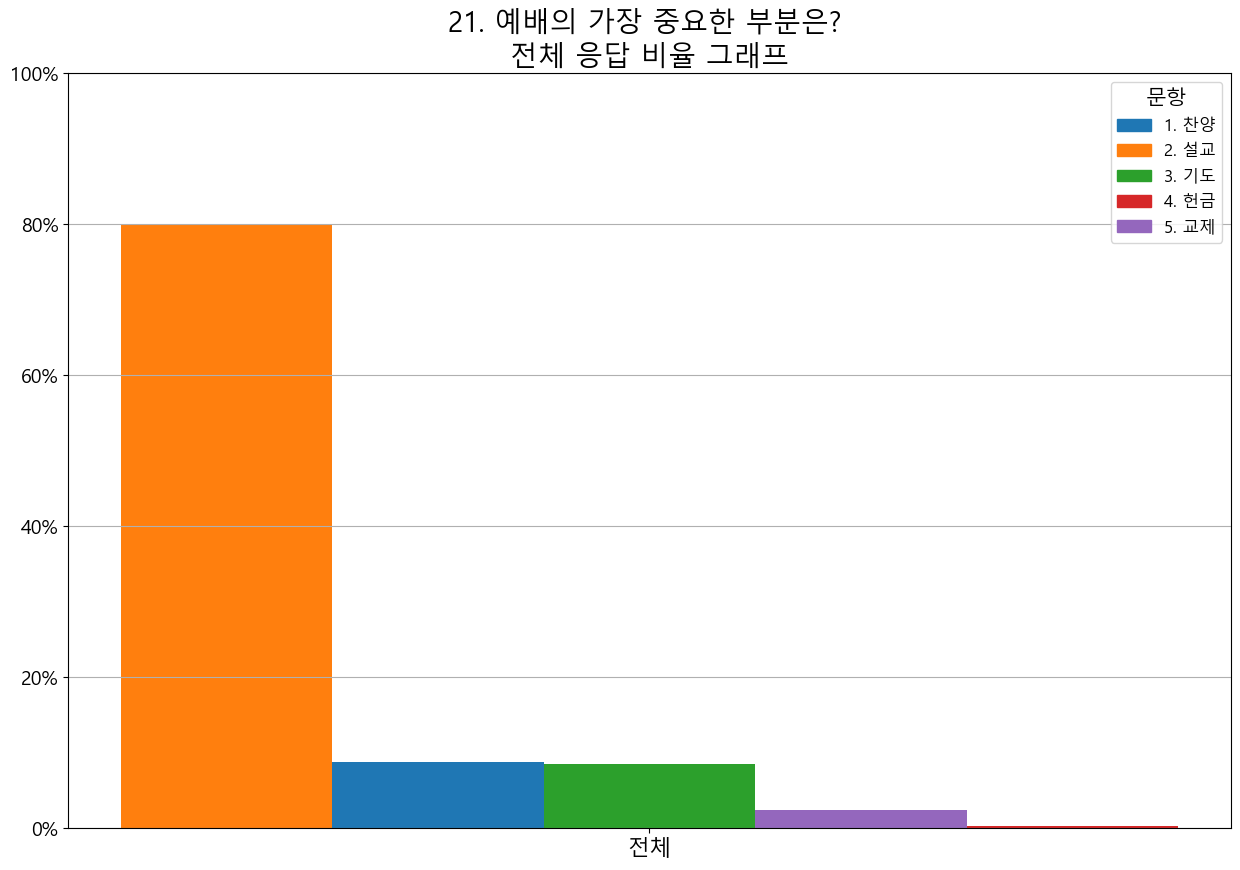

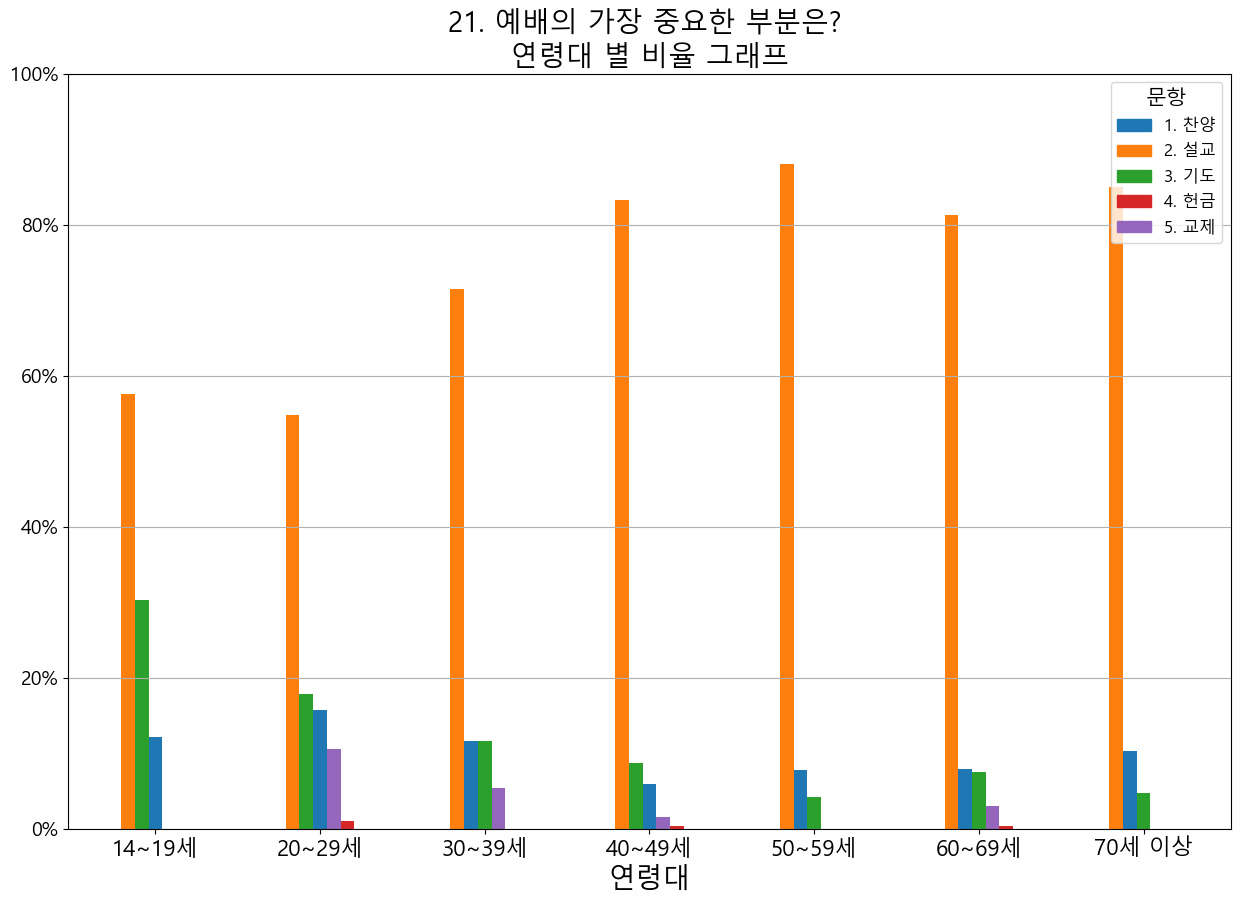

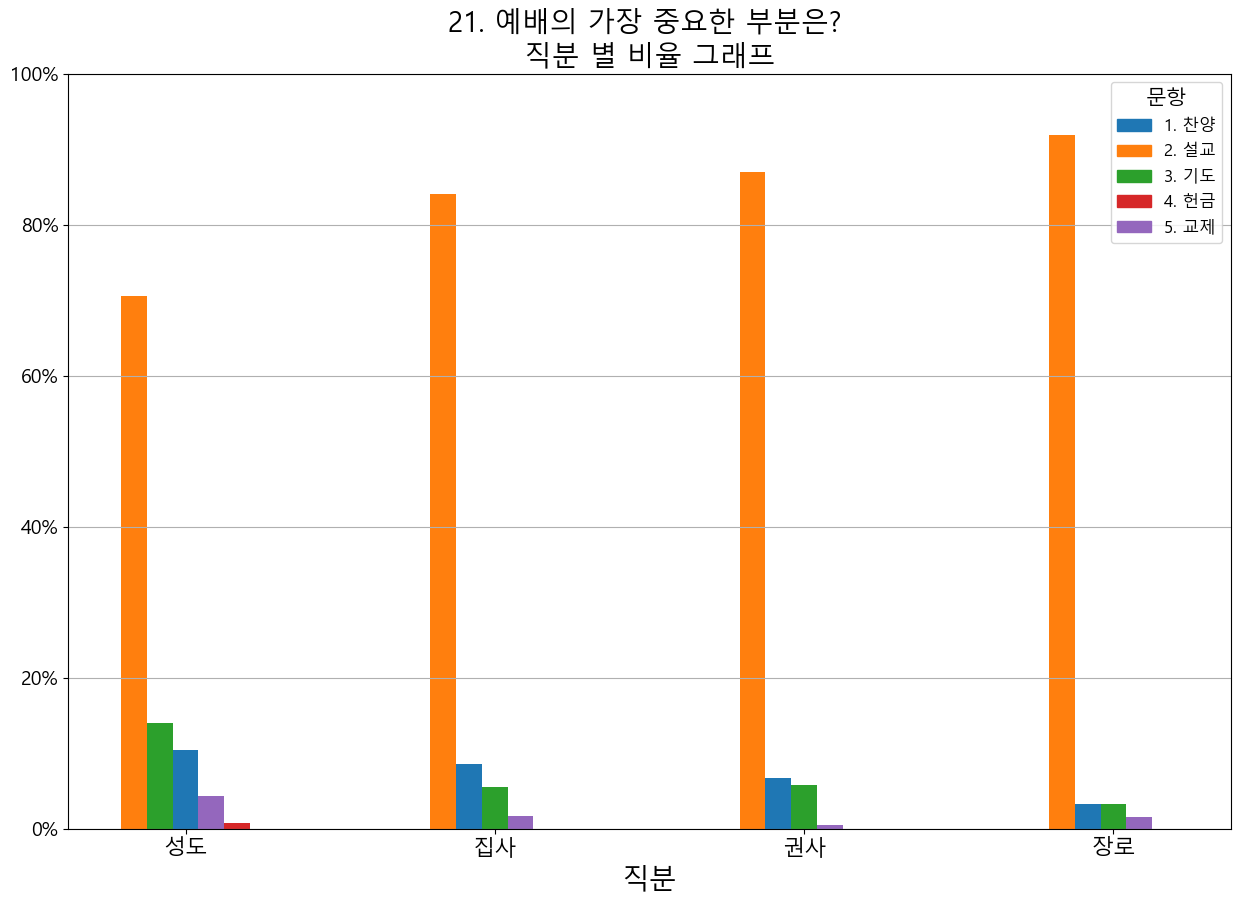

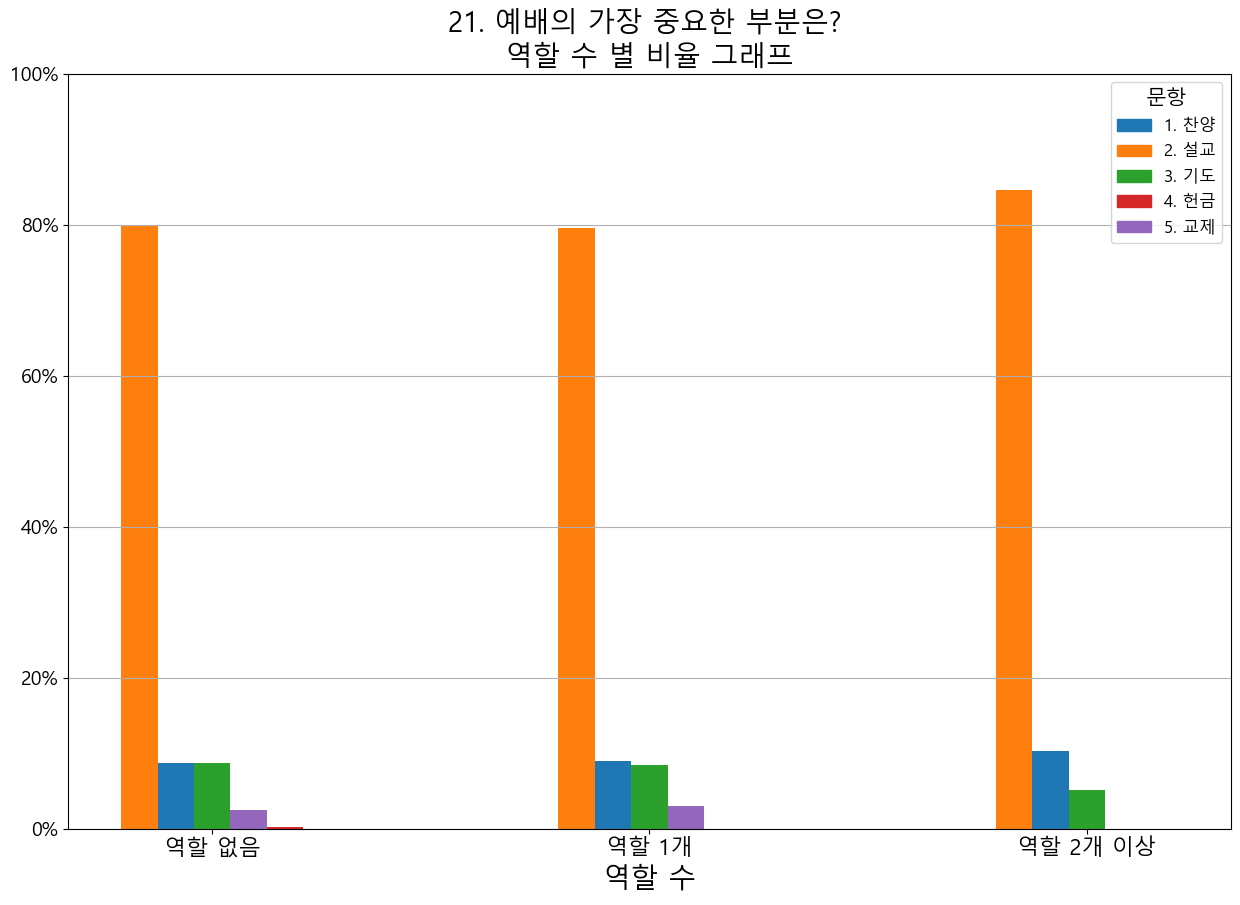

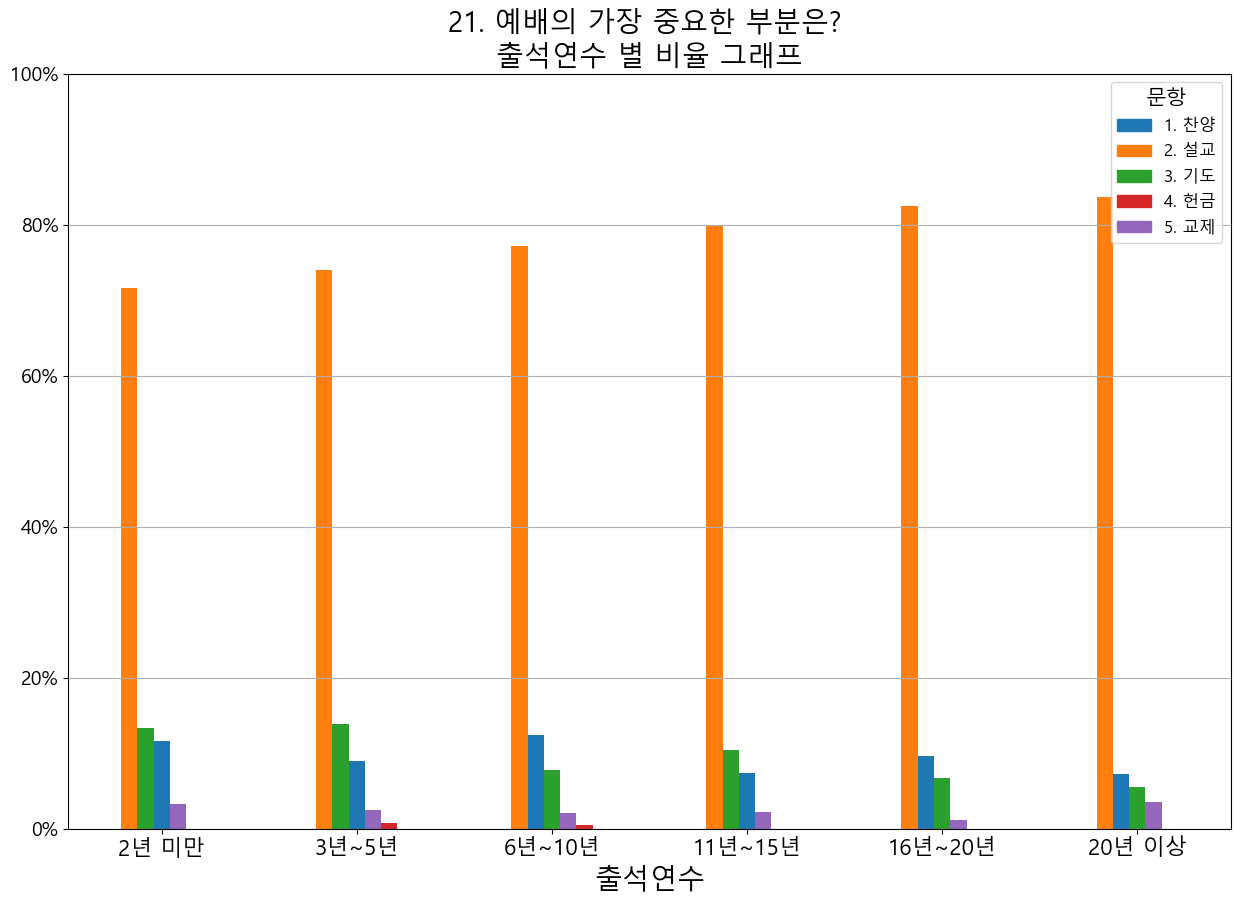

In [ ]:
all_color_list = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
color_list = all_color_list[:len(table.columns)]
gap = len(table.columns) / 2 - 0.5

# 그래프 제목 설정
for question in data.columns[:-1]:
    if Q == int(re.findall('\d+', question)[0]):
        title = question
    
# 범례(legend) 설정
ax_list = []
for idx in range(len(q_table.columns)):
    ax_list.append(mpatches.Patch(color = color_list[idx], label = f'{q_table.columns[idx]}'))
    
plot_1()
plot_2()
plot_3()
plot_4()
plot_5()

### Q22. 우리교회 예배시간은?

#### 데이터 셋 준비

In [ ]:
Q = 22
Q_list.append(Q)
복수응답 = ""

In [ ]:
table_Q22 = pd.DataFrame(index = ['전체',
                                 '14~19세', '20~29세', '30~39세', '40~49세', '50~59세', '60~69세', '70세 이상',
                                 '성도', '집사', '권사', '장로',
                                 '역할 없음', '역할 1개', '역할 2개 이상',
                                 '2년 미만', '3년~5년', '6년~10년', '11년~15년', '16년~20년', '20년 이상'],
                        columns = ['1. 지금 이대로 좋다.',
                                   '2. 변경희망'])

In [ ]:
df_Q22 = df.copy()
df_Q22['Q22_1'] = 0
df_Q22['Q22_2'] = 0

In [ ]:
nan_index = []

for idx, Q22 in enumerate(data['22 우리교회 예배시간은?']):
    if type(Q22) == float:
        nan_index.append(idx)
    elif type(Q22) == str:
        if '지금 이대로 좋다.' == Q22:
            df_Q22['Q22_1'].iloc[idx] = 1
        else:
            df_Q22['Q22_2'].iloc[idx] = 1
        
df_Q22.drop(df_Q22.index[nan_index], axis = 0, inplace = True)

#### 빈도수 & 비율 테이블

In [ ]:
table, q_table, f_table = make_table(Q)

#### 시각화

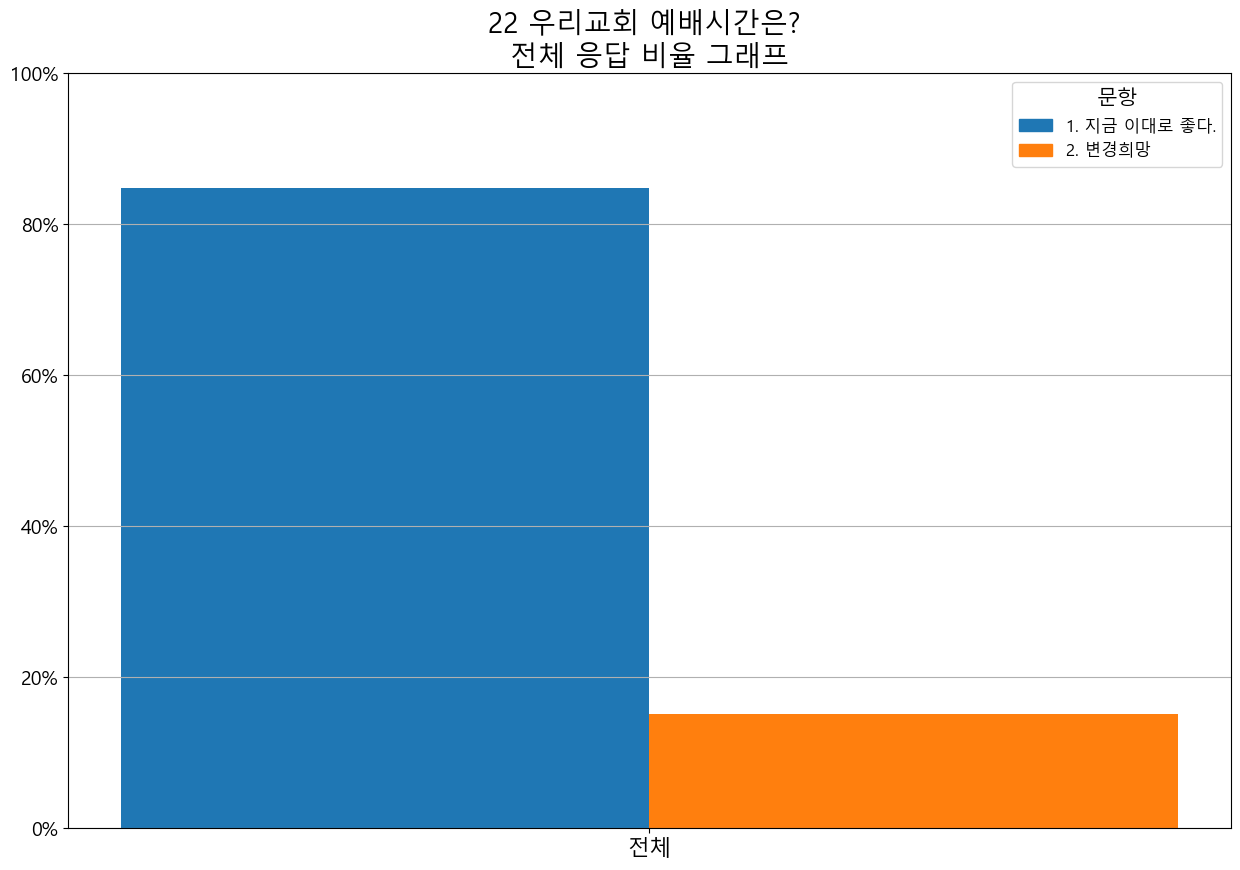

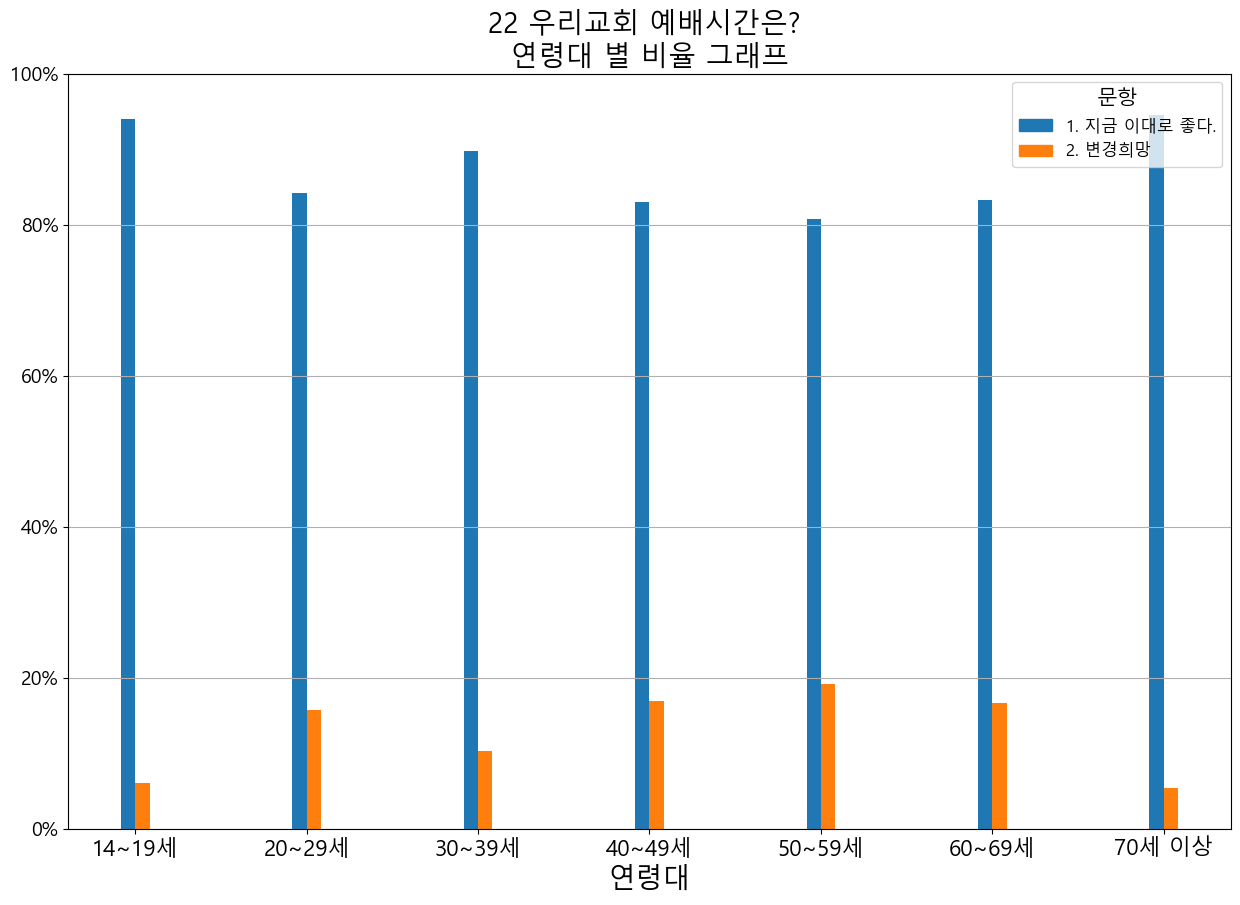

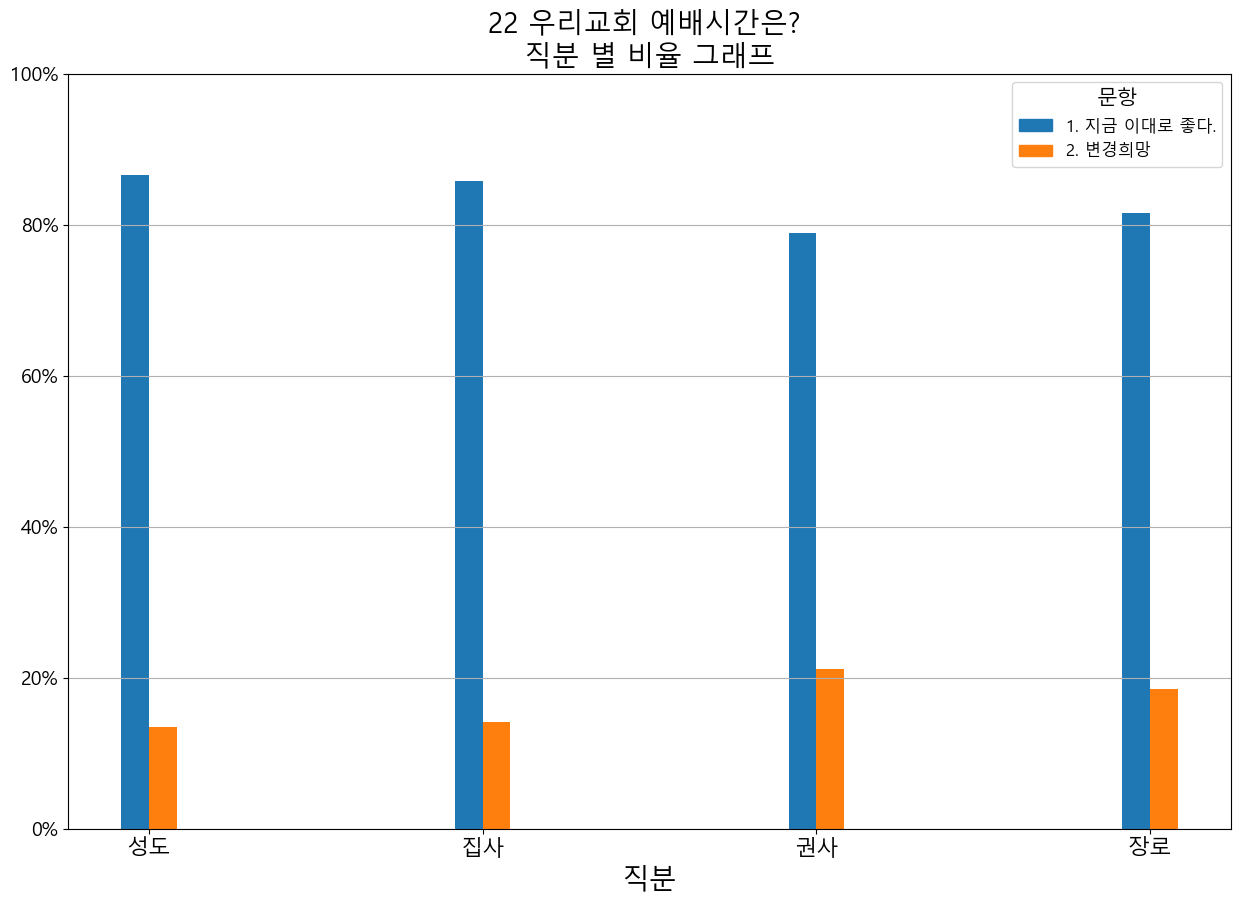

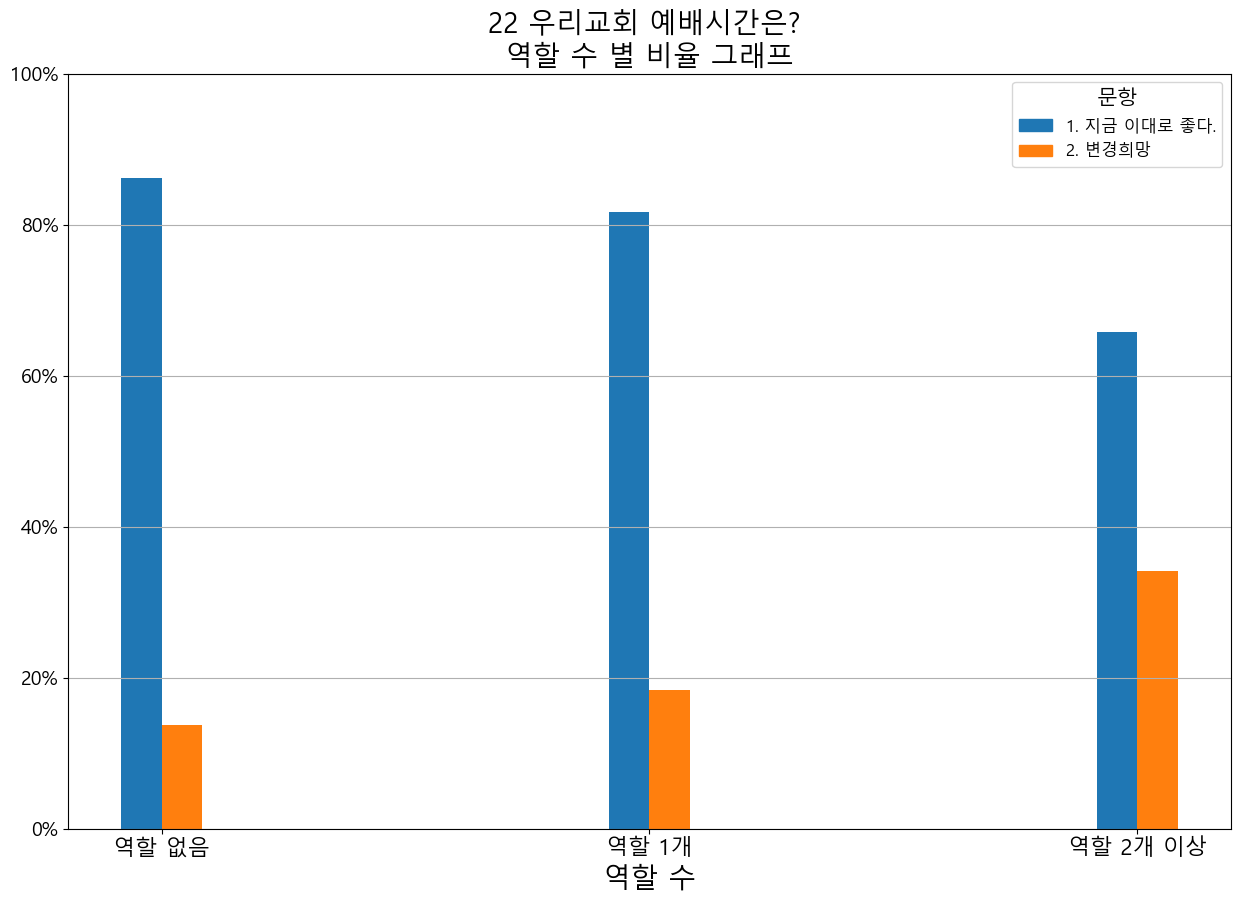

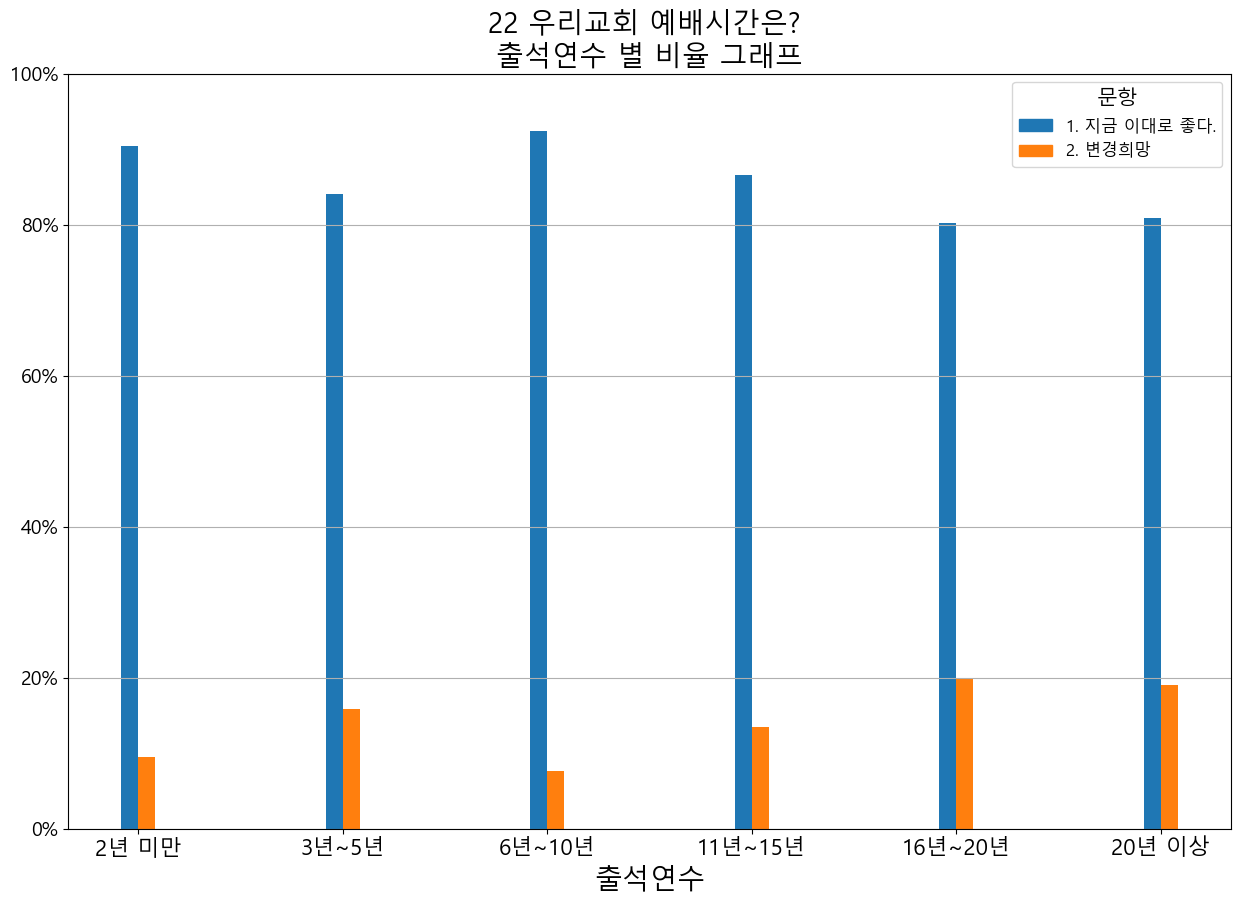

In [ ]:
all_color_list = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
color_list = all_color_list[:len(table.columns)]
gap = len(table.columns) / 2 - 0.5

# 그래프 제목 설정
for question in data.columns[:-1]:
    if Q == int(re.findall('\d+', question)[0]):
        title = question
    
# 범례(legend) 설정
ax_list = []
for idx in range(len(q_table.columns)):
    ax_list.append(mpatches.Patch(color = color_list[idx], label = f'{q_table.columns[idx]}'))
    
plot_1()
plot_2()
plot_3()
plot_4()
plot_5()

### Q23. 우리교회 예배순서는?

#### 데이터 셋 준비

In [ ]:
Q = 23
Q_list.append(Q)
복수응답 = ""

In [ ]:
table_Q23 = pd.DataFrame(index = ['전체',
                                 '14~19세', '20~29세', '30~39세', '40~49세', '50~59세', '60~69세', '70세 이상',
                                 '성도', '집사', '권사', '장로',
                                 '역할 없음', '역할 1개', '역할 2개 이상',
                                 '2년 미만', '3년~5년', '6년~10년', '11년~15년', '16년~20년', '20년 이상'],
                        columns = ['1. 지금 이대로 좋다',
                                   '2. 더 단순화하면 좋겠다',
                                   '3. 더 다양한 순서가 있으면 좋겠다'])

In [ ]:
df_Q23 = df.copy()
df_Q23['Q23_1'] = 0
df_Q23['Q23_2'] = 0
df_Q23['Q23_3'] = 0

In [ ]:
nan_index = []

for idx, Q23 in enumerate(data['23. 우리교회 예배순서는?']):
    if type(Q23) == float:
        nan_index.append(idx)
    elif type(Q23) == str:
        if '지금 이대로 좋다' in Q23:
            df_Q23['Q23_1'].iloc[idx] = 1
        if '더 단순화' in Q23:
            df_Q23['Q23_2'].iloc[idx] = 1
        if '더 다양한' in Q23:
            df_Q23['Q23_3'].iloc[idx] = 1
        if df_Q23.iloc[idx, col_num:].sum() == 0:
            nan_index.append(idx)
        
df_Q23.drop(df_Q23.index[nan_index], axis = 0, inplace = True)

#### 빈도수 & 비율 테이블

In [ ]:
table, q_table, f_table = make_table(Q)

#### 시각화

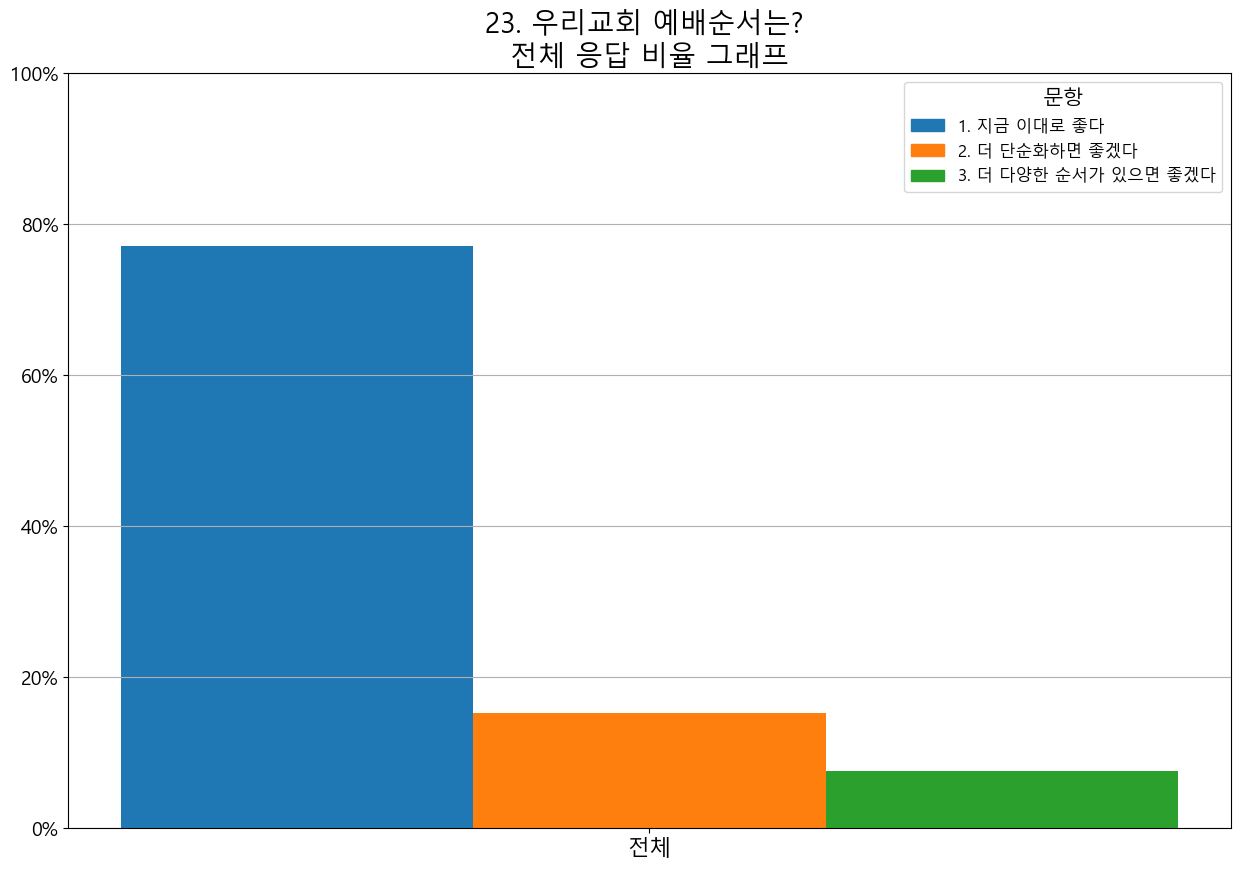

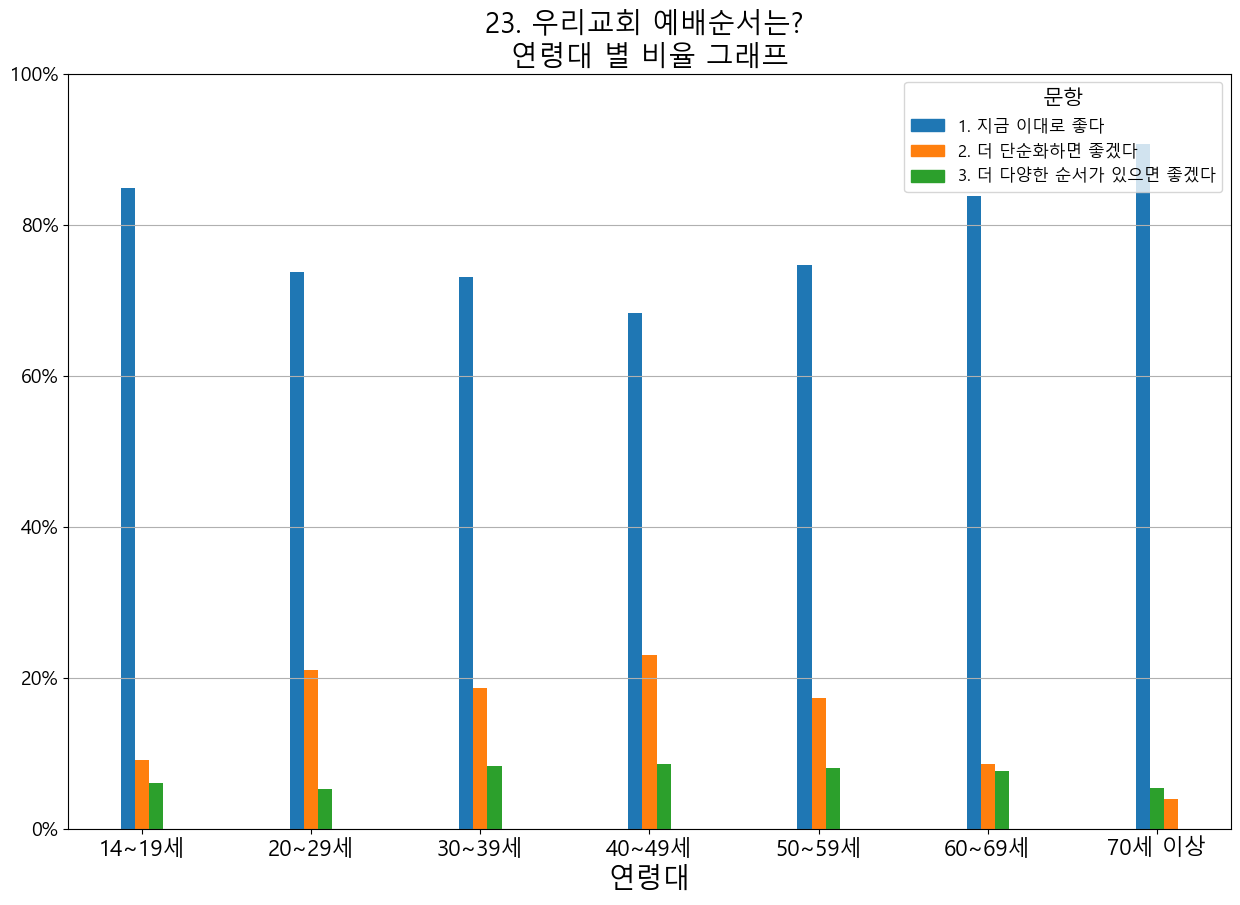

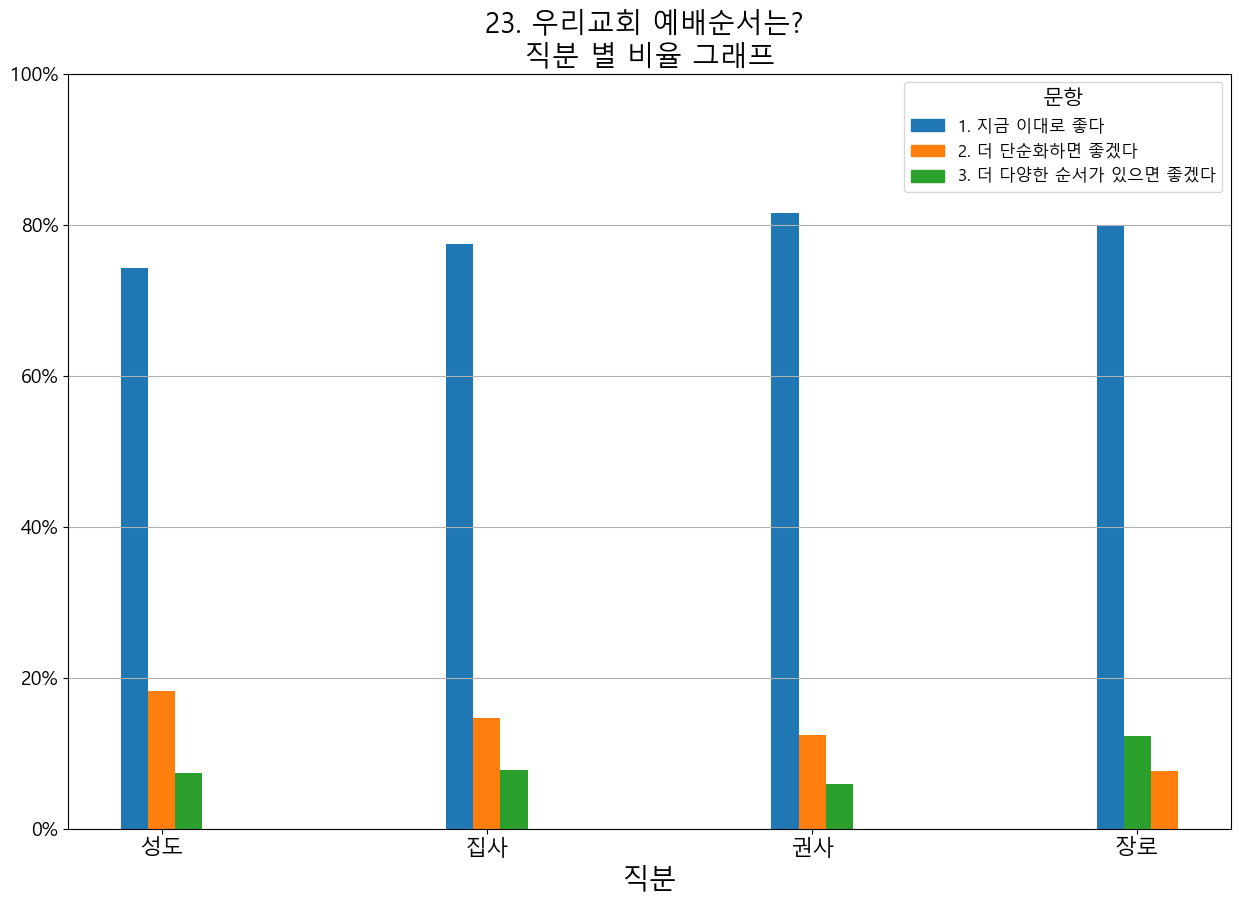

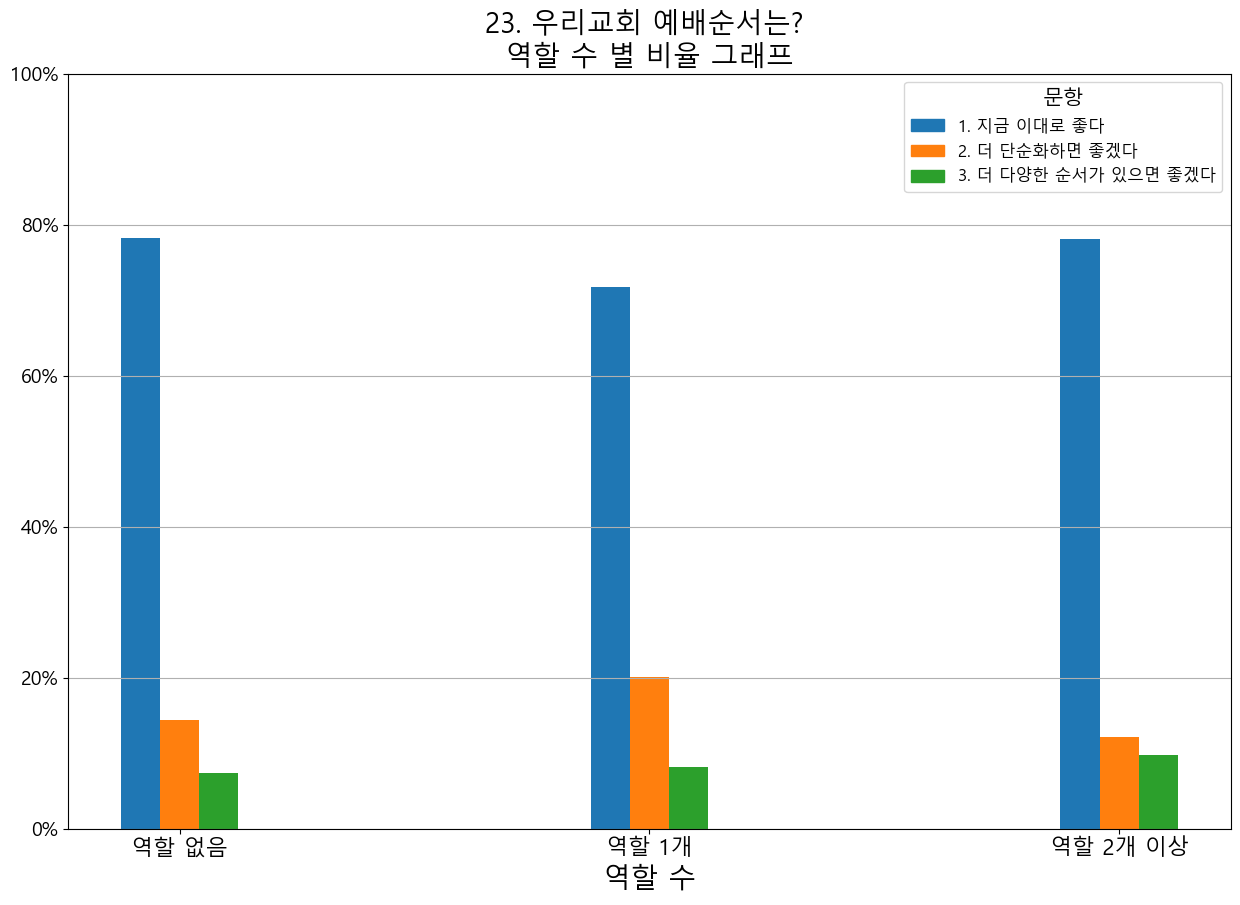

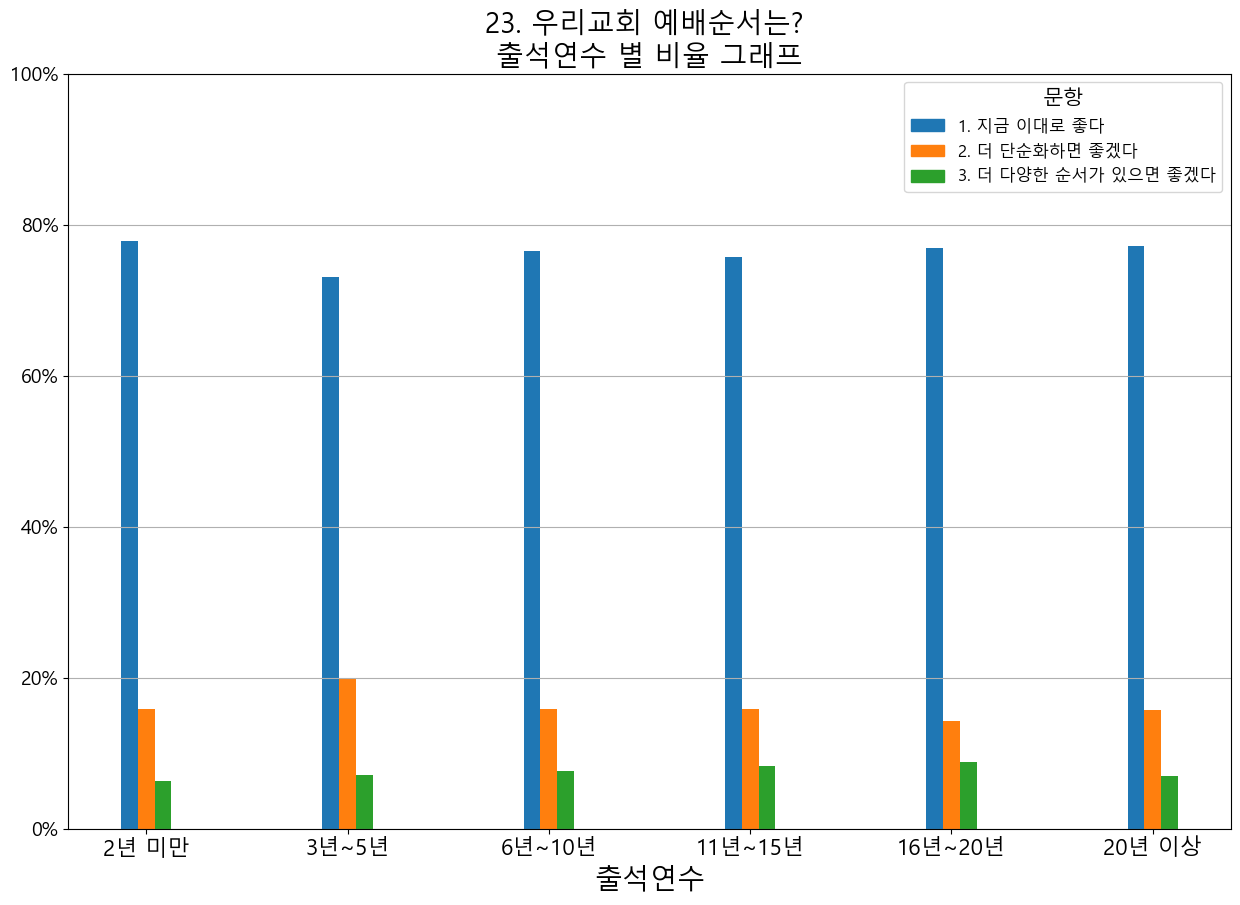

In [ ]:
all_color_list = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
color_list = all_color_list[:len(table.columns)]
gap = len(table.columns) / 2 - 0.5

# 그래프 제목 설정
for question in data.columns[:-1]:
    if Q == int(re.findall('\d+', question)[0]):
        title = question
    
# 범례(legend) 설정
ax_list = []
for idx in range(len(q_table.columns)):
    ax_list.append(mpatches.Patch(color = color_list[idx], label = f'{q_table.columns[idx]}'))
    
plot_1()
plot_2()
plot_3()
plot_4()
plot_5()

### Q24. 우리교회 예배 중 변화가 필요하다고 생각하는 부분은? (3개까지 중복가능)

#### 데이터 셋 준비

In [ ]:
Q = 24
Q_list.append(Q)
복수응답 = "(복수응답)"

In [ ]:
table_Q24 = pd.DataFrame(index = ['전체',
                                 '14~19세', '20~29세', '30~39세', '40~49세', '50~59세', '60~69세', '70세 이상',
                                 '성도', '집사', '권사', '장로',
                                 '역할 없음', '역할 1개', '역할 2개 이상',
                                 '2년 미만', '3년~5년', '6년~10년', '11년~15년', '16년~20년', '20년 이상'],
                        columns = ['1. 충분한 기도시간',
                                   '2. 기도시간 축소',
                                   '3. 충분한 찬양시간',
                                   '4. 찬양시간 축소',
                                   '5. 시각적 환경 개선',
                                   '6. 기술적 요소 개선',
                                   '7. 다양한 컨텐츠 마련',
                                   '8. 없음'])

In [ ]:
df_Q24 = df.copy()
df_Q24['Q24_1'] = 0
df_Q24['Q24_2'] = 0
df_Q24['Q24_3'] = 0
df_Q24['Q24_4'] = 0
df_Q24['Q24_5'] = 0
df_Q24['Q24_6'] = 0
df_Q24['Q24_7'] = 0
df_Q24['Q24_8'] = 0

In [ ]:
nan_index = []

for idx, Q24 in enumerate(data['24. 우리 교회 예배 중에서 변화가 필요한 부분은?']):
    if type(Q24) == float:
        nan_index.append(idx)
    elif type(Q24) == str:
        if '충분한 기도시간' in Q24:
            df_Q24['Q24_1'].iloc[idx] = 1
        if '기도시간 축소' in Q24:
            df_Q24['Q24_2'].iloc[idx] = 1
        if '충분한 찬양시간' in Q24:
            df_Q24['Q24_3'].iloc[idx] = 1
        if '찬양시간 축소' in Q24:
            df_Q24['Q24_4'].iloc[idx] = 1
        if '시각적 환경' in Q24:
            df_Q24['Q24_5'].iloc[idx] = 1
        if '기술적 요소' in Q24:
            df_Q24['Q24_6'].iloc[idx] = 1
        if '다양한 컨텐츠' in Q24:
            df_Q24['Q24_7'].iloc[idx] = 1
        if '없음' in Q24:
            df_Q24['Q24_8'].iloc[idx] = 1
        if df_Q24.iloc[idx, col_num:].sum() == 0:
            nan_index.append(idx)
        
df_Q24.drop(df_Q24.index[nan_index], axis = 0, inplace = True)

#### 빈도수 & 비율 테이블

In [ ]:
table, q_table, f_table = make_table(Q)

#### 시각화

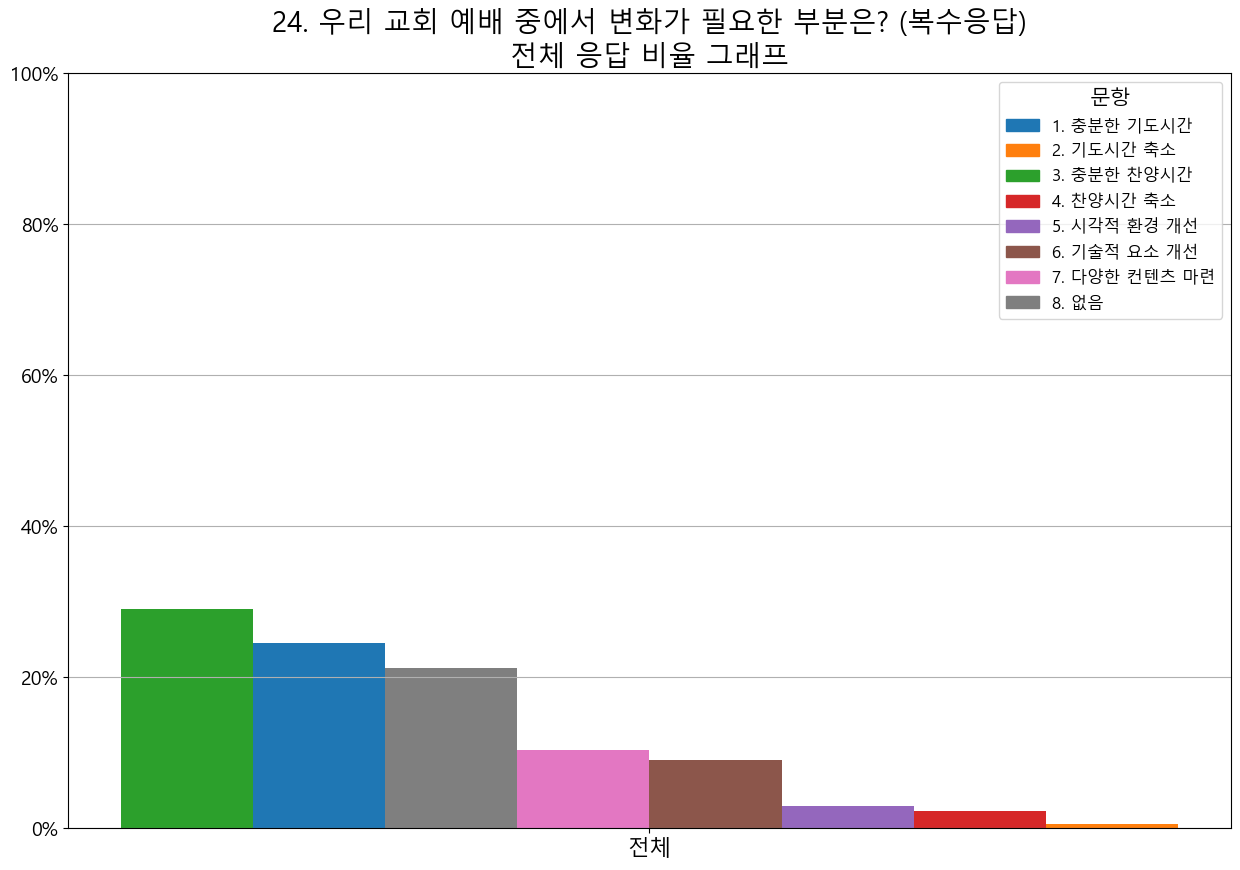

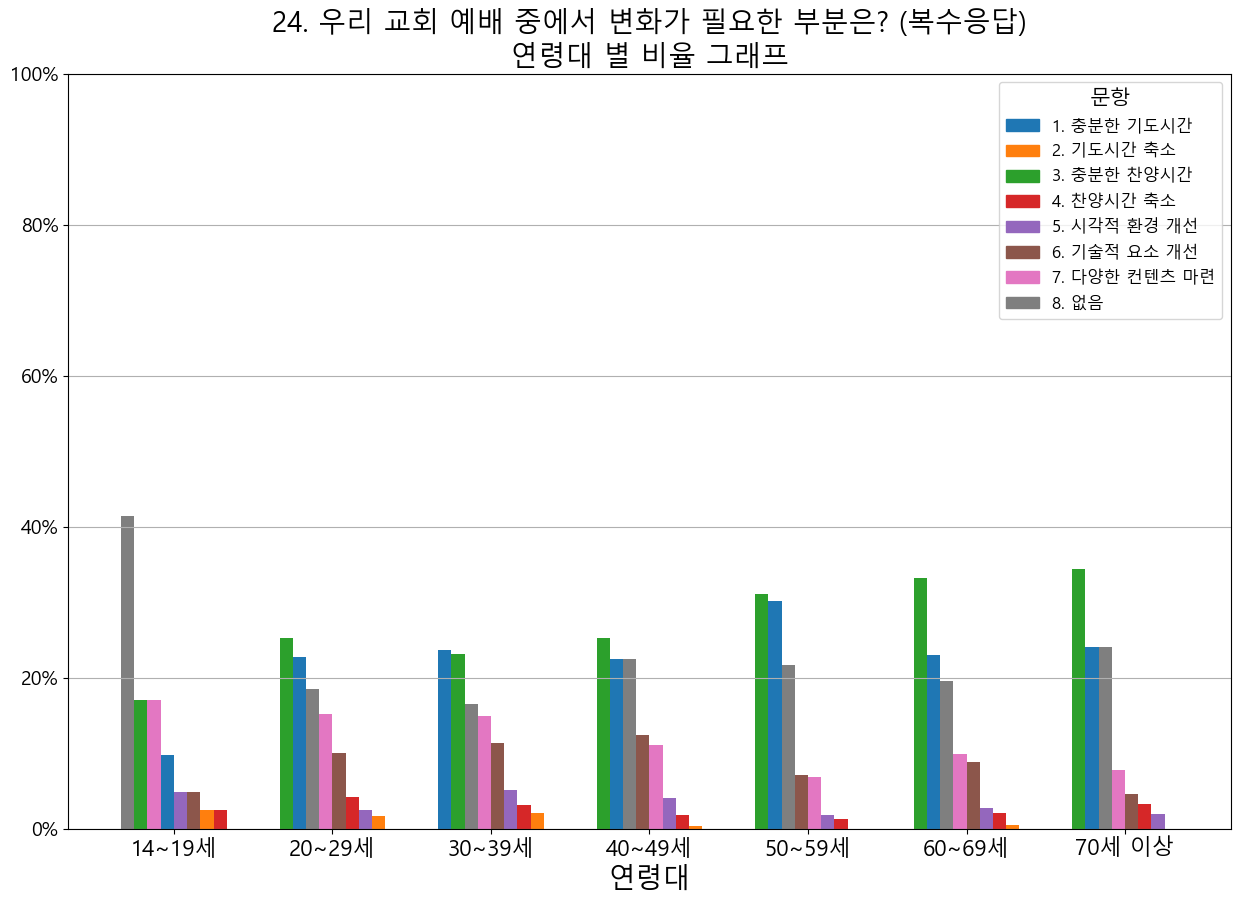

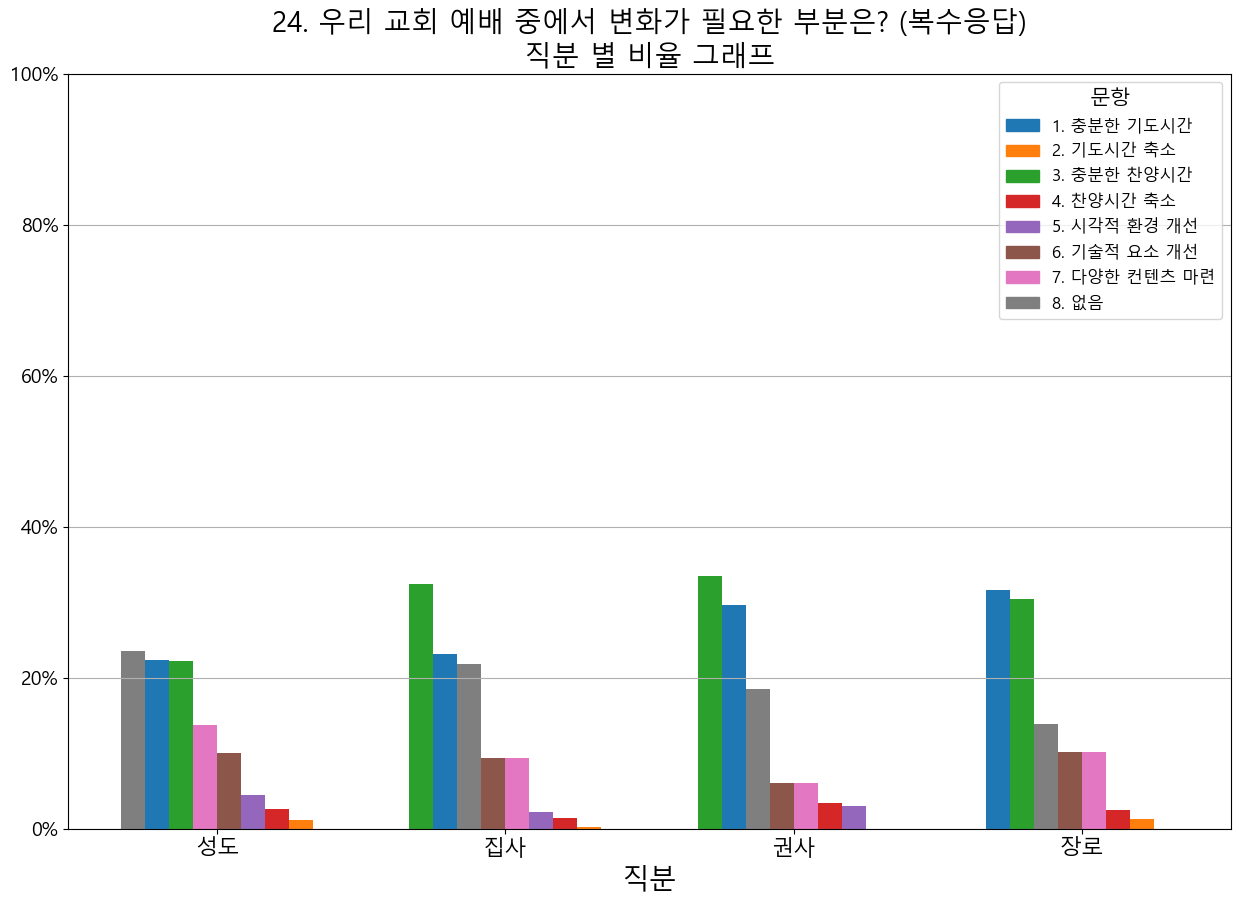

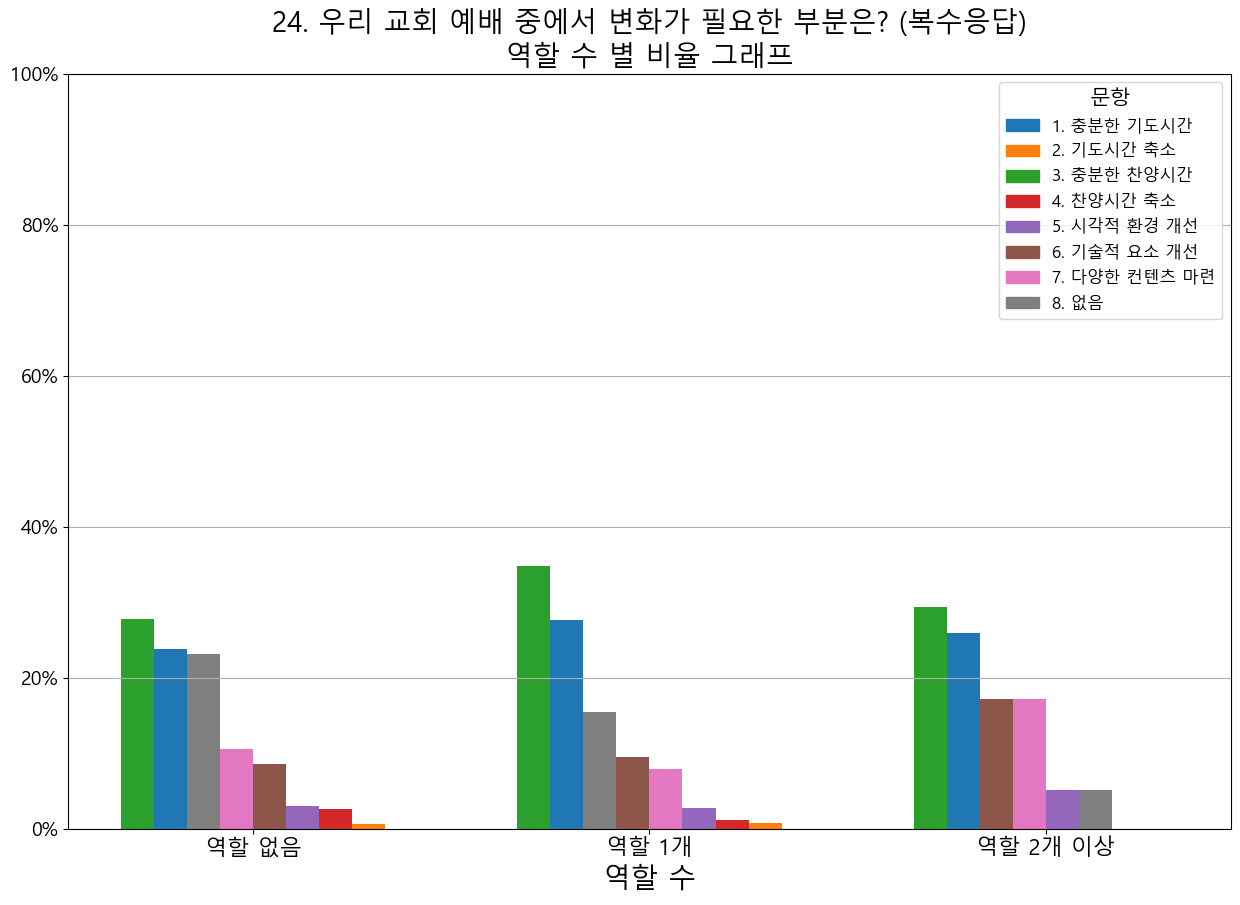

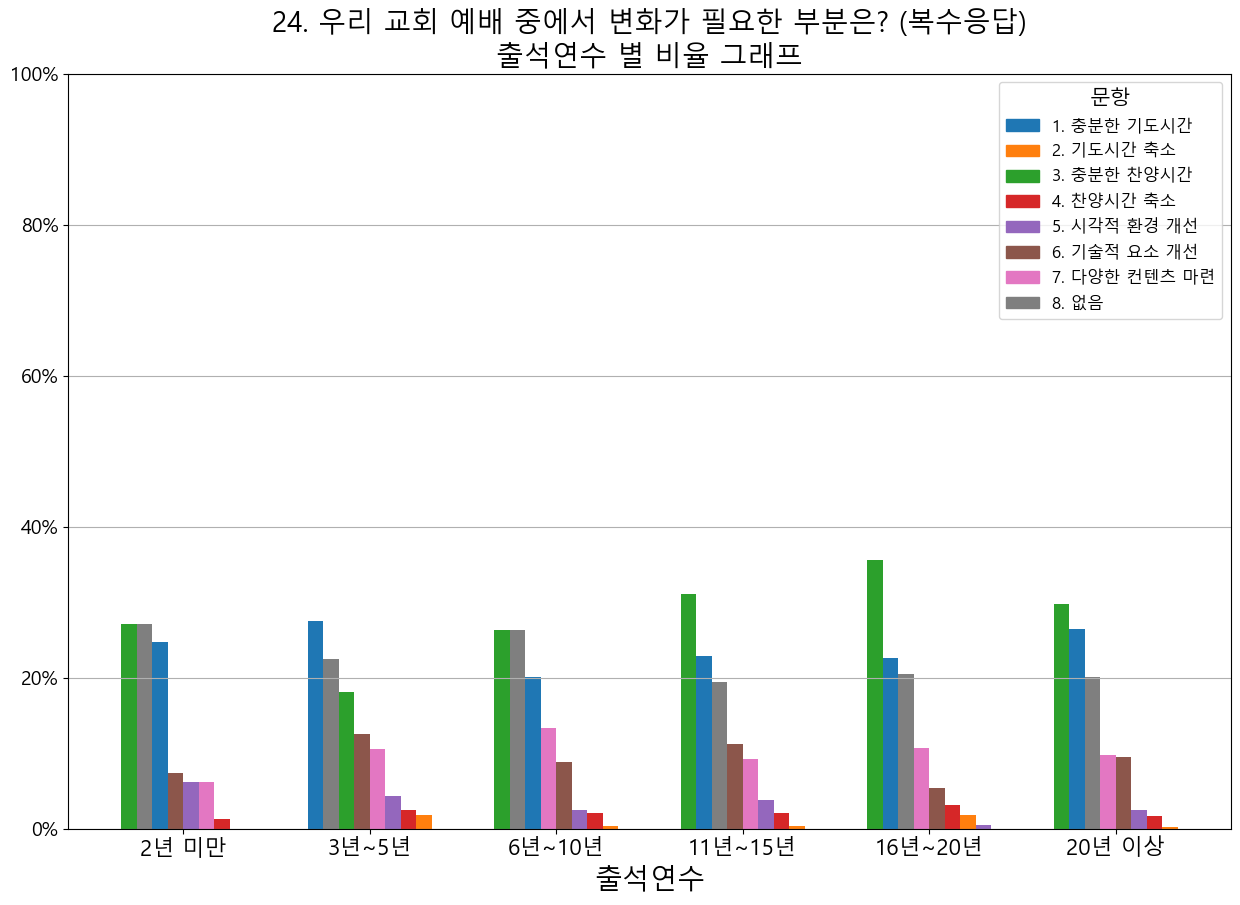

In [ ]:
all_color_list = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
color_list = all_color_list[:len(table.columns)]
gap = len(table.columns) / 2 - 0.5

# 그래프 제목 설정
for question in data.columns[:-1]:
    if Q == int(re.findall('\d+', question)[0]):
        title = question
    
# 범례(legend) 설정
ax_list = []
for idx in range(len(q_table.columns)):
    ax_list.append(mpatches.Patch(color = color_list[idx], label = f'{q_table.columns[idx]}'))
    
plot_1()
plot_2()
plot_3()
plot_4()
plot_5()

## Part 3

### Q26. 코로나 기간 참여했던 사역 중 가장 유익했던 사역은?

#### 데이터 셋 준비

In [ ]:
Q = 26
Q_list.append(Q)
복수응답 = ""

In [ ]:
table_Q26 = pd.DataFrame(index = ['전체',
                                 '14~19세', '20~29세', '30~39세', '40~49세', '50~59세', '60~69세', '70세 이상',
                                 '성도', '집사', '권사', '장로',
                                 '역할 없음', '역할 1개', '역할 2개 이상',
                                 '2년 미만', '3년~5년', '6년~10년', '11년~15년', '16년~20년', '20년 이상'],
                        columns = ['1. 예닮삶',
                                   '2. 바이블아카데미',
                                   '3. 전교인 성경필사',
                                   '4. 다시 한 걸음 기도',
                                   '5. 하루 5분 성경통독',
                                   '6. 한 주 특별기도회',
                                   '7. 믿음의 예닮가',
                                   '8. 여름성경학교, 여름수련회',
                                   '9. 미참여'])

In [ ]:
df_Q26 = df.copy()
df_Q26['Q26_1'] = 0
df_Q26['Q26_2'] = 0
df_Q26['Q26_3'] = 0
df_Q26['Q26_4'] = 0
df_Q26['Q26_5'] = 0
df_Q26['Q26_6'] = 0
df_Q26['Q26_7'] = 0
df_Q26['Q26_8'] = 0
df_Q26['Q26_9'] = 0

In [ ]:
nan_index = []

for idx, Q26 in enumerate(data['26. 코로나 기간 참여했던 사역 중 가장 유익했던 사역은?']):
    if type(Q26) == float:
        nan_index.append(idx)
    elif type(Q26) == str:
        if '예닮삶' in Q26:
            df_Q26['Q26_1'].iloc[idx] = 1
        if '바이블아카데미' in Q26:
            df_Q26['Q26_2'].iloc[idx] = 1
        if '전교인 성경필사' in Q26:
            df_Q26['Q26_3'].iloc[idx] = 1
        if '다시 한 걸음 기도' in Q26:
            df_Q26['Q26_4'].iloc[idx] = 1
        if '하루 5분 성경통독' in Q26:
            df_Q26['Q26_5'].iloc[idx] = 1
        if '한 주 특별기도회' in Q26:
            df_Q26['Q26_6'].iloc[idx] = 1
        if '믿음의 예닮가' in Q26:
            df_Q26['Q26_7'].iloc[idx] = 1
        if '여름성경학교, 여름수련회' in Q26:
            df_Q26['Q26_8'].iloc[idx] = 1
        if '미참여' in Q26:
            df_Q26['Q26_9'].iloc[idx] = 1
        if df_Q26.iloc[idx, col_num:].sum() == 0:
            nan_index.append(idx)
        
df_Q26.drop(df_Q26.index[nan_index], axis = 0, inplace = True)

#### 빈도수 & 비율 테이블

In [ ]:
table, q_table, f_table = make_table(Q)

#### 시각화

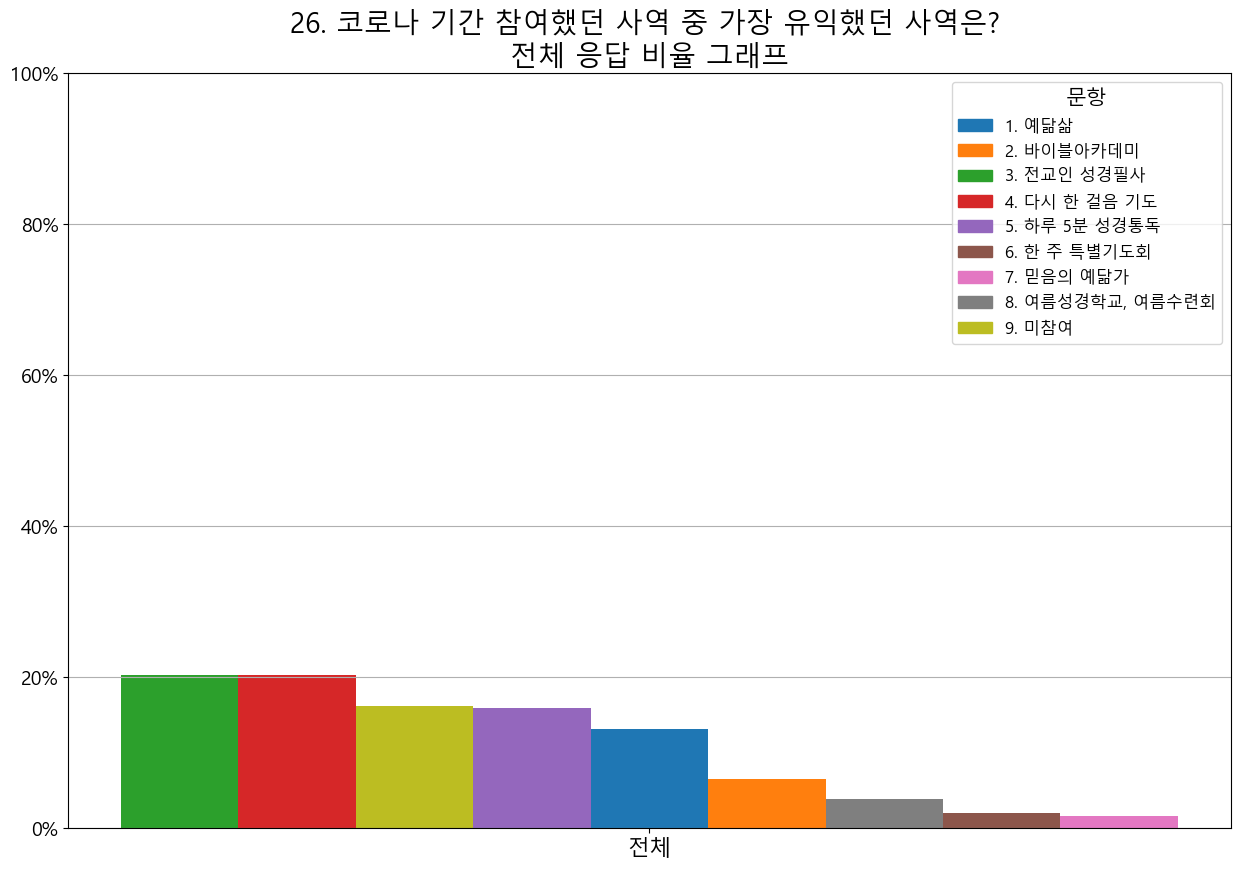

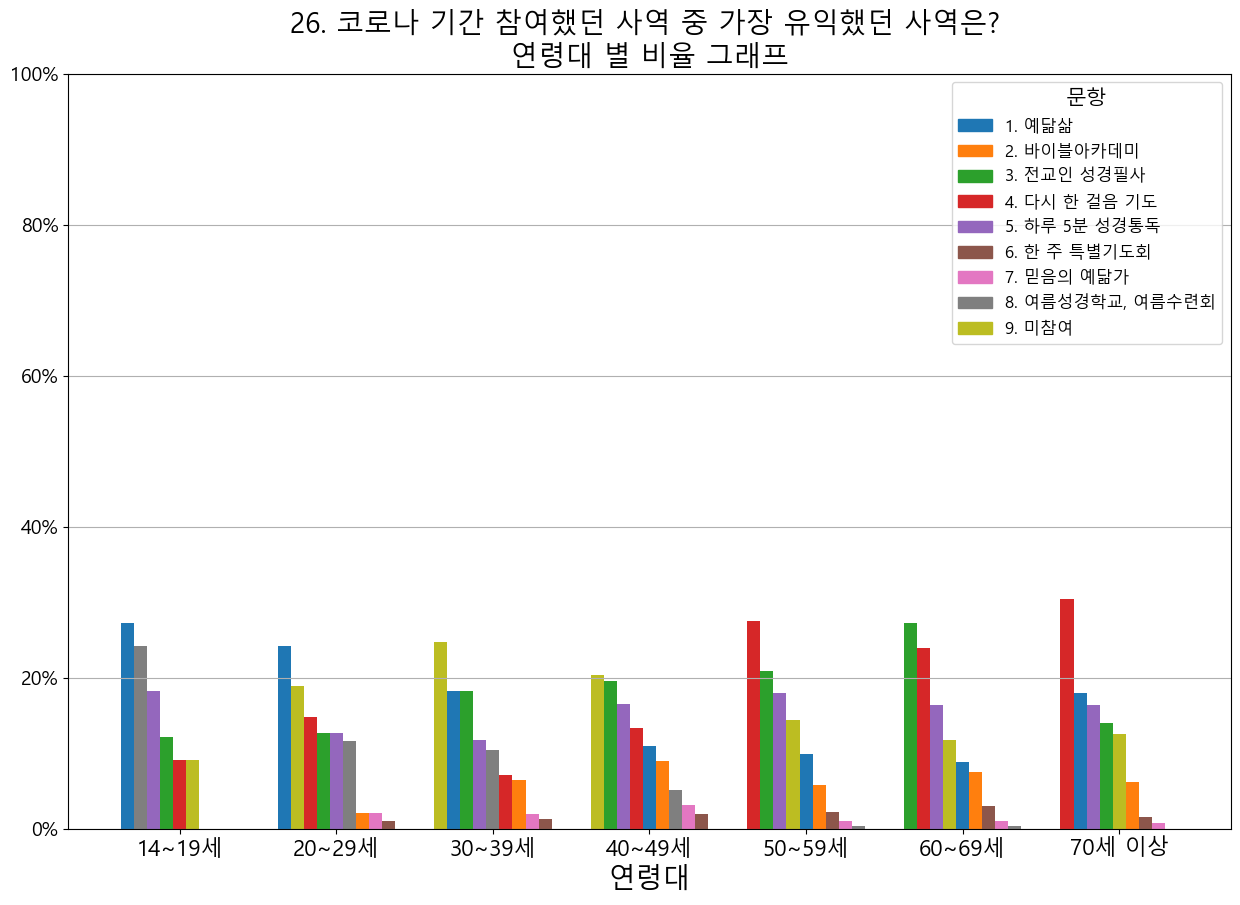

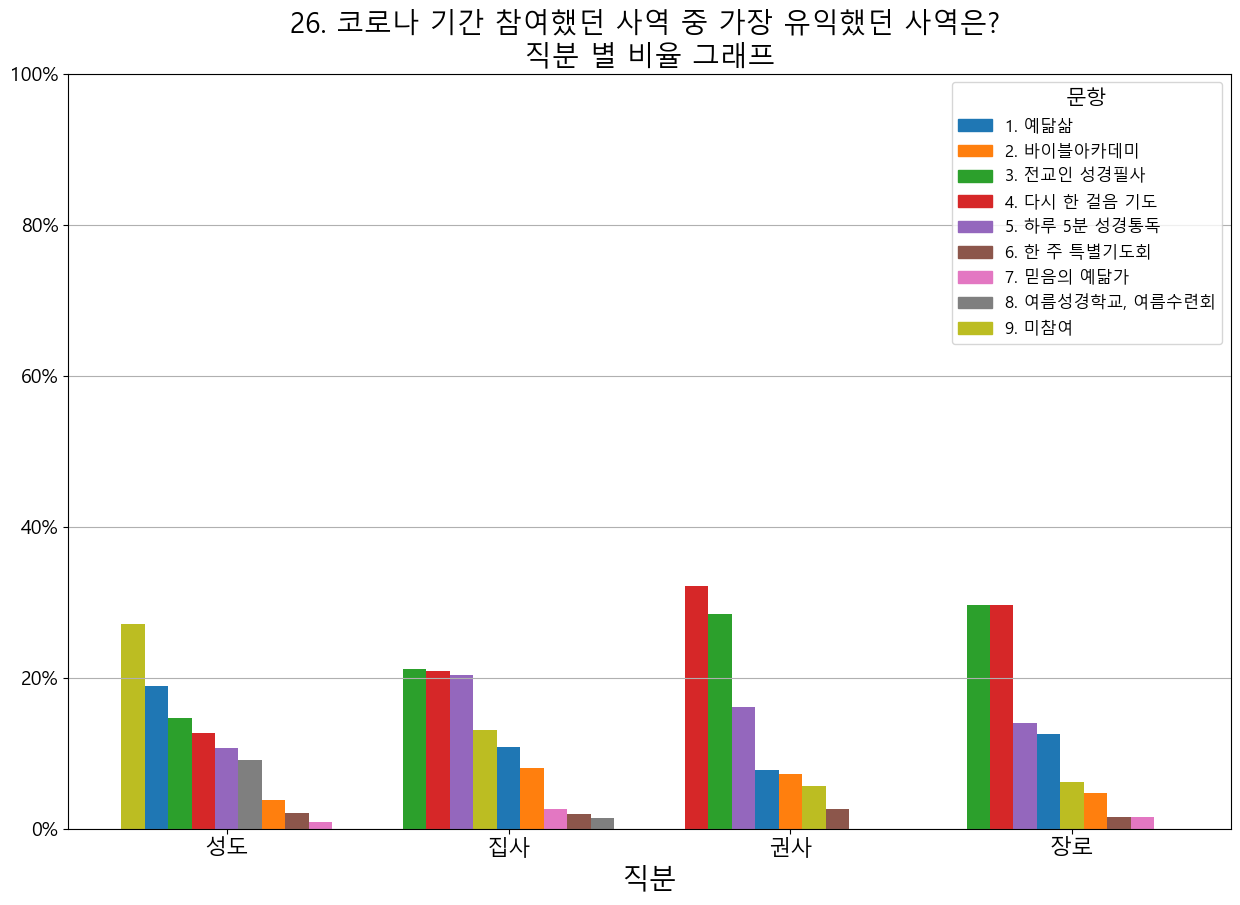

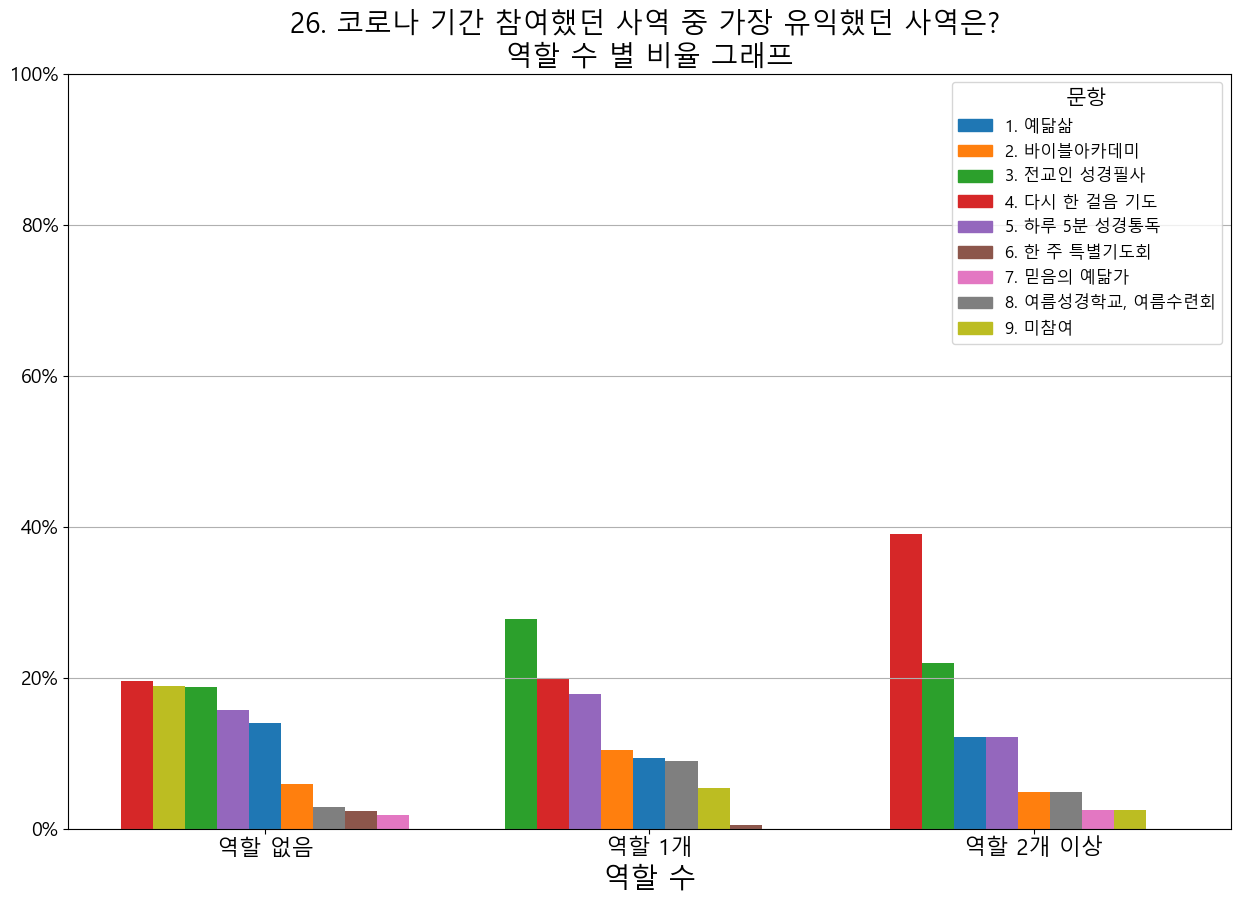

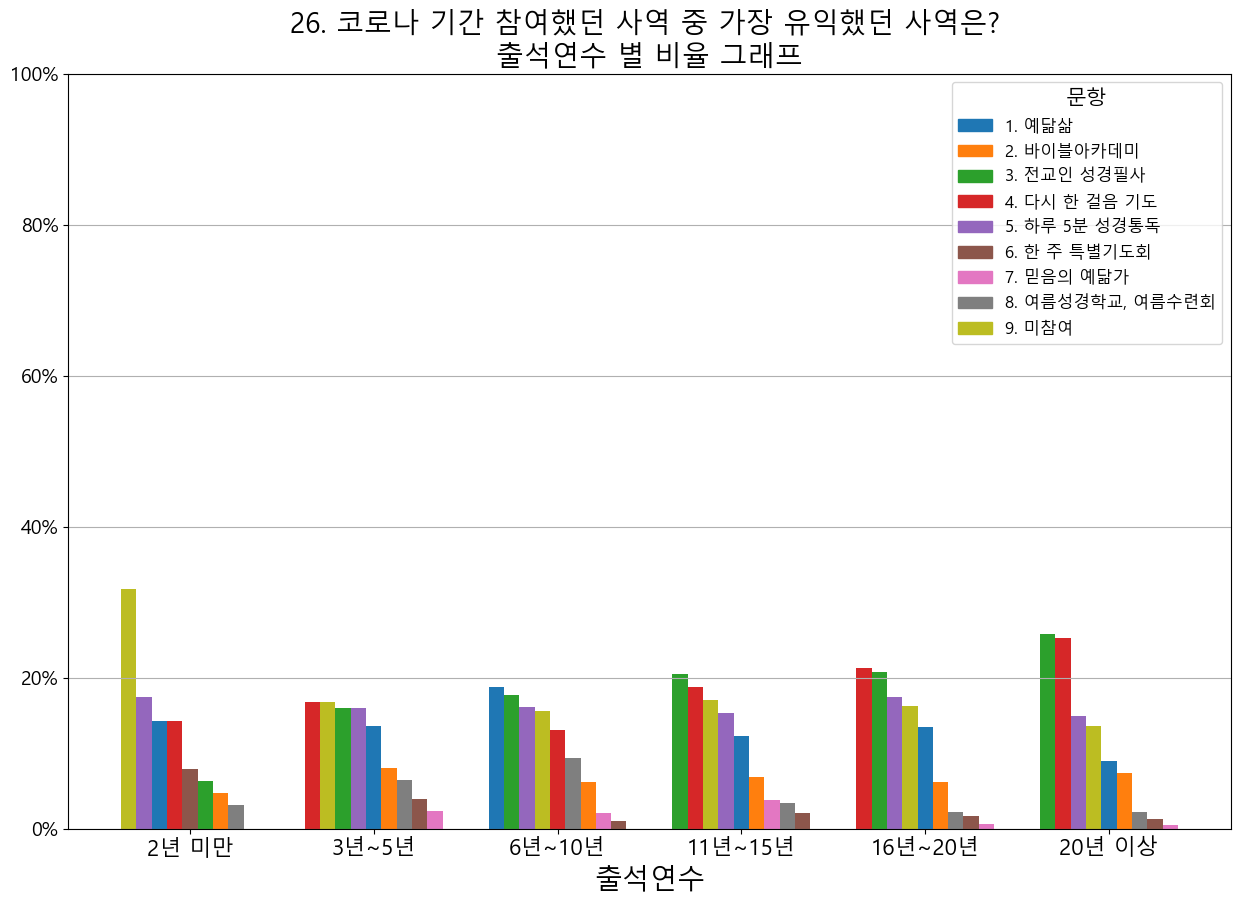

In [ ]:
all_color_list = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
color_list = all_color_list[:len(table.columns)]
gap = len(table.columns) / 2 - 0.5

# 그래프 제목 설정
for question in data.columns[:-1]:
    if Q == int(re.findall('\d+', question)[0]):
        title = question
    
# 범례(legend) 설정
ax_list = []
for idx in range(len(q_table.columns)):
    ax_list.append(mpatches.Patch(color = color_list[idx], label = f'{q_table.columns[idx]}'))
    
plot_1()
plot_2()
plot_3()
plot_4()
plot_5()

### Q27. 코로나 기간 중 성도 간의 교제 방법은? (모두 체크)

#### 데이터 셋 준비

In [ ]:
Q = 27
Q_list.append(Q)
복수응답 = "(복수응답)"

In [ ]:
table_Q27 = pd.DataFrame(index = ['전체',
                                 '14~19세', '20~29세', '30~39세', '40~49세', '50~59세', '60~69세', '70세 이상',
                                 '성도', '집사', '권사', '장로',
                                 '역할 없음', '역할 1개', '역할 2개 이상',
                                 '2년 미만', '3년~5년', '6년~10년', '11년~15년', '16년~20년', '20년 이상'],
                        columns = ['1. 카카오톡이나 문자',
                                   '2. 온라인 교제',
                                   '3. 전화통화',
                                   '4. 대면모임',
                                   '5. 없음'])

In [ ]:
df_Q27 = df.copy()
df_Q27['Q27_1'] = 0
df_Q27['Q27_2'] = 0
df_Q27['Q27_3'] = 0
df_Q27['Q27_4'] = 0
df_Q27['Q27_5'] = 0

In [ ]:
nan_index = []

for idx, Q27 in enumerate(data['27. 코로나 기간 성도 간의 교제 방법은?']):
    if type(Q27) == float:
        nan_index.append(idx)
    elif type(Q27) == str:
        if '카카오톡' in Q27:
            df_Q27['Q27_1'].iloc[idx] = 1
        if '온라인 교제' in Q27:
            df_Q27['Q27_2'].iloc[idx] = 1
        if '전화통화' in Q27:
            df_Q27['Q27_3'].iloc[idx] = 1
        if '대면모임' in Q27:
            df_Q27['Q27_4'].iloc[idx] = 1
        if '없음' == Q27:
            df_Q27['Q27_5'].iloc[idx] = 1
        if df_Q27.iloc[idx, col_num:].sum() == 0:
            nan_index.append(idx)
        
df_Q27.drop(df_Q27.index[nan_index], axis = 0, inplace = True)

#### 빈도수 & 비율 테이블

In [ ]:
table, q_table, f_table = make_table(Q)

#### 시각화

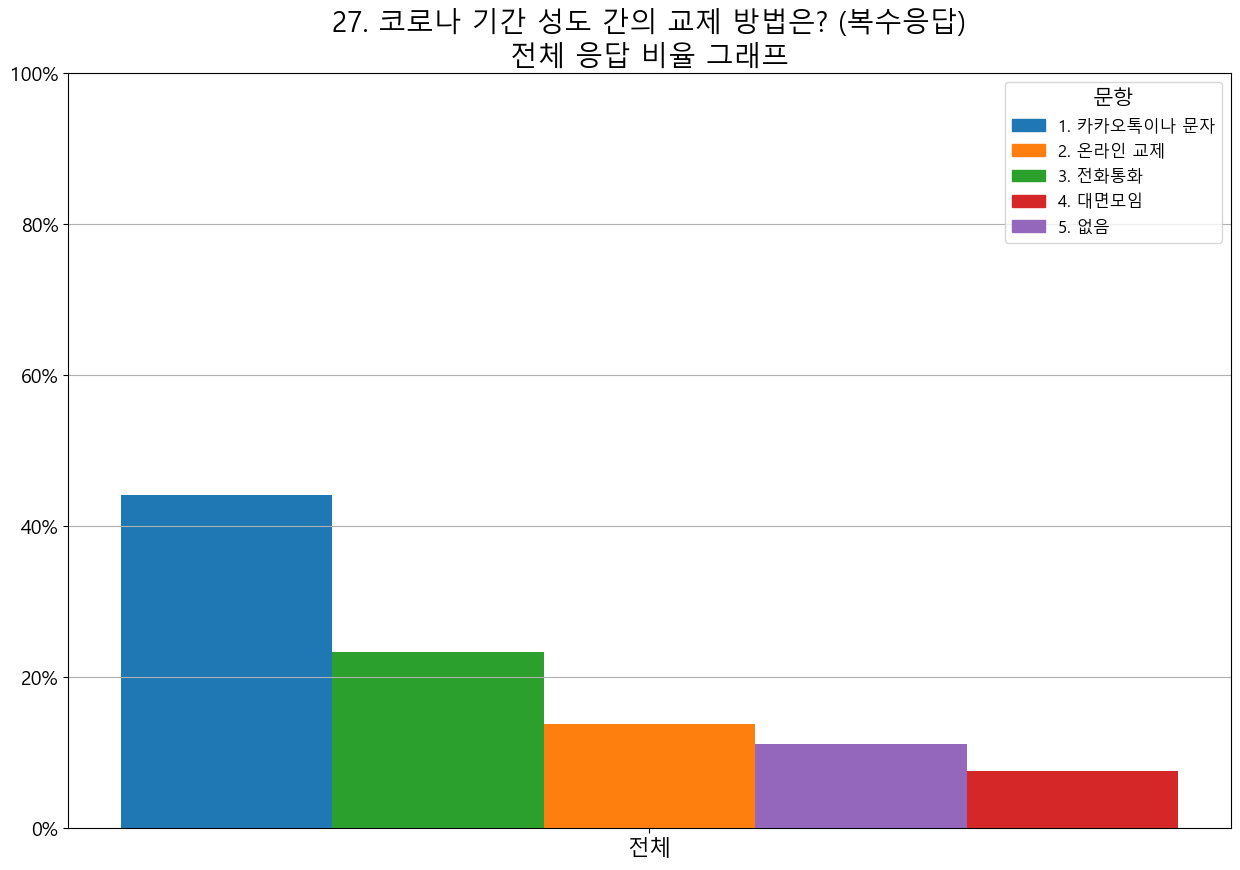

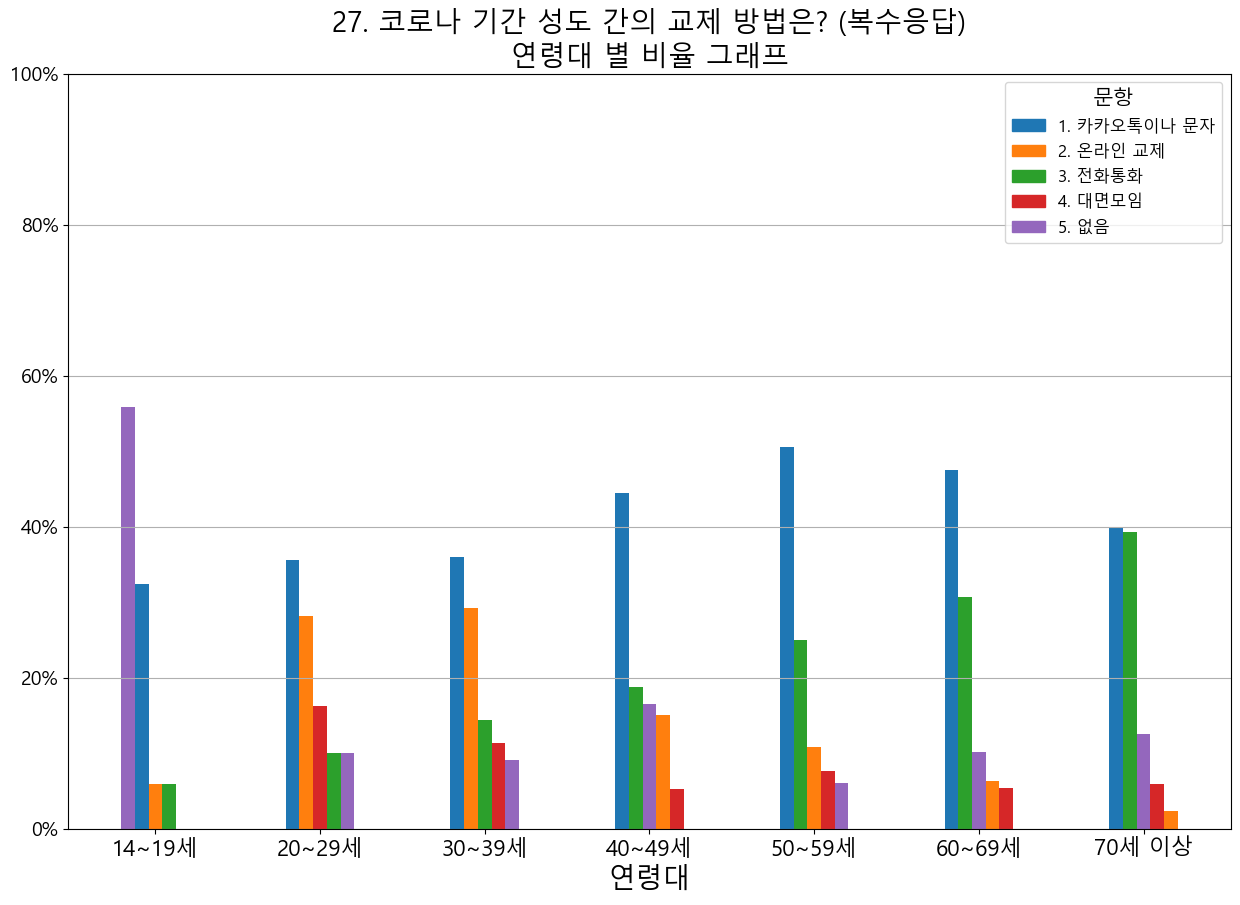

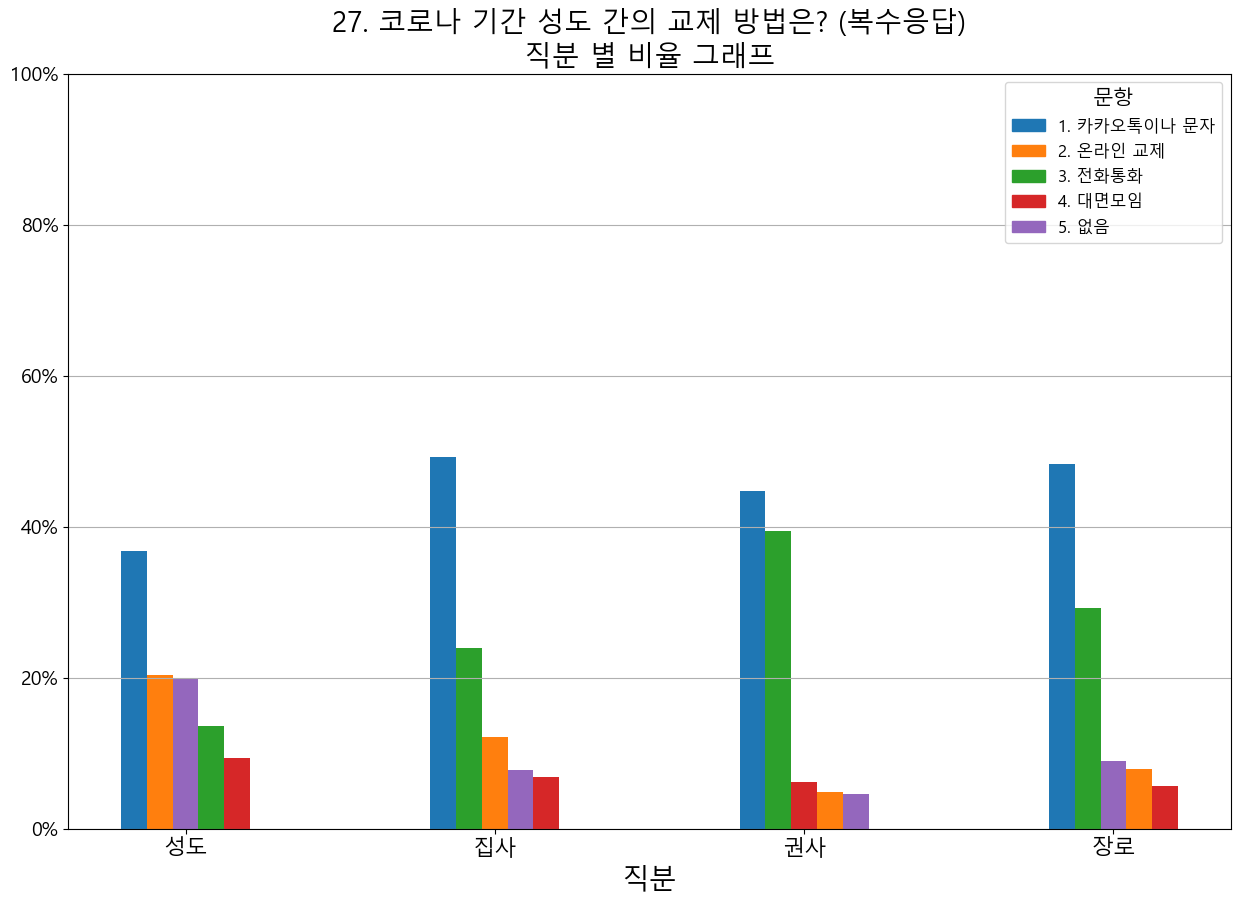

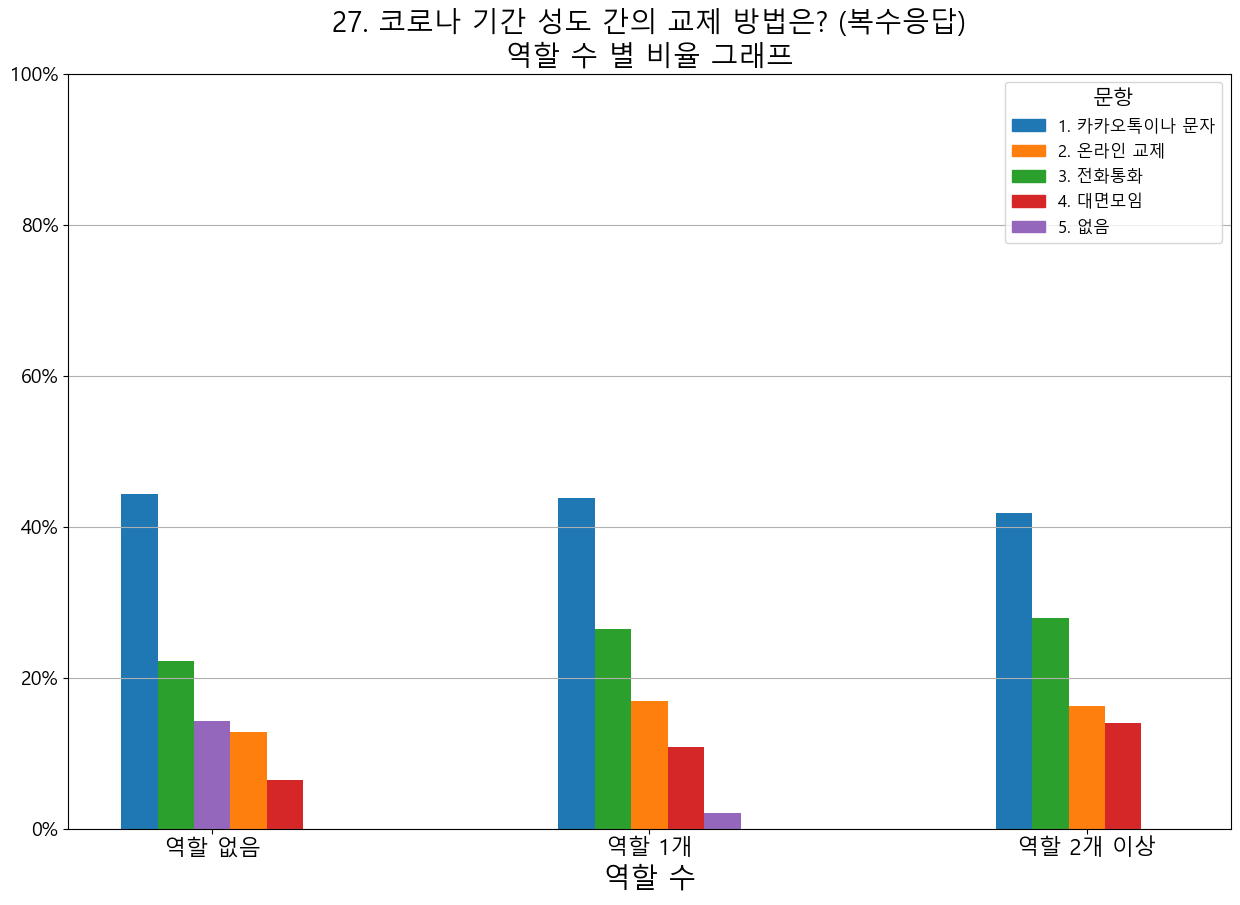

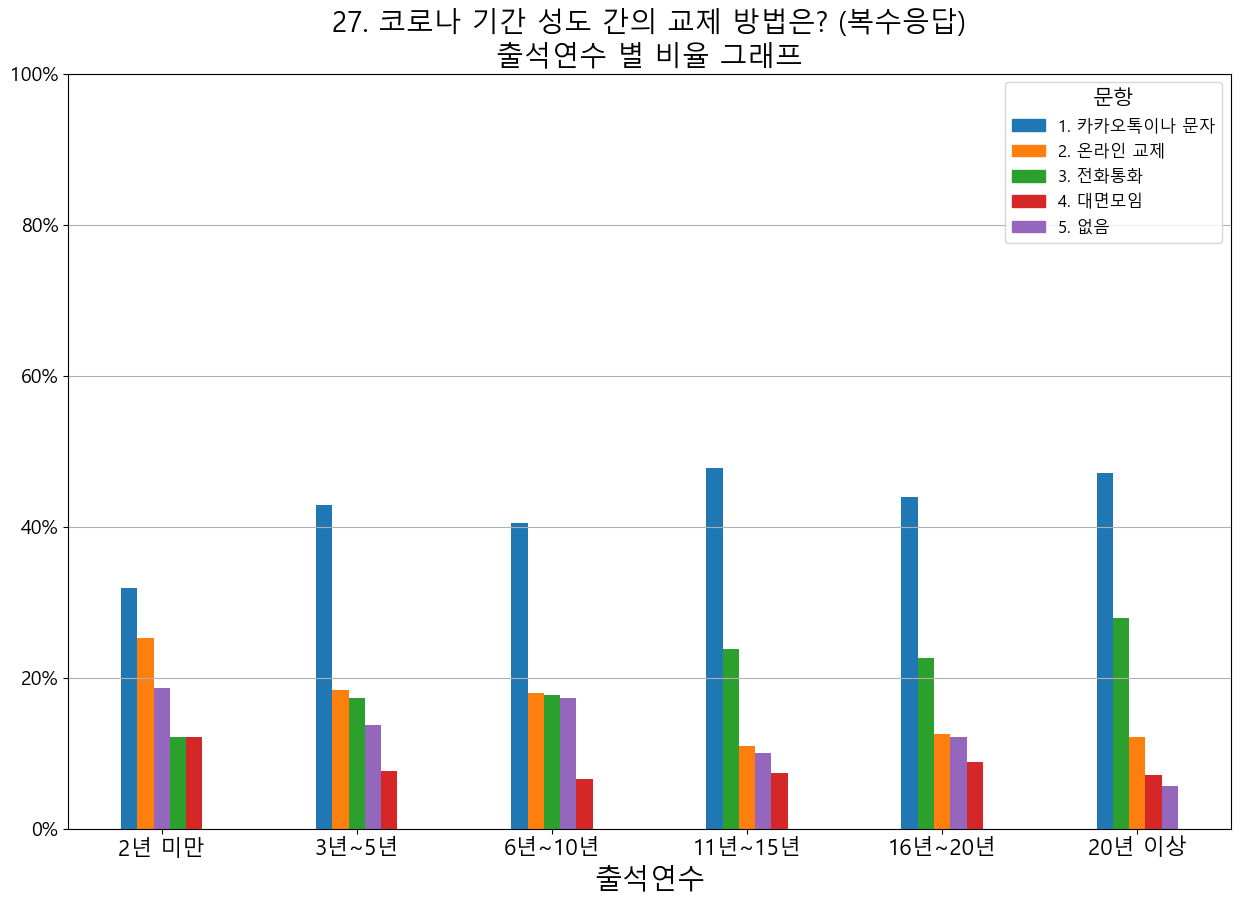

In [ ]:
all_color_list = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
color_list = all_color_list[:len(table.columns)]
gap = len(table.columns) / 2 - 0.5

# 그래프 제목 설정
for question in data.columns[:-1]:
    if Q == int(re.findall('\d+', question)[0]):
        title = question
    
# 범례(legend) 설정
ax_list = []
for idx in range(len(q_table.columns)):
    ax_list.append(mpatches.Patch(color = color_list[idx], label = f'{q_table.columns[idx]}'))
    
plot_1()
plot_2()
plot_3()
plot_4()
plot_5()

### Q28. 우리교회 SNS중 가장 잘 활용하는 것은?

#### 데이터 셋 준비

In [ ]:
Q = 28
Q_list.append(Q)
복수응답 = ""

In [ ]:
table_Q28 = pd.DataFrame(index = ['전체',
                                 '14~19세', '20~29세', '30~39세', '40~49세', '50~59세', '60~69세', '70세 이상',
                                 '성도', '집사', '권사', '장로',
                                 '역할 없음', '역할 1개', '역할 2개 이상',
                                 '2년 미만', '3년~5년', '6년~10년', '11년~15년', '16년~20년', '20년 이상'],
                        columns = ['1. 유튜브',
                                   '2. 페이스북',
                                   '3. 카카오채널',
                                   '4. 인스타그램',
                                   '5. 사용안함'])

In [ ]:
df_Q28 = df.copy()
df_Q28['Q28_1'] = 0
df_Q28['Q28_2'] = 0
df_Q28['Q28_3'] = 0
df_Q28['Q28_4'] = 0
df_Q28['Q28_5'] = 0

In [ ]:
nan_index = []

for idx, Q28 in enumerate(data['28. 우리교회 SNS중 가장 잘 활용하는 것은?']):
    if type(Q28) == float:
        nan_index.append(idx)
    elif type(Q28) == str:
        if '유튜브' in Q28:
            df_Q28['Q28_1'].iloc[idx] = 1
        if '페이스북' in Q28:
            df_Q28['Q28_2'].iloc[idx] = 1
        if '카카오채널' in Q28:
            df_Q28['Q28_3'].iloc[idx] = 1
        if '인스타그램' in Q28:
            df_Q28['Q28_4'].iloc[idx] = 1
        if '사용안함' in Q28:
            df_Q28['Q28_5'].iloc[idx] = 1
        if df_Q28.iloc[idx, col_num:].sum() == 0:
            nan_index.append(idx)
        
df_Q28.drop(df_Q28.index[nan_index], axis = 0, inplace = True)

#### 빈도수 & 비율 테이블

In [ ]:
table, q_table, f_table = make_table(Q)

#### 시각화

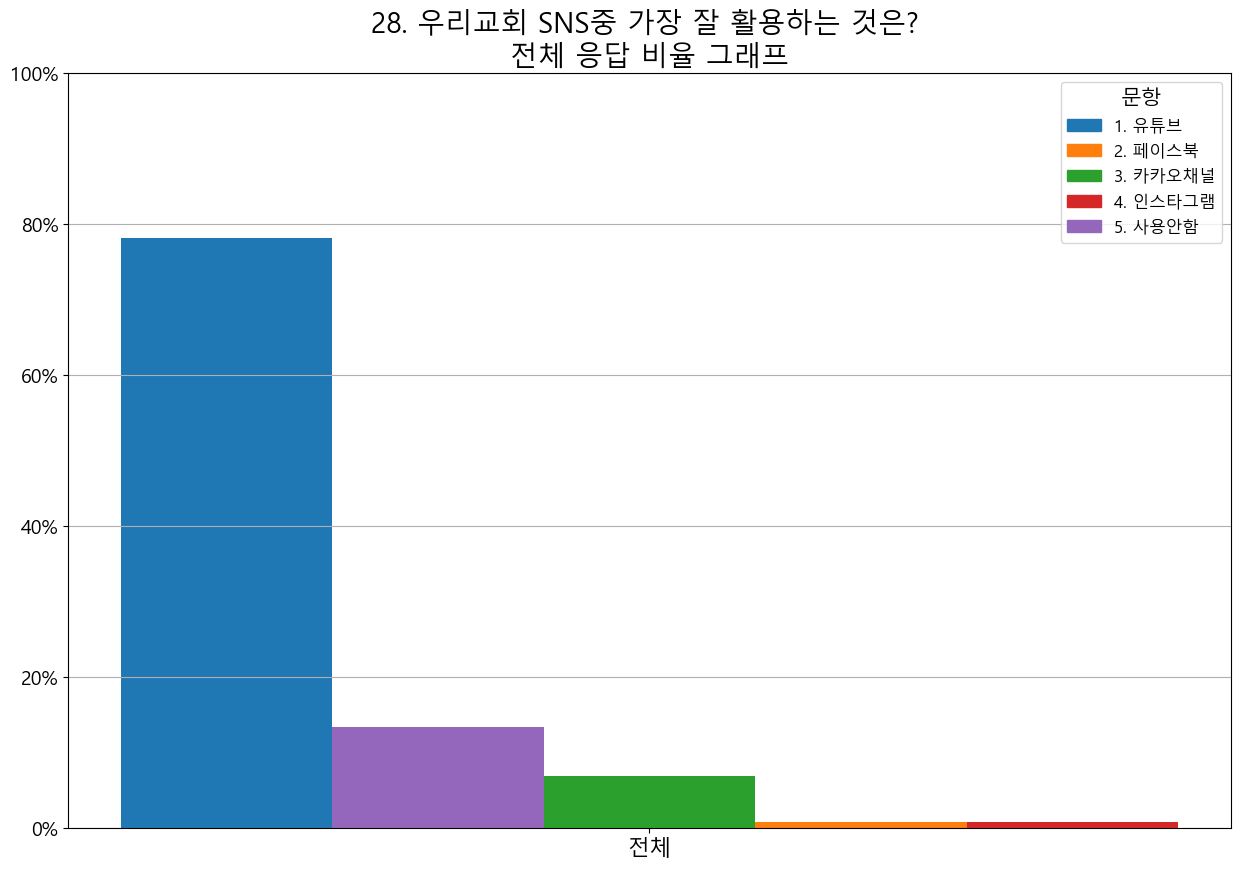

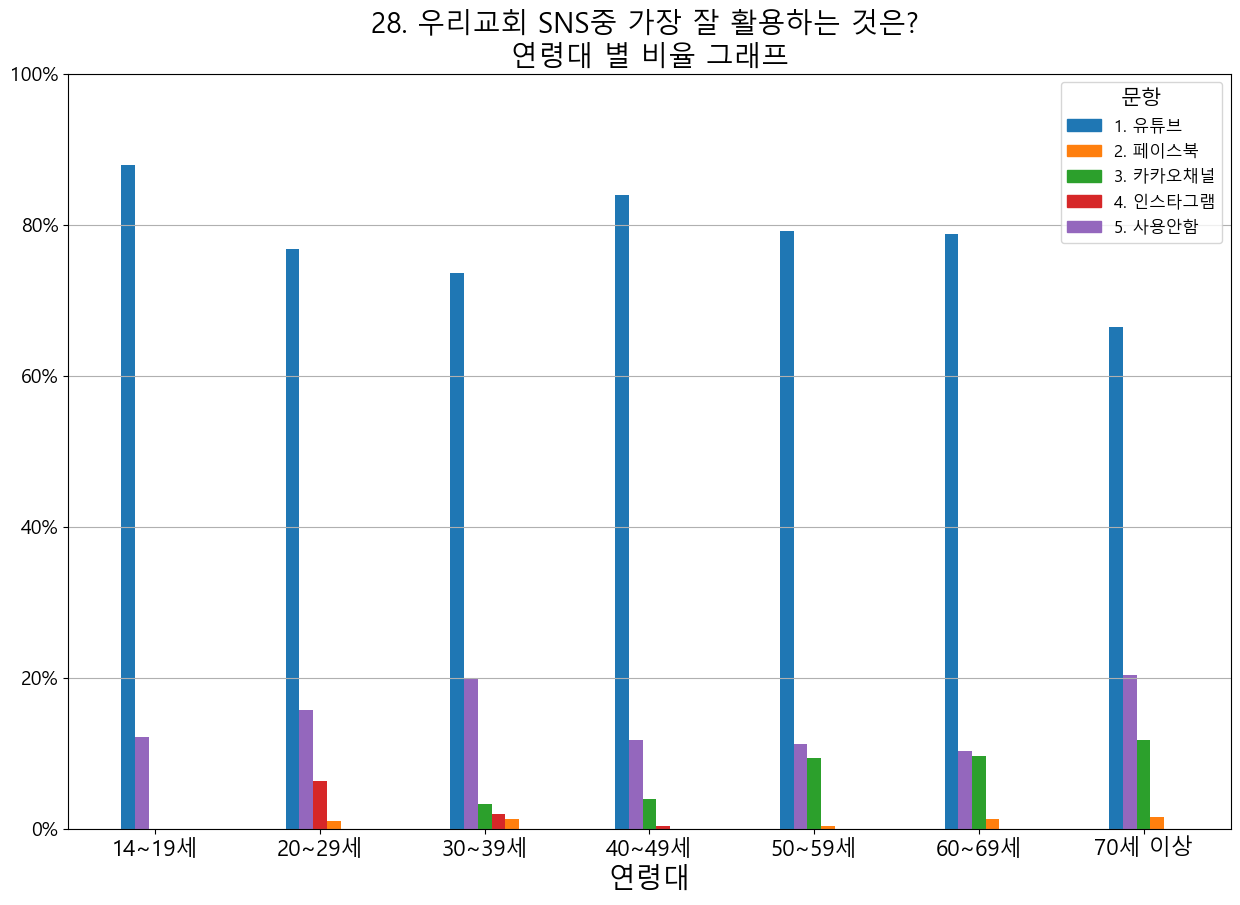

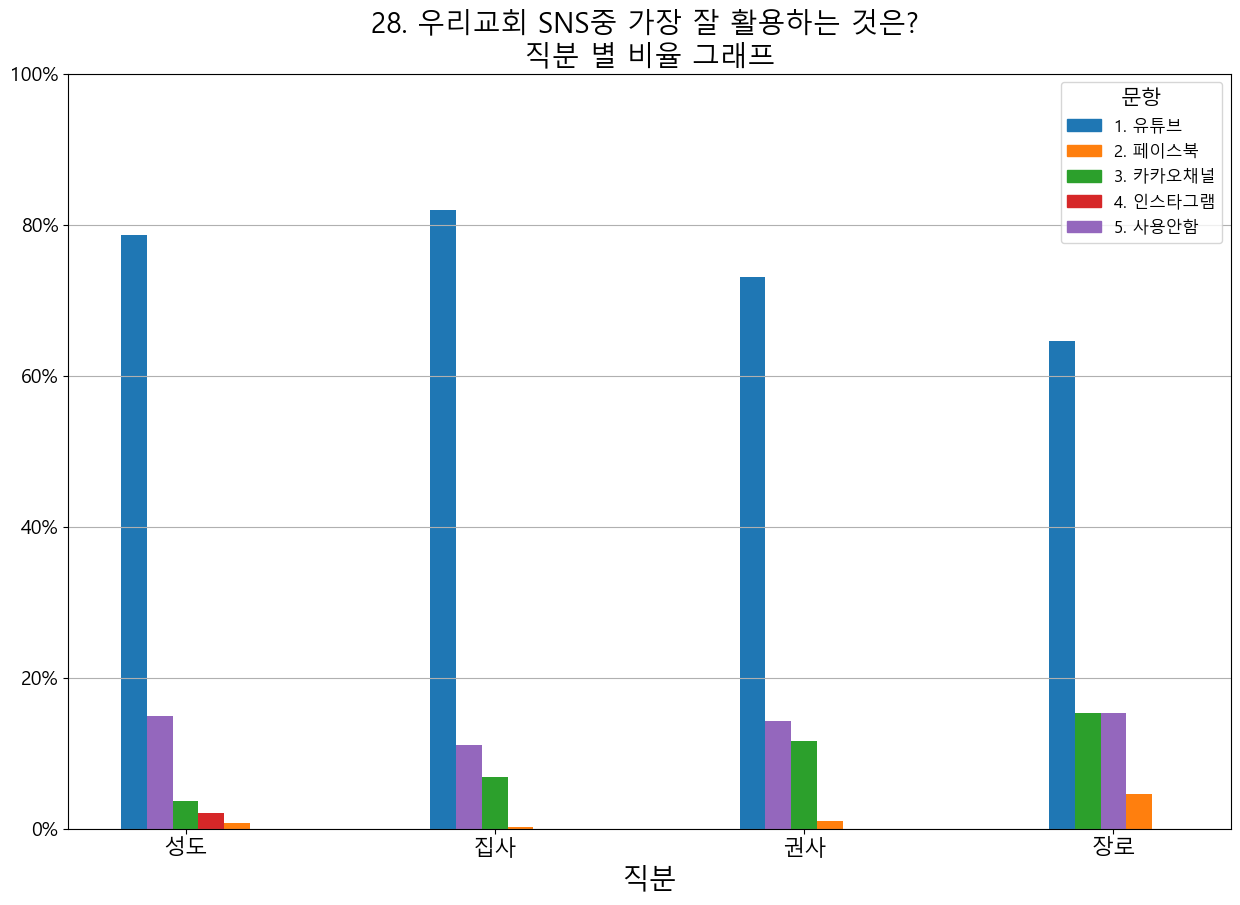

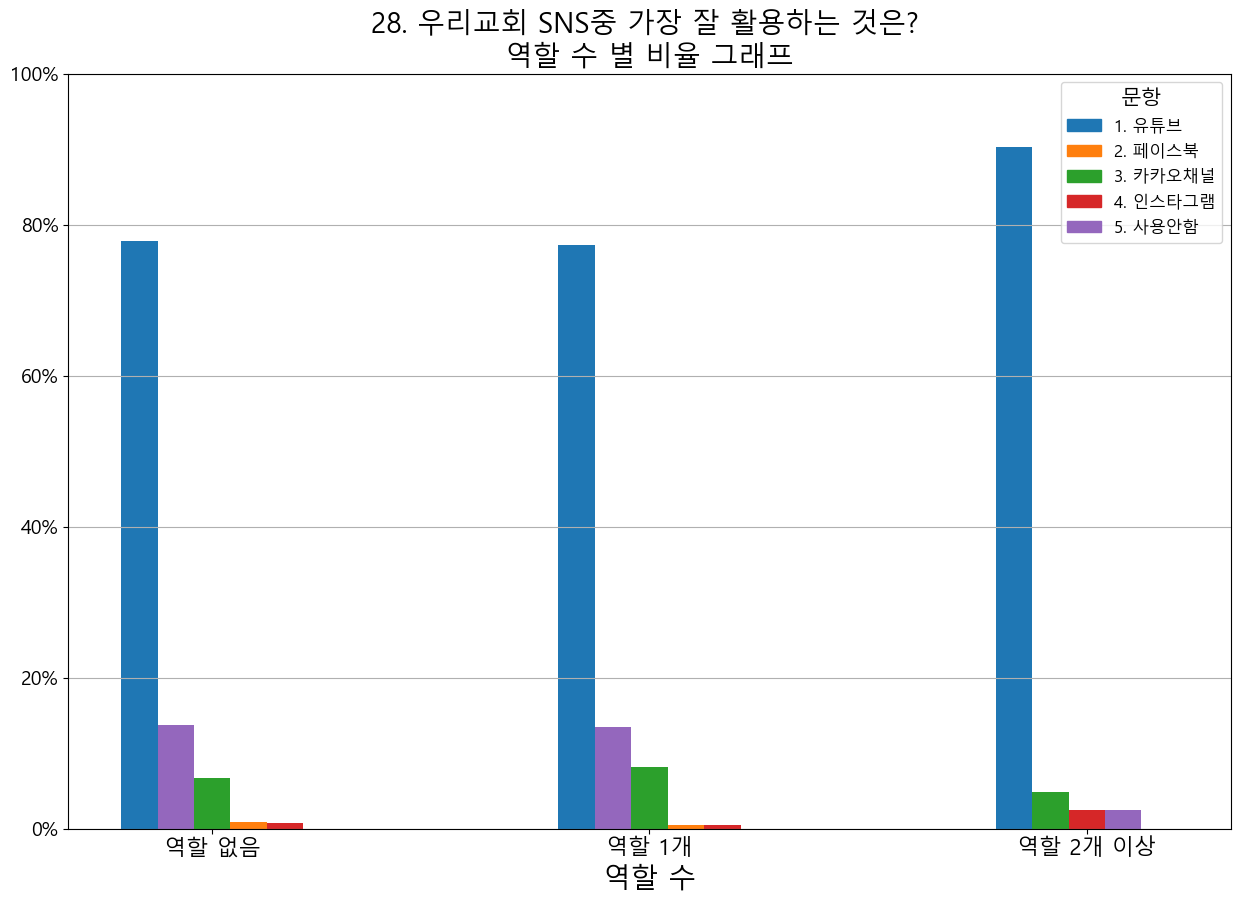

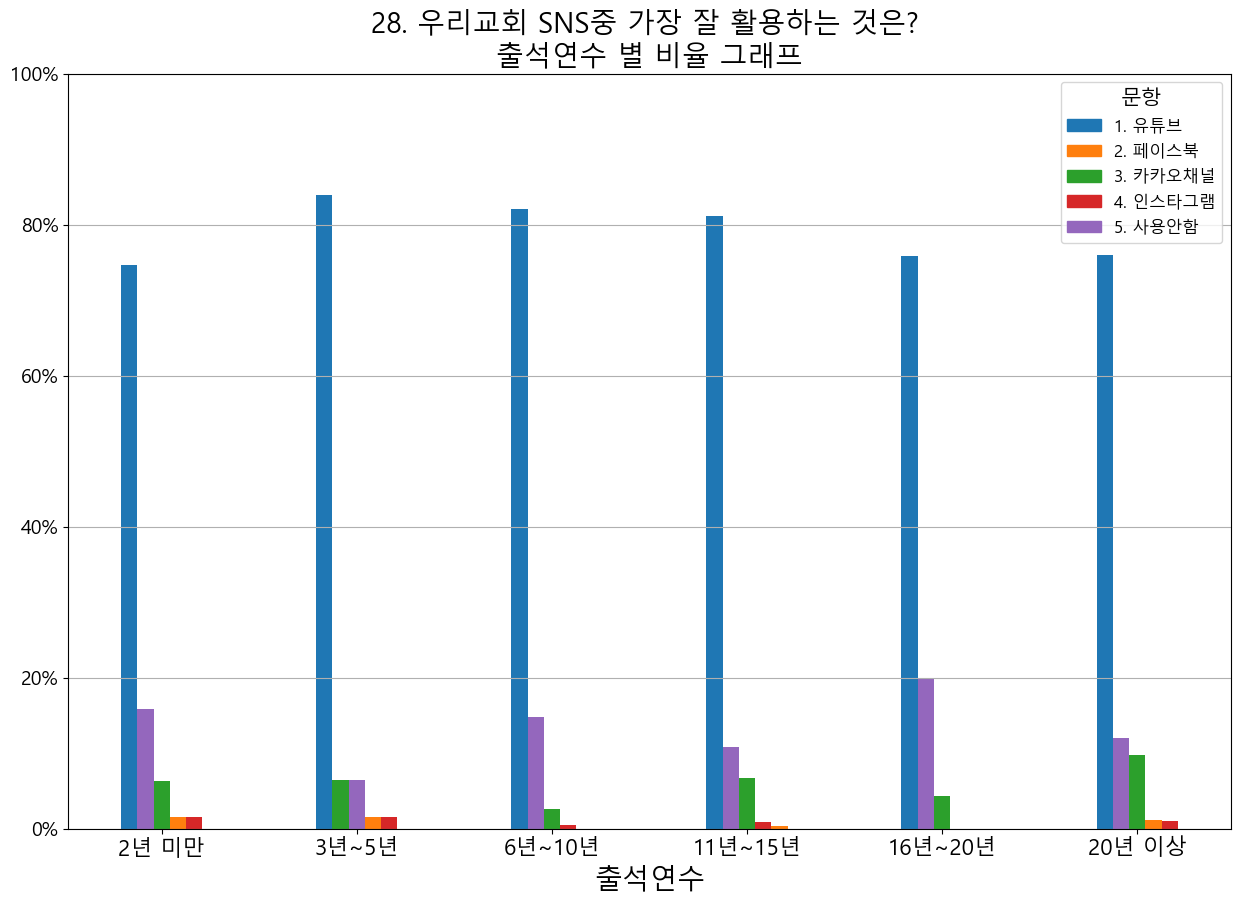

In [ ]:
all_color_list = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
color_list = all_color_list[:len(table.columns)]
gap = len(table.columns) / 2 - 0.5

# 그래프 제목 설정
for question in data.columns[:-1]:
    if Q == int(re.findall('\d+', question)[0]):
        title = question
    
# 범례(legend) 설정
ax_list = []
for idx in range(len(q_table.columns)):
    ax_list.append(mpatches.Patch(color = color_list[idx], label = f'{q_table.columns[idx]}'))
    
plot_1()
plot_2()
plot_3()
plot_4()
plot_5()

### Q29. 앞으로 우리 교회에 기대하는 사역은? (3개까지 중복가능)

#### 데이터 셋 준비

In [ ]:
Q = 29
Q_list.append(Q)
복수응답 = "(복수응답)"

In [ ]:
table_Q29 = pd.DataFrame(index = ['전체',
                                 '14~19세', '20~29세', '30~39세', '40~49세', '50~59세', '60~69세', '70세 이상',
                                 '성도', '집사', '권사', '장로',
                                 '역할 없음', '역할 1개', '역할 2개 이상',
                                 '2년 미만', '3년~5년', '6년~10년', '11년~15년', '16년~20년', '20년 이상'],
                        columns = ['1. 예배 및 말씀 강화',
                                   '2. 심방, 상담, 특별기도',
                                   '3. 다양한 창조적 사역',
                                   '4. 신앙훈련 및 성경공부',
                                   '5. 소그룹, 교제 강화',
                                   '6. 장학과 구제의 확대',
                                   '7. 전도사역 강화',
                                   '8. 온라인 기독교 컨텐츠 개발',
                                   '9. 이웃섬김사역 강화',
                                   '10. 다음세대 사역 강화'])

In [ ]:
df_Q29 = df.copy()
df_Q29['Q29_1'] = 0
df_Q29['Q29_2'] = 0
df_Q29['Q29_3'] = 0
df_Q29['Q29_4'] = 0
df_Q29['Q29_5'] = 0
df_Q29['Q29_6'] = 0
df_Q29['Q29_7'] = 0
df_Q29['Q29_8'] = 0
df_Q29['Q29_9'] = 0
df_Q29['Q29_10'] = 0

In [ ]:
nan_index = []

for idx, Q29 in enumerate(data['29. 앞으로 우리 교회에 기대하는 사역은?']):
    if type(Q29) == float:
        nan_index.append(idx)
    elif type(Q29) == str:
        if '예배 및 말씀 강화' in Q29:
            df_Q29['Q29_1'].iloc[idx] = 1
        if '심방, 상담, 특별기도' in Q29:
            df_Q29['Q29_2'].iloc[idx] = 1
        if '다양한 창조적 사역' in Q29:
            df_Q29['Q29_3'].iloc[idx] = 1
        if '신앙훈련 및 성경공부' in Q29:
            df_Q29['Q29_4'].iloc[idx] = 1
        if '소그룹, 교제 강화' in Q29:
            df_Q29['Q29_5'].iloc[idx] = 1
        if '장학과 구제의 확대' in Q29:
            df_Q29['Q29_6'].iloc[idx] = 1
        if '전도사역 강화' in Q29:
            df_Q29['Q29_7'].iloc[idx] = 1
        if '온라인 기독교 컨텐츠 개발' in Q29:
            df_Q29['Q29_8'].iloc[idx] = 1
        if '이웃섬김사역 강화' in Q29:
            df_Q29['Q29_9'].iloc[idx] = 1
        if '다음세대 사역 강화' in Q29:
            df_Q29['Q29_10'].iloc[idx] = 1
        if df_Q29.iloc[idx, col_num:].sum() == 0:
            nan_index.append(idx)
        
df_Q29.drop(df_Q29.index[nan_index], axis = 0, inplace = True)

#### 빈도수 & 비율 테이블

In [ ]:
table, q_table, f_table = make_table(Q)

#### 시각화

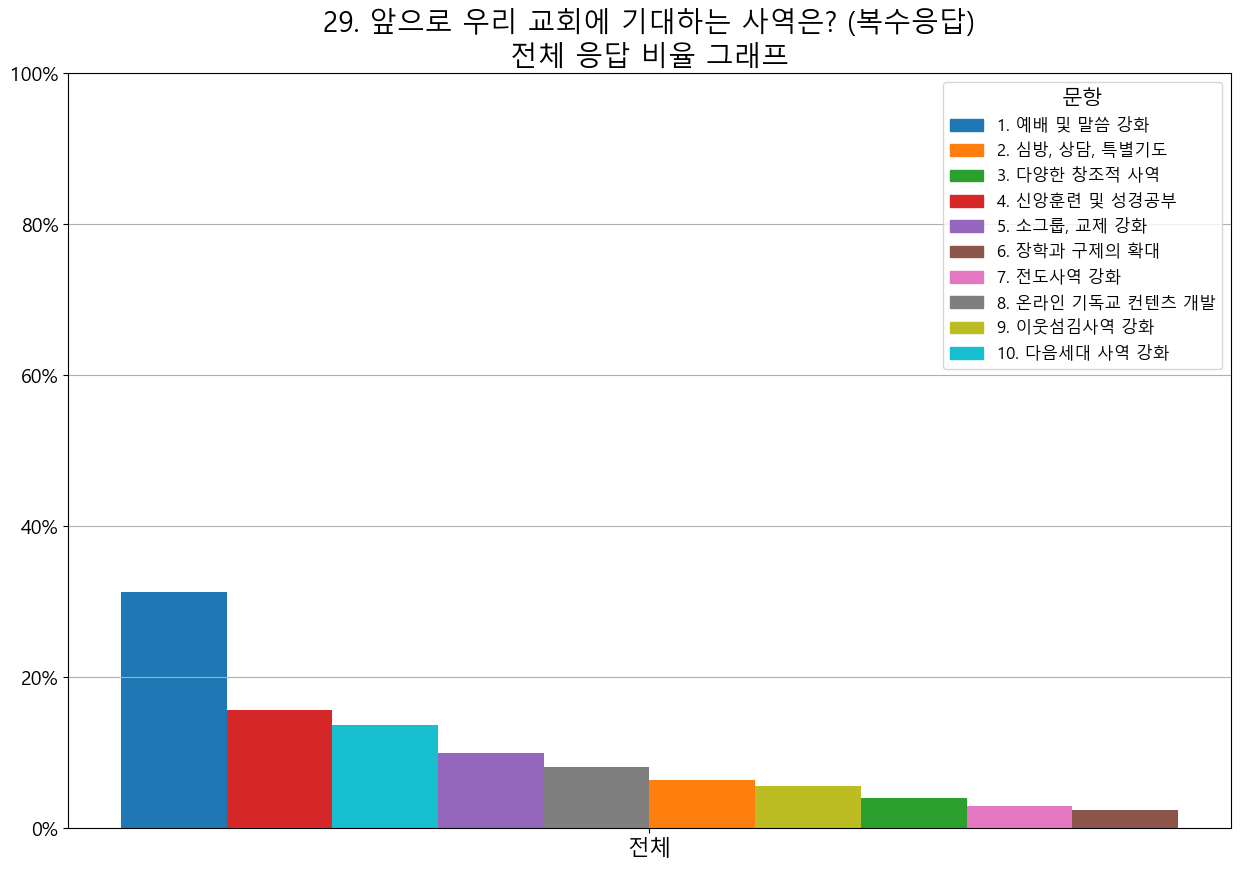

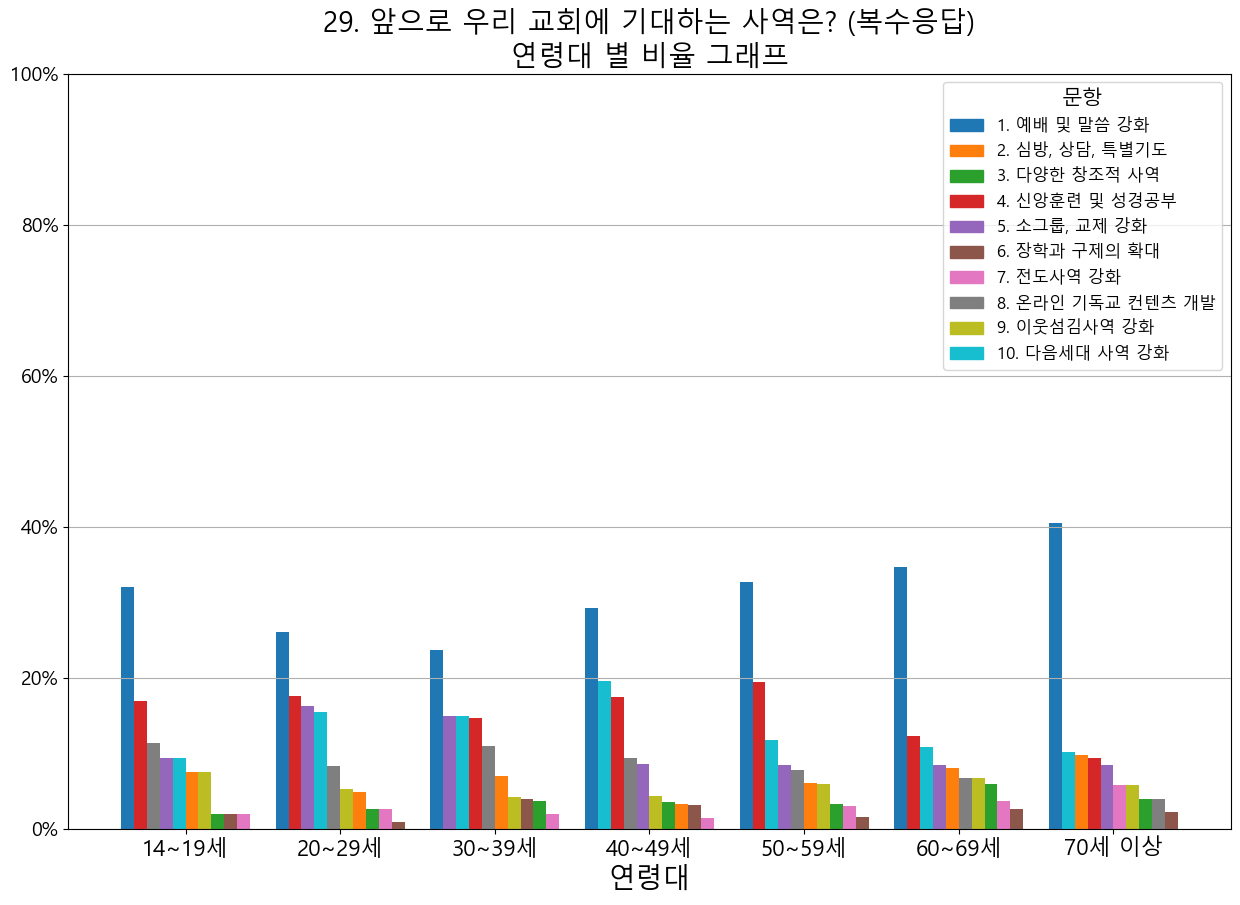

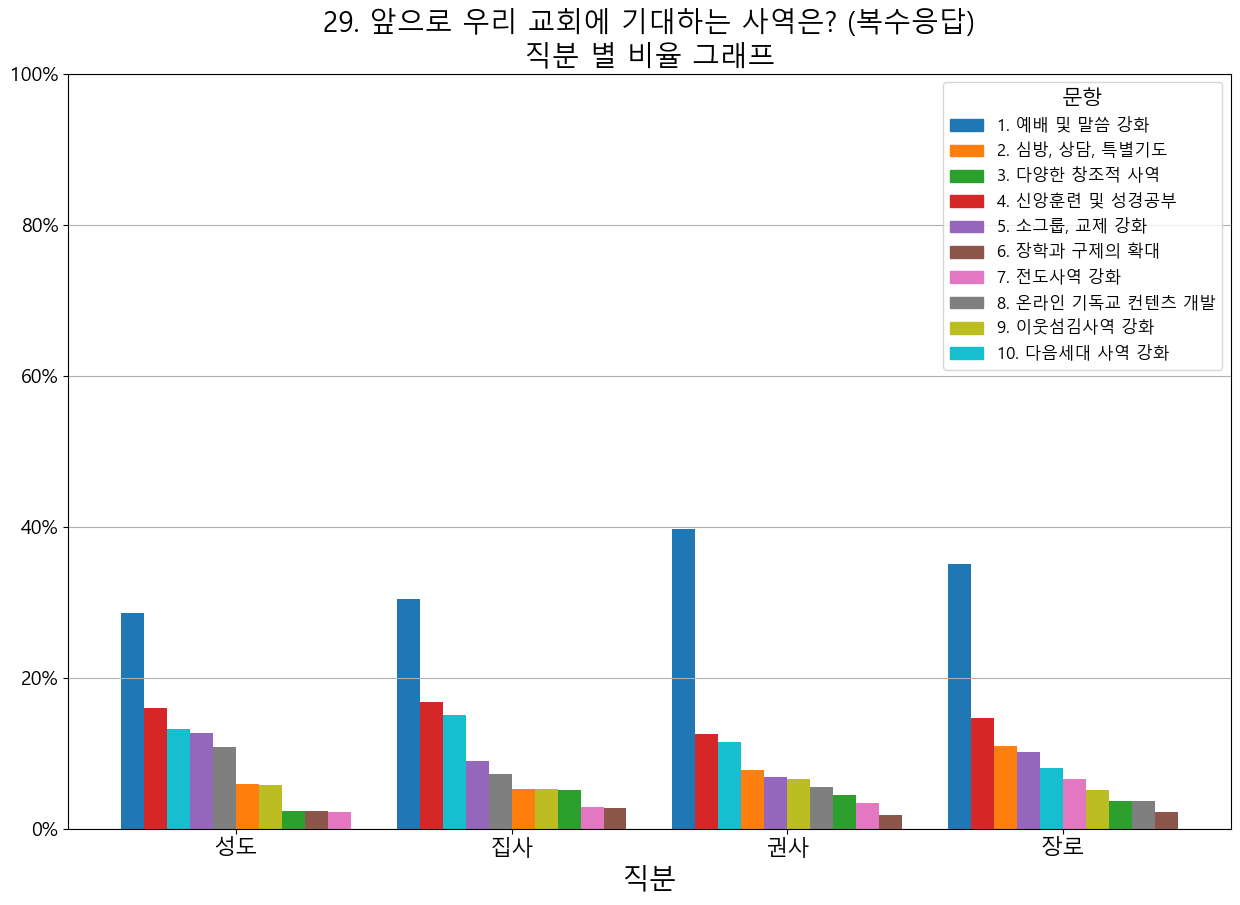

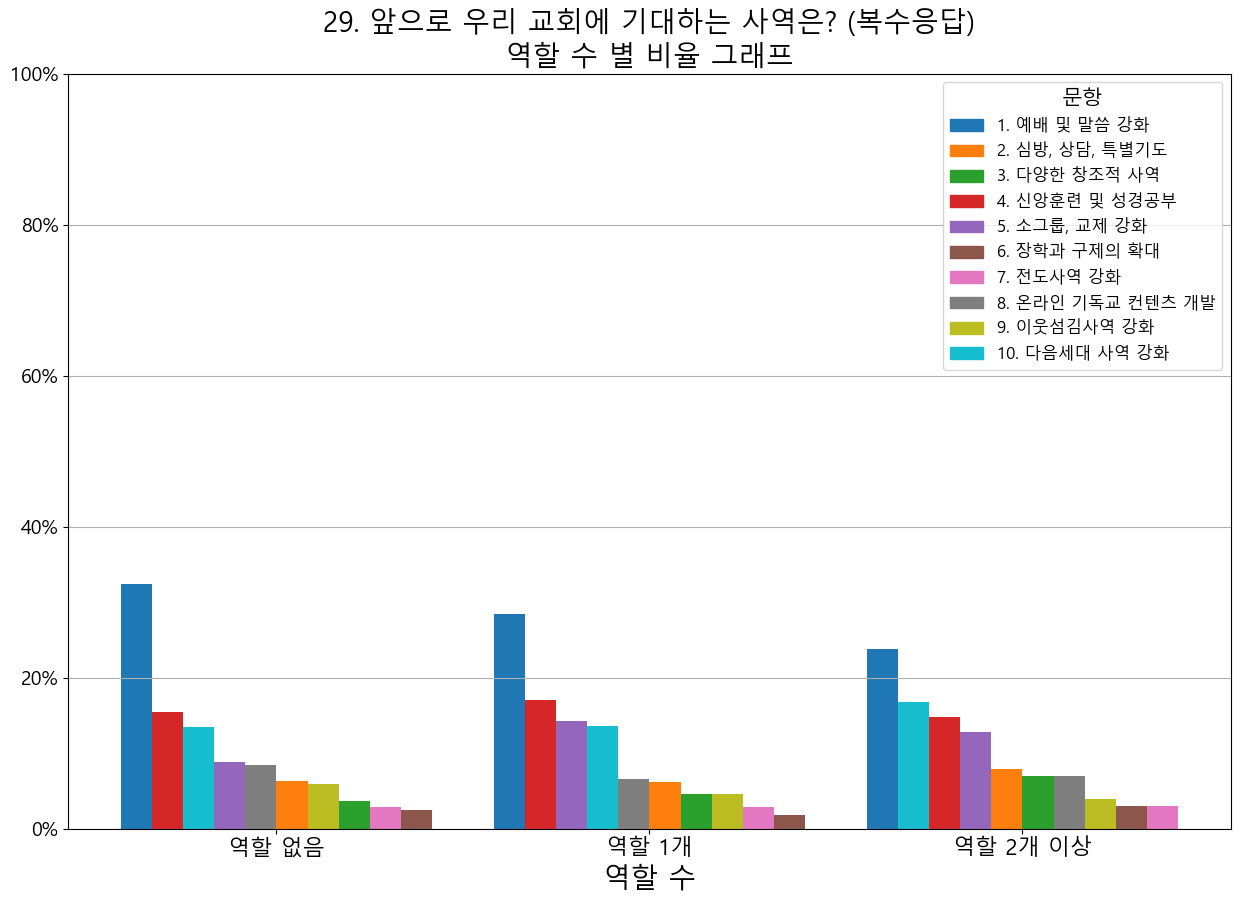

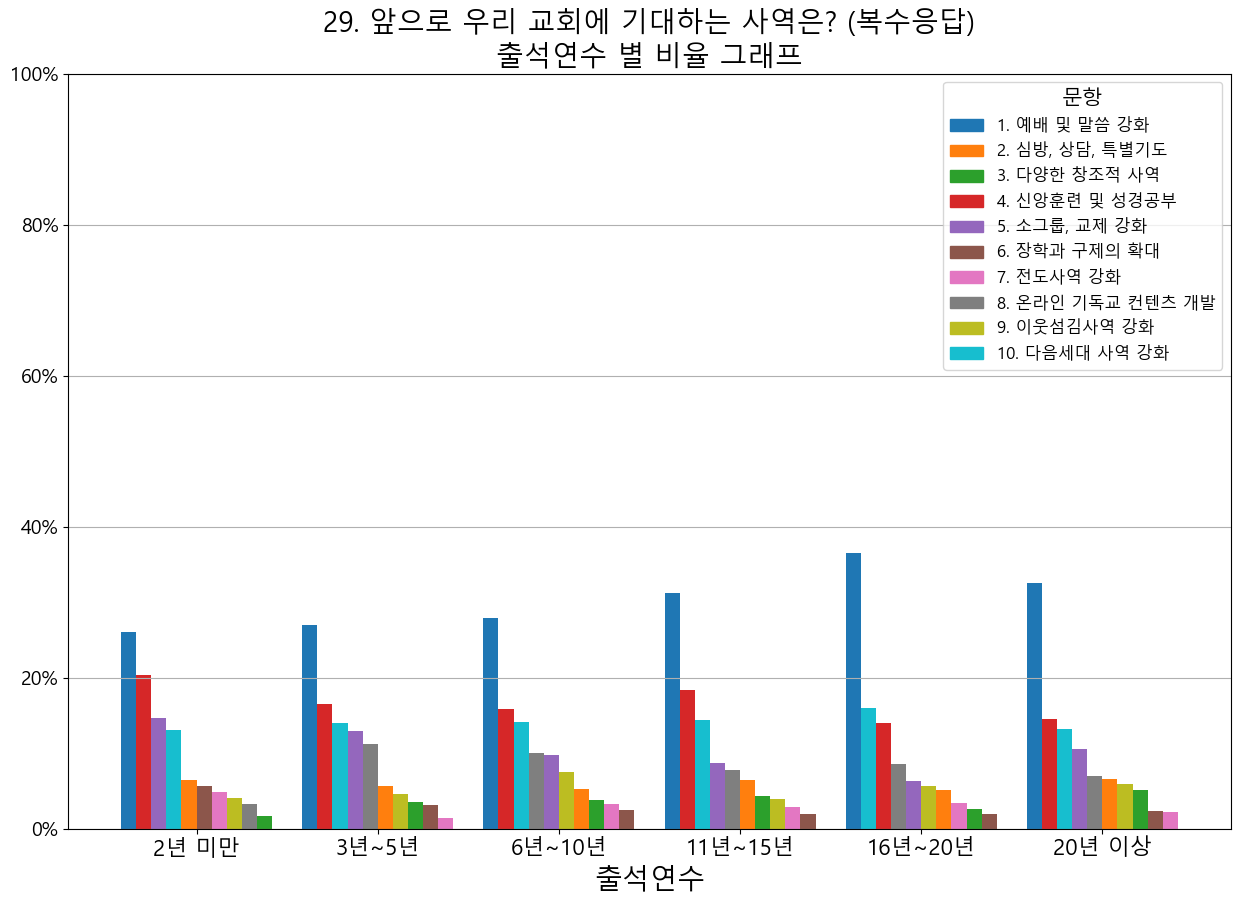

In [ ]:
all_color_list = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
color_list = all_color_list[:len(table.columns)]
gap = len(table.columns) / 2 - 0.5

# 그래프 제목 설정
for question in data.columns[:-1]:
    if Q == int(re.findall('\d+', question)[0]):
        title = question
    
# 범례(legend) 설정
ax_list = []
for idx in range(len(q_table.columns)):
    ax_list.append(mpatches.Patch(color = color_list[idx], label = f'{q_table.columns[idx]}'))
    
plot_1()
plot_2()
plot_3()
plot_4()
plot_5()

## 테이블 결과 엑셀 파일 저장

In [ ]:
xlsx_dir = './result/table.xlsx' # 테이블 결과 저장 파일

In [ ]:
with pd.ExcelWriter(xlsx_dir) as writer:
    for Q, table in zip(Q_list, table_list):
        table.to_excel(writer, sheet_name = f'table_Q{Q}')